In [1]:
#import needed packages
import glob
from bioverse.util import compute_t_ref
from bioverse.survey import TransitSurvey
from bioverse.generator import Generator
from atmos_to_PSG import atmosatm, psgspec
import pyatmos
import os
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

In [2]:
curr_dir=os.getcwd()

In [3]:
#set atmos pathway and initiate it
atmos = pyatmos.Simulation(code_path='~/atmos-master', DEBUG=True)
atmos.start()

Initialization complete: 2024-01-22 11:47:21
pyatmos is ready to go! 


In [10]:
#create parameter list--in this case, O2 flux
O2_flux_list=[5.0E+8,5.0E+8,8.0E+8,1.0E+9,2.5E+9,3.5E+9,5.0E+9,6.0E+9,7.5E+9,8.5E+9,1.00E+10,5.0E+10,9.0E+10,1.50E+11,2.50E+11,3.0E+11,3.25E+11,3.5E+11,3.95E+11,4.2E+11,5.50E+11]


In [11]:
#run PyAtmos over the range of parameters
for i in range(len(O2_flux_list)):
	O2_flux=O2_flux_list[i]
	print(O2_flux)
	output_dir=curr_dir+'/sample_atmos_results/O2_test_{n}'.format(n=i)
	args = {
		'species_fluxes': {'O2' :O2_flux},
		'max_photochem_iterations' : 50000, 
		'max_clima_steps' : 10, 
		'output_directory' : output_dir}
	
	
	atmos.run(**args)

500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpwmg6z_82
_write_container_file(): cp /tmp/tmpj3emmefw ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.221731841810385     
 CALLING RATES...
 NW =                   750    WAVELENGTH GRID:   1176.5000000000000       -   10000.000000000000       Angstroms
 PSTAR is our sun
 using Atlas 1 spectrum for the sun

   

 N =    2  EMAX = 6.37E-03 FOR CH3     AT Z = 2.12E+06 U = 1.27E-20 RHS = 8.08E-23  DT = 6.00E-06  TIME = 4.00E-06
 N =    3  EMAX = 8.96E-03 FOR CH3     AT Z = 2.12E+06 U = 1.28E-20 RHS = 1.14E-22  DT = 8.40E-06  TIME = 1.00E-05
 N =    4  EMAX = 8.35E-03 FOR CH3     AT Z = 2.28E+06 U = 2.66E-20 RHS = 2.22E-22  DT = 1.18E-05  TIME = 1.84E-05
 N =    5  EMAX = 7.90E-03 FOR CH3     AT Z = 2.38E+06 U = 4.36E-20 RHS = 3.44E-22  DT = 2.35E-05  TIME = 3.02E-05
 N =    6  EMAX = 9.77E-03 FOR CH3     AT Z = 2.58E+06 U = 1.16E-19 RHS = 1.13E-21  DT = 3.29E-05  TIME = 5.37E-05
 N =    7  EMAX = 8.89E-03 FOR CH3     AT Z = 2.72E+06 U = 2.41E-19 RHS = 2.14E-21  DT = 4.61E-05  TIME = 8.66E-05
 N =    8  EMAX = 1.02E-02 FOR HCO     AT Z = 6.48E+06 U = 2.54E-18 RHS = 2.58E-20  DT = 5.53E-05  TIME = 1.33E-04
 N =    9  EMAX = 1.14E-02 FOR HCO     AT Z = 6.48E+06 U = 2.57E-18 RHS = 2.92E-20  DT = 6.64E-05  TIME = 1.88E-04
 N =   10  EMAX = 1.26E-02 FOR HCO     AT Z = 6.48E+06 U = 2.59E-18 RHS = 3.26E-

 N =   77  EMAX = 1.00E-02 FOR O3      AT Z = 9.78E+06 U = 1.96E-07 RHS =-1.96E-09  DT = 8.77E+01  TIME = 4.06E+02
 N =   78  EMAX = 8.56E-03 FOR NO2     AT Z = 7.42E+06 U = 1.45E-13 RHS =-1.24E-15  DT = 1.23E+02  TIME = 4.94E+02
 N =   79  EMAX = 1.16E-02 FOR NO2     AT Z = 7.48E+06 U = 1.24E-13 RHS =-1.43E-15  DT = 1.47E+02  TIME = 6.16E+02
 N =   80  EMAX = 1.33E-02 FOR NO2     AT Z = 7.48E+06 U = 1.23E-13 RHS =-1.63E-15  DT = 1.77E+02  TIME = 7.64E+02
 N =   81  EMAX = 1.55E-02 FOR HS      AT Z = 7.52E+06 U = 1.79E-19 RHS =-2.78E-21  DT = 2.12E+02  TIME = 9.40E+02
 N =   82  EMAX = 1.82E-02 FOR HS      AT Z = 7.58E+06 U = 1.72E-19 RHS =-3.14E-21  DT = 2.54E+02  TIME = 1.15E+03
 N =   83  EMAX = 2.13E-02 FOR HS      AT Z = 7.58E+06 U = 1.69E-19 RHS =-3.61E-21  DT = 3.05E+02  TIME = 1.41E+03
 N =   84  EMAX = 2.48E-02 FOR HS      AT Z = 7.62E+06 U = 1.61E-19 RHS =-3.99E-21  DT = 3.66E+02  TIME = 1.71E+03
 N =   85  EMAX = 2.87E-02 FOR HO2NO2  AT Z = 7.52E+06 U = 5.31E-19 RHS =-1.52E-

 N =  150  EMAX = 2.60E-02 FOR SO2     AT Z = 9.98E+06 U = 2.14E-15 RHS =-5.56E-17  DT = 1.67E+07  TIME = 8.36E+07
 N =  151  EMAX = 2.12E-02 FOR SO      AT Z = 9.98E+06 U = 5.30E-14 RHS =-1.12E-15  DT = 2.01E+07  TIME = 1.00E+08
 N =  152  EMAX = 1.82E-02 FOR HS      AT Z = 7.82E+06 U = 1.81E-20 RHS =-3.30E-22  DT = 2.41E+07  TIME = 1.20E+08
 N =  153  EMAX = 2.03E-02 FOR C2H6    AT Z = 9.38E+06 U = 1.77E-17 RHS =-3.60E-19  DT = 2.89E+07  TIME = 1.44E+08
 N =  154  EMAX = 2.46E-02 FOR C2H6    AT Z = 9.98E+06 U = 9.25E-18 RHS =-2.28E-19  DT = 3.47E+07  TIME = 1.73E+08
 N =  155  EMAX = 2.87E-02 FOR C2H6    AT Z = 9.98E+06 U = 9.02E-18 RHS =-2.59E-19  DT = 4.16E+07  TIME = 2.08E+08
 N =  156  EMAX = 3.24E-02 FOR C2H6    AT Z = 9.98E+06 U = 8.76E-18 RHS =-2.83E-19  DT = 4.99E+07  TIME = 2.50E+08
 N =  157  EMAX = 3.52E-02 FOR C2H6    AT Z = 9.98E+06 U = 8.47E-18 RHS =-2.98E-19  DT = 5.99E+07  TIME = 3.00E+08
 N =  158  EMAX = 3.70E-02 FOR C2H6    AT Z = 9.98E+06 U = 8.18E-18 RHS =-3.02E-

 N =  225  EMAX = 1.52E-01 FOR S2      AT Z = 1.75E+05 U = 1.21E-20 RHS =-1.84E-21  DT = 2.29E+03  TIME = 4.87E+10
 N =  226  EMAX = 1.43E-01 FOR S2      AT Z = 1.75E+05 U = 1.03E-20 RHS =-1.48E-21  DT = 2.52E+03  TIME = 4.87E+10
 N =  227  EMAX = 1.67E-03 FOR HO2NO2  AT Z = 7.72E+06 U = 5.49E-20 RHS =-9.16E-23  DT = 7.57E+03  TIME = 4.87E+10
 N =  228  EMAX = 2.94E-03 FOR HS      AT Z = 7.48E+06 U = 1.34E-19 RHS = 3.93E-22  DT = 2.27E+04  TIME = 4.87E+10
 N =  229  EMAX = 4.37E-03 FOR H2S     AT Z = 7.52E+06 U = 1.26E-20 RHS = 5.53E-23  DT = 4.54E+04  TIME = 4.87E+10
 N =  230  EMAX = 2.85E-03 FOR HO2NO2  AT Z = 7.68E+06 U = 1.08E-19 RHS = 3.09E-22  DT = 1.36E+05  TIME = 4.87E+10
 N =  231  EMAX = 5.58E-03 FOR OCS     AT Z = 4.28E+06 U = 2.34E-20 RHS =-1.31E-22  DT = 2.73E+05  TIME = 4.87E+10
 N =  232  EMAX = 8.20E-03 FOR OCS     AT Z = 4.28E+06 U = 2.33E-20 RHS =-1.91E-22  DT = 3.82E+05  TIME = 4.87E+10
 N =  233  EMAX = 6.93E-03 FOR OCS     AT Z = 4.28E+06 U = 2.31E-20 RHS =-1.60E-

 N =  298  EMAX = 2.15E-03 FOR C2H6    AT Z = 5.48E+06 U = 1.13E-17 RHS =-2.44E-20  DT = 2.66E+07  TIME = 5.54E+10
 N =  299  EMAX = 2.54E-03 FOR HS      AT Z = 7.82E+06 U = 1.06E-20 RHS =-2.70E-23  DT = 7.98E+07  TIME = 5.54E+10
 N =  300  EMAX = 2.40E-03 FOR HS      AT Z = 7.82E+06 U = 1.06E-20 RHS =-2.55E-23  DT = 2.40E+08  TIME = 5.55E+10
 N =  301  EMAX = 1.09E-03 FOR HS      AT Z = 7.82E+06 U = 1.06E-20 RHS =-1.16E-23  DT = 7.19E+08  TIME = 5.57E+10
 N =  302  EMAX = 1.85E-03 FOR N2O5    AT Z = 4.28E+06 U = 5.12E-17 RHS =-9.46E-20  DT = 2.16E+09  TIME = 5.64E+10
 N =  303  EMAX = 5.26E-03 FOR N2O5    AT Z = 4.32E+06 U = 2.84E-17 RHS =-1.50E-19  DT = 4.31E+09  TIME = 5.86E+10
 N =  304  EMAX = 1.09E-02 FOR N2O5    AT Z = 4.28E+06 U = 5.09E-17 RHS =-5.55E-19  DT = 5.17E+09  TIME = 6.29E+10
 N =  305  EMAX = 2.38E+00 FOR S2      AT Z = 3.75E+05 U = 1.05E-20 RHS = 2.49E-20  DT = 5.17E+09  TIME = 6.81E+10
 N =  306  EMAX = 5.52E+00 FOR S2      AT Z = 2.50E+04 U = 3.75E-20 RHS =-2.07E-

 N =  373  EMAX = 3.43E+00 FOR S2      AT Z = 7.50E+04 U = 1.85E-20 RHS =-6.34E-20  DT = 4.06E+09  TIME = 7.12E+10
 N =  374  EMAX = 3.31E-01 FOR S2      AT Z = 7.50E+04 U = 1.85E-20 RHS =-6.12E-21  DT = 2.84E+09  TIME = 7.00E+10
 N =  375  EMAX = 2.19E+00 FOR S2      AT Z = 7.50E+04 U = 1.85E-20 RHS =-4.05E-20  DT = 1.99E+09  TIME = 6.91E+10
 N =  376  EMAX = 1.41E+00 FOR S2      AT Z = 7.50E+04 U = 1.85E-20 RHS =-2.61E-20  DT = 1.39E+09  TIME = 6.85E+10
 N =  377  EMAX = 8.90E-01 FOR S2      AT Z = 2.50E+04 U = 4.03E-20 RHS =-3.59E-20  DT = 9.75E+08  TIME = 6.81E+10
 N =  378  EMAX = 4.90E-01 FOR S2      AT Z = 2.50E+04 U = 4.03E-20 RHS =-1.98E-20  DT = 6.83E+08  TIME = 6.78E+10
 N =  379  EMAX = 1.07E+00 FOR S2      AT Z = 7.50E+04 U = 1.85E-20 RHS =-1.99E-20  DT = 4.78E+08  TIME = 6.76E+10
 N =  380  EMAX = 8.41E-01 FOR S2      AT Z = 2.50E+04 U = 4.03E-20 RHS =-3.39E-20  DT = 3.34E+08  TIME = 6.75E+10
 N =  381  EMAX = 8.12E-01 FOR S2      AT Z = 7.50E+04 U = 1.85E-20 RHS =-1.50E-

 N =  448  EMAX = 9.86E-01 FOR S2      AT Z = 7.50E+04 U = 2.71E-20 RHS =-2.67E-20  DT = 1.56E+07  TIME = 7.06E+10
 N =  449  EMAX = 9.97E-01 FOR S2      AT Z = 7.50E+04 U = 2.71E-20 RHS =-2.70E-20  DT = 1.09E+07  TIME = 7.06E+10
 N =  450  EMAX = 9.94E-01 FOR S2      AT Z = 7.50E+04 U = 2.71E-20 RHS =-2.69E-20  DT = 7.64E+06  TIME = 7.06E+10
 N =  451  EMAX = 1.01E+00 FOR S2      AT Z = 2.50E+04 U = 1.67E-20 RHS =-1.69E-20  DT = 5.35E+06  TIME = 7.06E+10
 N =  452  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.67E-20 RHS =-1.68E-20  DT = 3.74E+06  TIME = 7.06E+10
 N =  453  EMAX = 9.95E-01 FOR S2      AT Z = 7.50E+04 U = 2.71E-20 RHS =-2.69E-20  DT = 2.62E+06  TIME = 7.06E+10
 N =  454  EMAX = 9.90E-01 FOR S2      AT Z = 7.50E+04 U = 2.71E-20 RHS =-2.68E-20  DT = 1.83E+06  TIME = 7.06E+10
 N =  455  EMAX = 9.88E-01 FOR S2      AT Z = 7.50E+04 U = 2.71E-20 RHS =-2.67E-20  DT = 1.28E+06  TIME = 7.06E+10
 N =  456  EMAX = 9.84E-01 FOR S2      AT Z = 7.50E+04 U = 2.71E-20 RHS =-2.67E-

 N =  523  EMAX = 8.76E-01 FOR S2      AT Z = 2.75E+05 U = 1.37E-20 RHS =-1.20E-20  DT = 7.44E+04  TIME = 7.55E+10
 N =  524  EMAX = 8.37E-01 FOR S2      AT Z = 2.75E+05 U = 1.37E-20 RHS =-1.15E-20  DT = 5.21E+04  TIME = 7.55E+10
 N =  525  EMAX = 7.90E-01 FOR S2      AT Z = 2.75E+05 U = 1.37E-20 RHS =-1.08E-20  DT = 3.64E+04  TIME = 7.55E+10
 N =  526  EMAX = 7.34E-01 FOR S2      AT Z = 2.75E+05 U = 1.37E-20 RHS =-1.01E-20  DT = 2.55E+04  TIME = 7.55E+10
 N =  527  EMAX = 6.71E-01 FOR S2      AT Z = 2.75E+05 U = 1.37E-20 RHS =-9.22E-21  DT = 1.79E+04  TIME = 7.55E+10
 N =  528  EMAX = 6.02E-01 FOR S2      AT Z = 2.75E+05 U = 1.37E-20 RHS =-8.27E-21  DT = 1.25E+04  TIME = 7.55E+10
 N =  529  EMAX = 5.28E-01 FOR S2      AT Z = 2.75E+05 U = 1.37E-20 RHS =-7.26E-21  DT = 8.75E+03  TIME = 7.55E+10
 N =  530  EMAX = 4.52E-01 FOR S2      AT Z = 2.75E+05 U = 1.37E-20 RHS =-6.21E-21  DT = 6.12E+03  TIME = 7.55E+10
 N =  531  EMAX = 3.77E-01 FOR S2      AT Z = 2.75E+05 U = 1.37E-20 RHS =-5.17E-

 N =  597  EMAX = 2.32E-01 FOR S2      AT Z = 2.50E+04 U = 2.42E-20 RHS =-5.60E-21  DT = 4.22E+03  TIME = 7.70E+10
 N =  598  EMAX = 1.67E-01 FOR S2      AT Z = 2.50E+04 U = 1.86E-20 RHS =-3.10E-21  DT = 4.22E+03  TIME = 7.70E+10
 N =  599  EMAX = 1.61E-01 FOR S2      AT Z = 2.50E+04 U = 1.55E-20 RHS =-2.49E-21  DT = 4.22E+03  TIME = 7.70E+10
 N =  600  EMAX = 1.56E-01 FOR S2      AT Z = 2.50E+04 U = 1.30E-20 RHS =-2.02E-21  DT = 4.22E+03  TIME = 7.70E+10
 N =  601  EMAX = 1.52E-01 FOR S2      AT Z = 2.50E+04 U = 1.10E-20 RHS =-1.66E-21  DT = 4.22E+03  TIME = 7.70E+10
 N =  602  EMAX = 1.35E-04 FOR HS      AT Z = 7.52E+06 U = 1.26E-19 RHS = 1.70E-23  DT = 2.11E+04  TIME = 7.70E+10
 N =  603  EMAX = 3.99E-04 FOR H2S     AT Z = 7.58E+06 U = 1.05E-20 RHS = 4.20E-24  DT = 1.06E+05  TIME = 7.70E+10
 N =  604  EMAX = 4.58E-04 FOR OCS     AT Z = 4.22E+06 U = 6.10E-20 RHS =-2.80E-23  DT = 5.28E+05  TIME = 7.70E+10
 N =  605  EMAX = 1.41E-03 FOR OCS     AT Z = 4.28E+06 U = 2.03E-20 RHS =-2.86E-

 N =  672  EMAX = 1.83E-03 FOR C2H6    AT Z = 5.38E+06 U = 1.34E-17 RHS =-2.46E-20  DT = 2.07E+07  TIME = 8.22E+10
 N =  673  EMAX = 1.85E-03 FOR HS      AT Z = 7.78E+06 U = 2.46E-20 RHS =-4.57E-23  DT = 6.21E+07  TIME = 8.23E+10
 N =  674  EMAX = 2.21E-03 FOR HS      AT Z = 7.78E+06 U = 2.46E-20 RHS =-5.44E-23  DT = 1.86E+08  TIME = 8.23E+10
 N =  675  EMAX = 1.11E-03 FOR HSO     AT Z = 7.98E+06 U = 2.54E-19 RHS =-2.83E-22  DT = 5.59E+08  TIME = 8.25E+10
 N =  676  EMAX = 1.43E-03 FOR N2O5    AT Z = 4.28E+06 U = 4.72E-17 RHS =-6.74E-20  DT = 1.68E+09  TIME = 8.31E+10
 N =  677  EMAX = 4.64E+00 FOR S2      AT Z = 2.50E+04 U = 1.04E-20 RHS =-4.81E-20  DT = 1.68E+09  TIME = 8.47E+10
 N =  678  EMAX = 3.09E+00 FOR S2      AT Z = 2.50E+04 U = 1.04E-20 RHS =-3.21E-20  DT = 1.17E+09  TIME = 8.42E+10
 N =  679  EMAX = 7.71E-01 FOR S2      AT Z = 2.50E+04 U = 1.04E-20 RHS = 7.99E-21  DT = 8.21E+08  TIME = 8.39E+10
 N =  680  EMAX = 5.74E-01 FOR S2      AT Z = 2.50E+04 U = 1.04E-20 RHS = 5.95E-

 N =  747  EMAX = 9.80E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-20 RHS =-2.44E-20  DT = 7.30E+05  TIME = 8.55E+10
 N =  748  EMAX = 9.70E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-20 RHS =-2.42E-20  DT = 5.11E+05  TIME = 8.55E+10
 N =  749  EMAX = 9.58E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-20 RHS =-2.39E-20  DT = 3.58E+05  TIME = 8.55E+10
 N =  750  EMAX = 9.40E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-20 RHS =-2.34E-20  DT = 2.50E+05  TIME = 8.55E+10
 N =  751  EMAX = 9.17E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-20 RHS =-2.28E-20  DT = 1.75E+05  TIME = 8.55E+10
 N =  752  EMAX = 8.86E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-20 RHS =-2.21E-20  DT = 1.23E+05  TIME = 8.55E+10
 N =  753  EMAX = 8.45E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-20 RHS =-2.11E-20  DT = 8.59E+04  TIME = 8.55E+10
 N =  754  EMAX = 7.94E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-20 RHS =-1.98E-20  DT = 6.01E+04  TIME = 8.55E+10
 N =  755  EMAX = 7.31E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-20 RHS =-1.82E-

 N =  819  EMAX = 4.50E-01 FOR S2      AT Z = 2.50E+04 U = 4.86E-20 RHS =-2.19E-20  DT = 1.16E+04  TIME = 9.37E+10
 N =  820  EMAX = 3.69E-01 FOR S2      AT Z = 2.50E+04 U = 4.86E-20 RHS =-1.79E-20  DT = 8.14E+03  TIME = 9.37E+10
 N =  821  EMAX = 2.94E-01 FOR S2      AT Z = 2.50E+04 U = 4.86E-20 RHS =-1.43E-20  DT = 5.69E+03  TIME = 9.37E+10
 N =  822  EMAX = 2.29E-01 FOR S2      AT Z = 2.50E+04 U = 4.86E-20 RHS =-1.11E-20  DT = 3.99E+03  TIME = 9.37E+10
 N =  823  EMAX = 1.66E-01 FOR S2      AT Z = 2.50E+04 U = 3.75E-20 RHS =-6.20E-21  DT = 3.99E+03  TIME = 9.37E+10
 N =  824  EMAX = 1.60E-01 FOR S2      AT Z = 2.50E+04 U = 3.13E-20 RHS =-4.99E-21  DT = 3.99E+03  TIME = 9.37E+10
 N =  825  EMAX = 1.55E-01 FOR S2      AT Z = 2.50E+04 U = 2.63E-20 RHS =-4.06E-21  DT = 3.99E+03  TIME = 9.37E+10
 N =  826  EMAX = 1.50E-01 FOR S2      AT Z = 2.50E+04 U = 2.22E-20 RHS =-3.34E-21  DT = 3.99E+03  TIME = 9.37E+10
 N =  827  EMAX = 1.47E-01 FOR S2      AT Z = 2.50E+04 U = 1.89E-20 RHS =-2.77E-

 N =  894  EMAX = 9.08E-02 FOR S2      AT Z = 2.50E+04 U = 1.59E-20 RHS = 1.45E-21  DT = 1.49E+09  TIME = 9.68E+10
 N =  895  EMAX = 9.24E-01 FOR S2      AT Z = 2.50E+04 U = 1.74E-20 RHS =-1.61E-20  DT = 1.49E+09  TIME = 9.83E+10
 N =  896  EMAX = 2.01E+00 FOR S2      AT Z = 2.50E+04 U = 1.74E-20 RHS =-3.49E-20  DT = 1.04E+09  TIME = 9.79E+10
 N =  897  EMAX = 6.83E-01 FOR S2      AT Z = 2.50E+04 U = 1.74E-20 RHS =-1.19E-20  DT = 7.29E+08  TIME = 9.75E+10
 N =  898  EMAX = 8.07E-01 FOR S2      AT Z = 2.50E+04 U = 1.74E-20 RHS =-1.40E-20  DT = 5.11E+08  TIME = 9.73E+10
 N =  899  EMAX = 8.41E-01 FOR S2      AT Z = 2.50E+04 U = 1.74E-20 RHS =-1.46E-20  DT = 3.57E+08  TIME = 9.72E+10
 N =  900  EMAX = 1.20E+00 FOR S2      AT Z = 2.50E+04 U = 1.74E-20 RHS =-2.09E-20  DT = 2.50E+08  TIME = 9.71E+10
 N =  901  EMAX = 1.07E+00 FOR S2      AT Z = 2.50E+04 U = 1.74E-20 RHS =-1.86E-20  DT = 1.75E+08  TIME = 9.70E+10
 N =  902  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.74E-20 RHS =-1.75E-

 N =  969  EMAX = 1.90E-01 FOR N       AT Z = 2.22E+06 U = 1.29E-20 RHS = 2.45E-21  DT = 3.40E+10  TIME = 7.17E+11
 N =  970  EMAX = 1.88E-01 FOR N       AT Z = 2.22E+06 U = 1.53E-20 RHS = 2.89E-21  DT = 3.40E+10  TIME = 7.51E+11
 N =  971  EMAX = 1.89E-01 FOR N       AT Z = 2.22E+06 U = 1.82E-20 RHS = 3.45E-21  DT = 3.40E+10  TIME = 7.85E+11
 N =  972  EMAX = 1.90E-01 FOR N       AT Z = 2.22E+06 U = 2.17E-20 RHS = 4.11E-21  DT = 3.40E+10  TIME = 8.19E+11
 N =  973  EMAX = 2.02E-01 FOR N       AT Z = 2.18E+06 U = 1.05E-20 RHS = 2.12E-21  DT = 3.40E+10  TIME = 8.53E+11
 N =  974  EMAX = 2.03E-01 FOR N       AT Z = 2.18E+06 U = 1.26E-20 RHS = 2.55E-21  DT = 3.40E+10  TIME = 8.87E+11
 N =  975  EMAX = 2.02E-01 FOR N       AT Z = 2.18E+06 U = 1.51E-20 RHS = 3.07E-21  DT = 3.40E+10  TIME = 9.21E+11
 N =  976  EMAX = 2.03E-01 FOR N       AT Z = 2.18E+06 U = 1.82E-20 RHS = 3.70E-21  DT = 3.40E+10  TIME = 9.55E+11
 N =  977  EMAX = 2.02E-01 FOR N       AT Z = 2.18E+06 U = 2.19E-20 RHS = 4.43E-

 N = 1043  EMAX = 1.69E-02 FOR OCS     AT Z = 4.08E+06 U = 1.67E-20 RHS =-2.83E-22  DT = 1.12E+05  TIME = 9.89E+11
 N = 1044  EMAX = 1.73E-02 FOR OCS     AT Z = 4.08E+06 U = 1.64E-20 RHS =-2.85E-22  DT = 1.34E+05  TIME = 9.89E+11
 N = 1045  EMAX = 1.68E-02 FOR OCS     AT Z = 4.08E+06 U = 1.61E-20 RHS =-2.72E-22  DT = 1.61E+05  TIME = 9.89E+11
 N = 1046  EMAX = 1.55E-02 FOR OCS     AT Z = 4.08E+06 U = 1.59E-20 RHS =-2.46E-22  DT = 1.94E+05  TIME = 9.89E+11
 N = 1047  EMAX = 1.36E-02 FOR OCS     AT Z = 4.08E+06 U = 1.56E-20 RHS =-2.12E-22  DT = 2.32E+05  TIME = 9.89E+11
 N = 1048  EMAX = 1.14E-02 FOR OCS     AT Z = 4.08E+06 U = 1.54E-20 RHS =-1.76E-22  DT = 2.79E+05  TIME = 9.89E+11
 N = 1049  EMAX = 9.16E-03 FOR OCS     AT Z = 4.08E+06 U = 1.52E-20 RHS =-1.39E-22  DT = 3.90E+05  TIME = 9.89E+11
 N = 1050  EMAX = 7.81E-03 FOR OCS     AT Z = 4.08E+06 U = 1.51E-20 RHS =-1.18E-22  DT = 7.81E+05  TIME = 9.89E+11
 N = 1051  EMAX = 1.10E-02 FOR C2H6    AT Z = 4.72E+06 U = 6.81E-17 RHS =-7.49E-

 N = 1118  EMAX = 2.32E-01 FOR S2      AT Z = 3.25E+05 U = 3.40E-20 RHS =-7.87E-21  DT = 2.35E+03  TIME = 1.03E+12
 N = 1119  EMAX = 1.65E-01 FOR S2      AT Z = 3.25E+05 U = 2.61E-20 RHS =-4.31E-21  DT = 2.35E+03  TIME = 1.03E+12
 N = 1120  EMAX = 1.57E-01 FOR S2      AT Z = 3.25E+05 U = 2.18E-20 RHS =-3.42E-21  DT = 2.35E+03  TIME = 1.03E+12
 N = 1121  EMAX = 1.50E-01 FOR S2      AT Z = 3.25E+05 U = 1.84E-20 RHS =-2.75E-21  DT = 2.59E+03  TIME = 1.03E+12
 N = 1122  EMAX = 1.55E-01 FOR S2      AT Z = 3.25E+05 U = 1.56E-20 RHS =-2.43E-21  DT = 2.59E+03  TIME = 1.03E+12
 N = 1123  EMAX = 1.49E-01 FOR S2      AT Z = 3.25E+05 U = 1.32E-20 RHS =-1.97E-21  DT = 2.85E+03  TIME = 1.03E+12
 N = 1124  EMAX = 1.55E-01 FOR S2      AT Z = 3.25E+05 U = 1.12E-20 RHS =-1.75E-21  DT = 2.85E+03  TIME = 1.03E+12
 N = 1125  EMAX = 1.47E-03 FOR HS      AT Z = 7.38E+06 U = 2.67E-20 RHS = 3.93E-23  DT = 8.55E+03  TIME = 1.03E+12
 N = 1126  EMAX = 3.21E-03 FOR HO2NO2  AT Z = 7.38E+06 U = 3.11E-19 RHS = 1.00E-

 N = 1191  EMAX = 5.79E-01 FOR S2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-3.77E-20  DT = 1.83E+04  TIME = 1.09E+12
 N = 1192  EMAX = 4.99E-01 FOR S2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-3.25E-20  DT = 1.28E+04  TIME = 1.09E+12
 N = 1193  EMAX = 4.20E-01 FOR S2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-2.73E-20  DT = 8.95E+03  TIME = 1.09E+12
 N = 1194  EMAX = 3.45E-01 FOR S2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-2.25E-20  DT = 6.26E+03  TIME = 1.09E+12
 N = 1195  EMAX = 2.78E-01 FOR S2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-1.81E-20  DT = 4.38E+03  TIME = 1.09E+12
 N = 1196  EMAX = 2.18E-01 FOR S2      AT Z = 7.50E+04 U = 6.51E-20 RHS =-1.42E-20  DT = 3.07E+03  TIME = 1.09E+12
 N = 1197  EMAX = 1.50E-01 FOR S2      AT Z = 7.50E+04 U = 5.09E-20 RHS =-7.64E-21  DT = 3.38E+03  TIME = 1.09E+12
 N = 1198  EMAX = 1.50E-01 FOR S2      AT Z = 7.50E+04 U = 4.33E-20 RHS =-6.48E-21  DT = 3.71E+03  TIME = 1.09E+12
 N = 1199  EMAX = 1.51E-01 FOR S2      AT Z = 7.50E+04 U = 3.68E-20 RHS =-5.55E-

 N = 1264  EMAX = 5.43E-01 FOR S2      AT Z = 4.75E+05 U = 1.10E-20 RHS =-6.00E-21  DT = 8.12E+03  TIME = 1.09E+12
 N = 1265  EMAX = 4.63E-01 FOR S2      AT Z = 4.75E+05 U = 1.10E-20 RHS =-5.11E-21  DT = 5.68E+03  TIME = 1.09E+12
 N = 1266  EMAX = 3.83E-01 FOR S2      AT Z = 4.75E+05 U = 1.10E-20 RHS =-4.23E-21  DT = 3.98E+03  TIME = 1.09E+12
 N = 1267  EMAX = 3.09E-01 FOR S2      AT Z = 4.75E+05 U = 1.10E-20 RHS =-3.41E-21  DT = 2.78E+03  TIME = 1.09E+12
 N = 1268  EMAX = 2.43E-01 FOR S2      AT Z = 4.75E+05 U = 1.10E-20 RHS =-2.68E-21  DT = 1.95E+03  TIME = 1.09E+12
 N = 1269  EMAX = 1.36E-01 FOR S2      AT Z = 1.75E+05 U = 3.26E-20 RHS =-4.44E-21  DT = 2.14E+03  TIME = 1.09E+12
 N = 1270  EMAX = 1.40E-01 FOR S2      AT Z = 1.75E+05 U = 2.82E-20 RHS =-3.95E-21  DT = 2.36E+03  TIME = 1.09E+12
 N = 1271  EMAX = 1.44E-01 FOR S2      AT Z = 1.75E+05 U = 2.42E-20 RHS =-3.50E-21  DT = 2.59E+03  TIME = 1.09E+12
 N = 1272  EMAX = 1.49E-01 FOR S2      AT Z = 1.75E+05 U = 2.07E-20 RHS =-3.08E-

 N = 1339  EMAX = 5.94E-03 FOR OCS     AT Z = 4.02E+06 U = 2.19E-20 RHS =-1.30E-22  DT = 8.48E+05  TIME = 1.10E+12
 N = 1340  EMAX = 5.22E-03 FOR OCS     AT Z = 4.02E+06 U = 2.18E-20 RHS =-1.14E-22  DT = 1.70E+06  TIME = 1.10E+12
 N = 1341  EMAX = 2.91E-03 FOR OCS     AT Z = 4.02E+06 U = 2.17E-20 RHS =-6.31E-23  DT = 5.09E+06  TIME = 1.10E+12
 N = 1342  EMAX = 2.75E-03 FOR C2H6    AT Z = 5.12E+06 U = 1.32E-17 RHS =-3.64E-20  DT = 1.53E+07  TIME = 1.10E+12
 N = 1343  EMAX = 2.35E-03 FOR SO3     AT Z = 4.72E+06 U = 1.90E-16 RHS =-4.45E-19  DT = 4.58E+07  TIME = 1.10E+12
 N = 1344  EMAX = 3.13E-03 FOR HSO     AT Z = 7.78E+06 U = 5.39E-20 RHS =-1.69E-22  DT = 1.37E+08  TIME = 1.10E+12
 N = 1345  EMAX = 1.76E-03 FOR SO3     AT Z = 9.98E+06 U = 6.47E-20 RHS =-1.14E-22  DT = 4.12E+08  TIME = 1.10E+12
 N = 1346  EMAX = 1.79E-03 FOR N2O5    AT Z = 3.92E+06 U = 6.03E-17 RHS =-1.08E-19  DT = 1.24E+09  TIME = 1.10E+12
 N = 1347  EMAX = 5.09E-03 FOR N2O5    AT Z = 3.92E+06 U = 6.02E-17 RHS =-3.07E-

 N = 1413  EMAX = 1.13E+00 FOR S2      AT Z = 2.50E+04 U = 3.01E-20 RHS =-3.40E-20  DT = 1.39E+08  TIME = 1.11E+12
 N = 1414  EMAX = 1.05E+00 FOR S2      AT Z = 2.50E+04 U = 3.01E-20 RHS =-3.18E-20  DT = 9.76E+07  TIME = 1.11E+12
 N = 1415  EMAX = 1.02E+00 FOR S2      AT Z = 7.50E+04 U = 1.36E-20 RHS =-1.39E-20  DT = 6.84E+07  TIME = 1.11E+12
 N = 1416  EMAX = 9.76E-01 FOR S2      AT Z = 2.50E+04 U = 3.01E-20 RHS =-2.94E-20  DT = 4.78E+07  TIME = 1.11E+12
 N = 1417  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 3.01E-20 RHS =-3.01E-20  DT = 3.35E+07  TIME = 1.11E+12
 N = 1418  EMAX = 9.94E-01 FOR S2      AT Z = 7.50E+04 U = 1.36E-20 RHS =-1.35E-20  DT = 2.34E+07  TIME = 1.11E+12
 N = 1419  EMAX = 1.01E+00 FOR S2      AT Z = 2.50E+04 U = 3.01E-20 RHS =-3.04E-20  DT = 1.64E+07  TIME = 1.11E+12
 N = 1420  EMAX = 9.82E-01 FOR S2      AT Z = 2.50E+04 U = 3.01E-20 RHS =-2.96E-20  DT = 1.15E+07  TIME = 1.11E+12
 N = 1421  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 3.01E-20 RHS =-3.01E-

 N = 1489  EMAX = 8.84E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-1.24E-20  DT = 1.14E+05  TIME = 1.11E+12
 N = 1490  EMAX = 8.44E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-1.19E-20  DT = 7.97E+04  TIME = 1.11E+12
 N = 1491  EMAX = 7.92E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-1.11E-20  DT = 5.58E+04  TIME = 1.11E+12
 N = 1492  EMAX = 7.29E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-1.03E-20  DT = 3.91E+04  TIME = 1.11E+12
 N = 1493  EMAX = 6.56E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-9.24E-21  DT = 2.73E+04  TIME = 1.11E+12
 N = 1494  EMAX = 5.76E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-8.11E-21  DT = 1.91E+04  TIME = 1.11E+12
 N = 1495  EMAX = 4.92E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-6.93E-21  DT = 1.34E+04  TIME = 1.11E+12
 N = 1496  EMAX = 4.09E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-5.76E-21  DT = 9.38E+03  TIME = 1.11E+12
 N = 1497  EMAX = 3.30E-01 FOR S2      AT Z = 2.50E+04 U = 1.41E-20 RHS =-4.65E-

 N = 1564  EMAX = 9.43E-01 FOR S2      AT Z = 9.25E+05 U = 1.04E-20 RHS =-9.82E-21  DT = 1.24E+05  TIME = 1.31E+12
 N = 1565  EMAX = 9.20E-01 FOR S2      AT Z = 9.25E+05 U = 1.04E-20 RHS =-9.59E-21  DT = 8.68E+04  TIME = 1.31E+12
 N = 1566  EMAX = 8.90E-01 FOR S2      AT Z = 9.25E+05 U = 1.04E-20 RHS =-9.28E-21  DT = 6.08E+04  TIME = 1.31E+12
 N = 1567  EMAX = 8.52E-01 FOR S2      AT Z = 9.25E+05 U = 1.04E-20 RHS =-8.87E-21  DT = 4.25E+04  TIME = 1.31E+12
 N = 1568  EMAX = 8.03E-01 FOR S2      AT Z = 9.25E+05 U = 1.04E-20 RHS =-8.36E-21  DT = 2.98E+04  TIME = 1.31E+12
 N = 1569  EMAX = 7.43E-01 FOR S2      AT Z = 9.25E+05 U = 1.04E-20 RHS =-7.74E-21  DT = 2.08E+04  TIME = 1.31E+12
 N = 1570  EMAX = 6.73E-01 FOR S2      AT Z = 9.25E+05 U = 1.04E-20 RHS =-7.01E-21  DT = 1.46E+04  TIME = 1.31E+12
 N = 1571  EMAX = 5.95E-01 FOR S2      AT Z = 9.25E+05 U = 1.04E-20 RHS =-6.20E-21  DT = 1.02E+04  TIME = 1.31E+12
 N = 1572  EMAX = 5.12E-01 FOR S2      AT Z = 9.25E+05 U = 1.04E-20 RHS =-5.34E-

 N = 1638  EMAX = 2.10E-01 FOR OCS     AT Z = 3.82E+06 U = 1.80E-20 RHS =-3.78E-21  DT = 1.97E+10  TIME = 1.68E+12
 N = 1639  EMAX = 2.17E-01 FOR OCS     AT Z = 3.82E+06 U = 1.42E-20 RHS =-3.07E-21  DT = 1.97E+10  TIME = 1.70E+12
 N = 1640  EMAX = 2.21E-01 FOR OCS     AT Z = 3.82E+06 U = 1.11E-20 RHS =-2.45E-21  DT = 1.97E+10  TIME = 1.72E+12
 N = 1641  EMAX = 2.24E-01 FOR OCS     AT Z = 3.78E+06 U = 2.93E-20 RHS =-6.57E-21  DT = 1.97E+10  TIME = 1.74E+12
 N = 1642  EMAX = 2.30E-01 FOR OCS     AT Z = 3.78E+06 U = 2.27E-20 RHS =-5.24E-21  DT = 1.97E+10  TIME = 1.75E+12
 N = 1643  EMAX = 2.36E-01 FOR OCS     AT Z = 3.78E+06 U = 1.75E-20 RHS =-4.13E-21  DT = 1.97E+10  TIME = 1.77E+12
 N = 1644  EMAX = 2.43E-01 FOR OCS     AT Z = 3.78E+06 U = 1.34E-20 RHS =-3.25E-21  DT = 1.97E+10  TIME = 1.79E+12
 N = 1645  EMAX = 2.48E-01 FOR OCS     AT Z = 3.78E+06 U = 1.01E-20 RHS =-2.51E-21  DT = 1.97E+10  TIME = 1.81E+12
 N = 1646  EMAX = 2.53E-01 FOR OCS     AT Z = 3.72E+06 U = 2.62E-20 RHS =-6.63E-

 N = 1711  EMAX = 1.56E-03 FOR SO3     AT Z = 9.58E+06 U = 1.09E-20 RHS =-1.69E-23  DT = 2.89E+08  TIME = 1.82E+12
 N = 1712  EMAX = 2.43E-03 FOR N2O5    AT Z = 3.58E+06 U = 3.79E-17 RHS =-9.22E-20  DT = 8.68E+08  TIME = 1.82E+12
 N = 1713  EMAX = 7.04E-03 FOR N2O5    AT Z = 3.58E+06 U = 3.78E-17 RHS =-2.66E-19  DT = 1.74E+09  TIME = 1.82E+12
 N = 1714  EMAX = 8.21E-01 FOR S2      AT Z = 2.50E+04 U = 1.06E-20 RHS =-8.67E-21  DT = 1.74E+09  TIME = 1.82E+12
 N = 1715  EMAX = 1.33E+00 FOR S2      AT Z = 2.50E+04 U = 1.06E-20 RHS =-1.41E-20  DT = 1.21E+09  TIME = 1.82E+12
 N = 1716  EMAX = 2.13E+00 FOR S2      AT Z = 2.50E+04 U = 1.06E-20 RHS =-2.25E-20  DT = 8.50E+08  TIME = 1.82E+12
 N = 1717  EMAX = 4.99E-02 FOR S2      AT Z = 2.50E+04 U = 1.06E-20 RHS = 5.28E-22  DT = 7.14E+08  TIME = 1.82E+12
 N = 1718  EMAX = 6.10E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-6.77E-21  DT = 7.14E+08  TIME = 1.82E+12
 N = 1719  EMAX = 1.19E+00 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.32E-

 N = 1784  EMAX = 9.92E-01 FOR S2      AT Z = 2.50E+04 U = 1.94E-20 RHS =-1.93E-20  DT = 3.33E+06  TIME = 1.82E+12
 N = 1785  EMAX = 9.94E-01 FOR S2      AT Z = 2.50E+04 U = 1.94E-20 RHS =-1.93E-20  DT = 2.33E+06  TIME = 1.82E+12
 N = 1786  EMAX = 9.87E-01 FOR S2      AT Z = 2.50E+04 U = 1.94E-20 RHS =-1.92E-20  DT = 1.63E+06  TIME = 1.82E+12
 N = 1787  EMAX = 9.88E-01 FOR S2      AT Z = 2.50E+04 U = 1.94E-20 RHS =-1.92E-20  DT = 1.14E+06  TIME = 1.82E+12
 N = 1788  EMAX = 9.81E-01 FOR S2      AT Z = 2.50E+04 U = 1.94E-20 RHS =-1.90E-20  DT = 7.99E+05  TIME = 1.82E+12
 N = 1789  EMAX = 9.76E-01 FOR S2      AT Z = 2.50E+04 U = 1.94E-20 RHS =-1.89E-20  DT = 5.60E+05  TIME = 1.82E+12
 N = 1790  EMAX = 9.63E-01 FOR S2      AT Z = 2.50E+04 U = 1.94E-20 RHS =-1.87E-20  DT = 3.92E+05  TIME = 1.82E+12
 N = 1791  EMAX = 9.50E-01 FOR S2      AT Z = 2.50E+04 U = 1.94E-20 RHS =-1.84E-20  DT = 2.74E+05  TIME = 1.82E+12
 N = 1792  EMAX = 9.29E-01 FOR S2      AT Z = 2.50E+04 U = 1.94E-20 RHS =-1.80E-

 N = 1859  EMAX = 1.63E-01 FOR S2      AT Z = 2.50E+04 U = 1.33E-20 RHS =-2.17E-21  DT = 3.94E+03  TIME = 1.82E+12
 N = 1860  EMAX = 1.59E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.77E-21  DT = 3.94E+03  TIME = 1.82E+12
 N = 1861  EMAX = 4.25E-04 FOR HNO3    AT Z = 7.38E+06 U = 1.43E-18 RHS =-6.05E-22  DT = 1.97E+04  TIME = 1.82E+12
 N = 1862  EMAX = 1.07E-03 FOR HNO3    AT Z = 7.52E+06 U = 1.63E-19 RHS =-1.75E-22  DT = 5.92E+04  TIME = 1.82E+12
 N = 1863  EMAX = 8.49E-04 FOR HNO3    AT Z = 7.68E+06 U = 1.77E-20 RHS =-1.50E-23  DT = 2.37E+05  TIME = 1.82E+12
 N = 1864  EMAX = 2.83E-03 FOR OCS     AT Z = 3.72E+06 U = 1.78E-20 RHS =-5.02E-23  DT = 7.10E+05  TIME = 1.82E+12
 N = 1865  EMAX = 4.89E-03 FOR OCS     AT Z = 3.72E+06 U = 1.77E-20 RHS =-8.66E-23  DT = 1.42E+06  TIME = 1.82E+12
 N = 1866  EMAX = 3.72E-03 FOR OCS     AT Z = 3.72E+06 U = 1.76E-20 RHS =-6.56E-23  DT = 4.26E+06  TIME = 1.82E+12
 N = 1867  EMAX = 2.93E-03 FOR SO3     AT Z = 3.78E+06 U = 3.79E-17 RHS =-1.11E-

 N = 1934  EMAX = 8.03E-01 FOR S2      AT Z = 2.50E+04 U = 1.57E-20 RHS =-1.26E-20  DT = 5.41E+08  TIME = 1.83E+12
 N = 1935  EMAX = 6.58E-01 FOR S2      AT Z = 2.50E+04 U = 1.57E-20 RHS =-1.03E-20  DT = 3.79E+08  TIME = 1.83E+12
 N = 1936  EMAX = 6.08E-01 FOR S2      AT Z = 2.50E+04 U = 1.57E-20 RHS =-9.53E-21  DT = 2.65E+08  TIME = 1.83E+12
 N = 1937  EMAX = 1.02E+00 FOR S2      AT Z = 2.50E+04 U = 1.57E-20 RHS =-1.60E-20  DT = 1.86E+08  TIME = 1.83E+12
 N = 1938  EMAX = 1.08E+00 FOR S2      AT Z = 2.50E+04 U = 1.57E-20 RHS =-1.70E-20  DT = 1.30E+08  TIME = 1.83E+12
 N = 1939  EMAX = 8.55E-01 FOR S2      AT Z = 2.50E+04 U = 1.57E-20 RHS =-1.34E-20  DT = 9.10E+07  TIME = 1.83E+12
 N = 1940  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.57E-20 RHS =-1.57E-20  DT = 6.37E+07  TIME = 1.83E+12
 N = 1941  EMAX = 1.04E+00 FOR S2      AT Z = 2.50E+04 U = 1.57E-20 RHS =-1.64E-20  DT = 4.46E+07  TIME = 1.83E+12
 N = 1942  EMAX = 9.98E-01 FOR S2      AT Z = 2.50E+04 U = 1.57E-20 RHS =-1.56E-

 N = 2009  EMAX = 9.32E-01 FOR S2      AT Z = 2.50E+04 U = 2.61E-20 RHS =-2.43E-20  DT = 1.98E+05  TIME = 1.83E+12
 N = 2010  EMAX = 9.06E-01 FOR S2      AT Z = 2.50E+04 U = 2.61E-20 RHS =-2.36E-20  DT = 1.39E+05  TIME = 1.83E+12
 N = 2011  EMAX = 8.72E-01 FOR S2      AT Z = 2.50E+04 U = 2.61E-20 RHS =-2.27E-20  DT = 9.70E+04  TIME = 1.83E+12
 N = 2012  EMAX = 8.27E-01 FOR S2      AT Z = 2.50E+04 U = 2.61E-20 RHS =-2.16E-20  DT = 6.79E+04  TIME = 1.83E+12
 N = 2013  EMAX = 7.72E-01 FOR S2      AT Z = 2.50E+04 U = 2.61E-20 RHS =-2.01E-20  DT = 4.75E+04  TIME = 1.83E+12
 N = 2014  EMAX = 7.05E-01 FOR S2      AT Z = 2.50E+04 U = 2.61E-20 RHS =-1.84E-20  DT = 3.33E+04  TIME = 1.83E+12
 N = 2015  EMAX = 6.29E-01 FOR S2      AT Z = 2.50E+04 U = 2.61E-20 RHS =-1.64E-20  DT = 2.33E+04  TIME = 1.83E+12
 N = 2016  EMAX = 5.46E-01 FOR S2      AT Z = 2.50E+04 U = 2.61E-20 RHS =-1.43E-20  DT = 1.63E+04  TIME = 1.83E+12
 N = 2017  EMAX = 4.61E-01 FOR S2      AT Z = 2.50E+04 U = 2.61E-20 RHS =-1.20E-

 N = 2084  EMAX = 8.38E-01 FOR S2      AT Z = 2.50E+04 U = 5.06E-20 RHS =-4.24E-20  DT = 7.11E+04  TIME = 1.89E+12
 N = 2085  EMAX = 7.85E-01 FOR S2      AT Z = 2.50E+04 U = 5.06E-20 RHS =-3.97E-20  DT = 4.98E+04  TIME = 1.89E+12
 N = 2086  EMAX = 7.21E-01 FOR S2      AT Z = 2.50E+04 U = 5.06E-20 RHS =-3.65E-20  DT = 3.49E+04  TIME = 1.89E+12
 N = 2087  EMAX = 6.47E-01 FOR S2      AT Z = 2.50E+04 U = 5.06E-20 RHS =-3.27E-20  DT = 2.44E+04  TIME = 1.89E+12
 N = 2088  EMAX = 5.66E-01 FOR S2      AT Z = 2.50E+04 U = 5.06E-20 RHS =-2.86E-20  DT = 1.71E+04  TIME = 1.89E+12
 N = 2089  EMAX = 4.82E-01 FOR S2      AT Z = 2.50E+04 U = 5.06E-20 RHS =-2.44E-20  DT = 1.20E+04  TIME = 1.89E+12
 N = 2090  EMAX = 3.99E-01 FOR S2      AT Z = 2.50E+04 U = 5.06E-20 RHS =-2.02E-20  DT = 8.37E+03  TIME = 1.89E+12
 N = 2091  EMAX = 3.21E-01 FOR S2      AT Z = 2.50E+04 U = 5.06E-20 RHS =-1.62E-20  DT = 5.86E+03  TIME = 1.89E+12
 N = 2092  EMAX = 2.52E-01 FOR S2      AT Z = 2.50E+04 U = 5.06E-20 RHS =-1.27E-

 N = 2159  EMAX = 1.01E+00 FOR S2      AT Z = 7.50E+04 U = 1.22E-20 RHS =-1.23E-20  DT = 2.34E+09  TIME = 2.05E+12
 N = 2160  EMAX = 9.69E-01 FOR S2      AT Z = 7.50E+04 U = 1.22E-20 RHS =-1.19E-20  DT = 1.64E+09  TIME = 2.05E+12
 N = 2161  EMAX = 1.01E+00 FOR S2      AT Z = 3.75E+05 U = 1.64E-20 RHS =-1.66E-20  DT = 1.14E+09  TIME = 2.05E+12
 N = 2162  EMAX = 1.02E+00 FOR S2      AT Z = 3.75E+05 U = 1.64E-20 RHS =-1.68E-20  DT = 8.01E+08  TIME = 2.05E+12
 N = 2163  EMAX = 1.04E+00 FOR S2      AT Z = 3.75E+05 U = 1.64E-20 RHS =-1.71E-20  DT = 5.61E+08  TIME = 2.05E+12
 N = 2164  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 1.64E-20 RHS =-1.64E-20  DT = 3.93E+08  TIME = 2.05E+12
 N = 2165  EMAX = 1.01E+00 FOR S2      AT Z = 3.75E+05 U = 1.64E-20 RHS =-1.66E-20  DT = 2.75E+08  TIME = 2.05E+12
 N = 2166  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 1.64E-20 RHS =-1.65E-20  DT = 1.92E+08  TIME = 2.05E+12
 N = 2167  EMAX = 9.99E-01 FOR S2      AT Z = 7.50E+04 U = 1.22E-20 RHS =-1.22E-

 N = 2234  EMAX = 1.37E-02 FOR SO2     AT Z = 9.98E+06 U = 5.68E-19 RHS =-7.79E-21  DT = 7.75E+06  TIME = 2.05E+12
 N = 2235  EMAX = 1.42E-02 FOR SO2     AT Z = 9.98E+06 U = 5.60E-19 RHS =-7.96E-21  DT = 9.30E+06  TIME = 2.05E+12
 N = 2236  EMAX = 1.34E-02 FOR SO2     AT Z = 9.98E+06 U = 5.52E-19 RHS =-7.41E-21  DT = 1.12E+07  TIME = 2.05E+12
 N = 2237  EMAX = 1.16E-02 FOR SO2     AT Z = 9.98E+06 U = 5.45E-19 RHS =-6.34E-21  DT = 1.34E+07  TIME = 2.05E+12
 N = 2238  EMAX = 9.31E-03 FOR SO2     AT Z = 9.98E+06 U = 5.39E-19 RHS =-5.01E-21  DT = 1.88E+07  TIME = 2.05E+12
 N = 2239  EMAX = 7.56E-03 FOR SO2     AT Z = 9.98E+06 U = 5.34E-19 RHS =-4.03E-21  DT = 3.75E+07  TIME = 2.05E+12
 N = 2240  EMAX = 6.23E-03 FOR SO2     AT Z = 9.98E+06 U = 5.30E-19 RHS =-3.30E-21  DT = 7.50E+07  TIME = 2.05E+12
 N = 2241  EMAX = 3.57E-03 FOR SO2     AT Z = 9.98E+06 U = 5.26E-19 RHS =-1.88E-21  DT = 2.25E+08  TIME = 2.05E+12
 N = 2242  EMAX = 3.50E-03 FOR N2O5    AT Z = 3.32E+06 U = 7.86E-17 RHS =-2.75E-

 N = 2309  EMAX = 4.35E-03 FOR OCS     AT Z = 3.32E+06 U = 3.74E-18 RHS =-1.63E-20  DT = 7.50E+04  TIME = 2.08E+12
 N = 2310  EMAX = 8.38E-03 FOR OCS     AT Z = 3.38E+06 U = 1.06E-18 RHS =-8.89E-21  DT = 1.05E+05  TIME = 2.08E+12
 N = 2311  EMAX = 1.12E-02 FOR OCS     AT Z = 3.48E+06 U = 8.13E-20 RHS =-9.07E-22  DT = 1.26E+05  TIME = 2.08E+12
 N = 2312  EMAX = 1.24E-02 FOR OCS     AT Z = 3.52E+06 U = 2.20E-20 RHS =-2.74E-22  DT = 1.51E+05  TIME = 2.08E+12
 N = 2313  EMAX = 1.29E-02 FOR OCS     AT Z = 3.52E+06 U = 2.18E-20 RHS =-2.80E-22  DT = 1.81E+05  TIME = 2.08E+12
 N = 2314  EMAX = 1.25E-02 FOR OCS     AT Z = 3.52E+06 U = 2.15E-20 RHS =-2.68E-22  DT = 2.18E+05  TIME = 2.08E+12
 N = 2315  EMAX = 1.14E-02 FOR OCS     AT Z = 3.52E+06 U = 2.12E-20 RHS =-2.42E-22  DT = 2.61E+05  TIME = 2.08E+12
 N = 2316  EMAX = 9.89E-03 FOR OCS     AT Z = 3.52E+06 U = 2.10E-20 RHS =-2.08E-22  DT = 3.66E+05  TIME = 2.08E+12
 N = 2317  EMAX = 9.08E-03 FOR OCS     AT Z = 3.52E+06 U = 2.08E-20 RHS =-1.89E-

 N = 2384  EMAX = 1.45E-01 FOR S2      AT Z = 3.25E+05 U = 1.08E-20 RHS =-1.56E-21  DT = 2.57E+03  TIME = 2.09E+12
 N = 2385  EMAX = 1.40E-01 FOR S2      AT Z = 1.75E+05 U = 1.62E-20 RHS =-2.26E-21  DT = 2.83E+03  TIME = 2.09E+12
 N = 2386  EMAX = 1.46E-01 FOR S2      AT Z = 1.75E+05 U = 1.39E-20 RHS =-2.03E-21  DT = 3.11E+03  TIME = 2.09E+12
 N = 2387  EMAX = 1.52E-01 FOR S2      AT Z = 1.75E+05 U = 1.19E-20 RHS =-1.81E-21  DT = 3.11E+03  TIME = 2.09E+12
 N = 2388  EMAX = 1.48E-01 FOR S2      AT Z = 1.75E+05 U = 1.01E-20 RHS =-1.49E-21  DT = 3.42E+03  TIME = 2.09E+12
 N = 2389  EMAX = 1.42E-03 FOR HNO3    AT Z = 7.28E+06 U = 4.41E-19 RHS =-6.25E-22  DT = 1.03E+04  TIME = 2.09E+12
 N = 2390  EMAX = 2.87E-03 FOR HNO3    AT Z = 7.38E+06 U = 9.89E-20 RHS =-2.84E-22  DT = 3.08E+04  TIME = 2.09E+12
 N = 2391  EMAX = 3.53E-03 FOR HNO3    AT Z = 7.52E+06 U = 1.08E-20 RHS =-3.81E-23  DT = 9.24E+04  TIME = 2.09E+12
 N = 2392  EMAX = 5.41E-03 FOR HNO3    AT Z = 7.52E+06 U = 1.08E-20 RHS = 5.82E-

 N = 2459  EMAX = 7.87E-01 FOR S2      AT Z = 2.50E+04 U = 3.69E-20 RHS =-2.91E-20  DT = 5.09E+04  TIME = 2.15E+12
 N = 2460  EMAX = 7.23E-01 FOR S2      AT Z = 2.50E+04 U = 3.69E-20 RHS =-2.67E-20  DT = 3.56E+04  TIME = 2.15E+12
 N = 2461  EMAX = 6.49E-01 FOR S2      AT Z = 2.50E+04 U = 3.69E-20 RHS =-2.40E-20  DT = 2.49E+04  TIME = 2.15E+12
 N = 2462  EMAX = 5.67E-01 FOR S2      AT Z = 2.50E+04 U = 3.69E-20 RHS =-2.10E-20  DT = 1.74E+04  TIME = 2.15E+12
 N = 2463  EMAX = 4.82E-01 FOR S2      AT Z = 2.50E+04 U = 3.69E-20 RHS =-1.78E-20  DT = 1.22E+04  TIME = 2.15E+12
 N = 2464  EMAX = 3.99E-01 FOR S2      AT Z = 2.50E+04 U = 3.69E-20 RHS =-1.47E-20  DT = 8.55E+03  TIME = 2.15E+12
 N = 2465  EMAX = 3.21E-01 FOR S2      AT Z = 2.50E+04 U = 3.69E-20 RHS =-1.18E-20  DT = 5.98E+03  TIME = 2.15E+12
 N = 2466  EMAX = 2.51E-01 FOR S2      AT Z = 2.50E+04 U = 3.69E-20 RHS =-9.28E-21  DT = 4.19E+03  TIME = 2.15E+12
 N = 2467  EMAX = 1.92E-01 FOR S2      AT Z = 2.50E+04 U = 3.69E-20 RHS =-7.10E-

 N = 2534  EMAX = 1.97E-01 FOR OCS     AT Z = 3.38E+06 U = 1.28E-20 RHS =-2.52E-21  DT = 5.80E+09  TIME = 2.24E+12
 N = 2535  EMAX = 2.01E-01 FOR OCS     AT Z = 3.38E+06 U = 1.03E-20 RHS =-2.07E-21  DT = 5.80E+09  TIME = 2.24E+12
 N = 2536  EMAX = 2.02E-01 FOR OCS     AT Z = 3.32E+06 U = 3.21E-20 RHS =-6.48E-21  DT = 5.80E+09  TIME = 2.25E+12
 N = 2537  EMAX = 4.74E+00 FOR S2      AT Z = 2.50E+04 U = 1.18E-20 RHS =-5.58E-20  DT = 5.80E+09  TIME = 2.25E+12
 N = 2538  EMAX = 2.29E+00 FOR S2      AT Z = 2.50E+04 U = 1.18E-20 RHS = 2.69E-20  DT = 4.06E+09  TIME = 2.25E+12
 N = 2539  EMAX = 4.12E+00 FOR S2      AT Z = 2.50E+04 U = 1.18E-20 RHS =-4.84E-20  DT = 2.84E+09  TIME = 2.25E+12
 N = 2540  EMAX = 2.74E+00 FOR S2      AT Z = 2.50E+04 U = 1.18E-20 RHS =-3.22E-20  DT = 1.99E+09  TIME = 2.25E+12
 N = 2541  EMAX = 9.47E-01 FOR S2      AT Z = 7.50E+04 U = 2.09E-20 RHS =-1.98E-20  DT = 1.39E+09  TIME = 2.25E+12
 N = 2542  EMAX = 7.34E-01 FOR S2      AT Z = 2.50E+04 U = 1.18E-20 RHS = 8.64E-

 N = 2609  EMAX = 1.21E-02 FOR SO3     AT Z = 4.78E+06 U = 3.30E-20 RHS =-3.98E-22  DT = 3.25E+06  TIME = 2.25E+12
 N = 2610  EMAX = 1.24E-02 FOR SO3     AT Z = 5.02E+06 U = 2.44E-20 RHS =-3.01E-22  DT = 3.90E+06  TIME = 2.25E+12
 N = 2611  EMAX = 1.30E-02 FOR SO3     AT Z = 5.52E+06 U = 1.94E-20 RHS =-2.53E-22  DT = 4.68E+06  TIME = 2.25E+12
 N = 2612  EMAX = 1.42E-02 FOR SO3     AT Z = 6.18E+06 U = 1.05E-20 RHS =-1.49E-22  DT = 5.61E+06  TIME = 2.25E+12
 N = 2613  EMAX = 1.58E-02 FOR SO2     AT Z = 8.62E+06 U = 8.68E-19 RHS =-1.37E-20  DT = 6.73E+06  TIME = 2.25E+12
 N = 2614  EMAX = 1.75E-02 FOR SO2     AT Z = 9.98E+06 U = 1.63E-20 RHS =-2.86E-22  DT = 8.08E+06  TIME = 2.25E+12
 N = 2615  EMAX = 1.77E-02 FOR SO2     AT Z = 9.98E+06 U = 1.61E-20 RHS =-2.84E-22  DT = 9.70E+06  TIME = 2.25E+12
 N = 2616  EMAX = 1.64E-02 FOR SO2     AT Z = 9.98E+06 U = 1.58E-20 RHS =-2.59E-22  DT = 1.16E+07  TIME = 2.25E+12
 N = 2617  EMAX = 1.40E-02 FOR SO2     AT Z = 9.98E+06 U = 1.55E-20 RHS =-2.17E-

 N = 2684  EMAX = 8.00E-02 FOR OCS     AT Z = 3.08E+06 U = 4.18E-20 RHS =-3.34E-21  DT = 1.57E+09  TIME = 2.37E+12
 N = 2685  EMAX = 9.59E-02 FOR OCS     AT Z = 3.08E+06 U = 3.84E-20 RHS =-3.69E-21  DT = 1.73E+09  TIME = 2.37E+12
 N = 2686  EMAX = 8.07E-01 FOR S2      AT Z = 2.50E+04 U = 1.60E-20 RHS =-1.29E-20  DT = 1.73E+09  TIME = 2.37E+12
 N = 2687  EMAX = 8.46E-01 FOR S2      AT Z = 2.50E+04 U = 1.60E-20 RHS =-1.35E-20  DT = 1.21E+09  TIME = 2.37E+12
 N = 2688  EMAX = 3.46E-01 FOR S2      AT Z = 2.50E+04 U = 1.60E-20 RHS =-5.52E-21  DT = 8.45E+08  TIME = 2.37E+12
 N = 2689  EMAX = 7.64E-01 FOR S2      AT Z = 2.50E+04 U = 1.60E-20 RHS =-1.22E-20  DT = 5.92E+08  TIME = 2.37E+12
 N = 2690  EMAX = 2.81E-01 FOR S2      AT Z = 2.50E+04 U = 1.60E-20 RHS =-4.48E-21  DT = 4.14E+08  TIME = 2.37E+12
 N = 2691  EMAX = 1.16E+00 FOR S2      AT Z = 2.50E+04 U = 1.60E-20 RHS =-1.86E-20  DT = 2.90E+08  TIME = 2.37E+12
 N = 2692  EMAX = 1.12E+00 FOR S2      AT Z = 2.50E+04 U = 1.60E-20 RHS =-1.78E-

 N = 2759  EMAX = 2.48E-02 FOR OCS     AT Z = 3.08E+06 U = 2.97E-20 RHS =-7.37E-22  DT = 5.33E+08  TIME = 2.37E+12
 N = 2760  EMAX = 3.14E-02 FOR OCS     AT Z = 3.08E+06 U = 2.90E-20 RHS =-9.10E-22  DT = 6.39E+08  TIME = 2.37E+12
 N = 2761  EMAX = 3.78E-02 FOR OCS     AT Z = 3.08E+06 U = 2.81E-20 RHS =-1.06E-21  DT = 7.67E+08  TIME = 2.37E+12
 N = 2762  EMAX = 4.55E-02 FOR OCS     AT Z = 3.08E+06 U = 2.70E-20 RHS =-1.23E-21  DT = 9.20E+08  TIME = 2.37E+12
 N = 2763  EMAX = 5.47E-02 FOR OCS     AT Z = 3.08E+06 U = 2.58E-20 RHS =-1.41E-21  DT = 1.10E+09  TIME = 2.37E+12
 N = 2764  EMAX = 6.56E-02 FOR OCS     AT Z = 3.08E+06 U = 2.44E-20 RHS =-1.60E-21  DT = 1.33E+09  TIME = 2.38E+12
 N = 2765  EMAX = 7.88E-02 FOR OCS     AT Z = 3.08E+06 U = 2.28E-20 RHS =-1.80E-21  DT = 1.46E+09  TIME = 2.38E+12
 N = 2766  EMAX = 9.46E-02 FOR OCS     AT Z = 3.08E+06 U = 2.10E-20 RHS =-1.99E-21  DT = 1.60E+09  TIME = 2.38E+12
 N = 2767  EMAX = 1.03E-01 FOR OCS     AT Z = 3.08E+06 U = 1.90E-20 RHS =-1.96E-

 N = 2834  EMAX = 7.46E-03 FOR HO2NO2  AT Z = 6.68E+06 U = 1.14E-20 RHS = 8.53E-23  DT = 3.50E+04  TIME = 2.42E+12
 N = 2835  EMAX = 8.30E-03 FOR OCS     AT Z = 2.72E+06 U = 1.67E-17 RHS =-1.39E-19  DT = 4.90E+04  TIME = 2.42E+12
 N = 2836  EMAX = 1.15E-02 FOR OCS     AT Z = 2.78E+06 U = 3.88E-18 RHS =-4.48E-20  DT = 5.88E+04  TIME = 2.42E+12
 N = 2837  EMAX = 1.37E-02 FOR OCS     AT Z = 2.82E+06 U = 8.69E-19 RHS =-1.19E-20  DT = 7.06E+04  TIME = 2.42E+12
 N = 2838  EMAX = 1.61E-02 FOR OCS     AT Z = 2.88E+06 U = 1.90E-19 RHS =-3.07E-21  DT = 8.47E+04  TIME = 2.42E+12
 N = 2839  EMAX = 1.87E-02 FOR OCS     AT Z = 2.92E+06 U = 4.11E-20 RHS =-7.69E-22  DT = 1.02E+05  TIME = 2.42E+12
 N = 2840  EMAX = 2.10E-02 FOR OCS     AT Z = 2.92E+06 U = 4.03E-20 RHS =-8.45E-22  DT = 1.22E+05  TIME = 2.42E+12
 N = 2841  EMAX = 2.24E-02 FOR OCS     AT Z = 2.92E+06 U = 3.95E-20 RHS =-8.86E-22  DT = 1.46E+05  TIME = 2.42E+12
 N = 2842  EMAX = 2.29E-02 FOR OCS     AT Z = 2.92E+06 U = 3.86E-20 RHS =-8.86E-

 N = 2909  EMAX = 2.56E-01 FOR OCS     AT Z = 2.78E+06 U = 1.10E-20 RHS =-2.81E-21  DT = 2.83E+08  TIME = 2.47E+12
 N = 2910  EMAX = 2.55E-01 FOR OCS     AT Z = 2.78E+06 U = 1.10E-20 RHS =-2.80E-21  DT = 1.98E+08  TIME = 2.47E+12
 N = 2911  EMAX = 2.54E-01 FOR OCS     AT Z = 2.78E+06 U = 1.10E-20 RHS =-2.79E-21  DT = 1.39E+08  TIME = 2.47E+12
 N = 2912  EMAX = 2.53E-01 FOR OCS     AT Z = 2.78E+06 U = 1.10E-20 RHS =-2.77E-21  DT = 9.72E+07  TIME = 2.47E+12
 N = 2913  EMAX = 2.51E-01 FOR OCS     AT Z = 2.78E+06 U = 1.10E-20 RHS =-2.75E-21  DT = 6.80E+07  TIME = 2.47E+12
 N = 2914  EMAX = 2.48E-01 FOR OCS     AT Z = 2.78E+06 U = 1.10E-20 RHS =-2.73E-21  DT = 4.76E+07  TIME = 2.47E+12
 N = 2915  EMAX = 1.20E-01 FOR H2S     AT Z = 1.38E+06 U = 5.86E-18 RHS = 7.03E-19  DT = 5.24E+07  TIME = 2.47E+12
 N = 2916  EMAX = 5.35E-02 FOR H2S     AT Z = 1.38E+06 U = 6.57E-18 RHS =-3.51E-19  DT = 6.29E+07  TIME = 2.47E+12
 N = 2917  EMAX = 2.36E-02 FOR H2S     AT Z = 1.32E+06 U = 1.05E-17 RHS = 2.49E-

 N = 2984  EMAX = 1.26E-01 FOR OCS     AT Z = 2.52E+06 U = 1.85E-20 RHS =-2.33E-21  DT = 5.27E+08  TIME = 2.50E+12
 N = 2985  EMAX = 1.40E-01 FOR OCS     AT Z = 2.52E+06 U = 1.61E-20 RHS =-2.26E-21  DT = 5.80E+08  TIME = 2.50E+12
 N = 2986  EMAX = 1.54E-01 FOR OCS     AT Z = 2.52E+06 U = 1.39E-20 RHS =-2.14E-21  DT = 5.80E+08  TIME = 2.50E+12
 N = 2987  EMAX = 1.71E-01 FOR OCS     AT Z = 2.52E+06 U = 1.17E-20 RHS =-2.01E-21  DT = 5.80E+08  TIME = 2.50E+12
 N = 2988  EMAX = 1.71E-01 FOR OCS     AT Z = 2.48E+06 U = 5.63E-20 RHS =-9.61E-21  DT = 5.80E+08  TIME = 2.50E+12
 N = 2989  EMAX = 1.76E-01 FOR OCS     AT Z = 2.48E+06 U = 4.67E-20 RHS =-8.22E-21  DT = 5.80E+08  TIME = 2.50E+12
 N = 2990  EMAX = 1.78E-01 FOR OCS     AT Z = 2.48E+06 U = 3.85E-20 RHS =-6.85E-21  DT = 5.80E+08  TIME = 2.50E+12
 N = 2991  EMAX = 1.81E-01 FOR OCS     AT Z = 2.48E+06 U = 3.16E-20 RHS =-5.74E-21  DT = 5.80E+08  TIME = 2.50E+12
 N = 2992  EMAX = 1.84E-01 FOR OCS     AT Z = 2.48E+06 U = 2.59E-20 RHS =-4.76E-

 N = 3059  EMAX = 2.41E-01 FOR OCS     AT Z = 2.18E+06 U = 1.50E-20 RHS =-3.61E-21  DT = 3.31E+08  TIME = 2.53E+12
 N = 3060  EMAX = 2.46E-01 FOR OCS     AT Z = 2.18E+06 U = 1.14E-20 RHS =-2.80E-21  DT = 3.31E+08  TIME = 2.53E+12
 N = 3061  EMAX = 2.48E-01 FOR OCS     AT Z = 2.12E+06 U = 6.28E-20 RHS =-1.55E-20  DT = 3.31E+08  TIME = 2.53E+12
 N = 3062  EMAX = 2.54E-01 FOR OCS     AT Z = 2.12E+06 U = 4.72E-20 RHS =-1.20E-20  DT = 3.31E+08  TIME = 2.53E+12
 N = 3063  EMAX = 2.54E-01 FOR OCS     AT Z = 2.12E+06 U = 4.72E-20 RHS =-1.20E-20  DT = 2.32E+08  TIME = 2.53E+12
 N = 3064  EMAX = 2.54E-01 FOR OCS     AT Z = 2.12E+06 U = 4.72E-20 RHS =-1.20E-20  DT = 1.62E+08  TIME = 2.53E+12
 N = 3065  EMAX = 2.53E-01 FOR OCS     AT Z = 2.12E+06 U = 4.72E-20 RHS =-1.20E-20  DT = 1.13E+08  TIME = 2.53E+12
 N = 3066  EMAX = 2.53E-01 FOR OCS     AT Z = 2.12E+06 U = 4.72E-20 RHS =-1.19E-20  DT = 7.94E+07  TIME = 2.53E+12
 N = 3067  EMAX = 2.52E-01 FOR OCS     AT Z = 2.12E+06 U = 4.72E-20 RHS =-1.19E-

 N = 3134  EMAX = 1.99E-01 FOR OCS     AT Z = 1.92E+06 U = 1.15E-20 RHS =-2.29E-21  DT = 1.09E+08  TIME = 2.54E+12
 N = 3135  EMAX = 1.97E-01 FOR OCS     AT Z = 1.88E+06 U = 6.67E-20 RHS =-1.32E-20  DT = 1.09E+08  TIME = 2.54E+12
 N = 3136  EMAX = 2.01E-01 FOR OCS     AT Z = 1.88E+06 U = 5.35E-20 RHS =-1.07E-20  DT = 1.09E+08  TIME = 2.54E+12
 N = 3137  EMAX = 2.04E-01 FOR OCS     AT Z = 1.88E+06 U = 4.28E-20 RHS =-8.73E-21  DT = 1.09E+08  TIME = 2.54E+12
 N = 3138  EMAX = 2.08E-01 FOR OCS     AT Z = 1.88E+06 U = 3.40E-20 RHS =-7.07E-21  DT = 1.09E+08  TIME = 2.54E+12
 N = 3139  EMAX = 2.11E-01 FOR OCS     AT Z = 1.88E+06 U = 2.70E-20 RHS =-5.70E-21  DT = 1.09E+08  TIME = 2.54E+12
 N = 3140  EMAX = 2.15E-01 FOR OCS     AT Z = 1.88E+06 U = 2.13E-20 RHS =-4.57E-21  DT = 1.09E+08  TIME = 2.54E+12
 N = 3141  EMAX = 2.18E-01 FOR OCS     AT Z = 1.88E+06 U = 1.67E-20 RHS =-3.65E-21  DT = 1.09E+08  TIME = 2.54E+12
 N = 3142  EMAX = 2.22E-01 FOR OCS     AT Z = 1.88E+06 U = 1.31E-20 RHS =-2.90E-

 N = 3209  EMAX = 2.00E-01 FOR C2H6    AT Z = 2.78E+06 U = 5.55E-19 RHS = 1.11E-19  DT = 1.96E+07  TIME = 2.54E+12
 N = 3210  EMAX = 1.47E-01 FOR C2H6    AT Z = 2.78E+06 U = 6.66E-19 RHS = 9.79E-20  DT = 2.16E+07  TIME = 2.54E+12
 N = 3211  EMAX = 1.67E-01 FOR O3      AT Z = 4.88E+06 U = 6.78E-13 RHS =-1.13E-13  DT = 2.16E+07  TIME = 2.54E+12
 N = 3212  EMAX = 1.75E-01 FOR O3      AT Z = 4.92E+06 U = 7.54E-13 RHS =-1.32E-13  DT = 2.16E+07  TIME = 2.54E+12
 N = 3213  EMAX = 1.94E-01 FOR C2H6    AT Z = 2.72E+06 U = 9.22E-19 RHS = 1.79E-19  DT = 2.16E+07  TIME = 2.54E+12
 N = 3214  EMAX = 2.14E-01 FOR C2H6    AT Z = 2.68E+06 U = 9.84E-19 RHS = 2.10E-19  DT = 2.16E+07  TIME = 2.54E+12
 N = 3215  EMAX = 2.40E-01 FOR C2H6    AT Z = 2.68E+06 U = 1.19E-18 RHS = 2.86E-19  DT = 2.16E+07  TIME = 2.54E+12
 N = 3216  EMAX = 2.72E-01 FOR C2H6    AT Z = 2.68E+06 U = 1.48E-18 RHS = 4.03E-19  DT = 2.16E+07  TIME = 2.54E+12
 N = 3217  EMAX = 2.72E-01 FOR C2H6    AT Z = 2.68E+06 U = 1.48E-18 RHS = 4.03E-

 N = 3284  EMAX = 2.22E-01 FOR S2      AT Z = 2.50E+04 U = 9.81E-19 RHS = 2.17E-19  DT = 9.29E+03  TIME = 2.54E+12
 N = 3285  EMAX = 2.60E-01 FOR S2      AT Z = 2.50E+04 U = 1.20E-18 RHS = 3.11E-19  DT = 9.29E+03  TIME = 2.54E+12
 N = 3286  EMAX = 2.60E-01 FOR S2      AT Z = 2.50E+04 U = 1.20E-18 RHS = 3.11E-19  DT = 6.50E+03  TIME = 2.54E+12
 N = 3287  EMAX = 1.87E-01 FOR S2      AT Z = 2.50E+04 U = 1.20E-18 RHS = 2.24E-19  DT = 4.55E+03  TIME = 2.54E+12
 N = 3288  EMAX = 1.42E-01 FOR S2      AT Z = 2.50E+04 U = 1.42E-18 RHS = 2.02E-19  DT = 5.01E+03  TIME = 2.54E+12
 N = 3289  EMAX = 1.61E-01 FOR S2      AT Z = 2.50E+04 U = 1.62E-18 RHS = 2.62E-19  DT = 5.01E+03  TIME = 2.54E+12
 N = 3290  EMAX = 1.76E-01 FOR S2      AT Z = 2.50E+04 U = 1.89E-18 RHS = 3.33E-19  DT = 5.01E+03  TIME = 2.54E+12
 N = 3291  EMAX = 1.96E-01 FOR S2      AT Z = 2.50E+04 U = 2.22E-18 RHS = 4.35E-19  DT = 5.01E+03  TIME = 2.54E+12
 N = 3292  EMAX = 2.19E-01 FOR S2      AT Z = 2.50E+04 U = 2.65E-18 RHS = 5.82E-

 N = 3356  EMAX = 1.51E-01 FOR HO2NO2  AT Z = 7.50E+04 U = 1.87E-16 RHS =-2.81E-17  DT = 4.57E+03  TIME = 2.54E+12
 N = 3357  EMAX = 1.48E-01 FOR HO2NO2  AT Z = 7.50E+04 U = 1.59E-16 RHS =-2.34E-17  DT = 5.02E+03  TIME = 2.54E+12
 N = 3358  EMAX = 1.59E-01 FOR HO2NO2  AT Z = 7.50E+04 U = 1.35E-16 RHS =-2.15E-17  DT = 5.02E+03  TIME = 2.54E+12
 N = 3359  EMAX = 1.55E-01 FOR HO2NO2  AT Z = 7.50E+04 U = 1.14E-16 RHS =-1.76E-17  DT = 5.02E+03  TIME = 2.54E+12
 N = 3360  EMAX = 1.52E-01 FOR HO2NO2  AT Z = 7.50E+04 U = 9.61E-17 RHS =-1.46E-17  DT = 5.02E+03  TIME = 2.54E+12
 N = 3361  EMAX = 1.50E-01 FOR HO2NO2  AT Z = 7.50E+04 U = 8.15E-17 RHS =-1.22E-17  DT = 5.52E+03  TIME = 2.54E+12
 N = 3362  EMAX = 1.62E-01 FOR O3      AT Z = 1.25E+05 U = 6.40E-15 RHS =-1.03E-15  DT = 5.52E+03  TIME = 2.54E+12
 N = 3363  EMAX = 1.60E-01 FOR O3      AT Z = 1.25E+05 U = 5.36E-15 RHS =-8.58E-16  DT = 5.52E+03  TIME = 2.54E+12
 N = 3364  EMAX = 1.59E-01 FOR O3      AT Z = 1.25E+05 U = 4.51E-15 RHS =-7.17E-

 N = 3432  EMAX = 1.70E-01 FOR O3      AT Z = 2.75E+05 U = 3.89E-15 RHS =-6.62E-16  DT = 1.30E+04  TIME = 2.54E+12
 N = 3433  EMAX = 1.71E-01 FOR O3      AT Z = 2.75E+05 U = 3.23E-15 RHS =-5.51E-16  DT = 1.30E+04  TIME = 2.54E+12
 N = 3434  EMAX = 1.70E-01 FOR O3      AT Z = 2.75E+05 U = 2.68E-15 RHS =-4.57E-16  DT = 1.30E+04  TIME = 2.54E+12
 N = 3435  EMAX = 1.69E-01 FOR O3      AT Z = 2.75E+05 U = 2.22E-15 RHS =-3.77E-16  DT = 1.30E+04  TIME = 2.54E+12
 N = 3436  EMAX = 1.68E-01 FOR O3      AT Z = 2.75E+05 U = 1.85E-15 RHS =-3.10E-16  DT = 1.30E+04  TIME = 2.54E+12
 N = 3437  EMAX = 1.65E-01 FOR O3      AT Z = 2.75E+05 U = 1.54E-15 RHS =-2.54E-16  DT = 1.30E+04  TIME = 2.54E+12
 N = 3438  EMAX = 1.63E-01 FOR O3      AT Z = 2.75E+05 U = 1.28E-15 RHS =-2.09E-16  DT = 1.30E+04  TIME = 2.54E+12
 N = 3439  EMAX = 1.60E-01 FOR O3      AT Z = 2.75E+05 U = 1.07E-15 RHS =-1.72E-16  DT = 1.30E+04  TIME = 2.54E+12
 N = 3440  EMAX = 1.57E-01 FOR O3      AT Z = 2.75E+05 U = 9.03E-16 RHS =-1.41E-

 N = 3507  EMAX = 3.06E-01 FOR O2      AT Z = 1.25E+05 U = 7.69E-18 RHS =-2.35E-18  DT = 1.26E+01  TIME = 2.54E+12
 N = 3508  EMAX = 3.06E-01 FOR O2      AT Z = 1.25E+05 U = 7.69E-18 RHS =-2.35E-18  DT = 8.80E+00  TIME = 2.54E+12
 N = 3509  EMAX = 2.14E-01 FOR O2      AT Z = 1.25E+05 U = 7.69E-18 RHS =-1.65E-18  DT = 6.16E+00  TIME = 2.54E+12
 N = 3510  EMAX = 1.91E-01 FOR O2      AT Z = 1.25E+05 U = 6.05E-18 RHS =-1.15E-18  DT = 6.16E+00  TIME = 2.54E+12
 N = 3511  EMAX = 2.35E-01 FOR O2      AT Z = 1.25E+05 U = 4.89E-18 RHS =-1.15E-18  DT = 6.16E+00  TIME = 2.54E+12
 N = 3512  EMAX = 3.08E-01 FOR O2      AT Z = 1.25E+05 U = 3.74E-18 RHS =-1.15E-18  DT = 6.16E+00  TIME = 2.54E+12
 N = 3513  EMAX = 3.08E-01 FOR O2      AT Z = 1.25E+05 U = 3.74E-18 RHS =-1.15E-18  DT = 4.31E+00  TIME = 2.54E+12
 N = 3514  EMAX = 2.16E-01 FOR O2      AT Z = 1.25E+05 U = 3.74E-18 RHS =-8.06E-19  DT = 3.02E+00  TIME = 2.54E+12
 N = 3515  EMAX = 1.92E-01 FOR O2      AT Z = 1.25E+05 U = 2.94E-18 RHS =-5.64E-

 N = 3582  EMAX = 5.13E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-8.14E-22  DT = 2.13E-01  TIME = 2.54E+12
 N = 3583  EMAX = 2.56E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.07E-21  DT = 1.06E+00  TIME = 2.54E+12
 N = 3584  EMAX = 5.19E+00 FOR O2      AT Z = 1.25E+05 U = 3.83E-20 RHS =-1.99E-19  DT = 1.06E+00  TIME = 2.54E+12
 N = 3585  EMAX = 5.19E+00 FOR O2      AT Z = 1.25E+05 U = 3.83E-20 RHS =-1.99E-19  DT = 7.44E-01  TIME = 2.54E+12
 N = 3586  EMAX = 3.63E+00 FOR O2      AT Z = 1.25E+05 U = 3.83E-20 RHS =-1.39E-19  DT = 5.21E-01  TIME = 2.54E+12
 N = 3587  EMAX = 2.54E+00 FOR O2      AT Z = 1.25E+05 U = 3.83E-20 RHS =-9.74E-20  DT = 3.65E-01  TIME = 2.54E+12
 N = 3588  EMAX = 1.78E+00 FOR O2      AT Z = 1.25E+05 U = 3.83E-20 RHS =-6.82E-20  DT = 2.55E-01  TIME = 2.54E+12
 N = 3589  EMAX = 1.25E+00 FOR O2      AT Z = 1.25E+05 U = 3.83E-20 RHS =-4.77E-20  DT = 1.79E-01  TIME = 2.54E+12
 N = 3590  EMAX = 8.73E-01 FOR O2      AT Z = 1.25E+05 U = 3.83E-20 RHS =-3.34E-

 N = 3657  EMAX = 5.35E+00 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-2.47E-19  DT = 9.26E-01  TIME = 2.54E+12
 N = 3658  EMAX = 3.74E+00 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-1.73E-19  DT = 6.48E-01  TIME = 2.54E+12
 N = 3659  EMAX = 2.62E+00 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-1.21E-19  DT = 4.54E-01  TIME = 2.54E+12
 N = 3660  EMAX = 1.83E+00 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-8.49E-20  DT = 3.17E-01  TIME = 2.54E+12
 N = 3661  EMAX = 1.28E+00 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-5.94E-20  DT = 2.22E-01  TIME = 2.54E+12
 N = 3662  EMAX = 8.99E-01 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-4.16E-20  DT = 1.56E-01  TIME = 2.54E+12
 N = 3663  EMAX = 6.29E-01 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-2.91E-20  DT = 1.09E-01  TIME = 2.54E+12
 N = 3664  EMAX = 4.40E-01 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-2.04E-20  DT = 7.62E-02  TIME = 2.54E+12
 N = 3665  EMAX = 3.08E-01 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-1.43E-

 N = 3732  EMAX = 1.32E+00 FOR O2      AT Z = 1.25E+05 U = 5.62E-20 RHS =-7.39E-20  DT = 2.76E-01  TIME = 2.54E+12
 N = 3733  EMAX = 9.21E-01 FOR O2      AT Z = 1.25E+05 U = 5.62E-20 RHS =-5.18E-20  DT = 1.93E-01  TIME = 2.54E+12
 N = 3734  EMAX = 6.45E-01 FOR O2      AT Z = 1.25E+05 U = 5.62E-20 RHS =-3.62E-20  DT = 1.35E-01  TIME = 2.54E+12
 N = 3735  EMAX = 4.51E-01 FOR O2      AT Z = 1.25E+05 U = 5.62E-20 RHS =-2.54E-20  DT = 9.48E-02  TIME = 2.54E+12
 N = 3736  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 5.62E-20 RHS =-1.78E-20  DT = 6.64E-02  TIME = 2.54E+12
 N = 3737  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 5.62E-20 RHS =-1.24E-20  DT = 4.64E-02  TIME = 2.54E+12
 N = 3738  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 4.37E-20 RHS =-8.70E-21  DT = 4.64E-02  TIME = 2.54E+12
 N = 3739  EMAX = 2.48E-01 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-8.70E-21  DT = 4.64E-02  TIME = 2.54E+12
 N = 3740  EMAX = 3.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.63E-20 RHS =-8.70E-

 N = 3807  EMAX = 8.69E-01 FOR O2      AT Z = 1.25E+05 U = 4.39E-20 RHS =-3.82E-20  DT = 1.43E-01  TIME = 2.54E+12
 N = 3808  EMAX = 6.09E-01 FOR O2      AT Z = 1.25E+05 U = 4.39E-20 RHS =-2.67E-20  DT = 9.98E-02  TIME = 2.54E+12
 N = 3809  EMAX = 4.26E-01 FOR O2      AT Z = 1.25E+05 U = 4.39E-20 RHS =-1.87E-20  DT = 6.99E-02  TIME = 2.54E+12
 N = 3810  EMAX = 2.98E-01 FOR O2      AT Z = 1.25E+05 U = 4.39E-20 RHS =-1.31E-20  DT = 4.89E-02  TIME = 2.54E+12
 N = 3811  EMAX = 2.09E-01 FOR O2      AT Z = 1.25E+05 U = 4.39E-20 RHS =-9.17E-21  DT = 3.42E-02  TIME = 2.54E+12
 N = 3812  EMAX = 1.85E-01 FOR O2      AT Z = 1.25E+05 U = 3.47E-20 RHS =-6.42E-21  DT = 3.42E-02  TIME = 2.54E+12
 N = 3813  EMAX = 2.27E-01 FOR O2      AT Z = 1.25E+05 U = 2.83E-20 RHS =-6.42E-21  DT = 3.42E-02  TIME = 2.54E+12
 N = 3814  EMAX = 2.93E-01 FOR O2      AT Z = 1.25E+05 U = 2.19E-20 RHS =-6.42E-21  DT = 3.42E-02  TIME = 2.54E+12
 N = 3815  EMAX = 2.93E-01 FOR O2      AT Z = 1.25E+05 U = 2.19E-20 RHS =-6.42E-

 N = 3882  EMAX = 2.50E-01 FOR O2      AT Z = 1.25E+05 U = 3.20E-20 RHS =-7.98E-21  DT = 4.26E-02  TIME = 2.54E+12
 N = 3883  EMAX = 3.33E-01 FOR O2      AT Z = 1.25E+05 U = 2.40E-20 RHS =-7.98E-21  DT = 4.26E-02  TIME = 2.54E+12
 N = 3884  EMAX = 3.33E-01 FOR O2      AT Z = 1.25E+05 U = 2.40E-20 RHS =-7.98E-21  DT = 2.98E-02  TIME = 2.54E+12
 N = 3885  EMAX = 2.33E-01 FOR O2      AT Z = 1.25E+05 U = 2.40E-20 RHS =-5.59E-21  DT = 2.09E-02  TIME = 2.54E+12
 N = 3886  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 1.84E-20 RHS =-3.91E-21  DT = 2.09E-02  TIME = 2.54E+12
 N = 3887  EMAX = 2.70E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-3.91E-21  DT = 2.09E-02  TIME = 2.54E+12
 N = 3888  EMAX = 2.70E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-3.91E-21  DT = 1.46E-02  TIME = 2.54E+12
 N = 3889  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-2.74E-21  DT = 1.02E-02  TIME = 2.54E+12
 N = 3890  EMAX = 1.63E-01 FOR O2      AT Z = 1.25E+05 U = 1.17E-20 RHS =-1.92E-

 N = 3957  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 1.71E-20 RHS =-3.41E-21  DT = 1.27E-02  TIME = 2.54E+12
 N = 3958  EMAX = 1.74E-01 FOR O2      AT Z = 1.25E+05 U = 1.37E-20 RHS =-2.39E-21  DT = 1.27E-02  TIME = 2.54E+12
 N = 3959  EMAX = 2.11E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-2.39E-21  DT = 1.27E-02  TIME = 2.54E+12
 N = 3960  EMAX = 1.53E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.43E-22  DT = 6.36E-02  TIME = 2.54E+12
 N = 3961  EMAX = 7.66E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.22E-21  DT = 3.18E-01  TIME = 2.54E+12
 N = 3962  EMAX = 3.83E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-6.08E-21  DT = 1.59E+00  TIME = 2.54E+12
 N = 3963  EMAX = 5.50E+00 FOR O2      AT Z = 1.25E+05 U = 5.43E-20 RHS =-2.98E-19  DT = 1.59E+00  TIME = 2.54E+12
 N = 3964  EMAX = 5.50E+00 FOR O2      AT Z = 1.25E+05 U = 5.43E-20 RHS =-2.98E-19  DT = 1.11E+00  TIME = 2.54E+12
 N = 3965  EMAX = 3.85E+00 FOR O2      AT Z = 1.25E+05 U = 5.43E-20 RHS =-2.09E-

 N = 4032  EMAX = 1.83E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-2.08E-21  DT = 7.75E-03  TIME = 2.54E+12
 N = 4033  EMAX = 9.33E-08 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.48E-22  DT = 3.87E-02  TIME = 2.54E+12
 N = 4034  EMAX = 4.67E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-7.41E-22  DT = 1.94E-01  TIME = 2.54E+12
 N = 4035  EMAX = 2.33E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-3.71E-21  DT = 9.68E-01  TIME = 2.54E+12
 N = 4036  EMAX = 5.08E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-1.82E-19  DT = 9.68E-01  TIME = 2.54E+12
 N = 4037  EMAX = 5.08E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-1.82E-19  DT = 6.78E-01  TIME = 2.54E+12
 N = 4038  EMAX = 3.55E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-1.27E-19  DT = 4.75E-01  TIME = 2.54E+12
 N = 4039  EMAX = 2.49E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-8.91E-20  DT = 3.32E-01  TIME = 2.54E+12
 N = 4040  EMAX = 1.74E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-6.24E-

 N = 4107  EMAX = 5.27E+00 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-2.26E-19  DT = 8.43E-01  TIME = 2.54E+12
 N = 4108  EMAX = 3.69E+00 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-1.58E-19  DT = 5.90E-01  TIME = 2.54E+12
 N = 4109  EMAX = 2.58E+00 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-1.11E-19  DT = 4.13E-01  TIME = 2.54E+12
 N = 4110  EMAX = 1.81E+00 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-7.76E-20  DT = 2.89E-01  TIME = 2.54E+12
 N = 4111  EMAX = 1.27E+00 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-5.43E-20  DT = 2.02E-01  TIME = 2.54E+12
 N = 4112  EMAX = 8.87E-01 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-3.80E-20  DT = 1.42E-01  TIME = 2.54E+12
 N = 4113  EMAX = 6.21E-01 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-2.66E-20  DT = 9.92E-02  TIME = 2.54E+12
 N = 4114  EMAX = 4.34E-01 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-1.86E-20  DT = 6.94E-02  TIME = 2.54E+12
 N = 4115  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-1.30E-

 N = 4182  EMAX = 9.13E-01 FOR O2      AT Z = 1.25E+05 U = 5.70E-20 RHS =-5.20E-20  DT = 1.94E-01  TIME = 2.54E+12
 N = 4183  EMAX = 6.39E-01 FOR O2      AT Z = 1.25E+05 U = 5.70E-20 RHS =-3.64E-20  DT = 1.36E-01  TIME = 2.54E+12
 N = 4184  EMAX = 4.48E-01 FOR O2      AT Z = 1.25E+05 U = 5.70E-20 RHS =-2.55E-20  DT = 9.50E-02  TIME = 2.54E+12
 N = 4185  EMAX = 3.13E-01 FOR O2      AT Z = 1.25E+05 U = 5.70E-20 RHS =-1.79E-20  DT = 6.65E-02  TIME = 2.54E+12
 N = 4186  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 5.70E-20 RHS =-1.25E-20  DT = 4.65E-02  TIME = 2.54E+12
 N = 4187  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 4.45E-20 RHS =-8.75E-21  DT = 4.65E-02  TIME = 2.54E+12
 N = 4188  EMAX = 2.45E-01 FOR O2      AT Z = 1.25E+05 U = 3.57E-20 RHS =-8.75E-21  DT = 4.65E-02  TIME = 2.54E+12
 N = 4189  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.70E-20 RHS =-8.75E-21  DT = 4.65E-02  TIME = 2.54E+12
 N = 4190  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.70E-20 RHS =-8.75E-

 N = 4257  EMAX = 4.19E-01 FOR O2      AT Z = 1.25E+05 U = 3.71E-20 RHS =-1.55E-20  DT = 5.79E-02  TIME = 2.54E+12
 N = 4258  EMAX = 2.93E-01 FOR O2      AT Z = 1.25E+05 U = 3.71E-20 RHS =-1.09E-20  DT = 4.05E-02  TIME = 2.54E+12
 N = 4259  EMAX = 2.05E-01 FOR O2      AT Z = 1.25E+05 U = 3.71E-20 RHS =-7.62E-21  DT = 2.84E-02  TIME = 2.54E+12
 N = 4260  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 2.95E-20 RHS =-5.33E-21  DT = 2.84E-02  TIME = 2.54E+12
 N = 4261  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.41E-20 RHS =-5.33E-21  DT = 2.84E-02  TIME = 2.54E+12
 N = 4262  EMAX = 2.83E-01 FOR O2      AT Z = 1.25E+05 U = 1.88E-20 RHS =-5.33E-21  DT = 2.84E-02  TIME = 2.54E+12
 N = 4263  EMAX = 2.83E-01 FOR O2      AT Z = 1.25E+05 U = 1.88E-20 RHS =-5.33E-21  DT = 1.98E-02  TIME = 2.54E+12
 N = 4264  EMAX = 1.98E-01 FOR O2      AT Z = 1.25E+05 U = 1.88E-20 RHS =-3.73E-21  DT = 1.39E-02  TIME = 2.54E+12
 N = 4265  EMAX = 1.73E-01 FOR O2      AT Z = 1.25E+05 U = 1.51E-20 RHS =-2.61E-

 N = 4332  EMAX = 2.42E-01 FOR O2      AT Z = 1.25E+05 U = 3.02E-20 RHS =-7.30E-21  DT = 3.88E-02  TIME = 2.54E+12
 N = 4333  EMAX = 3.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.29E-20 RHS =-7.30E-21  DT = 3.88E-02  TIME = 2.54E+12
 N = 4334  EMAX = 3.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.29E-20 RHS =-7.30E-21  DT = 2.71E-02  TIME = 2.54E+12
 N = 4335  EMAX = 2.23E-01 FOR O2      AT Z = 1.25E+05 U = 2.29E-20 RHS =-5.11E-21  DT = 1.90E-02  TIME = 2.54E+12
 N = 4336  EMAX = 2.01E-01 FOR O2      AT Z = 1.25E+05 U = 1.78E-20 RHS =-3.58E-21  DT = 1.90E-02  TIME = 2.54E+12
 N = 4337  EMAX = 2.52E-01 FOR O2      AT Z = 1.25E+05 U = 1.42E-20 RHS =-3.58E-21  DT = 1.90E-02  TIME = 2.54E+12
 N = 4338  EMAX = 2.52E-01 FOR O2      AT Z = 1.25E+05 U = 1.42E-20 RHS =-3.58E-21  DT = 1.33E-02  TIME = 2.54E+12
 N = 4339  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.42E-20 RHS =-2.50E-21  DT = 9.31E-03  TIME = 2.54E+12
 N = 4340  EMAX = 1.50E-01 FOR O2      AT Z = 1.25E+05 U = 1.17E-20 RHS =-1.75E-

 N = 4407  EMAX = 2.67E-01 FOR O2      AT Z = 1.25E+05 U = 1.67E-20 RHS =-4.45E-21  DT = 1.65E-02  TIME = 2.54E+12
 N = 4408  EMAX = 1.87E-01 FOR O2      AT Z = 1.25E+05 U = 1.67E-20 RHS =-3.12E-21  DT = 1.16E-02  TIME = 2.54E+12
 N = 4409  EMAX = 1.61E-01 FOR O2      AT Z = 1.25E+05 U = 1.36E-20 RHS =-2.18E-21  DT = 1.16E-02  TIME = 2.54E+12
 N = 4410  EMAX = 1.91E-01 FOR O2      AT Z = 1.25E+05 U = 1.14E-20 RHS =-2.18E-21  DT = 1.16E-02  TIME = 2.54E+12
 N = 4411  EMAX = 1.40E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.22E-22  DT = 5.79E-02  TIME = 2.54E+12
 N = 4412  EMAX = 6.98E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.11E-21  DT = 2.89E-01  TIME = 2.54E+12
 N = 4413  EMAX = 3.49E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-5.54E-21  DT = 1.45E+00  TIME = 2.54E+12
 N = 4414  EMAX = 5.39E+00 FOR O2      AT Z = 1.25E+05 U = 5.06E-20 RHS =-2.73E-19  DT = 1.45E+00  TIME = 2.54E+12
 N = 4415  EMAX = 5.39E+00 FOR O2      AT Z = 1.25E+05 U = 5.06E-20 RHS =-2.73E-

 N = 4482  EMAX = 2.82E-01 FOR O2      AT Z = 1.25E+05 U = 1.16E-20 RHS =-3.28E-21  DT = 1.22E-02  TIME = 2.54E+12
 N = 4483  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 1.16E-20 RHS =-2.30E-21  DT = 8.54E-03  TIME = 2.54E+12
 N = 4484  EMAX = 1.03E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.63E-22  DT = 4.27E-02  TIME = 2.54E+12
 N = 4485  EMAX = 5.14E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-8.17E-22  DT = 2.13E-01  TIME = 2.54E+12
 N = 4486  EMAX = 2.57E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.08E-21  DT = 1.07E+00  TIME = 2.54E+12
 N = 4487  EMAX = 5.04E+00 FOR O2      AT Z = 1.25E+05 U = 3.99E-20 RHS =-2.01E-19  DT = 1.07E+00  TIME = 2.54E+12
 N = 4488  EMAX = 5.04E+00 FOR O2      AT Z = 1.25E+05 U = 3.99E-20 RHS =-2.01E-19  DT = 7.47E-01  TIME = 2.54E+12
 N = 4489  EMAX = 3.53E+00 FOR O2      AT Z = 1.25E+05 U = 3.99E-20 RHS =-1.41E-19  DT = 5.23E-01  TIME = 2.54E+12
 N = 4490  EMAX = 2.47E+00 FOR O2      AT Z = 1.25E+05 U = 3.99E-20 RHS =-9.85E-

 N = 4557  EMAX = 5.41E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-2.75E-19  DT = 1.46E+00  TIME = 2.54E+12
 N = 4558  EMAX = 5.41E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-2.75E-19  DT = 1.02E+00  TIME = 2.54E+12
 N = 4559  EMAX = 3.78E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-1.93E-19  DT = 7.15E-01  TIME = 2.54E+12
 N = 4560  EMAX = 2.65E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-1.35E-19  DT = 5.01E-01  TIME = 2.54E+12
 N = 4561  EMAX = 1.85E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-9.44E-20  DT = 3.50E-01  TIME = 2.54E+12
 N = 4562  EMAX = 1.30E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-6.61E-20  DT = 2.45E-01  TIME = 2.54E+12
 N = 4563  EMAX = 9.09E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-4.63E-20  DT = 1.72E-01  TIME = 2.54E+12
 N = 4564  EMAX = 6.36E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-3.24E-20  DT = 1.20E-01  TIME = 2.54E+12
 N = 4565  EMAX = 4.45E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-2.27E-

 N = 4632  EMAX = 1.33E+00 FOR O2      AT Z = 1.25E+05 U = 6.17E-20 RHS =-8.22E-20  DT = 3.05E-01  TIME = 2.54E+12
 N = 4633  EMAX = 9.33E-01 FOR O2      AT Z = 1.25E+05 U = 6.17E-20 RHS =-5.76E-20  DT = 2.14E-01  TIME = 2.54E+12
 N = 4634  EMAX = 6.53E-01 FOR O2      AT Z = 1.25E+05 U = 6.17E-20 RHS =-4.03E-20  DT = 1.49E-01  TIME = 2.54E+12
 N = 4635  EMAX = 4.57E-01 FOR O2      AT Z = 1.25E+05 U = 6.17E-20 RHS =-2.82E-20  DT = 1.05E-01  TIME = 2.54E+12
 N = 4636  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 6.17E-20 RHS =-1.97E-20  DT = 7.32E-02  TIME = 2.54E+12
 N = 4637  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 6.17E-20 RHS =-1.38E-20  DT = 5.13E-02  TIME = 2.54E+12
 N = 4638  EMAX = 2.02E-01 FOR O2      AT Z = 1.25E+05 U = 4.79E-20 RHS =-9.68E-21  DT = 5.13E-02  TIME = 2.54E+12
 N = 4639  EMAX = 2.53E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-9.68E-21  DT = 5.13E-02  TIME = 2.54E+12
 N = 4640  EMAX = 2.53E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-9.68E-

 N = 4707  EMAX = 1.25E+00 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-5.01E-20  DT = 1.86E-01  TIME = 2.54E+12
 N = 4708  EMAX = 8.78E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-3.51E-20  DT = 1.30E-01  TIME = 2.54E+12
 N = 4709  EMAX = 6.14E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-2.46E-20  DT = 9.11E-02  TIME = 2.54E+12
 N = 4710  EMAX = 4.30E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-1.72E-20  DT = 6.38E-02  TIME = 2.54E+12
 N = 4711  EMAX = 3.01E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-1.20E-20  DT = 4.46E-02  TIME = 2.54E+12
 N = 4712  EMAX = 2.11E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-8.43E-21  DT = 3.12E-02  TIME = 2.54E+12
 N = 4713  EMAX = 1.87E-01 FOR O2      AT Z = 1.25E+05 U = 3.16E-20 RHS =-5.90E-21  DT = 3.12E-02  TIME = 2.54E+12
 N = 4714  EMAX = 2.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.57E-20 RHS =-5.90E-21  DT = 3.12E-02  TIME = 2.54E+12
 N = 4715  EMAX = 2.98E-01 FOR O2      AT Z = 1.25E+05 U = 1.98E-20 RHS =-5.90E-

 N = 4782  EMAX = 4.42E-01 FOR O2      AT Z = 1.25E+05 U = 4.84E-20 RHS =-2.14E-20  DT = 7.93E-02  TIME = 2.54E+12
 N = 4783  EMAX = 3.10E-01 FOR O2      AT Z = 1.25E+05 U = 4.84E-20 RHS =-1.50E-20  DT = 5.55E-02  TIME = 2.54E+12
 N = 4784  EMAX = 2.17E-01 FOR O2      AT Z = 1.25E+05 U = 4.84E-20 RHS =-1.05E-20  DT = 3.88E-02  TIME = 2.54E+12
 N = 4785  EMAX = 1.94E-01 FOR O2      AT Z = 1.25E+05 U = 3.79E-20 RHS =-7.34E-21  DT = 3.88E-02  TIME = 2.54E+12
 N = 4786  EMAX = 2.40E-01 FOR O2      AT Z = 1.25E+05 U = 3.06E-20 RHS =-7.34E-21  DT = 3.88E-02  TIME = 2.54E+12
 N = 4787  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 2.32E-20 RHS =-7.34E-21  DT = 3.88E-02  TIME = 2.54E+12
 N = 4788  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 2.32E-20 RHS =-7.34E-21  DT = 2.72E-02  TIME = 2.54E+12
 N = 4789  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.32E-20 RHS =-5.14E-21  DT = 1.90E-02  TIME = 2.54E+12
 N = 4790  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 1.81E-20 RHS =-3.60E-

 N = 4857  EMAX = 1.76E-01 FOR O2      AT Z = 1.25E+05 U = 3.63E-20 RHS =-6.39E-21  DT = 2.37E-02  TIME = 2.54E+12
 N = 4858  EMAX = 1.50E-01 FOR O2      AT Z = 1.25E+05 U = 2.99E-20 RHS =-4.48E-21  DT = 2.60E-02  TIME = 2.54E+12
 N = 4859  EMAX = 1.94E-01 FOR O2      AT Z = 1.25E+05 U = 2.54E-20 RHS =-4.92E-21  DT = 2.60E-02  TIME = 2.54E+12
 N = 4860  EMAX = 2.40E-01 FOR O2      AT Z = 1.25E+05 U = 2.05E-20 RHS =-4.92E-21  DT = 2.60E-02  TIME = 2.54E+12
 N = 4861  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 1.56E-20 RHS =-4.92E-21  DT = 2.60E-02  TIME = 2.54E+12
 N = 4862  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 1.56E-20 RHS =-4.92E-21  DT = 1.82E-02  TIME = 2.54E+12
 N = 4863  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 1.56E-20 RHS =-3.45E-21  DT = 1.28E-02  TIME = 2.54E+12
 N = 4864  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 1.21E-20 RHS =-2.41E-21  DT = 1.28E-02  TIME = 2.54E+12
 N = 4865  EMAX = 1.54E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.44E-

 N = 4932  EMAX = 2.08E-01 FOR O2      AT Z = 1.25E+05 U = 2.06E-20 RHS =-4.29E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 4933  EMAX = 1.84E-01 FOR O2      AT Z = 1.25E+05 U = 1.63E-20 RHS =-3.00E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 4934  EMAX = 2.25E-01 FOR O2      AT Z = 1.25E+05 U = 1.33E-20 RHS =-3.00E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 4935  EMAX = 2.91E-01 FOR O2      AT Z = 1.25E+05 U = 1.03E-20 RHS =-3.00E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 4936  EMAX = 2.91E-01 FOR O2      AT Z = 1.25E+05 U = 1.03E-20 RHS =-3.00E-21  DT = 1.11E-02  TIME = 2.54E+12
 N = 4937  EMAX = 2.04E-01 FOR O2      AT Z = 1.25E+05 U = 1.03E-20 RHS =-2.10E-21  DT = 7.77E-03  TIME = 2.54E+12
 N = 4938  EMAX = 9.37E-08 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.49E-22  DT = 3.89E-02  TIME = 2.54E+12
 N = 4939  EMAX = 4.68E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-7.44E-22  DT = 1.94E-01  TIME = 2.54E+12
 N = 4940  EMAX = 2.34E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-3.72E-

 N = 5007  EMAX = 1.49E-01 FOR O2      AT Z = 1.25E+05 U = 1.23E-20 RHS =-1.83E-21  DT = 1.06E-02  TIME = 2.54E+12
 N = 5008  EMAX = 1.93E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-2.01E-21  DT = 1.06E-02  TIME = 2.54E+12
 N = 5009  EMAX = 1.28E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.03E-22  DT = 5.32E-02  TIME = 2.54E+12
 N = 5010  EMAX = 6.41E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.02E-21  DT = 2.66E-01  TIME = 2.54E+12
 N = 5011  EMAX = 3.20E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-5.09E-21  DT = 1.33E+00  TIME = 2.54E+12
 N = 5012  EMAX = 5.39E+00 FOR O2      AT Z = 1.25E+05 U = 4.67E-20 RHS =-2.52E-19  DT = 1.33E+00  TIME = 2.54E+12
 N = 5013  EMAX = 5.39E+00 FOR O2      AT Z = 1.25E+05 U = 4.67E-20 RHS =-2.52E-19  DT = 9.31E-01  TIME = 2.54E+12
 N = 5014  EMAX = 3.77E+00 FOR O2      AT Z = 1.25E+05 U = 4.67E-20 RHS =-1.76E-19  DT = 6.51E-01  TIME = 2.54E+12
 N = 5015  EMAX = 2.64E+00 FOR O2      AT Z = 1.25E+05 U = 4.67E-20 RHS =-1.23E-

 N = 5082  EMAX = 4.29E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-6.82E-22  DT = 1.78E-01  TIME = 2.54E+12
 N = 5083  EMAX = 2.15E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-3.41E-21  DT = 8.91E-01  TIME = 2.54E+12
 N = 5084  EMAX = 5.11E+00 FOR O2      AT Z = 1.25E+05 U = 3.30E-20 RHS =-1.69E-19  DT = 8.91E-01  TIME = 2.54E+12
 N = 5085  EMAX = 5.11E+00 FOR O2      AT Z = 1.25E+05 U = 3.30E-20 RHS =-1.69E-19  DT = 6.24E-01  TIME = 2.54E+12
 N = 5086  EMAX = 3.58E+00 FOR O2      AT Z = 1.25E+05 U = 3.30E-20 RHS =-1.18E-19  DT = 4.37E-01  TIME = 2.54E+12
 N = 5087  EMAX = 2.50E+00 FOR O2      AT Z = 1.25E+05 U = 3.30E-20 RHS =-8.27E-20  DT = 3.06E-01  TIME = 2.54E+12
 N = 5088  EMAX = 1.75E+00 FOR O2      AT Z = 1.25E+05 U = 3.30E-20 RHS =-5.79E-20  DT = 2.14E-01  TIME = 2.54E+12
 N = 5089  EMAX = 1.23E+00 FOR O2      AT Z = 1.25E+05 U = 3.30E-20 RHS =-4.05E-20  DT = 1.50E-01  TIME = 2.54E+12
 N = 5090  EMAX = 8.59E-01 FOR O2      AT Z = 1.25E+05 U = 3.30E-20 RHS =-2.84E-

 N = 5157  EMAX = 2.49E+00 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-1.03E-19  DT = 3.80E-01  TIME = 2.54E+12
 N = 5158  EMAX = 1.74E+00 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-7.20E-20  DT = 2.66E-01  TIME = 2.54E+12
 N = 5159  EMAX = 1.22E+00 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-5.04E-20  DT = 1.86E-01  TIME = 2.54E+12
 N = 5160  EMAX = 8.54E-01 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-3.53E-20  DT = 1.30E-01  TIME = 2.54E+12
 N = 5161  EMAX = 5.98E-01 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-2.47E-20  DT = 9.12E-02  TIME = 2.54E+12
 N = 5162  EMAX = 4.18E-01 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-1.73E-20  DT = 6.39E-02  TIME = 2.54E+12
 N = 5163  EMAX = 2.93E-01 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-1.21E-20  DT = 4.47E-02  TIME = 2.54E+12
 N = 5164  EMAX = 2.05E-01 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-8.47E-21  DT = 3.13E-02  TIME = 2.54E+12
 N = 5165  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 3.29E-20 RHS =-5.93E-

 N = 5232  EMAX = 4.42E-01 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-2.15E-20  DT = 7.94E-02  TIME = 2.54E+12
 N = 5233  EMAX = 3.10E-01 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-1.51E-20  DT = 5.56E-02  TIME = 2.54E+12
 N = 5234  EMAX = 2.17E-01 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-1.05E-20  DT = 3.89E-02  TIME = 2.54E+12
 N = 5235  EMAX = 1.94E-01 FOR O2      AT Z = 1.25E+05 U = 3.81E-20 RHS =-7.38E-21  DT = 3.89E-02  TIME = 2.54E+12
 N = 5236  EMAX = 2.40E-01 FOR O2      AT Z = 1.25E+05 U = 3.07E-20 RHS =-7.38E-21  DT = 3.89E-02  TIME = 2.54E+12
 N = 5237  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 2.33E-20 RHS =-7.38E-21  DT = 3.89E-02  TIME = 2.54E+12
 N = 5238  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 2.33E-20 RHS =-7.38E-21  DT = 2.72E-02  TIME = 2.54E+12
 N = 5239  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.33E-20 RHS =-5.17E-21  DT = 1.91E-02  TIME = 2.54E+12
 N = 5240  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 1.82E-20 RHS =-3.62E-

 N = 5307  EMAX = 1.76E-01 FOR O2      AT Z = 1.25E+05 U = 3.65E-20 RHS =-6.43E-21  DT = 2.37E-02  TIME = 2.54E+12
 N = 5308  EMAX = 1.50E-01 FOR O2      AT Z = 1.25E+05 U = 3.01E-20 RHS =-4.50E-21  DT = 2.61E-02  TIME = 2.54E+12
 N = 5309  EMAX = 1.93E-01 FOR O2      AT Z = 1.25E+05 U = 2.56E-20 RHS =-4.95E-21  DT = 2.61E-02  TIME = 2.54E+12
 N = 5310  EMAX = 2.40E-01 FOR O2      AT Z = 1.25E+05 U = 2.06E-20 RHS =-4.95E-21  DT = 2.61E-02  TIME = 2.54E+12
 N = 5311  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 1.57E-20 RHS =-4.95E-21  DT = 2.61E-02  TIME = 2.54E+12
 N = 5312  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 1.57E-20 RHS =-4.95E-21  DT = 1.83E-02  TIME = 2.54E+12
 N = 5313  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 1.57E-20 RHS =-3.46E-21  DT = 1.28E-02  TIME = 2.54E+12
 N = 5314  EMAX = 1.98E-01 FOR O2      AT Z = 1.25E+05 U = 1.22E-20 RHS =-2.43E-21  DT = 1.28E-02  TIME = 2.54E+12
 N = 5315  EMAX = 1.54E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.45E-

 N = 5382  EMAX = 2.07E-01 FOR O2      AT Z = 1.25E+05 U = 2.08E-20 RHS =-4.31E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 5383  EMAX = 1.83E-01 FOR O2      AT Z = 1.25E+05 U = 1.65E-20 RHS =-3.02E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 5384  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 1.34E-20 RHS =-3.02E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 5385  EMAX = 2.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-3.02E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 5386  EMAX = 2.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-3.02E-21  DT = 1.11E-02  TIME = 2.54E+12
 N = 5387  EMAX = 2.03E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-2.11E-21  DT = 7.79E-03  TIME = 2.54E+12
 N = 5388  EMAX = 9.38E-08 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.49E-22  DT = 3.89E-02  TIME = 2.54E+12
 N = 5389  EMAX = 4.69E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-7.45E-22  DT = 1.95E-01  TIME = 2.54E+12
 N = 5390  EMAX = 2.35E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-3.72E-

 N = 5456  EMAX = 3.33E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-3.75E-21  DT = 1.38E-02  TIME = 2.54E+12
 N = 5457  EMAX = 2.33E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-2.63E-21  DT = 9.68E-03  TIME = 2.54E+12
 N = 5458  EMAX = 1.17E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.85E-22  DT = 4.84E-02  TIME = 2.54E+12
 N = 5459  EMAX = 5.83E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-9.26E-22  DT = 2.42E-01  TIME = 2.54E+12
 N = 5460  EMAX = 2.92E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.63E-21  DT = 1.21E+00  TIME = 2.54E+12
 N = 5461  EMAX = 5.28E+00 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-2.30E-19  DT = 1.21E+00  TIME = 2.54E+12
 N = 5462  EMAX = 5.28E+00 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-2.30E-19  DT = 8.47E-01  TIME = 2.54E+12
 N = 5463  EMAX = 3.69E+00 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-1.61E-19  DT = 5.93E-01  TIME = 2.54E+12
 N = 5464  EMAX = 2.59E+00 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-1.13E-

 N = 5531  EMAX = 3.99E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-6.33E-21  DT = 1.66E+00  TIME = 2.54E+12
 N = 5532  EMAX = 5.68E+00 FOR O2      AT Z = 1.25E+05 U = 5.54E-20 RHS =-3.15E-19  DT = 1.66E+00  TIME = 2.54E+12
 N = 5533  EMAX = 5.68E+00 FOR O2      AT Z = 1.25E+05 U = 5.54E-20 RHS =-3.15E-19  DT = 1.16E+00  TIME = 2.54E+12
 N = 5534  EMAX = 3.98E+00 FOR O2      AT Z = 1.25E+05 U = 5.54E-20 RHS =-2.20E-19  DT = 8.11E-01  TIME = 2.54E+12
 N = 5535  EMAX = 2.78E+00 FOR O2      AT Z = 1.25E+05 U = 5.54E-20 RHS =-1.54E-19  DT = 5.68E-01  TIME = 2.54E+12
 N = 5536  EMAX = 1.95E+00 FOR O2      AT Z = 1.25E+05 U = 5.54E-20 RHS =-1.08E-19  DT = 3.98E-01  TIME = 2.54E+12
 N = 5537  EMAX = 1.36E+00 FOR O2      AT Z = 1.25E+05 U = 5.54E-20 RHS =-7.56E-20  DT = 2.78E-01  TIME = 2.54E+12
 N = 5538  EMAX = 9.55E-01 FOR O2      AT Z = 1.25E+05 U = 5.54E-20 RHS =-5.29E-20  DT = 1.95E-01  TIME = 2.54E+12
 N = 5539  EMAX = 6.68E-01 FOR O2      AT Z = 1.25E+05 U = 5.54E-20 RHS =-3.70E-

 N = 5606  EMAX = 5.12E+00 FOR O2      AT Z = 1.25E+05 U = 3.75E-20 RHS =-1.92E-19  DT = 7.06E-01  TIME = 2.54E+12
 N = 5607  EMAX = 3.58E+00 FOR O2      AT Z = 1.25E+05 U = 3.75E-20 RHS =-1.34E-19  DT = 4.94E-01  TIME = 2.54E+12
 N = 5608  EMAX = 2.51E+00 FOR O2      AT Z = 1.25E+05 U = 3.75E-20 RHS =-9.41E-20  DT = 3.46E-01  TIME = 2.54E+12
 N = 5609  EMAX = 1.75E+00 FOR O2      AT Z = 1.25E+05 U = 3.75E-20 RHS =-6.58E-20  DT = 2.42E-01  TIME = 2.54E+12
 N = 5610  EMAX = 1.23E+00 FOR O2      AT Z = 1.25E+05 U = 3.75E-20 RHS =-4.61E-20  DT = 1.70E-01  TIME = 2.54E+12
 N = 5611  EMAX = 8.60E-01 FOR O2      AT Z = 1.25E+05 U = 3.75E-20 RHS =-3.23E-20  DT = 1.19E-01  TIME = 2.54E+12
 N = 5612  EMAX = 6.02E-01 FOR O2      AT Z = 1.25E+05 U = 3.75E-20 RHS =-2.26E-20  DT = 8.31E-02  TIME = 2.54E+12
 N = 5613  EMAX = 4.21E-01 FOR O2      AT Z = 1.25E+05 U = 3.75E-20 RHS =-1.58E-20  DT = 5.82E-02  TIME = 2.54E+12
 N = 5614  EMAX = 2.95E-01 FOR O2      AT Z = 1.25E+05 U = 3.75E-20 RHS =-1.11E-

 N = 5681  EMAX = 1.82E+00 FOR O2      AT Z = 1.25E+05 U = 4.94E-20 RHS =-9.01E-20  DT = 3.31E-01  TIME = 2.54E+12
 N = 5682  EMAX = 1.28E+00 FOR O2      AT Z = 1.25E+05 U = 4.94E-20 RHS =-6.31E-20  DT = 2.32E-01  TIME = 2.54E+12
 N = 5683  EMAX = 8.94E-01 FOR O2      AT Z = 1.25E+05 U = 4.94E-20 RHS =-4.42E-20  DT = 1.62E-01  TIME = 2.54E+12
 N = 5684  EMAX = 6.26E-01 FOR O2      AT Z = 1.25E+05 U = 4.94E-20 RHS =-3.09E-20  DT = 1.14E-01  TIME = 2.54E+12
 N = 5685  EMAX = 4.38E-01 FOR O2      AT Z = 1.25E+05 U = 4.94E-20 RHS =-2.16E-20  DT = 7.96E-02  TIME = 2.54E+12
 N = 5686  EMAX = 3.07E-01 FOR O2      AT Z = 1.25E+05 U = 4.94E-20 RHS =-1.51E-20  DT = 5.57E-02  TIME = 2.54E+12
 N = 5687  EMAX = 2.15E-01 FOR O2      AT Z = 1.25E+05 U = 4.94E-20 RHS =-1.06E-20  DT = 3.90E-02  TIME = 2.54E+12
 N = 5688  EMAX = 1.91E-01 FOR O2      AT Z = 1.25E+05 U = 3.88E-20 RHS =-7.42E-21  DT = 3.90E-02  TIME = 2.54E+12
 N = 5689  EMAX = 2.37E-01 FOR O2      AT Z = 1.25E+05 U = 3.14E-20 RHS =-7.42E-

 N = 5756  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 5.96E-20 RHS =-1.32E-20  DT = 4.85E-02  TIME = 2.54E+12
 N = 5757  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 4.64E-20 RHS =-9.23E-21  DT = 4.85E-02  TIME = 2.54E+12
 N = 5758  EMAX = 2.48E-01 FOR O2      AT Z = 1.25E+05 U = 3.72E-20 RHS =-9.23E-21  DT = 4.85E-02  TIME = 2.54E+12
 N = 5759  EMAX = 3.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.80E-20 RHS =-9.23E-21  DT = 4.85E-02  TIME = 2.54E+12
 N = 5760  EMAX = 3.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.80E-20 RHS =-9.23E-21  DT = 3.39E-02  TIME = 2.54E+12
 N = 5761  EMAX = 2.31E-01 FOR O2      AT Z = 1.25E+05 U = 2.80E-20 RHS =-6.46E-21  DT = 2.38E-02  TIME = 2.54E+12
 N = 5762  EMAX = 2.10E-01 FOR O2      AT Z = 1.25E+05 U = 2.15E-20 RHS =-4.53E-21  DT = 2.38E-02  TIME = 2.54E+12
 N = 5763  EMAX = 2.67E-01 FOR O2      AT Z = 1.25E+05 U = 1.70E-20 RHS =-4.53E-21  DT = 2.38E-02  TIME = 2.54E+12
 N = 5764  EMAX = 2.67E-01 FOR O2      AT Z = 1.25E+05 U = 1.70E-20 RHS =-4.53E-

 N = 5831  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 4.47E-20 RHS =-9.73E-21  DT = 3.57E-02  TIME = 2.54E+12
 N = 5832  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-6.81E-21  DT = 3.57E-02  TIME = 2.54E+12
 N = 5833  EMAX = 2.42E-01 FOR O2      AT Z = 1.25E+05 U = 2.82E-20 RHS =-6.81E-21  DT = 3.57E-02  TIME = 2.54E+12
 N = 5834  EMAX = 3.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.14E-20 RHS =-6.81E-21  DT = 3.57E-02  TIME = 2.54E+12
 N = 5835  EMAX = 3.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.14E-20 RHS =-6.81E-21  DT = 2.50E-02  TIME = 2.54E+12
 N = 5836  EMAX = 2.23E-01 FOR O2      AT Z = 1.25E+05 U = 2.14E-20 RHS =-4.77E-21  DT = 1.75E-02  TIME = 2.54E+12
 N = 5837  EMAX = 2.01E-01 FOR O2      AT Z = 1.25E+05 U = 1.66E-20 RHS =-3.34E-21  DT = 1.75E-02  TIME = 2.54E+12
 N = 5838  EMAX = 2.52E-01 FOR O2      AT Z = 1.25E+05 U = 1.33E-20 RHS =-3.34E-21  DT = 1.75E-02  TIME = 2.54E+12
 N = 5839  EMAX = 2.52E-01 FOR O2      AT Z = 1.25E+05 U = 1.33E-20 RHS =-3.34E-

 N = 5906  EMAX = 2.85E-01 FOR O2      AT Z = 1.25E+05 U = 1.60E-20 RHS =-4.57E-21  DT = 2.40E-02  TIME = 2.54E+12
 N = 5907  EMAX = 2.85E-01 FOR O2      AT Z = 1.25E+05 U = 1.60E-20 RHS =-4.57E-21  DT = 1.68E-02  TIME = 2.54E+12
 N = 5908  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 1.60E-20 RHS =-3.20E-21  DT = 1.17E-02  TIME = 2.54E+12
 N = 5909  EMAX = 1.74E-01 FOR O2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-2.24E-21  DT = 1.17E-02  TIME = 2.54E+12
 N = 5910  EMAX = 2.11E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-2.24E-21  DT = 1.17E-02  TIME = 2.54E+12
 N = 5911  EMAX = 1.41E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.25E-22  DT = 5.87E-02  TIME = 2.54E+12
 N = 5912  EMAX = 7.07E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.12E-21  DT = 2.93E-01  TIME = 2.54E+12
 N = 5913  EMAX = 3.54E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-5.61E-21  DT = 1.47E+00  TIME = 2.54E+12
 N = 5914  EMAX = 5.50E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-2.80E-

 N = 5981  EMAX = 2.57E-01 FOR O2      AT Z = 1.25E+05 U = 1.08E-20 RHS =-2.79E-21  DT = 1.02E-02  TIME = 2.54E+12
 N = 5982  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.08E-20 RHS =-1.95E-21  DT = 7.15E-03  TIME = 2.54E+12
 N = 5983  EMAX = 8.62E-08 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.37E-22  DT = 3.58E-02  TIME = 2.54E+12
 N = 5984  EMAX = 4.31E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-6.84E-22  DT = 1.79E-01  TIME = 2.54E+12
 N = 5985  EMAX = 2.15E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-3.42E-21  DT = 8.94E-01  TIME = 2.54E+12
 N = 5986  EMAX = 5.11E+00 FOR O2      AT Z = 1.25E+05 U = 3.34E-20 RHS =-1.71E-19  DT = 8.94E-01  TIME = 2.54E+12
 N = 5987  EMAX = 5.11E+00 FOR O2      AT Z = 1.25E+05 U = 3.34E-20 RHS =-1.71E-19  DT = 6.26E-01  TIME = 2.54E+12
 N = 5988  EMAX = 3.58E+00 FOR O2      AT Z = 1.25E+05 U = 3.34E-20 RHS =-1.19E-19  DT = 4.38E-01  TIME = 2.54E+12
 N = 5989  EMAX = 2.51E+00 FOR O2      AT Z = 1.25E+05 U = 3.34E-20 RHS =-8.36E-

 N = 6056  EMAX = 2.95E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.68E-21  DT = 1.22E+00  TIME = 2.54E+12
 N = 6057  EMAX = 5.30E+00 FOR O2      AT Z = 1.25E+05 U = 4.41E-20 RHS =-2.34E-19  DT = 1.22E+00  TIME = 2.54E+12
 N = 6058  EMAX = 5.30E+00 FOR O2      AT Z = 1.25E+05 U = 4.41E-20 RHS =-2.33E-19  DT = 8.56E-01  TIME = 2.54E+12
 N = 6059  EMAX = 3.71E+00 FOR O2      AT Z = 1.25E+05 U = 4.41E-20 RHS =-1.63E-19  DT = 5.99E-01  TIME = 2.54E+12
 N = 6060  EMAX = 2.60E+00 FOR O2      AT Z = 1.25E+05 U = 4.41E-20 RHS =-1.14E-19  DT = 4.19E-01  TIME = 2.54E+12
 N = 6061  EMAX = 1.82E+00 FOR O2      AT Z = 1.25E+05 U = 4.41E-20 RHS =-8.01E-20  DT = 2.94E-01  TIME = 2.54E+12
 N = 6062  EMAX = 1.27E+00 FOR O2      AT Z = 1.25E+05 U = 4.41E-20 RHS =-5.61E-20  DT = 2.06E-01  TIME = 2.54E+12
 N = 6063  EMAX = 8.90E-01 FOR O2      AT Z = 1.25E+05 U = 4.41E-20 RHS =-3.92E-20  DT = 1.44E-01  TIME = 2.54E+12
 N = 6064  EMAX = 6.23E-01 FOR O2      AT Z = 1.25E+05 U = 4.41E-20 RHS =-2.75E-

 N = 6131  EMAX = 2.67E+00 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-1.42E-19  DT = 5.22E-01  TIME = 2.54E+12
 N = 6132  EMAX = 1.87E+00 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-9.97E-20  DT = 3.65E-01  TIME = 2.54E+12
 N = 6133  EMAX = 1.31E+00 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-6.98E-20  DT = 2.56E-01  TIME = 2.54E+12
 N = 6134  EMAX = 9.14E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-4.88E-20  DT = 1.79E-01  TIME = 2.54E+12
 N = 6135  EMAX = 6.40E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-3.42E-20  DT = 1.25E-01  TIME = 2.54E+12
 N = 6136  EMAX = 4.48E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-2.39E-20  DT = 8.77E-02  TIME = 2.54E+12
 N = 6137  EMAX = 3.14E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-1.68E-20  DT = 6.14E-02  TIME = 2.54E+12
 N = 6138  EMAX = 2.20E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-1.17E-20  DT = 4.30E-02  TIME = 2.54E+12
 N = 6139  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 4.17E-20 RHS =-8.21E-

 N = 6206  EMAX = 4.60E-01 FOR O2      AT Z = 1.25E+05 U = 6.48E-20 RHS =-2.98E-20  DT = 1.09E-01  TIME = 2.54E+12
 N = 6207  EMAX = 3.22E-01 FOR O2      AT Z = 1.25E+05 U = 6.48E-20 RHS =-2.08E-20  DT = 7.63E-02  TIME = 2.54E+12
 N = 6208  EMAX = 2.25E-01 FOR O2      AT Z = 1.25E+05 U = 6.48E-20 RHS =-1.46E-20  DT = 5.34E-02  TIME = 2.54E+12
 N = 6209  EMAX = 2.04E-01 FOR O2      AT Z = 1.25E+05 U = 5.02E-20 RHS =-1.02E-20  DT = 5.34E-02  TIME = 2.54E+12
 N = 6210  EMAX = 2.56E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-1.02E-20  DT = 5.34E-02  TIME = 2.54E+12
 N = 6211  EMAX = 2.56E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-1.02E-20  DT = 3.74E-02  TIME = 2.54E+12
 N = 6212  EMAX = 1.79E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-7.15E-21  DT = 2.62E-02  TIME = 2.54E+12
 N = 6213  EMAX = 1.52E-01 FOR O2      AT Z = 1.25E+05 U = 3.28E-20 RHS =-5.00E-21  DT = 2.62E-02  TIME = 2.54E+12
 N = 6214  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 2.78E-20 RHS =-5.00E-

 N = 6281  EMAX = 4.34E-01 FOR O2      AT Z = 1.25E+05 U = 4.18E-20 RHS =-1.82E-20  DT = 6.64E-02  TIME = 2.54E+12
 N = 6282  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 4.18E-20 RHS =-1.27E-20  DT = 4.65E-02  TIME = 2.54E+12
 N = 6283  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 4.18E-20 RHS =-8.90E-21  DT = 3.26E-02  TIME = 2.54E+12
 N = 6284  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 3.29E-20 RHS =-6.23E-21  DT = 3.26E-02  TIME = 2.54E+12
 N = 6285  EMAX = 2.33E-01 FOR O2      AT Z = 1.25E+05 U = 2.67E-20 RHS =-6.23E-21  DT = 3.26E-02  TIME = 2.54E+12
 N = 6286  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.05E-20 RHS =-6.23E-21  DT = 3.26E-02  TIME = 2.54E+12
 N = 6287  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.05E-20 RHS =-6.23E-21  DT = 2.28E-02  TIME = 2.54E+12
 N = 6288  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 2.05E-20 RHS =-4.36E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 6289  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.61E-20 RHS =-3.05E-

 N = 6356  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.63E-20 RHS =-8.52E-21  DT = 4.45E-02  TIME = 2.54E+12
 N = 6357  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.63E-20 RHS =-8.52E-21  DT = 3.12E-02  TIME = 2.54E+12
 N = 6358  EMAX = 2.27E-01 FOR O2      AT Z = 1.25E+05 U = 2.63E-20 RHS =-5.97E-21  DT = 2.18E-02  TIME = 2.54E+12
 N = 6359  EMAX = 2.05E-01 FOR O2      AT Z = 1.25E+05 U = 2.04E-20 RHS =-4.18E-21  DT = 2.18E-02  TIME = 2.54E+12
 N = 6360  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 1.62E-20 RHS =-4.18E-21  DT = 2.18E-02  TIME = 2.54E+12
 N = 6361  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 1.62E-20 RHS =-4.18E-21  DT = 1.53E-02  TIME = 2.54E+12
 N = 6362  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.62E-20 RHS =-2.92E-21  DT = 1.07E-02  TIME = 2.54E+12
 N = 6363  EMAX = 1.54E-01 FOR O2      AT Z = 1.25E+05 U = 1.33E-20 RHS =-2.05E-21  DT = 1.07E-02  TIME = 2.54E+12
 N = 6364  EMAX = 1.83E-01 FOR O2      AT Z = 1.25E+05 U = 1.12E-20 RHS =-2.05E-

 N = 6431  EMAX = 1.98E-01 FOR O2      AT Z = 1.25E+05 U = 1.84E-20 RHS =-3.64E-21  DT = 1.33E-02  TIME = 2.54E+12
 N = 6432  EMAX = 1.73E-01 FOR O2      AT Z = 1.25E+05 U = 1.47E-20 RHS =-2.55E-21  DT = 1.33E-02  TIME = 2.54E+12
 N = 6433  EMAX = 2.09E-01 FOR O2      AT Z = 1.25E+05 U = 1.22E-20 RHS =-2.55E-21  DT = 1.33E-02  TIME = 2.54E+12
 N = 6434  EMAX = 1.60E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.54E-22  DT = 6.65E-02  TIME = 2.54E+12
 N = 6435  EMAX = 8.01E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.27E-21  DT = 3.32E-01  TIME = 2.54E+12
 N = 6436  EMAX = 4.00E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-6.36E-21  DT = 1.66E+00  TIME = 2.54E+12
 N = 6437  EMAX = 5.49E+00 FOR O2      AT Z = 1.25E+05 U = 5.80E-20 RHS =-3.18E-19  DT = 1.66E+00  TIME = 2.54E+12
 N = 6438  EMAX = 5.49E+00 FOR O2      AT Z = 1.25E+05 U = 5.80E-20 RHS =-3.18E-19  DT = 1.16E+00  TIME = 2.54E+12
 N = 6439  EMAX = 3.84E+00 FOR O2      AT Z = 1.25E+05 U = 5.80E-20 RHS =-2.23E-

 N = 6506  EMAX = 1.76E-01 FOR O2      AT Z = 1.25E+05 U = 1.38E-20 RHS =-2.44E-21  DT = 8.91E-03  TIME = 2.54E+12
 N = 6507  EMAX = 1.50E-01 FOR O2      AT Z = 1.25E+05 U = 1.14E-20 RHS =-1.71E-21  DT = 9.80E-03  TIME = 2.54E+12
 N = 6508  EMAX = 1.18E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.87E-22  DT = 4.90E-02  TIME = 2.54E+12
 N = 6509  EMAX = 5.90E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-9.37E-22  DT = 2.45E-01  TIME = 2.54E+12
 N = 6510  EMAX = 2.95E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.69E-21  DT = 1.23E+00  TIME = 2.54E+12
 N = 6511  EMAX = 5.17E+00 FOR O2      AT Z = 1.25E+05 U = 4.54E-20 RHS =-2.35E-19  DT = 1.23E+00  TIME = 2.54E+12
 N = 6512  EMAX = 5.17E+00 FOR O2      AT Z = 1.25E+05 U = 4.54E-20 RHS =-2.35E-19  DT = 8.58E-01  TIME = 2.54E+12
 N = 6513  EMAX = 3.62E+00 FOR O2      AT Z = 1.25E+05 U = 4.54E-20 RHS =-1.64E-19  DT = 6.00E-01  TIME = 2.54E+12
 N = 6514  EMAX = 2.54E+00 FOR O2      AT Z = 1.25E+05 U = 4.54E-20 RHS =-1.15E-

 N = 6581  EMAX = 5.50E+00 FOR O2      AT Z = 1.25E+05 U = 5.31E-20 RHS =-2.92E-19  DT = 1.07E+00  TIME = 2.54E+12
 N = 6582  EMAX = 3.85E+00 FOR O2      AT Z = 1.25E+05 U = 5.31E-20 RHS =-2.05E-19  DT = 7.47E-01  TIME = 2.54E+12
 N = 6583  EMAX = 2.70E+00 FOR O2      AT Z = 1.25E+05 U = 5.31E-20 RHS =-1.43E-19  DT = 5.23E-01  TIME = 2.54E+12
 N = 6584  EMAX = 1.89E+00 FOR O2      AT Z = 1.25E+05 U = 5.31E-20 RHS =-1.00E-19  DT = 3.66E-01  TIME = 2.54E+12
 N = 6585  EMAX = 1.32E+00 FOR O2      AT Z = 1.25E+05 U = 5.31E-20 RHS =-7.01E-20  DT = 2.56E-01  TIME = 2.54E+12
 N = 6586  EMAX = 9.25E-01 FOR O2      AT Z = 1.25E+05 U = 5.31E-20 RHS =-4.91E-20  DT = 1.79E-01  TIME = 2.54E+12
 N = 6587  EMAX = 6.48E-01 FOR O2      AT Z = 1.25E+05 U = 5.31E-20 RHS =-3.44E-20  DT = 1.25E-01  TIME = 2.54E+12
 N = 6588  EMAX = 4.53E-01 FOR O2      AT Z = 1.25E+05 U = 5.31E-20 RHS =-2.41E-20  DT = 8.78E-02  TIME = 2.54E+12
 N = 6589  EMAX = 3.17E-01 FOR O2      AT Z = 1.25E+05 U = 5.31E-20 RHS =-1.68E-

 N = 6656  EMAX = 2.48E+00 FOR O2      AT Z = 1.25E+05 U = 3.52E-20 RHS =-8.73E-20  DT = 3.18E-01  TIME = 2.54E+12
 N = 6657  EMAX = 1.74E+00 FOR O2      AT Z = 1.25E+05 U = 3.52E-20 RHS =-6.11E-20  DT = 2.23E-01  TIME = 2.54E+12
 N = 6658  EMAX = 1.22E+00 FOR O2      AT Z = 1.25E+05 U = 3.52E-20 RHS =-4.28E-20  DT = 1.56E-01  TIME = 2.54E+12
 N = 6659  EMAX = 8.51E-01 FOR O2      AT Z = 1.25E+05 U = 3.52E-20 RHS =-2.99E-20  DT = 1.09E-01  TIME = 2.54E+12
 N = 6660  EMAX = 5.96E-01 FOR O2      AT Z = 1.25E+05 U = 3.52E-20 RHS =-2.10E-20  DT = 7.65E-02  TIME = 2.54E+12
 N = 6661  EMAX = 4.17E-01 FOR O2      AT Z = 1.25E+05 U = 3.52E-20 RHS =-1.47E-20  DT = 5.35E-02  TIME = 2.54E+12
 N = 6662  EMAX = 2.92E-01 FOR O2      AT Z = 1.25E+05 U = 3.52E-20 RHS =-1.03E-20  DT = 3.75E-02  TIME = 2.54E+12
 N = 6663  EMAX = 2.04E-01 FOR O2      AT Z = 1.25E+05 U = 3.52E-20 RHS =-7.19E-21  DT = 2.62E-02  TIME = 2.54E+12
 N = 6664  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 2.80E-20 RHS =-5.03E-

 N = 6731  EMAX = 4.34E-01 FOR O2      AT Z = 1.25E+05 U = 4.21E-20 RHS =-1.82E-20  DT = 6.65E-02  TIME = 2.54E+12
 N = 6732  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 4.21E-20 RHS =-1.28E-20  DT = 4.66E-02  TIME = 2.54E+12
 N = 6733  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 4.21E-20 RHS =-8.94E-21  DT = 3.26E-02  TIME = 2.54E+12
 N = 6734  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 3.31E-20 RHS =-6.26E-21  DT = 3.26E-02  TIME = 2.54E+12
 N = 6735  EMAX = 2.33E-01 FOR O2      AT Z = 1.25E+05 U = 2.69E-20 RHS =-6.26E-21  DT = 3.26E-02  TIME = 2.54E+12
 N = 6736  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.06E-20 RHS =-6.26E-21  DT = 3.26E-02  TIME = 2.54E+12
 N = 6737  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.06E-20 RHS =-6.26E-21  DT = 2.28E-02  TIME = 2.54E+12
 N = 6738  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 2.06E-20 RHS =-4.38E-21  DT = 1.60E-02  TIME = 2.54E+12
 N = 6739  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.62E-20 RHS =-3.07E-

 N = 6806  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.65E-20 RHS =-8.57E-21  DT = 4.46E-02  TIME = 2.54E+12
 N = 6807  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.65E-20 RHS =-8.57E-21  DT = 3.12E-02  TIME = 2.54E+12
 N = 6808  EMAX = 2.27E-01 FOR O2      AT Z = 1.25E+05 U = 2.65E-20 RHS =-6.00E-21  DT = 2.19E-02  TIME = 2.54E+12
 N = 6809  EMAX = 2.05E-01 FOR O2      AT Z = 1.25E+05 U = 2.05E-20 RHS =-4.20E-21  DT = 2.19E-02  TIME = 2.54E+12
 N = 6810  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 1.63E-20 RHS =-4.20E-21  DT = 2.19E-02  TIME = 2.54E+12
 N = 6811  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 1.63E-20 RHS =-4.20E-21  DT = 1.53E-02  TIME = 2.54E+12
 N = 6812  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.63E-20 RHS =-2.94E-21  DT = 1.07E-02  TIME = 2.54E+12
 N = 6813  EMAX = 1.54E-01 FOR O2      AT Z = 1.25E+05 U = 1.33E-20 RHS =-2.06E-21  DT = 1.07E-02  TIME = 2.54E+12
 N = 6814  EMAX = 1.83E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-2.06E-

 N = 6881  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 1.84E-20 RHS =-3.66E-21  DT = 1.33E-02  TIME = 2.54E+12
 N = 6882  EMAX = 1.73E-01 FOR O2      AT Z = 1.25E+05 U = 1.48E-20 RHS =-2.56E-21  DT = 1.33E-02  TIME = 2.54E+12
 N = 6883  EMAX = 2.10E-01 FOR O2      AT Z = 1.25E+05 U = 1.22E-20 RHS =-2.56E-21  DT = 1.33E-02  TIME = 2.54E+12
 N = 6884  EMAX = 1.60E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.55E-22  DT = 6.66E-02  TIME = 2.54E+12
 N = 6885  EMAX = 8.02E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.27E-21  DT = 3.33E-01  TIME = 2.54E+12
 N = 6886  EMAX = 4.01E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-6.37E-21  DT = 1.66E+00  TIME = 2.54E+12
 N = 6887  EMAX = 5.49E+00 FOR O2      AT Z = 1.25E+05 U = 5.83E-20 RHS =-3.20E-19  DT = 1.66E+00  TIME = 2.54E+12
 N = 6888  EMAX = 5.49E+00 FOR O2      AT Z = 1.25E+05 U = 5.83E-20 RHS =-3.20E-19  DT = 1.17E+00  TIME = 2.54E+12
 N = 6889  EMAX = 3.84E+00 FOR O2      AT Z = 1.25E+05 U = 5.83E-20 RHS =-2.24E-

 N = 6956  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.39E-20 RHS =-2.45E-21  DT = 8.93E-03  TIME = 2.54E+12
 N = 6957  EMAX = 1.50E-01 FOR O2      AT Z = 1.25E+05 U = 1.14E-20 RHS =-1.72E-21  DT = 8.93E-03  TIME = 2.54E+12
 N = 6958  EMAX = 1.08E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.71E-22  DT = 4.46E-02  TIME = 2.54E+12
 N = 6959  EMAX = 5.38E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-8.53E-22  DT = 2.23E-01  TIME = 2.54E+12
 N = 6960  EMAX = 2.69E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.27E-21  DT = 1.12E+00  TIME = 2.54E+12
 N = 6961  EMAX = 5.07E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-2.15E-19  DT = 1.12E+00  TIME = 2.54E+12
 N = 6962  EMAX = 5.07E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-2.15E-19  DT = 7.81E-01  TIME = 2.54E+12
 N = 6963  EMAX = 3.55E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-1.50E-19  DT = 5.47E-01  TIME = 2.54E+12
 N = 6964  EMAX = 2.49E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-1.05E-

 N = 7031  EMAX = 5.38E+00 FOR O2      AT Z = 1.25E+05 U = 4.96E-20 RHS =-2.67E-19  DT = 1.39E+00  TIME = 2.54E+12
 N = 7032  EMAX = 5.38E+00 FOR O2      AT Z = 1.25E+05 U = 4.96E-20 RHS =-2.67E-19  DT = 9.71E-01  TIME = 2.54E+12
 N = 7033  EMAX = 3.77E+00 FOR O2      AT Z = 1.25E+05 U = 4.96E-20 RHS =-1.87E-19  DT = 6.80E-01  TIME = 2.54E+12
 N = 7034  EMAX = 2.64E+00 FOR O2      AT Z = 1.25E+05 U = 4.96E-20 RHS =-1.31E-19  DT = 4.76E-01  TIME = 2.54E+12
 N = 7035  EMAX = 1.85E+00 FOR O2      AT Z = 1.25E+05 U = 4.96E-20 RHS =-9.16E-20  DT = 3.33E-01  TIME = 2.54E+12
 N = 7036  EMAX = 1.29E+00 FOR O2      AT Z = 1.25E+05 U = 4.96E-20 RHS =-6.41E-20  DT = 2.33E-01  TIME = 2.54E+12
 N = 7037  EMAX = 9.04E-01 FOR O2      AT Z = 1.25E+05 U = 4.96E-20 RHS =-4.49E-20  DT = 1.63E-01  TIME = 2.54E+12
 N = 7038  EMAX = 6.33E-01 FOR O2      AT Z = 1.25E+05 U = 4.96E-20 RHS =-3.14E-20  DT = 1.14E-01  TIME = 2.54E+12
 N = 7039  EMAX = 4.43E-01 FOR O2      AT Z = 1.25E+05 U = 4.96E-20 RHS =-2.20E-

 N = 7106  EMAX = 3.52E+00 FOR O2      AT Z = 1.25E+05 U = 3.91E-20 RHS =-1.38E-19  DT = 5.01E-01  TIME = 2.54E+12
 N = 7107  EMAX = 2.47E+00 FOR O2      AT Z = 1.25E+05 U = 3.91E-20 RHS =-9.65E-20  DT = 3.51E-01  TIME = 2.54E+12
 N = 7108  EMAX = 1.73E+00 FOR O2      AT Z = 1.25E+05 U = 3.91E-20 RHS =-6.76E-20  DT = 2.46E-01  TIME = 2.54E+12
 N = 7109  EMAX = 1.21E+00 FOR O2      AT Z = 1.25E+05 U = 3.91E-20 RHS =-4.73E-20  DT = 1.72E-01  TIME = 2.54E+12
 N = 7110  EMAX = 8.46E-01 FOR O2      AT Z = 1.25E+05 U = 3.91E-20 RHS =-3.31E-20  DT = 1.20E-01  TIME = 2.54E+12
 N = 7111  EMAX = 5.92E-01 FOR O2      AT Z = 1.25E+05 U = 3.91E-20 RHS =-2.32E-20  DT = 8.42E-02  TIME = 2.54E+12
 N = 7112  EMAX = 4.15E-01 FOR O2      AT Z = 1.25E+05 U = 3.91E-20 RHS =-1.62E-20  DT = 5.90E-02  TIME = 2.54E+12
 N = 7113  EMAX = 2.90E-01 FOR O2      AT Z = 1.25E+05 U = 3.91E-20 RHS =-1.14E-20  DT = 4.13E-02  TIME = 2.54E+12
 N = 7114  EMAX = 2.03E-01 FOR O2      AT Z = 1.25E+05 U = 3.91E-20 RHS =-7.95E-

 N = 7181  EMAX = 6.37E-01 FOR O2      AT Z = 1.25E+05 U = 4.98E-20 RHS =-3.17E-20  DT = 1.15E-01  TIME = 2.54E+12
 N = 7182  EMAX = 4.46E-01 FOR O2      AT Z = 1.25E+05 U = 4.98E-20 RHS =-2.22E-20  DT = 8.07E-02  TIME = 2.54E+12
 N = 7183  EMAX = 3.12E-01 FOR O2      AT Z = 1.25E+05 U = 4.98E-20 RHS =-1.55E-20  DT = 5.65E-02  TIME = 2.54E+12
 N = 7184  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 4.98E-20 RHS =-1.09E-20  DT = 3.95E-02  TIME = 2.54E+12
 N = 7185  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-7.61E-21  DT = 3.95E-02  TIME = 2.54E+12
 N = 7186  EMAX = 2.43E-01 FOR O2      AT Z = 1.25E+05 U = 3.13E-20 RHS =-7.61E-21  DT = 3.95E-02  TIME = 2.54E+12
 N = 7187  EMAX = 3.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.37E-20 RHS =-7.61E-21  DT = 3.95E-02  TIME = 2.54E+12
 N = 7188  EMAX = 3.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.37E-20 RHS =-7.61E-21  DT = 2.77E-02  TIME = 2.54E+12
 N = 7189  EMAX = 2.25E-01 FOR O2      AT Z = 1.25E+05 U = 2.37E-20 RHS =-5.33E-

 N = 7256  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 3.73E-20 RHS =-9.47E-21  DT = 4.92E-02  TIME = 2.54E+12
 N = 7257  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 3.73E-20 RHS =-9.47E-21  DT = 3.44E-02  TIME = 2.54E+12
 N = 7258  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 3.73E-20 RHS =-6.63E-21  DT = 2.41E-02  TIME = 2.54E+12
 N = 7259  EMAX = 1.51E-01 FOR O2      AT Z = 1.25E+05 U = 3.07E-20 RHS =-4.64E-21  DT = 2.41E-02  TIME = 2.54E+12
 N = 7260  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 2.61E-20 RHS =-4.64E-21  DT = 2.41E-02  TIME = 2.54E+12
 N = 7261  EMAX = 2.17E-01 FOR O2      AT Z = 1.25E+05 U = 2.14E-20 RHS =-4.64E-21  DT = 2.41E-02  TIME = 2.54E+12
 N = 7262  EMAX = 2.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.68E-20 RHS =-4.64E-21  DT = 2.41E-02  TIME = 2.54E+12
 N = 7263  EMAX = 2.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.68E-20 RHS =-4.64E-21  DT = 1.69E-02  TIME = 2.54E+12
 N = 7264  EMAX = 1.94E-01 FOR O2      AT Z = 1.25E+05 U = 1.68E-20 RHS =-3.25E-

 N = 7331  EMAX = 2.31E-01 FOR O2      AT Z = 1.25E+05 U = 2.50E-20 RHS =-5.78E-21  DT = 2.99E-02  TIME = 2.54E+12
 N = 7332  EMAX = 3.00E-01 FOR O2      AT Z = 1.25E+05 U = 1.93E-20 RHS =-5.78E-21  DT = 2.99E-02  TIME = 2.54E+12
 N = 7333  EMAX = 3.00E-01 FOR O2      AT Z = 1.25E+05 U = 1.93E-20 RHS =-5.78E-21  DT = 2.10E-02  TIME = 2.54E+12
 N = 7334  EMAX = 2.10E-01 FOR O2      AT Z = 1.25E+05 U = 1.93E-20 RHS =-4.04E-21  DT = 1.47E-02  TIME = 2.54E+12
 N = 7335  EMAX = 1.86E-01 FOR O2      AT Z = 1.25E+05 U = 1.52E-20 RHS =-2.83E-21  DT = 1.47E-02  TIME = 2.54E+12
 N = 7336  EMAX = 2.29E-01 FOR O2      AT Z = 1.25E+05 U = 1.24E-20 RHS =-2.83E-21  DT = 1.47E-02  TIME = 2.54E+12
 N = 7337  EMAX = 1.77E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.81E-22  DT = 7.34E-02  TIME = 2.54E+12
 N = 7338  EMAX = 8.84E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.40E-21  DT = 3.67E-01  TIME = 2.54E+12
 N = 7339  EMAX = 4.42E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-7.01E-

 N = 7406  EMAX = 2.22E-01 FOR O2      AT Z = 1.25E+05 U = 2.26E-20 RHS =-5.03E-21  DT = 1.82E-02  TIME = 2.54E+12
 N = 7407  EMAX = 2.00E-01 FOR O2      AT Z = 1.25E+05 U = 1.76E-20 RHS =-3.52E-21  DT = 1.82E-02  TIME = 2.54E+12
 N = 7408  EMAX = 2.50E-01 FOR O2      AT Z = 1.25E+05 U = 1.41E-20 RHS =-3.52E-21  DT = 1.82E-02  TIME = 2.54E+12
 N = 7409  EMAX = 2.50E-01 FOR O2      AT Z = 1.25E+05 U = 1.41E-20 RHS =-3.52E-21  DT = 1.28E-02  TIME = 2.54E+12
 N = 7410  EMAX = 1.75E-01 FOR O2      AT Z = 1.25E+05 U = 1.41E-20 RHS =-2.47E-21  DT = 8.94E-03  TIME = 2.54E+12
 N = 7411  EMAX = 1.49E-01 FOR O2      AT Z = 1.25E+05 U = 1.16E-20 RHS =-1.73E-21  DT = 9.84E-03  TIME = 2.54E+12
 N = 7412  EMAX = 1.18E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.88E-22  DT = 4.92E-02  TIME = 2.54E+12
 N = 7413  EMAX = 5.92E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-9.40E-22  DT = 2.46E-01  TIME = 2.54E+12
 N = 7414  EMAX = 2.96E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.70E-

 N = 7481  EMAX = 1.47E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.34E-22  DT = 6.12E-02  TIME = 2.54E+12
 N = 7482  EMAX = 7.37E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.17E-21  DT = 3.06E-01  TIME = 2.54E+12
 N = 7483  EMAX = 3.68E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-5.85E-21  DT = 1.53E+00  TIME = 2.54E+12
 N = 7484  EMAX = 5.51E+00 FOR O2      AT Z = 1.25E+05 U = 5.36E-20 RHS =-2.95E-19  DT = 1.53E+00  TIME = 2.54E+12
 N = 7485  EMAX = 5.51E+00 FOR O2      AT Z = 1.25E+05 U = 5.36E-20 RHS =-2.95E-19  DT = 1.07E+00  TIME = 2.54E+12
 N = 7486  EMAX = 3.86E+00 FOR O2      AT Z = 1.25E+05 U = 5.36E-20 RHS =-2.07E-19  DT = 7.49E-01  TIME = 2.54E+12
 N = 7487  EMAX = 2.70E+00 FOR O2      AT Z = 1.25E+05 U = 5.36E-20 RHS =-1.45E-19  DT = 5.24E-01  TIME = 2.54E+12
 N = 7488  EMAX = 1.89E+00 FOR O2      AT Z = 1.25E+05 U = 5.36E-20 RHS =-1.01E-19  DT = 3.67E-01  TIME = 2.54E+12
 N = 7489  EMAX = 1.32E+00 FOR O2      AT Z = 1.25E+05 U = 5.36E-20 RHS =-7.09E-

 N = 7556  EMAX = 4.94E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-7.84E-22  DT = 2.05E-01  TIME = 2.54E+12
 N = 7557  EMAX = 2.47E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-3.92E-21  DT = 1.02E+00  TIME = 2.54E+12
 N = 7558  EMAX = 5.19E+00 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-1.98E-19  DT = 1.02E+00  TIME = 2.54E+12
 N = 7559  EMAX = 5.19E+00 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-1.98E-19  DT = 7.17E-01  TIME = 2.54E+12
 N = 7560  EMAX = 3.63E+00 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-1.39E-19  DT = 5.02E-01  TIME = 2.54E+12
 N = 7561  EMAX = 2.54E+00 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-9.70E-20  DT = 3.51E-01  TIME = 2.54E+12
 N = 7562  EMAX = 1.78E+00 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-6.79E-20  DT = 2.46E-01  TIME = 2.54E+12
 N = 7563  EMAX = 1.25E+00 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-4.75E-20  DT = 1.72E-01  TIME = 2.54E+12
 N = 7564  EMAX = 8.72E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-3.33E-

 N = 7631  EMAX = 5.34E+00 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-2.46E-19  DT = 8.92E-01  TIME = 2.54E+12
 N = 7632  EMAX = 3.74E+00 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-1.72E-19  DT = 6.24E-01  TIME = 2.54E+12
 N = 7633  EMAX = 2.62E+00 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-1.21E-19  DT = 4.37E-01  TIME = 2.54E+12
 N = 7634  EMAX = 1.83E+00 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-8.45E-20  DT = 3.06E-01  TIME = 2.54E+12
 N = 7635  EMAX = 1.28E+00 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-5.92E-20  DT = 2.14E-01  TIME = 2.54E+12
 N = 7636  EMAX = 8.98E-01 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-4.14E-20  DT = 1.50E-01  TIME = 2.54E+12
 N = 7637  EMAX = 6.29E-01 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-2.90E-20  DT = 1.05E-01  TIME = 2.54E+12
 N = 7638  EMAX = 4.40E-01 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-2.03E-20  DT = 7.35E-02  TIME = 2.54E+12
 N = 7639  EMAX = 3.08E-01 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-1.42E-

 N = 7706  EMAX = 1.32E+00 FOR O2      AT Z = 1.25E+05 U = 5.60E-20 RHS =-7.36E-20  DT = 2.66E-01  TIME = 2.54E+12
 N = 7707  EMAX = 9.21E-01 FOR O2      AT Z = 1.25E+05 U = 5.60E-20 RHS =-5.15E-20  DT = 1.86E-01  TIME = 2.54E+12
 N = 7708  EMAX = 6.45E-01 FOR O2      AT Z = 1.25E+05 U = 5.60E-20 RHS =-3.61E-20  DT = 1.30E-01  TIME = 2.54E+12
 N = 7709  EMAX = 4.51E-01 FOR O2      AT Z = 1.25E+05 U = 5.60E-20 RHS =-2.52E-20  DT = 9.13E-02  TIME = 2.54E+12
 N = 7710  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 5.60E-20 RHS =-1.77E-20  DT = 6.39E-02  TIME = 2.54E+12
 N = 7711  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 5.60E-20 RHS =-1.24E-20  DT = 4.48E-02  TIME = 2.54E+12
 N = 7712  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-8.66E-21  DT = 4.48E-02  TIME = 2.54E+12
 N = 7713  EMAX = 2.48E-01 FOR O2      AT Z = 1.25E+05 U = 3.49E-20 RHS =-8.66E-21  DT = 4.48E-02  TIME = 2.54E+12
 N = 7714  EMAX = 3.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.63E-20 RHS =-8.66E-

 N = 7781  EMAX = 2.27E-01 FOR O2      AT Z = 1.25E+05 U = 6.80E-20 RHS =-1.54E-20  DT = 5.57E-02  TIME = 2.54E+12
 N = 7782  EMAX = 2.05E-01 FOR O2      AT Z = 1.25E+05 U = 5.26E-20 RHS =-1.08E-20  DT = 5.57E-02  TIME = 2.54E+12
 N = 7783  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 4.18E-20 RHS =-1.08E-20  DT = 5.57E-02  TIME = 2.54E+12
 N = 7784  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 4.18E-20 RHS =-1.08E-20  DT = 3.90E-02  TIME = 2.54E+12
 N = 7785  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 4.18E-20 RHS =-7.54E-21  DT = 2.73E-02  TIME = 2.54E+12
 N = 7786  EMAX = 1.54E-01 FOR O2      AT Z = 1.25E+05 U = 3.42E-20 RHS =-5.28E-21  DT = 2.73E-02  TIME = 2.54E+12
 N = 7787  EMAX = 1.82E-01 FOR O2      AT Z = 1.25E+05 U = 2.90E-20 RHS =-5.28E-21  DT = 2.73E-02  TIME = 2.54E+12
 N = 7788  EMAX = 2.23E-01 FOR O2      AT Z = 1.25E+05 U = 2.37E-20 RHS =-5.28E-21  DT = 2.73E-02  TIME = 2.54E+12
 N = 7789  EMAX = 2.87E-01 FOR O2      AT Z = 1.25E+05 U = 1.84E-20 RHS =-5.28E-

 N = 7856  EMAX = 3.06E-01 FOR O2      AT Z = 1.25E+05 U = 4.83E-20 RHS =-1.48E-20  DT = 5.33E-02  TIME = 2.54E+12
 N = 7857  EMAX = 2.14E-01 FOR O2      AT Z = 1.25E+05 U = 4.83E-20 RHS =-1.03E-20  DT = 3.73E-02  TIME = 2.54E+12
 N = 7858  EMAX = 1.90E-01 FOR O2      AT Z = 1.25E+05 U = 3.80E-20 RHS =-7.23E-21  DT = 3.73E-02  TIME = 2.54E+12
 N = 7859  EMAX = 2.35E-01 FOR O2      AT Z = 1.25E+05 U = 3.07E-20 RHS =-7.23E-21  DT = 3.73E-02  TIME = 2.54E+12
 N = 7860  EMAX = 3.08E-01 FOR O2      AT Z = 1.25E+05 U = 2.35E-20 RHS =-7.23E-21  DT = 3.73E-02  TIME = 2.54E+12
 N = 7861  EMAX = 3.08E-01 FOR O2      AT Z = 1.25E+05 U = 2.35E-20 RHS =-7.23E-21  DT = 2.61E-02  TIME = 2.54E+12
 N = 7862  EMAX = 2.15E-01 FOR O2      AT Z = 1.25E+05 U = 2.35E-20 RHS =-5.06E-21  DT = 1.83E-02  TIME = 2.54E+12
 N = 7863  EMAX = 1.92E-01 FOR O2      AT Z = 1.25E+05 U = 1.84E-20 RHS =-3.54E-21  DT = 1.83E-02  TIME = 2.54E+12
 N = 7864  EMAX = 2.38E-01 FOR O2      AT Z = 1.25E+05 U = 1.49E-20 RHS =-3.54E-

 N = 7931  EMAX = 2.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.74E-20 RHS =-6.29E-21  DT = 2.27E-02  TIME = 2.54E+12
 N = 7932  EMAX = 2.09E-01 FOR O2      AT Z = 1.25E+05 U = 2.11E-20 RHS =-4.41E-21  DT = 2.27E-02  TIME = 2.54E+12
 N = 7933  EMAX = 2.64E-01 FOR O2      AT Z = 1.25E+05 U = 1.67E-20 RHS =-4.41E-21  DT = 2.27E-02  TIME = 2.54E+12
 N = 7934  EMAX = 2.64E-01 FOR O2      AT Z = 1.25E+05 U = 1.67E-20 RHS =-4.41E-21  DT = 1.59E-02  TIME = 2.54E+12
 N = 7935  EMAX = 1.85E-01 FOR O2      AT Z = 1.25E+05 U = 1.67E-20 RHS =-3.08E-21  DT = 1.11E-02  TIME = 2.54E+12
 N = 7936  EMAX = 1.59E-01 FOR O2      AT Z = 1.25E+05 U = 1.36E-20 RHS =-2.16E-21  DT = 1.11E-02  TIME = 2.54E+12
 N = 7937  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.14E-20 RHS =-2.16E-21  DT = 1.11E-02  TIME = 2.54E+12
 N = 7938  EMAX = 1.34E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.13E-22  DT = 5.57E-02  TIME = 2.54E+12
 N = 7939  EMAX = 6.71E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.06E-

 N = 8006  EMAX = 2.16E-01 FOR O2      AT Z = 1.25E+05 U = 1.24E-20 RHS =-2.69E-21  DT = 1.39E-02  TIME = 2.54E+12
 N = 8007  EMAX = 1.67E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.65E-22  DT = 6.93E-02  TIME = 2.54E+12
 N = 8008  EMAX = 8.34E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.32E-21  DT = 3.46E-01  TIME = 2.54E+12
 N = 8009  EMAX = 4.17E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-6.62E-21  DT = 1.73E+00  TIME = 2.54E+12
 N = 8010  EMAX = 5.53E+00 FOR O2      AT Z = 1.25E+05 U = 6.08E-20 RHS =-3.36E-19  DT = 1.73E+00  TIME = 2.54E+12
 N = 8011  EMAX = 5.53E+00 FOR O2      AT Z = 1.25E+05 U = 6.08E-20 RHS =-3.36E-19  DT = 1.21E+00  TIME = 2.54E+12
 N = 8012  EMAX = 3.87E+00 FOR O2      AT Z = 1.25E+05 U = 6.08E-20 RHS =-2.35E-19  DT = 8.48E-01  TIME = 2.54E+12
 N = 8013  EMAX = 2.71E+00 FOR O2      AT Z = 1.25E+05 U = 6.08E-20 RHS =-1.65E-19  DT = 5.94E-01  TIME = 2.54E+12
 N = 8014  EMAX = 1.90E+00 FOR O2      AT Z = 1.25E+05 U = 6.08E-20 RHS =-1.15E-

 N = 8081  EMAX = 2.26E-01 FOR O2      AT Z = 1.25E+05 U = 1.14E-20 RHS =-2.57E-21  DT = 9.28E-03  TIME = 2.54E+12
 N = 8082  EMAX = 1.12E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.77E-22  DT = 4.64E-02  TIME = 2.54E+12
 N = 8083  EMAX = 5.59E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-8.87E-22  DT = 2.32E-01  TIME = 2.54E+12
 N = 8084  EMAX = 2.80E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.44E-21  DT = 1.16E+00  TIME = 2.54E+12
 N = 8085  EMAX = 5.24E+00 FOR O2      AT Z = 1.25E+05 U = 4.30E-20 RHS =-2.25E-19  DT = 1.16E+00  TIME = 2.54E+12
 N = 8086  EMAX = 5.24E+00 FOR O2      AT Z = 1.25E+05 U = 4.30E-20 RHS =-2.25E-19  DT = 8.12E-01  TIME = 2.54E+12
 N = 8087  EMAX = 3.66E+00 FOR O2      AT Z = 1.25E+05 U = 4.30E-20 RHS =-1.58E-19  DT = 5.69E-01  TIME = 2.54E+12
 N = 8088  EMAX = 2.57E+00 FOR O2      AT Z = 1.25E+05 U = 4.30E-20 RHS =-1.10E-19  DT = 3.98E-01  TIME = 2.54E+12
 N = 8089  EMAX = 1.80E+00 FOR O2      AT Z = 1.25E+05 U = 4.30E-20 RHS =-7.73E-

 N = 8156  EMAX = 5.41E+00 FOR O2      AT Z = 1.25E+05 U = 5.18E-20 RHS =-2.80E-19  DT = 1.01E+00  TIME = 2.54E+12
 N = 8157  EMAX = 3.79E+00 FOR O2      AT Z = 1.25E+05 U = 5.18E-20 RHS =-1.96E-19  DT = 7.07E-01  TIME = 2.54E+12
 N = 8158  EMAX = 2.65E+00 FOR O2      AT Z = 1.25E+05 U = 5.18E-20 RHS =-1.37E-19  DT = 4.95E-01  TIME = 2.54E+12
 N = 8159  EMAX = 1.86E+00 FOR O2      AT Z = 1.25E+05 U = 5.18E-20 RHS =-9.61E-20  DT = 3.46E-01  TIME = 2.54E+12
 N = 8160  EMAX = 1.30E+00 FOR O2      AT Z = 1.25E+05 U = 5.18E-20 RHS =-6.73E-20  DT = 2.43E-01  TIME = 2.54E+12
 N = 8161  EMAX = 9.09E-01 FOR O2      AT Z = 1.25E+05 U = 5.18E-20 RHS =-4.71E-20  DT = 1.70E-01  TIME = 2.54E+12
 N = 8162  EMAX = 6.37E-01 FOR O2      AT Z = 1.25E+05 U = 5.18E-20 RHS =-3.30E-20  DT = 1.19E-01  TIME = 2.54E+12
 N = 8163  EMAX = 4.46E-01 FOR O2      AT Z = 1.25E+05 U = 5.18E-20 RHS =-2.31E-20  DT = 8.32E-02  TIME = 2.54E+12
 N = 8164  EMAX = 3.12E-01 FOR O2      AT Z = 1.25E+05 U = 5.18E-20 RHS =-1.62E-

 N = 8231  EMAX = 9.33E-01 FOR O2      AT Z = 1.25E+05 U = 6.28E-20 RHS =-5.86E-20  DT = 2.11E-01  TIME = 2.54E+12
 N = 8232  EMAX = 6.53E-01 FOR O2      AT Z = 1.25E+05 U = 6.28E-20 RHS =-4.10E-20  DT = 1.48E-01  TIME = 2.54E+12
 N = 8233  EMAX = 4.57E-01 FOR O2      AT Z = 1.25E+05 U = 6.28E-20 RHS =-2.87E-20  DT = 1.03E-01  TIME = 2.54E+12
 N = 8234  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 6.28E-20 RHS =-2.01E-20  DT = 7.24E-02  TIME = 2.54E+12
 N = 8235  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 6.28E-20 RHS =-1.41E-20  DT = 5.07E-02  TIME = 2.54E+12
 N = 8236  EMAX = 2.02E-01 FOR O2      AT Z = 1.25E+05 U = 4.87E-20 RHS =-9.85E-21  DT = 5.07E-02  TIME = 2.54E+12
 N = 8237  EMAX = 2.53E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-9.85E-21  DT = 5.07E-02  TIME = 2.54E+12
 N = 8238  EMAX = 2.53E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-9.85E-21  DT = 3.55E-02  TIME = 2.54E+12
 N = 8239  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-6.90E-

 N = 8306  EMAX = 8.78E-01 FOR O2      AT Z = 1.25E+05 U = 4.07E-20 RHS =-3.57E-20  DT = 1.29E-01  TIME = 2.54E+12
 N = 8307  EMAX = 6.15E-01 FOR O2      AT Z = 1.25E+05 U = 4.07E-20 RHS =-2.50E-20  DT = 9.00E-02  TIME = 2.54E+12
 N = 8308  EMAX = 4.30E-01 FOR O2      AT Z = 1.25E+05 U = 4.07E-20 RHS =-1.75E-20  DT = 6.30E-02  TIME = 2.54E+12
 N = 8309  EMAX = 3.01E-01 FOR O2      AT Z = 1.25E+05 U = 4.07E-20 RHS =-1.23E-20  DT = 4.41E-02  TIME = 2.54E+12
 N = 8310  EMAX = 2.11E-01 FOR O2      AT Z = 1.25E+05 U = 4.07E-20 RHS =-8.58E-21  DT = 3.09E-02  TIME = 2.54E+12
 N = 8311  EMAX = 1.87E-01 FOR O2      AT Z = 1.25E+05 U = 3.21E-20 RHS =-6.01E-21  DT = 3.09E-02  TIME = 2.54E+12
 N = 8312  EMAX = 2.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.61E-20 RHS =-6.01E-21  DT = 3.09E-02  TIME = 2.54E+12
 N = 8313  EMAX = 2.99E-01 FOR O2      AT Z = 1.25E+05 U = 2.01E-20 RHS =-6.01E-21  DT = 3.09E-02  TIME = 2.54E+12
 N = 8314  EMAX = 2.99E-01 FOR O2      AT Z = 1.25E+05 U = 2.01E-20 RHS =-6.01E-

 N = 8381  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 3.83E-20 RHS =-7.47E-21  DT = 3.84E-02  TIME = 2.54E+12
 N = 8382  EMAX = 2.42E-01 FOR O2      AT Z = 1.25E+05 U = 3.08E-20 RHS =-7.47E-21  DT = 3.84E-02  TIME = 2.54E+12
 N = 8383  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 2.34E-20 RHS =-7.47E-21  DT = 3.84E-02  TIME = 2.54E+12
 N = 8384  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 2.34E-20 RHS =-7.47E-21  DT = 2.69E-02  TIME = 2.54E+12
 N = 8385  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.34E-20 RHS =-5.23E-21  DT = 1.88E-02  TIME = 2.54E+12
 N = 8386  EMAX = 2.02E-01 FOR O2      AT Z = 1.25E+05 U = 1.81E-20 RHS =-3.66E-21  DT = 1.88E-02  TIME = 2.54E+12
 N = 8387  EMAX = 2.53E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-3.66E-21  DT = 1.88E-02  TIME = 2.54E+12
 N = 8388  EMAX = 2.53E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-3.66E-21  DT = 1.32E-02  TIME = 2.54E+12
 N = 8389  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-2.56E-

 N = 8456  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 2.57E-20 RHS =-4.56E-21  DT = 2.34E-02  TIME = 2.54E+12
 N = 8457  EMAX = 2.15E-01 FOR O2      AT Z = 1.25E+05 U = 2.12E-20 RHS =-4.56E-21  DT = 2.34E-02  TIME = 2.54E+12
 N = 8458  EMAX = 2.74E-01 FOR O2      AT Z = 1.25E+05 U = 1.66E-20 RHS =-4.56E-21  DT = 2.34E-02  TIME = 2.54E+12
 N = 8459  EMAX = 2.74E-01 FOR O2      AT Z = 1.25E+05 U = 1.66E-20 RHS =-4.56E-21  DT = 1.64E-02  TIME = 2.54E+12
 N = 8460  EMAX = 1.92E-01 FOR O2      AT Z = 1.25E+05 U = 1.66E-20 RHS =-3.19E-21  DT = 1.15E-02  TIME = 2.54E+12
 N = 8461  EMAX = 1.66E-01 FOR O2      AT Z = 1.25E+05 U = 1.34E-20 RHS =-2.23E-21  DT = 1.15E-02  TIME = 2.54E+12
 N = 8462  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 1.12E-20 RHS =-2.23E-21  DT = 1.15E-02  TIME = 2.54E+12
 N = 8463  EMAX = 1.38E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.19E-22  DT = 5.73E-02  TIME = 2.54E+12
 N = 8464  EMAX = 6.91E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.10E-

 N = 8531  EMAX = 1.84E-01 FOR O2      AT Z = 1.25E+05 U = 1.51E-20 RHS =-2.78E-21  DT = 1.43E-02  TIME = 2.54E+12
 N = 8532  EMAX = 2.26E-01 FOR O2      AT Z = 1.25E+05 U = 1.23E-20 RHS =-2.78E-21  DT = 1.43E-02  TIME = 2.54E+12
 N = 8533  EMAX = 1.72E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.73E-22  DT = 7.13E-02  TIME = 2.54E+12
 N = 8534  EMAX = 8.59E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.36E-21  DT = 3.56E-01  TIME = 2.54E+12
 N = 8535  EMAX = 4.29E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-6.81E-21  DT = 1.78E+00  TIME = 2.54E+12
 N = 8536  EMAX = 5.57E+00 FOR O2      AT Z = 1.25E+05 U = 6.23E-20 RHS =-3.47E-19  DT = 1.78E+00  TIME = 2.54E+12
 N = 8537  EMAX = 5.57E+00 FOR O2      AT Z = 1.25E+05 U = 6.23E-20 RHS =-3.47E-19  DT = 1.25E+00  TIME = 2.54E+12
 N = 8538  EMAX = 3.90E+00 FOR O2      AT Z = 1.25E+05 U = 6.23E-20 RHS =-2.43E-19  DT = 8.73E-01  TIME = 2.54E+12
 N = 8539  EMAX = 2.73E+00 FOR O2      AT Z = 1.25E+05 U = 6.23E-20 RHS =-1.70E-

 N = 8606  EMAX = 3.28E-01 FOR O2      AT Z = 1.25E+05 U = 1.05E-20 RHS =-3.46E-21  DT = 1.24E-02  TIME = 2.54E+12
 N = 8607  EMAX = 2.30E-01 FOR O2      AT Z = 1.25E+05 U = 1.05E-20 RHS =-2.42E-21  DT = 8.69E-03  TIME = 2.54E+12
 N = 8608  EMAX = 1.05E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.66E-22  DT = 4.34E-02  TIME = 2.54E+12
 N = 8609  EMAX = 5.23E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-8.30E-22  DT = 2.17E-01  TIME = 2.54E+12
 N = 8610  EMAX = 2.62E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.15E-21  DT = 1.09E+00  TIME = 2.54E+12
 N = 8611  EMAX = 5.26E+00 FOR O2      AT Z = 1.25E+05 U = 4.03E-20 RHS =-2.12E-19  DT = 1.09E+00  TIME = 2.54E+12
 N = 8612  EMAX = 5.26E+00 FOR O2      AT Z = 1.25E+05 U = 4.03E-20 RHS =-2.12E-19  DT = 7.60E-01  TIME = 2.54E+12
 N = 8613  EMAX = 3.68E+00 FOR O2      AT Z = 1.25E+05 U = 4.03E-20 RHS =-1.48E-19  DT = 5.32E-01  TIME = 2.54E+12
 N = 8614  EMAX = 2.58E+00 FOR O2      AT Z = 1.25E+05 U = 4.03E-20 RHS =-1.04E-

 N = 8681  EMAX = 6.51E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.03E-21  DT = 2.70E-01  TIME = 2.54E+12
 N = 8682  EMAX = 3.25E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-5.16E-21  DT = 1.35E+00  TIME = 2.54E+12
 N = 8683  EMAX = 5.40E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-2.63E-19  DT = 1.35E+00  TIME = 2.54E+12
 N = 8684  EMAX = 5.40E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-2.63E-19  DT = 9.45E-01  TIME = 2.54E+12
 N = 8685  EMAX = 3.78E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-1.84E-19  DT = 6.62E-01  TIME = 2.54E+12
 N = 8686  EMAX = 2.65E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-1.29E-19  DT = 4.63E-01  TIME = 2.54E+12
 N = 8687  EMAX = 1.85E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-9.04E-20  DT = 3.24E-01  TIME = 2.54E+12
 N = 8688  EMAX = 1.30E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-6.32E-20  DT = 2.27E-01  TIME = 2.54E+12
 N = 8689  EMAX = 9.08E-01 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-4.43E-

 N = 8756  EMAX = 5.52E+00 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-3.28E-19  DT = 1.18E+00  TIME = 2.54E+12
 N = 8757  EMAX = 3.87E+00 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-2.29E-19  DT = 8.23E-01  TIME = 2.54E+12
 N = 8758  EMAX = 2.71E+00 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-1.61E-19  DT = 5.76E-01  TIME = 2.54E+12
 N = 8759  EMAX = 1.90E+00 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-1.12E-19  DT = 4.03E-01  TIME = 2.54E+12
 N = 8760  EMAX = 1.33E+00 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-7.87E-20  DT = 2.82E-01  TIME = 2.54E+12
 N = 8761  EMAX = 9.29E-01 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-5.51E-20  DT = 1.98E-01  TIME = 2.54E+12
 N = 8762  EMAX = 6.50E-01 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-3.86E-20  DT = 1.38E-01  TIME = 2.54E+12
 N = 8763  EMAX = 4.55E-01 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-2.70E-20  DT = 9.68E-02  TIME = 2.54E+12
 N = 8764  EMAX = 3.19E-01 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-1.89E-

 N = 8831  EMAX = 3.64E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-1.54E-19  DT = 5.52E-01  TIME = 2.54E+12
 N = 8832  EMAX = 2.55E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-1.08E-19  DT = 3.86E-01  TIME = 2.54E+12
 N = 8833  EMAX = 1.78E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-7.54E-20  DT = 2.70E-01  TIME = 2.54E+12
 N = 8834  EMAX = 1.25E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-5.28E-20  DT = 1.89E-01  TIME = 2.54E+12
 N = 8835  EMAX = 8.74E-01 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-3.69E-20  DT = 1.32E-01  TIME = 2.54E+12
 N = 8836  EMAX = 6.12E-01 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-2.59E-20  DT = 9.27E-02  TIME = 2.54E+12
 N = 8837  EMAX = 4.28E-01 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-1.81E-20  DT = 6.49E-02  TIME = 2.54E+12
 N = 8838  EMAX = 3.00E-01 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-1.27E-20  DT = 4.54E-02  TIME = 2.54E+12
 N = 8839  EMAX = 2.10E-01 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-8.87E-

 N = 8906  EMAX = 6.33E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-3.22E-20  DT = 1.15E-01  TIME = 2.54E+12
 N = 8907  EMAX = 4.43E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-2.25E-20  DT = 8.07E-02  TIME = 2.54E+12
 N = 8908  EMAX = 3.10E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-1.58E-20  DT = 5.65E-02  TIME = 2.54E+12
 N = 8909  EMAX = 2.17E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-1.10E-20  DT = 3.95E-02  TIME = 2.54E+12
 N = 8910  EMAX = 1.94E-01 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-7.73E-21  DT = 3.95E-02  TIME = 2.54E+12
 N = 8911  EMAX = 2.41E-01 FOR O2      AT Z = 1.25E+05 U = 3.21E-20 RHS =-7.73E-21  DT = 3.95E-02  TIME = 2.54E+12
 N = 8912  EMAX = 3.17E-01 FOR O2      AT Z = 1.25E+05 U = 2.44E-20 RHS =-7.73E-21  DT = 3.95E-02  TIME = 2.54E+12
 N = 8913  EMAX = 3.17E-01 FOR O2      AT Z = 1.25E+05 U = 2.44E-20 RHS =-7.73E-21  DT = 2.77E-02  TIME = 2.54E+12
 N = 8914  EMAX = 2.22E-01 FOR O2      AT Z = 1.25E+05 U = 2.44E-20 RHS =-5.41E-

 N = 8981  EMAX = 2.52E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-9.61E-21  DT = 3.44E-02  TIME = 2.54E+12
 N = 8982  EMAX = 1.76E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-6.73E-21  DT = 2.41E-02  TIME = 2.54E+12
 N = 8983  EMAX = 1.50E-01 FOR O2      AT Z = 1.25E+05 U = 3.14E-20 RHS =-4.71E-21  DT = 2.65E-02  TIME = 2.54E+12
 N = 8984  EMAX = 1.94E-01 FOR O2      AT Z = 1.25E+05 U = 2.67E-20 RHS =-5.18E-21  DT = 2.65E-02  TIME = 2.54E+12
 N = 8985  EMAX = 2.41E-01 FOR O2      AT Z = 1.25E+05 U = 2.15E-20 RHS =-5.18E-21  DT = 2.65E-02  TIME = 2.54E+12
 N = 8986  EMAX = 3.17E-01 FOR O2      AT Z = 1.25E+05 U = 1.64E-20 RHS =-5.18E-21  DT = 2.65E-02  TIME = 2.54E+12
 N = 8987  EMAX = 3.17E-01 FOR O2      AT Z = 1.25E+05 U = 1.64E-20 RHS =-5.18E-21  DT = 1.86E-02  TIME = 2.54E+12
 N = 8988  EMAX = 2.22E-01 FOR O2      AT Z = 1.25E+05 U = 1.64E-20 RHS =-3.63E-21  DT = 1.30E-02  TIME = 2.54E+12
 N = 8989  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 1.27E-20 RHS =-2.54E-

 N = 9056  EMAX = 3.00E-01 FOR O2      AT Z = 1.25E+05 U = 2.15E-20 RHS =-6.45E-21  DT = 3.30E-02  TIME = 2.54E+12
 N = 9057  EMAX = 3.00E-01 FOR O2      AT Z = 1.25E+05 U = 2.15E-20 RHS =-6.45E-21  DT = 2.31E-02  TIME = 2.54E+12
 N = 9058  EMAX = 2.10E-01 FOR O2      AT Z = 1.25E+05 U = 2.15E-20 RHS =-4.51E-21  DT = 1.61E-02  TIME = 2.54E+12
 N = 9059  EMAX = 1.86E-01 FOR O2      AT Z = 1.25E+05 U = 1.70E-20 RHS =-3.16E-21  DT = 1.61E-02  TIME = 2.54E+12
 N = 9060  EMAX = 2.29E-01 FOR O2      AT Z = 1.25E+05 U = 1.38E-20 RHS =-3.16E-21  DT = 1.61E-02  TIME = 2.54E+12
 N = 9061  EMAX = 2.97E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-3.16E-21  DT = 1.61E-02  TIME = 2.54E+12
 N = 9062  EMAX = 2.97E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-3.16E-21  DT = 1.13E-02  TIME = 2.54E+12
 N = 9063  EMAX = 2.08E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-2.21E-21  DT = 7.91E-03  TIME = 2.54E+12
 N = 9064  EMAX = 9.53E-08 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.51E-

 N = 9131  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 1.55E-20 RHS =-3.93E-21  DT = 1.41E-02  TIME = 2.54E+12
 N = 9132  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 1.55E-20 RHS =-2.75E-21  DT = 9.84E-03  TIME = 2.54E+12
 N = 9133  EMAX = 1.52E-01 FOR O2      AT Z = 1.25E+05 U = 1.27E-20 RHS =-1.93E-21  DT = 9.84E-03  TIME = 2.54E+12
 N = 9134  EMAX = 1.79E-01 FOR O2      AT Z = 1.25E+05 U = 1.08E-20 RHS =-1.93E-21  DT = 9.84E-03  TIME = 2.54E+12
 N = 9135  EMAX = 1.19E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.88E-22  DT = 4.92E-02  TIME = 2.54E+12
 N = 9136  EMAX = 5.93E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-9.40E-22  DT = 2.46E-01  TIME = 2.54E+12
 N = 9137  EMAX = 2.96E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.70E-21  DT = 1.23E+00  TIME = 2.54E+12
 N = 9138  EMAX = 5.30E+00 FOR O2      AT Z = 1.25E+05 U = 4.55E-20 RHS =-2.41E-19  DT = 1.23E+00  TIME = 2.54E+12
 N = 9139  EMAX = 5.30E+00 FOR O2      AT Z = 1.25E+05 U = 4.55E-20 RHS =-2.41E-

 N = 9206  EMAX = 1.47E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.34E-22  DT = 6.12E-02  TIME = 2.54E+12
 N = 9207  EMAX = 7.37E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.17E-21  DT = 3.06E-01  TIME = 2.54E+12
 N = 9208  EMAX = 3.69E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-5.84E-21  DT = 1.53E+00  TIME = 2.54E+12
 N = 9209  EMAX = 5.45E+00 FOR O2      AT Z = 1.25E+05 U = 5.50E-20 RHS =-3.00E-19  DT = 1.53E+00  TIME = 2.54E+12
 N = 9210  EMAX = 5.45E+00 FOR O2      AT Z = 1.25E+05 U = 5.50E-20 RHS =-3.00E-19  DT = 1.07E+00  TIME = 2.54E+12
 N = 9211  EMAX = 3.81E+00 FOR O2      AT Z = 1.25E+05 U = 5.50E-20 RHS =-2.10E-19  DT = 7.49E-01  TIME = 2.54E+12
 N = 9212  EMAX = 2.67E+00 FOR O2      AT Z = 1.25E+05 U = 5.50E-20 RHS =-1.47E-19  DT = 5.25E-01  TIME = 2.54E+12
 N = 9213  EMAX = 1.87E+00 FOR O2      AT Z = 1.25E+05 U = 5.50E-20 RHS =-1.03E-19  DT = 3.67E-01  TIME = 2.54E+12
 N = 9214  EMAX = 1.31E+00 FOR O2      AT Z = 1.25E+05 U = 5.50E-20 RHS =-7.19E-

 N = 9281  EMAX = 2.25E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-3.56E-21  DT = 9.32E-01  TIME = 2.54E+12
 N = 9282  EMAX = 5.11E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-1.83E-19  DT = 9.32E-01  TIME = 2.54E+12
 N = 9283  EMAX = 5.11E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-1.83E-19  DT = 6.52E-01  TIME = 2.54E+12
 N = 9284  EMAX = 3.58E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-1.28E-19  DT = 4.57E-01  TIME = 2.54E+12
 N = 9285  EMAX = 2.50E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-8.95E-20  DT = 3.20E-01  TIME = 2.54E+12
 N = 9286  EMAX = 1.75E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-6.27E-20  DT = 2.24E-01  TIME = 2.54E+12
 N = 9287  EMAX = 1.23E+00 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-4.39E-20  DT = 1.57E-01  TIME = 2.54E+12
 N = 9288  EMAX = 8.59E-01 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-3.07E-20  DT = 1.10E-01  TIME = 2.54E+12
 N = 9289  EMAX = 6.01E-01 FOR O2      AT Z = 1.25E+05 U = 3.58E-20 RHS =-2.15E-

 N = 9356  EMAX = 2.60E+00 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-1.11E-19  DT = 3.97E-01  TIME = 2.54E+12
 N = 9357  EMAX = 1.82E+00 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-7.80E-20  DT = 2.78E-01  TIME = 2.54E+12
 N = 9358  EMAX = 1.27E+00 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-5.46E-20  DT = 1.95E-01  TIME = 2.54E+12
 N = 9359  EMAX = 8.90E-01 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-3.82E-20  DT = 1.36E-01  TIME = 2.54E+12
 N = 9360  EMAX = 6.23E-01 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-2.67E-20  DT = 9.54E-02  TIME = 2.54E+12
 N = 9361  EMAX = 4.36E-01 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-1.87E-20  DT = 6.68E-02  TIME = 2.54E+12
 N = 9362  EMAX = 3.05E-01 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-1.31E-20  DT = 4.68E-02  TIME = 2.54E+12
 N = 9363  EMAX = 2.14E-01 FOR O2      AT Z = 1.25E+05 U = 4.29E-20 RHS =-9.17E-21  DT = 3.27E-02  TIME = 2.54E+12
 N = 9364  EMAX = 1.90E-01 FOR O2      AT Z = 1.25E+05 U = 3.37E-20 RHS =-6.42E-

 N = 9431  EMAX = 6.40E-01 FOR O2      AT Z = 1.25E+05 U = 5.20E-20 RHS =-3.33E-20  DT = 1.19E-01  TIME = 2.54E+12
 N = 9432  EMAX = 4.48E-01 FOR O2      AT Z = 1.25E+05 U = 5.20E-20 RHS =-2.33E-20  DT = 8.31E-02  TIME = 2.54E+12
 N = 9433  EMAX = 3.14E-01 FOR O2      AT Z = 1.25E+05 U = 5.20E-20 RHS =-1.63E-20  DT = 5.82E-02  TIME = 2.54E+12
 N = 9434  EMAX = 2.20E-01 FOR O2      AT Z = 1.25E+05 U = 5.20E-20 RHS =-1.14E-20  DT = 4.07E-02  TIME = 2.54E+12
 N = 9435  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 4.06E-20 RHS =-7.99E-21  DT = 4.07E-02  TIME = 2.54E+12
 N = 9436  EMAX = 2.45E-01 FOR O2      AT Z = 1.25E+05 U = 3.26E-20 RHS =-7.99E-21  DT = 4.07E-02  TIME = 2.54E+12
 N = 9437  EMAX = 3.25E-01 FOR O2      AT Z = 1.25E+05 U = 2.46E-20 RHS =-7.99E-21  DT = 4.07E-02  TIME = 2.54E+12
 N = 9438  EMAX = 3.25E-01 FOR O2      AT Z = 1.25E+05 U = 2.46E-20 RHS =-7.99E-21  DT = 2.85E-02  TIME = 2.54E+12
 N = 9439  EMAX = 2.27E-01 FOR O2      AT Z = 1.25E+05 U = 2.46E-20 RHS =-5.59E-

 N = 9506  EMAX = 2.55E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-9.94E-21  DT = 5.06E-02  TIME = 2.54E+12
 N = 9507  EMAX = 2.55E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-9.94E-21  DT = 3.54E-02  TIME = 2.54E+12
 N = 9508  EMAX = 1.79E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-6.96E-21  DT = 2.48E-02  TIME = 2.54E+12
 N = 9509  EMAX = 1.52E-01 FOR O2      AT Z = 1.25E+05 U = 3.20E-20 RHS =-4.87E-21  DT = 2.48E-02  TIME = 2.54E+12
 N = 9510  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 2.71E-20 RHS =-4.87E-21  DT = 2.48E-02  TIME = 2.54E+12
 N = 9511  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.22E-20 RHS =-4.87E-21  DT = 2.48E-02  TIME = 2.54E+12
 N = 9512  EMAX = 2.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.74E-20 RHS =-4.87E-21  DT = 2.48E-02  TIME = 2.54E+12
 N = 9513  EMAX = 2.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.74E-20 RHS =-4.87E-21  DT = 1.74E-02  TIME = 2.54E+12
 N = 9514  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 1.74E-20 RHS =-3.41E-

 N = 9581  EMAX = 2.33E-01 FOR O2      AT Z = 1.25E+05 U = 2.60E-20 RHS =-6.06E-21  DT = 3.08E-02  TIME = 2.54E+12
 N = 9582  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.00E-20 RHS =-6.06E-21  DT = 3.08E-02  TIME = 2.54E+12
 N = 9583  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.00E-20 RHS =-6.06E-21  DT = 2.16E-02  TIME = 2.54E+12
 N = 9584  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 2.00E-20 RHS =-4.24E-21  DT = 1.51E-02  TIME = 2.54E+12
 N = 9585  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.57E-20 RHS =-2.97E-21  DT = 1.51E-02  TIME = 2.54E+12
 N = 9586  EMAX = 2.33E-01 FOR O2      AT Z = 1.25E+05 U = 1.27E-20 RHS =-2.97E-21  DT = 1.51E-02  TIME = 2.54E+12
 N = 9587  EMAX = 1.82E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.89E-22  DT = 7.56E-02  TIME = 2.54E+12
 N = 9588  EMAX = 9.10E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.44E-21  DT = 3.78E-01  TIME = 2.54E+12
 N = 9589  EMAX = 4.55E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-7.22E-

 N = 9656  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.35E-20 RHS =-5.28E-21  DT = 1.88E-02  TIME = 2.54E+12
 N = 9657  EMAX = 2.03E-01 FOR O2      AT Z = 1.25E+05 U = 1.82E-20 RHS =-3.69E-21  DT = 1.88E-02  TIME = 2.54E+12
 N = 9658  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-3.69E-21  DT = 1.88E-02  TIME = 2.54E+12
 N = 9659  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-3.69E-21  DT = 1.32E-02  TIME = 2.54E+12
 N = 9660  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-2.59E-21  DT = 9.21E-03  TIME = 2.54E+12
 N = 9661  EMAX = 1.51E-01 FOR O2      AT Z = 1.25E+05 U = 1.20E-20 RHS =-1.81E-21  DT = 9.21E-03  TIME = 2.54E+12
 N = 9662  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 1.01E-20 RHS =-1.81E-21  DT = 9.21E-03  TIME = 2.54E+12
 N = 9663  EMAX = 1.11E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.76E-22  DT = 4.60E-02  TIME = 2.54E+12
 N = 9664  EMAX = 5.55E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-8.80E-

 N = 9731  EMAX = 1.93E-01 FOR O2      AT Z = 1.25E+05 U = 1.66E-20 RHS =-3.22E-21  DT = 1.15E-02  TIME = 2.54E+12
 N = 9732  EMAX = 1.68E-01 FOR O2      AT Z = 1.25E+05 U = 1.34E-20 RHS =-2.25E-21  DT = 1.15E-02  TIME = 2.54E+12
 N = 9733  EMAX = 2.02E-01 FOR O2      AT Z = 1.25E+05 U = 1.12E-20 RHS =-2.25E-21  DT = 1.15E-02  TIME = 2.54E+12
 N = 9734  EMAX = 1.38E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-2.19E-22  DT = 5.73E-02  TIME = 2.54E+12
 N = 9735  EMAX = 6.90E-07 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-1.09E-21  DT = 2.86E-01  TIME = 2.54E+12
 N = 9736  EMAX = 3.45E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-5.47E-21  DT = 1.43E+00  TIME = 2.54E+12
 N = 9737  EMAX = 5.44E+00 FOR O2      AT Z = 1.25E+05 U = 5.17E-20 RHS =-2.82E-19  DT = 1.43E+00  TIME = 2.54E+12
 N = 9738  EMAX = 5.44E+00 FOR O2      AT Z = 1.25E+05 U = 5.17E-20 RHS =-2.82E-19  DT = 1.00E+00  TIME = 2.54E+12
 N = 9739  EMAX = 3.81E+00 FOR O2      AT Z = 1.25E+05 U = 5.17E-20 RHS =-1.97E-

 N = 9806  EMAX = 4.29E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-6.80E-21  DT = 1.78E+00  TIME = 2.54E+12
 N = 9807  EMAX = 5.58E+00 FOR O2      AT Z = 1.25E+05 U = 6.27E-20 RHS =-3.50E-19  DT = 1.78E+00  TIME = 2.54E+12
 N = 9808  EMAX = 5.58E+00 FOR O2      AT Z = 1.25E+05 U = 6.27E-20 RHS =-3.50E-19  DT = 1.25E+00  TIME = 2.54E+12
 N = 9809  EMAX = 3.91E+00 FOR O2      AT Z = 1.25E+05 U = 6.27E-20 RHS =-2.45E-19  DT = 8.72E-01  TIME = 2.54E+12
 N = 9810  EMAX = 2.74E+00 FOR O2      AT Z = 1.25E+05 U = 6.27E-20 RHS =-1.72E-19  DT = 6.11E-01  TIME = 2.54E+12
 N = 9811  EMAX = 1.92E+00 FOR O2      AT Z = 1.25E+05 U = 6.27E-20 RHS =-1.20E-19  DT = 4.27E-01  TIME = 2.54E+12
 N = 9812  EMAX = 1.34E+00 FOR O2      AT Z = 1.25E+05 U = 6.27E-20 RHS =-8.41E-20  DT = 2.99E-01  TIME = 2.54E+12
 N = 9813  EMAX = 9.39E-01 FOR O2      AT Z = 1.25E+05 U = 6.27E-20 RHS =-5.89E-20  DT = 2.09E-01  TIME = 2.54E+12
 N = 9814  EMAX = 6.57E-01 FOR O2      AT Z = 1.25E+05 U = 6.27E-20 RHS =-4.12E-

 N = 9881  EMAX = 2.61E-06 FOR O3      AT Z = 3.25E+05 U = 1.59E-15 RHS =-4.14E-21  DT = 1.08E+00  TIME = 2.54E+12
 N = 9882  EMAX = 5.27E+00 FOR O2      AT Z = 1.25E+05 U = 4.05E-20 RHS =-2.14E-19  DT = 1.08E+00  TIME = 2.54E+12
 N = 9883  EMAX = 5.27E+00 FOR O2      AT Z = 1.25E+05 U = 4.05E-20 RHS =-2.14E-19  DT = 7.59E-01  TIME = 2.54E+12
 N = 9884  EMAX = 3.69E+00 FOR O2      AT Z = 1.25E+05 U = 4.05E-20 RHS =-1.50E-19  DT = 5.31E-01  TIME = 2.54E+12
 N = 9885  EMAX = 2.58E+00 FOR O2      AT Z = 1.25E+05 U = 4.05E-20 RHS =-1.05E-19  DT = 3.72E-01  TIME = 2.54E+12
 N = 9886  EMAX = 1.81E+00 FOR O2      AT Z = 1.25E+05 U = 4.05E-20 RHS =-7.33E-20  DT = 2.60E-01  TIME = 2.54E+12
 N = 9887  EMAX = 1.27E+00 FOR O2      AT Z = 1.25E+05 U = 4.05E-20 RHS =-5.13E-20  DT = 1.82E-01  TIME = 2.54E+12
 N = 9888  EMAX = 8.86E-01 FOR O2      AT Z = 1.25E+05 U = 4.05E-20 RHS =-3.59E-20  DT = 1.28E-01  TIME = 2.54E+12
 N = 9889  EMAX = 6.20E-01 FOR O2      AT Z = 1.25E+05 U = 4.05E-20 RHS =-2.51E-

 N = 9956  EMAX = 3.79E+00 FOR O2      AT Z = 1.25E+05 U = 5.40E-20 RHS =-2.05E-19  DT = 7.27E-01  TIME = 2.54E+12
 N = 9957  EMAX = 2.65E+00 FOR O2      AT Z = 1.25E+05 U = 5.40E-20 RHS =-1.43E-19  DT = 5.09E-01  TIME = 2.54E+12
 N = 9958  EMAX = 1.86E+00 FOR O2      AT Z = 1.25E+05 U = 5.40E-20 RHS =-1.00E-19  DT = 3.56E-01  TIME = 2.54E+12
 N = 9959  EMAX = 1.30E+00 FOR O2      AT Z = 1.25E+05 U = 5.40E-20 RHS =-7.02E-20  DT = 2.49E-01  TIME = 2.54E+12
 N = 9960  EMAX = 9.09E-01 FOR O2      AT Z = 1.25E+05 U = 5.40E-20 RHS =-4.91E-20  DT = 1.75E-01  TIME = 2.54E+12
 N = 9961  EMAX = 6.37E-01 FOR O2      AT Z = 1.25E+05 U = 5.40E-20 RHS =-3.44E-20  DT = 1.22E-01  TIME = 2.54E+12
 N = 9962  EMAX = 4.46E-01 FOR O2      AT Z = 1.25E+05 U = 5.40E-20 RHS =-2.41E-20  DT = 8.55E-02  TIME = 2.54E+12
 N = 9963  EMAX = 3.12E-01 FOR O2      AT Z = 1.25E+05 U = 5.40E-20 RHS =-1.69E-20  DT = 5.99E-02  TIME = 2.54E+12
 N = 9964  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 5.40E-20 RHS =-1.18E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   71
 it is in that loop that is icouple=0
 FC2H6 is    7.0200000000000001E-011
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -273943.09245021775     
 FTSO=    261371.45236438341     
 Seff=   1.0480987497758858     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   15.817671382437787       0.13751652885032958     

 PLANETARY ALBEDO:  ALBP = 0.2353
 Surface temperature=   289.77584877007973     
 TIME STEP =                     2
 FTIR=   -270585.68793098402     
 FTSO=    260947.37487256387     
 Seff=   1.0369358498552710     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   15.729782504141614       0.13751652885032958     

 PLANETARY ALBEDO:  ALBP = 0.2365
 Surface temperature=   288.74366175066581     
 TIME STEP =                     3
 FTIR=   -268209.36613424611     
 FTSO=    260625.04602689363     
 Seff=   1.0291005036659826     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/flux_altitide.pdf
Running finished.
500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpwhzas_1_
_write_container_file(): cp /tmp/tmpxtwyx84g ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13   

 N =    4  EMAX = 9.11E-04 FOR SO3     AT Z = 3.75E+05 U = 1.16E-19 RHS =-1.06E-22  DT = 5.00E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.51E+00 FOR O2      AT Z = 1.25E+05 U = 1.31E-20 RHS = 1.97E-20  DT = 5.00E-04  TIME = 6.56E-04
 N =    6  EMAX = 1.51E+00 FOR O2      AT Z = 1.25E+05 U = 1.31E-20 RHS = 1.97E-20  DT = 3.50E-04  TIME = 5.06E-04
 N =    7  EMAX = 1.06E+00 FOR O2      AT Z = 1.25E+05 U = 1.31E-20 RHS = 1.38E-20  DT = 2.45E-04  TIME = 4.01E-04
 N =    8  EMAX = 7.39E-01 FOR O2      AT Z = 1.25E+05 U = 1.31E-20 RHS = 9.65E-21  DT = 1.71E-04  TIME = 3.27E-04
 N =    9  EMAX = 5.17E-01 FOR O2      AT Z = 1.25E+05 U = 1.31E-20 RHS = 6.76E-21  DT = 1.20E-04  TIME = 2.76E-04
 N =   10  EMAX = 3.62E-01 FOR O2      AT Z = 1.25E+05 U = 1.31E-20 RHS = 4.73E-21  DT = 8.40E-05  TIME = 2.40E-04
 N =   11  EMAX = 2.53E-01 FOR O2      AT Z = 1.25E+05 U = 1.31E-20 RHS = 3.31E-21  DT = 5.88E-05  TIME = 2.15E-04
 N =   12  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.31E-20 RHS = 2.32E-

 N =   85  EMAX = 9.99E-02 FOR O2      AT Z = 1.25E+05 U = 1.55E-17 RHS = 1.55E-18  DT = 4.33E-02  TIME = 4.33E-01
 N =   86  EMAX = 9.99E-02 FOR O2      AT Z = 1.25E+05 U = 1.70E-17 RHS = 1.70E-18  DT = 4.76E-02  TIME = 4.76E-01
 N =   87  EMAX = 9.99E-02 FOR O2      AT Z = 1.25E+05 U = 1.87E-17 RHS = 1.87E-18  DT = 5.24E-02  TIME = 5.24E-01
 N =   88  EMAX = 9.99E-02 FOR O2      AT Z = 1.25E+05 U = 2.06E-17 RHS = 2.06E-18  DT = 5.76E-02  TIME = 5.76E-01
 N =   89  EMAX = 9.99E-02 FOR O2      AT Z = 1.25E+05 U = 2.27E-17 RHS = 2.26E-18  DT = 6.34E-02  TIME = 6.33E-01
 N =   90  EMAX = 9.99E-02 FOR O2      AT Z = 1.25E+05 U = 2.49E-17 RHS = 2.49E-18  DT = 6.97E-02  TIME = 6.97E-01
 N =   91  EMAX = 9.99E-02 FOR O2      AT Z = 1.25E+05 U = 2.74E-17 RHS = 2.74E-18  DT = 7.67E-02  TIME = 7.67E-01
 N =   92  EMAX = 9.98E-02 FOR O2      AT Z = 1.25E+05 U = 3.02E-17 RHS = 3.01E-18  DT = 8.43E-02  TIME = 8.43E-01
 N =   93  EMAX = 9.98E-02 FOR O2      AT Z = 1.25E+05 U = 3.32E-17 RHS = 3.31E-

 N =  159  EMAX = 1.07E-01 FOR O3      AT Z = 1.25E+05 U = 2.85E-20 RHS = 3.05E-21  DT = 5.00E+01  TIME = 5.00E+02
 N =  160  EMAX = 1.05E-01 FOR O3      AT Z = 1.25E+05 U = 3.15E-20 RHS = 3.32E-21  DT = 5.51E+01  TIME = 5.51E+02
 N =  161  EMAX = 1.04E-01 FOR O3      AT Z = 1.25E+05 U = 3.49E-20 RHS = 3.62E-21  DT = 6.06E+01  TIME = 6.06E+02
 N =  162  EMAX = 1.02E-01 FOR O3      AT Z = 1.25E+05 U = 3.85E-20 RHS = 3.93E-21  DT = 6.66E+01  TIME = 6.66E+02
 N =  163  EMAX = 1.00E-01 FOR O3      AT Z = 1.25E+05 U = 4.24E-20 RHS = 4.25E-21  DT = 7.33E+01  TIME = 7.33E+02
 N =  164  EMAX = 9.84E-02 FOR O3      AT Z = 1.25E+05 U = 4.67E-20 RHS = 4.59E-21  DT = 8.06E+01  TIME = 8.06E+02
 N =  165  EMAX = 9.64E-02 FOR O3      AT Z = 1.25E+05 U = 5.13E-20 RHS = 4.94E-21  DT = 8.87E+01  TIME = 8.87E+02
 N =  166  EMAX = 9.45E-02 FOR O3      AT Z = 1.25E+05 U = 5.62E-20 RHS = 5.31E-21  DT = 9.75E+01  TIME = 9.75E+02
 N =  167  EMAX = 9.25E-02 FOR O3      AT Z = 1.25E+05 U = 6.15E-20 RHS = 5.69E-

 N =  233  EMAX = 1.65E-01 FOR O3      AT Z = 4.25E+05 U = 3.20E-15 RHS =-5.28E-16  DT = 2.11E+04  TIME = 7.03E+05
 N =  234  EMAX = 1.66E-01 FOR O3      AT Z = 4.25E+05 U = 2.67E-15 RHS =-4.43E-16  DT = 2.11E+04  TIME = 7.24E+05
 N =  235  EMAX = 1.66E-01 FOR O3      AT Z = 4.25E+05 U = 2.23E-15 RHS =-3.70E-16  DT = 2.11E+04  TIME = 7.45E+05
 N =  236  EMAX = 1.65E-01 FOR O3      AT Z = 4.25E+05 U = 1.86E-15 RHS =-3.08E-16  DT = 2.11E+04  TIME = 7.66E+05
 N =  237  EMAX = 1.64E-01 FOR O3      AT Z = 4.25E+05 U = 1.55E-15 RHS =-2.55E-16  DT = 2.11E+04  TIME = 7.87E+05
 N =  238  EMAX = 1.62E-01 FOR O3      AT Z = 4.25E+05 U = 1.30E-15 RHS =-2.11E-16  DT = 2.11E+04  TIME = 8.08E+05
 N =  239  EMAX = 1.60E-01 FOR O3      AT Z = 4.25E+05 U = 1.09E-15 RHS =-1.74E-16  DT = 2.11E+04  TIME = 8.30E+05
 N =  240  EMAX = 1.58E-01 FOR O3      AT Z = 4.25E+05 U = 9.13E-16 RHS =-1.44E-16  DT = 2.11E+04  TIME = 8.51E+05
 N =  241  EMAX = 1.55E-01 FOR O3      AT Z = 4.25E+05 U = 7.69E-16 RHS =-1.19E-

 N =  308  EMAX = 1.64E-01 FOR O3      AT Z = 6.25E+05 U = 1.54E-15 RHS =-2.53E-16  DT = 4.53E+04  TIME = 3.01E+06
 N =  309  EMAX = 1.62E-01 FOR O3      AT Z = 6.25E+05 U = 1.29E-15 RHS =-2.09E-16  DT = 4.53E+04  TIME = 3.06E+06
 N =  310  EMAX = 1.60E-01 FOR O3      AT Z = 6.25E+05 U = 1.08E-15 RHS =-1.73E-16  DT = 4.53E+04  TIME = 3.11E+06
 N =  311  EMAX = 1.58E-01 FOR O3      AT Z = 6.25E+05 U = 9.07E-16 RHS =-1.43E-16  DT = 4.53E+04  TIME = 3.15E+06
 N =  312  EMAX = 1.55E-01 FOR O3      AT Z = 6.25E+05 U = 7.64E-16 RHS =-1.19E-16  DT = 4.53E+04  TIME = 3.20E+06
 N =  313  EMAX = 1.52E-01 FOR O3      AT Z = 6.25E+05 U = 6.46E-16 RHS =-9.82E-17  DT = 4.53E+04  TIME = 3.24E+06
 N =  314  EMAX = 1.49E-01 FOR O3      AT Z = 6.25E+05 U = 5.47E-16 RHS =-8.15E-17  DT = 4.98E+04  TIME = 3.29E+06
 N =  315  EMAX = 1.61E-01 FOR O3      AT Z = 6.25E+05 U = 4.66E-16 RHS =-7.49E-17  DT = 4.98E+04  TIME = 3.34E+06
 N =  316  EMAX = 1.55E-01 FOR O3      AT Z = 6.25E+05 U = 3.91E-16 RHS =-6.04E-

 N =  383  EMAX = 1.59E-01 FOR S2      AT Z = 9.25E+05 U = 1.25E-18 RHS = 1.99E-19  DT = 1.07E+05  TIME = 8.50E+06
 N =  384  EMAX = 1.57E-01 FOR S2      AT Z = 9.25E+05 U = 1.45E-18 RHS = 2.28E-19  DT = 1.07E+05  TIME = 8.61E+06
 N =  385  EMAX = 1.56E-01 FOR S2      AT Z = 9.25E+05 U = 1.68E-18 RHS = 2.61E-19  DT = 1.07E+05  TIME = 8.72E+06
 N =  386  EMAX = 1.54E-01 FOR S2      AT Z = 9.25E+05 U = 1.94E-18 RHS = 2.99E-19  DT = 1.07E+05  TIME = 8.82E+06
 N =  387  EMAX = 1.52E-01 FOR S2      AT Z = 9.25E+05 U = 2.24E-18 RHS = 3.41E-19  DT = 1.07E+05  TIME = 8.93E+06
 N =  388  EMAX = 1.50E-01 FOR S2      AT Z = 9.25E+05 U = 2.58E-18 RHS = 3.88E-19  DT = 1.07E+05  TIME = 9.04E+06
 N =  389  EMAX = 1.48E-01 FOR S2      AT Z = 9.25E+05 U = 2.97E-18 RHS = 4.40E-19  DT = 1.18E+05  TIME = 9.15E+06
 N =  390  EMAX = 1.59E-01 FOR S2      AT Z = 9.25E+05 U = 3.41E-18 RHS = 5.43E-19  DT = 1.18E+05  TIME = 9.26E+06
 N =  391  EMAX = 1.59E-01 FOR S2      AT Z = 9.25E+05 U = 3.95E-18 RHS = 6.26E-

 N =  458  EMAX = 4.85E+00 FOR S8AER   AT Z = 2.12E+06 U = 1.20E-20 RHS = 5.80E-20  DT = 2.52E+05  TIME = 2.15E+07
 N =  459  EMAX = 4.85E+00 FOR S8AER   AT Z = 2.12E+06 U = 1.20E-20 RHS = 5.80E-20  DT = 1.76E+05  TIME = 2.14E+07
 N =  460  EMAX = 1.96E+00 FOR S8AER   AT Z = 2.12E+06 U = 1.20E-20 RHS = 2.34E-20  DT = 1.23E+05  TIME = 2.14E+07
 N =  461  EMAX = 9.40E-01 FOR S8AER   AT Z = 2.12E+06 U = 1.20E-20 RHS = 1.12E-20  DT = 8.64E+04  TIME = 2.13E+07
 N =  462  EMAX = 5.21E-01 FOR S8AER   AT Z = 2.12E+06 U = 1.20E-20 RHS = 6.23E-21  DT = 6.05E+04  TIME = 2.13E+07
 N =  463  EMAX = 3.16E-01 FOR S8AER   AT Z = 2.12E+06 U = 1.20E-20 RHS = 3.78E-21  DT = 4.23E+04  TIME = 2.13E+07
 N =  464  EMAX = 2.02E-01 FOR S8AER   AT Z = 2.12E+06 U = 1.20E-20 RHS = 2.42E-21  DT = 2.96E+04  TIME = 2.13E+07
 N =  465  EMAX = 1.33E-01 FOR S8AER   AT Z = 2.12E+06 U = 1.44E-20 RHS = 1.92E-21  DT = 3.26E+04  TIME = 2.13E+07
 N =  466  EMAX = 1.49E-01 FOR S8AER   AT Z = 2.12E+06 U = 1.63E-20 RHS = 2.42E-

 N =  533  EMAX = 1.57E-01 FOR S8AER   AT Z = 2.68E+06 U = 1.67E-20 RHS = 2.63E-21  DT = 6.35E+04  TIME = 2.43E+07
 N =  534  EMAX = 1.53E-01 FOR S8AER   AT Z = 2.68E+06 U = 1.94E-20 RHS = 2.96E-21  DT = 6.35E+04  TIME = 2.44E+07
 N =  535  EMAX = 1.57E-01 FOR S8AER   AT Z = 2.72E+06 U = 1.15E-20 RHS = 1.80E-21  DT = 6.35E+04  TIME = 2.45E+07
 N =  536  EMAX = 1.53E-01 FOR S8AER   AT Z = 2.72E+06 U = 1.33E-20 RHS = 2.03E-21  DT = 6.35E+04  TIME = 2.45E+07
 N =  537  EMAX = 1.49E-01 FOR S8AER   AT Z = 2.72E+06 U = 1.53E-20 RHS = 2.28E-21  DT = 6.99E+04  TIME = 2.46E+07
 N =  538  EMAX = 1.62E-01 FOR S8AER   AT Z = 2.72E+06 U = 1.76E-20 RHS = 2.84E-21  DT = 6.99E+04  TIME = 2.46E+07
 N =  539  EMAX = 1.66E-01 FOR S8AER   AT Z = 2.78E+06 U = 1.07E-20 RHS = 1.78E-21  DT = 6.99E+04  TIME = 2.47E+07
 N =  540  EMAX = 1.61E-01 FOR S8AER   AT Z = 2.78E+06 U = 1.25E-20 RHS = 2.02E-21  DT = 6.99E+04  TIME = 2.48E+07
 N =  541  EMAX = 1.57E-01 FOR S8AER   AT Z = 2.78E+06 U = 1.45E-20 RHS = 2.28E-

 N =  608  EMAX = 1.54E-01 FOR S8AER   AT Z = 3.92E+06 U = 1.29E-20 RHS = 1.99E-21  DT = 1.65E+05  TIME = 3.23E+07
 N =  609  EMAX = 1.53E-01 FOR S8AER   AT Z = 3.98E+06 U = 1.10E-20 RHS = 1.69E-21  DT = 1.65E+05  TIME = 3.25E+07
 N =  610  EMAX = 1.50E-01 FOR S8AER   AT Z = 3.98E+06 U = 1.27E-20 RHS = 1.90E-21  DT = 1.81E+05  TIME = 3.26E+07
 N =  611  EMAX = 1.66E-01 FOR S8AER   AT Z = 4.02E+06 U = 1.09E-20 RHS = 1.80E-21  DT = 1.81E+05  TIME = 3.28E+07
 N =  612  EMAX = 1.61E-01 FOR S8AER   AT Z = 4.02E+06 U = 1.27E-20 RHS = 2.05E-21  DT = 1.81E+05  TIME = 3.30E+07
 N =  613  EMAX = 1.60E-01 FOR S8AER   AT Z = 4.08E+06 U = 1.10E-20 RHS = 1.76E-21  DT = 1.81E+05  TIME = 3.32E+07
 N =  614  EMAX = 1.56E-01 FOR S8AER   AT Z = 4.08E+06 U = 1.27E-20 RHS = 1.99E-21  DT = 1.81E+05  TIME = 3.33E+07
 N =  615  EMAX = 1.55E-01 FOR S8AER   AT Z = 4.12E+06 U = 1.11E-20 RHS = 1.71E-21  DT = 1.81E+05  TIME = 3.35E+07
 N =  616  EMAX = 1.51E-01 FOR S8AER   AT Z = 4.12E+06 U = 1.28E-20 RHS = 1.93E-

 N =  683  EMAX = 2.22E-01 FOR N2O5    AT Z = 1.72E+06 U = 1.55E-19 RHS =-3.44E-20  DT = 4.70E+05  TIME = 5.67E+07
 N =  684  EMAX = 2.30E-01 FOR N2O5    AT Z = 1.72E+06 U = 1.21E-19 RHS =-2.77E-20  DT = 4.70E+05  TIME = 5.71E+07
 N =  685  EMAX = 2.34E-01 FOR N2O5    AT Z = 1.72E+06 U = 9.29E-20 RHS =-2.18E-20  DT = 4.70E+05  TIME = 5.76E+07
 N =  686  EMAX = 2.35E-01 FOR N2O5    AT Z = 1.72E+06 U = 7.11E-20 RHS =-1.67E-20  DT = 4.70E+05  TIME = 5.81E+07
 N =  687  EMAX = 2.32E-01 FOR N2O5    AT Z = 1.72E+06 U = 5.44E-20 RHS =-1.26E-20  DT = 4.70E+05  TIME = 5.85E+07
 N =  688  EMAX = 2.27E-01 FOR S       AT Z = 1.72E+06 U = 1.28E-17 RHS = 2.91E-18  DT = 4.70E+05  TIME = 5.90E+07
 N =  689  EMAX = 2.33E-01 FOR N2O5    AT Z = 1.78E+06 U = 1.05E-19 RHS =-2.45E-20  DT = 4.70E+05  TIME = 5.95E+07
 N =  690  EMAX = 2.49E-01 FOR N2O5    AT Z = 1.78E+06 U = 8.06E-20 RHS =-2.00E-20  DT = 4.70E+05  TIME = 5.99E+07
 N =  691  EMAX = 2.62E-01 FOR N2O5    AT Z = 1.78E+06 U = 6.06E-20 RHS =-1.59E-

 N =  758  EMAX = 1.92E-01 FOR HO2NO2  AT Z = 2.02E+06 U = 6.70E-17 RHS =-1.28E-17  DT = 2.00E+05  TIME = 7.60E+07
 N =  759  EMAX = 1.97E-01 FOR HO2NO2  AT Z = 2.02E+06 U = 5.42E-17 RHS =-1.06E-17  DT = 2.00E+05  TIME = 7.62E+07
 N =  760  EMAX = 2.00E-01 FOR HO2NO2  AT Z = 2.02E+06 U = 4.35E-17 RHS =-8.70E-18  DT = 2.00E+05  TIME = 7.64E+07
 N =  761  EMAX = 2.01E-01 FOR HO2NO2  AT Z = 2.02E+06 U = 3.48E-17 RHS =-6.99E-18  DT = 2.00E+05  TIME = 7.66E+07
 N =  762  EMAX = 1.99E-01 FOR HO2NO2  AT Z = 2.02E+06 U = 2.78E-17 RHS =-5.54E-18  DT = 2.00E+05  TIME = 7.68E+07
 N =  763  EMAX = 1.95E-01 FOR HO2NO2  AT Z = 2.02E+06 U = 2.23E-17 RHS =-4.34E-18  DT = 2.00E+05  TIME = 7.70E+07
 N =  764  EMAX = 1.88E-01 FOR HO2NO2  AT Z = 2.02E+06 U = 1.80E-17 RHS =-3.38E-18  DT = 2.00E+05  TIME = 7.72E+07
 N =  765  EMAX = 1.80E-01 FOR HO2NO2  AT Z = 2.02E+06 U = 1.46E-17 RHS =-2.62E-18  DT = 2.00E+05  TIME = 7.74E+07
 N =  766  EMAX = 1.70E-01 FOR HO2NO2  AT Z = 2.08E+06 U = 9.62E-17 RHS =-1.64E-

 N =  833  EMAX = 1.84E-01 FOR HO2NO2  AT Z = 2.38E+06 U = 1.04E-18 RHS =-1.91E-19  DT = 2.00E+05  TIME = 9.10E+07
 N =  834  EMAX = 1.77E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 3.15E-18 RHS =-5.59E-19  DT = 2.00E+05  TIME = 9.12E+07
 N =  835  EMAX = 1.80E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 2.60E-18 RHS =-4.68E-19  DT = 2.00E+05  TIME = 9.14E+07
 N =  836  EMAX = 1.82E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 2.13E-18 RHS =-3.88E-19  DT = 2.00E+05  TIME = 9.16E+07
 N =  837  EMAX = 1.84E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 1.74E-18 RHS =-3.20E-19  DT = 2.00E+05  TIME = 9.18E+07
 N =  838  EMAX = 1.84E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 1.42E-18 RHS =-2.61E-19  DT = 2.00E+05  TIME = 9.20E+07
 N =  839  EMAX = 1.83E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 1.16E-18 RHS =-2.12E-19  DT = 2.00E+05  TIME = 9.22E+07
 N =  840  EMAX = 1.80E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 9.47E-19 RHS =-1.70E-19  DT = 2.00E+05  TIME = 9.24E+07
 N =  841  EMAX = 1.75E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 7.77E-19 RHS =-1.36E-

 N =  908  EMAX = 1.61E-01 FOR HO2NO2  AT Z = 2.98E+06 U = 4.72E-20 RHS =-7.61E-21  DT = 5.19E+05  TIME = 1.12E+08
 N =  909  EMAX = 1.56E-01 FOR HO2NO2  AT Z = 2.98E+06 U = 3.96E-20 RHS =-6.17E-21  DT = 5.19E+05  TIME = 1.13E+08
 N =  910  EMAX = 1.54E-01 FOR HO2NO2  AT Z = 3.02E+06 U = 5.01E-20 RHS =-7.69E-21  DT = 5.19E+05  TIME = 1.13E+08
 N =  911  EMAX = 1.52E-01 FOR HO2NO2  AT Z = 3.02E+06 U = 4.24E-20 RHS =-6.43E-21  DT = 5.19E+05  TIME = 1.14E+08
 N =  912  EMAX = 1.49E-01 FOR HO2NO2  AT Z = 3.02E+06 U = 3.60E-20 RHS =-5.35E-21  DT = 5.71E+05  TIME = 1.14E+08
 N =  913  EMAX = 1.60E-01 FOR HO2NO2  AT Z = 3.02E+06 U = 3.06E-20 RHS =-4.90E-21  DT = 5.71E+05  TIME = 1.15E+08
 N =  914  EMAX = 1.56E-01 FOR HO2NO2  AT Z = 3.08E+06 U = 3.67E-20 RHS =-5.74E-21  DT = 5.71E+05  TIME = 1.16E+08
 N =  915  EMAX = 1.54E-01 FOR HO2NO2  AT Z = 3.08E+06 U = 3.10E-20 RHS =-4.77E-21  DT = 5.71E+05  TIME = 1.16E+08
 N =  916  EMAX = 1.51E-01 FOR HO2NO2  AT Z = 3.08E+06 U = 2.62E-20 RHS =-3.95E-

 N =  983  EMAX = 1.51E-01 FOR S       AT Z = 2.28E+06 U = 1.33E-20 RHS = 2.02E-21  DT = 3.49E+06  TIME = 2.41E+08
 N =  984  EMAX = 1.49E-01 FOR S       AT Z = 2.28E+06 U = 1.53E-20 RHS = 2.28E-21  DT = 3.84E+06  TIME = 2.44E+08
 N =  985  EMAX = 1.61E-01 FOR S       AT Z = 2.28E+06 U = 1.76E-20 RHS = 2.84E-21  DT = 3.84E+06  TIME = 2.48E+08
 N =  986  EMAX = 1.58E-01 FOR S       AT Z = 2.28E+06 U = 2.05E-20 RHS = 3.24E-21  DT = 3.84E+06  TIME = 2.52E+08
 N =  987  EMAX = 1.55E-01 FOR S       AT Z = 2.28E+06 U = 2.37E-20 RHS = 3.67E-21  DT = 3.84E+06  TIME = 2.56E+08
 N =  988  EMAX = 1.52E-01 FOR S       AT Z = 2.28E+06 U = 2.74E-20 RHS = 4.15E-21  DT = 3.84E+06  TIME = 2.60E+08
 N =  989  EMAX = 1.49E-01 FOR S       AT Z = 2.28E+06 U = 3.15E-20 RHS = 4.69E-21  DT = 4.22E+06  TIME = 2.64E+08
 N =  990  EMAX = 1.61E-01 FOR S       AT Z = 2.28E+06 U = 3.62E-20 RHS = 5.82E-21  DT = 4.22E+06  TIME = 2.68E+08
 N =  991  EMAX = 1.58E-01 FOR S       AT Z = 2.28E+06 U = 4.20E-20 RHS = 6.64E-

 N = 1058  EMAX = 1.60E-01 FOR O3      AT Z = 4.02E+06 U = 3.47E-15 RHS = 5.55E-16  DT = 1.33E+07  TIME = 7.36E+08
 N = 1059  EMAX = 1.57E-01 FOR O3      AT Z = 3.98E+06 U = 3.41E-15 RHS = 5.35E-16  DT = 1.33E+07  TIME = 7.50E+08
 N = 1060  EMAX = 1.54E-01 FOR O3      AT Z = 3.98E+06 U = 3.94E-15 RHS = 6.08E-16  DT = 1.33E+07  TIME = 7.63E+08
 N = 1061  EMAX = 1.51E-01 FOR O3      AT Z = 3.92E+06 U = 3.85E-15 RHS = 5.81E-16  DT = 1.33E+07  TIME = 7.76E+08
 N = 1062  EMAX = 1.48E-01 FOR O3      AT Z = 3.92E+06 U = 4.43E-15 RHS = 6.56E-16  DT = 1.46E+07  TIME = 7.89E+08
 N = 1063  EMAX = 1.58E-01 FOR O3      AT Z = 3.92E+06 U = 5.09E-15 RHS = 8.04E-16  DT = 1.46E+07  TIME = 8.04E+08
 N = 1064  EMAX = 1.57E-01 FOR O3      AT Z = 3.88E+06 U = 4.98E-15 RHS = 7.80E-16  DT = 1.46E+07  TIME = 8.19E+08
 N = 1065  EMAX = 1.53E-01 FOR O3      AT Z = 3.88E+06 U = 5.76E-15 RHS = 8.80E-16  DT = 1.46E+07  TIME = 8.33E+08
 N = 1066  EMAX = 1.49E-01 FOR O3      AT Z = 3.82E+06 U = 5.60E-15 RHS = 8.36E-

 N = 1133  EMAX = 1.47E-01 FOR OCS     AT Z = 2.88E+06 U = 2.88E-18 RHS = 4.24E-19  DT = 6.09E+07  TIME = 2.46E+09
 N = 1134  EMAX = 1.58E-01 FOR OCS     AT Z = 4.78E+06 U = 1.01E-19 RHS = 1.59E-20  DT = 6.09E+07  TIME = 2.53E+09
 N = 1135  EMAX = 1.56E-01 FOR S3      AT Z = 1.68E+06 U = 5.39E-20 RHS = 8.38E-21  DT = 6.09E+07  TIME = 2.59E+09
 N = 1136  EMAX = 1.55E-01 FOR S3      AT Z = 1.68E+06 U = 6.22E-20 RHS = 9.67E-21  DT = 6.09E+07  TIME = 2.65E+09
 N = 1137  EMAX = 1.55E-01 FOR S3      AT Z = 1.68E+06 U = 7.19E-20 RHS = 1.11E-20  DT = 6.09E+07  TIME = 2.71E+09
 N = 1138  EMAX = 1.55E-01 FOR S3      AT Z = 1.68E+06 U = 8.31E-20 RHS = 1.28E-20  DT = 6.09E+07  TIME = 2.77E+09
 N = 1139  EMAX = 1.54E-01 FOR S3      AT Z = 1.68E+06 U = 9.59E-20 RHS = 1.48E-20  DT = 6.09E+07  TIME = 2.83E+09
 N = 1140  EMAX = 1.53E-01 FOR S3      AT Z = 1.68E+06 U = 1.11E-19 RHS = 1.70E-20  DT = 6.09E+07  TIME = 2.89E+09
 N = 1141  EMAX = 1.52E-01 FOR S3      AT Z = 1.68E+06 U = 1.28E-19 RHS = 1.95E-

 N = 1208  EMAX = 1.57E-01 FOR S3      AT Z = 1.88E+06 U = 1.18E-19 RHS = 1.85E-20  DT = 1.08E+08  TIME = 8.47E+09
 N = 1209  EMAX = 1.59E-01 FOR S3      AT Z = 1.92E+06 U = 1.06E-20 RHS = 1.69E-21  DT = 1.08E+08  TIME = 8.58E+09
 N = 1210  EMAX = 1.59E-01 FOR S3      AT Z = 1.92E+06 U = 1.23E-20 RHS = 1.96E-21  DT = 1.08E+08  TIME = 8.69E+09
 N = 1211  EMAX = 1.58E-01 FOR S3      AT Z = 1.92E+06 U = 1.43E-20 RHS = 2.25E-21  DT = 1.08E+08  TIME = 8.79E+09
 N = 1212  EMAX = 1.57E-01 FOR S3      AT Z = 1.92E+06 U = 1.65E-20 RHS = 2.60E-21  DT = 1.08E+08  TIME = 8.90E+09
 N = 1213  EMAX = 1.56E-01 FOR S3      AT Z = 1.92E+06 U = 1.91E-20 RHS = 2.99E-21  DT = 1.08E+08  TIME = 9.01E+09
 N = 1214  EMAX = 1.55E-01 FOR S3      AT Z = 1.92E+06 U = 2.21E-20 RHS = 3.43E-21  DT = 1.08E+08  TIME = 9.12E+09
 N = 1215  EMAX = 1.54E-01 FOR S3      AT Z = 1.92E+06 U = 2.56E-20 RHS = 3.92E-21  DT = 1.08E+08  TIME = 9.23E+09
 N = 1216  EMAX = 1.52E-01 FOR S3      AT Z = 1.92E+06 U = 2.95E-20 RHS = 4.49E-

 N = 1283  EMAX = 1.78E-01 FOR S3      AT Z = 2.18E+06 U = 1.11E-20 RHS = 1.97E-21  DT = 2.80E+08  TIME = 2.10E+10
 N = 1284  EMAX = 1.71E-01 FOR S3      AT Z = 2.18E+06 U = 1.31E-20 RHS = 2.24E-21  DT = 2.80E+08  TIME = 2.13E+10
 N = 1285  EMAX = 1.65E-01 FOR S3      AT Z = 2.18E+06 U = 1.53E-20 RHS = 2.54E-21  DT = 2.80E+08  TIME = 2.16E+10
 N = 1286  EMAX = 1.78E-01 FOR S2      AT Z = 5.02E+06 U = 1.04E-20 RHS = 1.85E-21  DT = 2.80E+08  TIME = 2.19E+10
 N = 1287  EMAX = 1.74E-01 FOR S2      AT Z = 5.02E+06 U = 1.23E-20 RHS = 2.13E-21  DT = 2.80E+08  TIME = 2.21E+10
 N = 1288  EMAX = 1.69E-01 FOR S2      AT Z = 5.02E+06 U = 1.44E-20 RHS = 2.43E-21  DT = 2.80E+08  TIME = 2.24E+10
 N = 1289  EMAX = 1.64E-01 FOR S2      AT Z = 5.02E+06 U = 1.68E-20 RHS = 2.76E-21  DT = 2.80E+08  TIME = 2.27E+10
 N = 1290  EMAX = 1.59E-01 FOR S2      AT Z = 5.02E+06 U = 1.96E-20 RHS = 3.11E-21  DT = 2.80E+08  TIME = 2.30E+10
 N = 1291  EMAX = 1.54E-01 FOR S2      AT Z = 5.02E+06 U = 2.27E-20 RHS = 3.50E-

 N = 1358  EMAX = 1.51E-01 FOR S2      AT Z = 5.42E+06 U = 4.38E-20 RHS = 6.64E-21  DT = 9.66E+08  TIME = 5.54E+10
 N = 1359  EMAX = 1.47E-01 FOR S2      AT Z = 5.42E+06 U = 5.05E-20 RHS = 7.40E-21  DT = 1.06E+09  TIME = 5.64E+10
 N = 1360  EMAX = 1.51E-01 FOR S2      AT Z = 5.48E+06 U = 1.65E-20 RHS = 2.50E-21  DT = 1.06E+09  TIME = 5.74E+10
 N = 1361  EMAX = 1.49E-01 FOR S2      AT Z = 5.48E+06 U = 1.90E-20 RHS = 2.83E-21  DT = 1.17E+09  TIME = 5.85E+10
 N = 1362  EMAX = 1.54E-01 FOR S2      AT Z = 5.48E+06 U = 2.19E-20 RHS = 3.37E-21  DT = 1.17E+09  TIME = 5.97E+10
 N = 1363  EMAX = 1.51E-01 FOR S2      AT Z = 5.48E+06 U = 2.52E-20 RHS = 3.81E-21  DT = 1.17E+09  TIME = 6.08E+10
 N = 1364  EMAX = 1.46E-01 FOR S2      AT Z = 5.48E+06 U = 2.91E-20 RHS = 4.25E-21  DT = 1.29E+09  TIME = 6.20E+10
 N = 1365  EMAX = 1.49E-01 FOR S2      AT Z = 5.48E+06 U = 3.33E-20 RHS = 4.98E-21  DT = 1.41E+09  TIME = 6.33E+10
 N = 1366  EMAX = 1.55E-01 FOR S2      AT Z = 5.48E+06 U = 3.83E-20 RHS = 5.94E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/in.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1
_run_photochem(): cp  ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist ~/atmos-master/PHOTOCHEM/in.dist
Run photochem finished
photochem converged
Will try to make directory /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1
_run_clima(): cp  ~/atmos-master/CLIMA/IO/TempOut.dat ~/atmos-master/CLIMA/IO/TempIn.dat
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /tmp/tmpnjcfkcy2
_write_container_file(): cp /tmp/tmp1p3mj92m ~/atmos-master/CLIMA/IO/input_clima.dat
running clima with 10 steps ...
 icouple is                    1
 COUPLING PARAMETERS ARE:
 TIMEGA =    0.0000000000000000     
 P0ground =    1.0129999999999999     
 frak =    0.0000000000000000     
 pstar = 13      
 ihztype =                    99
 nzp =                   200
 fscale =    1.0000000000000000     
 G =    980.70000000000005     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1/flux_altitide.pdf
Running finished.
800000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp_sboec10
_write_container_file(): cp /tmp/tmp28dd41bh ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 800000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998897116181617     
 CALLING RATES...
 NW =                   750    W

 N =    3  EMAX = 7.16E-07 FOR SO3     AT Z = 9.25E+05 U = 2.09E-20 RHS =-1.49E-26  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 3.56E-06 FOR SO3     AT Z = 9.25E+05 U = 2.09E-20 RHS =-7.42E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.72E-05 FOR SO3     AT Z = 9.25E+05 U = 2.09E-20 RHS =-3.59E-25  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 8.27E-05 FOR SO3     AT Z = 1.82E+06 U = 9.58E-16 RHS = 7.92E-20  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 4.13E-04 FOR SO3     AT Z = 1.88E+06 U = 1.24E-15 RHS = 5.13E-19  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 2.04E-03 FOR SO3     AT Z = 1.88E+06 U = 1.24E-15 RHS = 2.54E-18  DT = 2.34E-01  TIME = 9.77E-02
 N =    9  EMAX = 5.95E-03 FOR SO3     AT Z = 1.88E+06 U = 1.25E-15 RHS = 7.41E-18  DT = 4.69E-01  TIME = 3.32E-01
 N =   10  EMAX = 1.12E-02 FOR SO3     AT Z = 1.88E+06 U = 1.25E-15 RHS = 1.40E-17  DT = 5.62E-01  TIME = 8.01E-01
 N =   11  EMAX = 1.24E-02 FOR SO3     AT Z = 1.88E+06 U = 1.27E-15 RHS = 1.57E-

 N =   75  EMAX = 6.39E-02 FOR H2O2    AT Z = 2.75E+05 U = 4.88E-17 RHS = 3.12E-18  DT = 1.80E+04  TIME = 1.10E+05
 N =   76  EMAX = 5.72E-02 FOR H2O2    AT Z = 2.75E+05 U = 5.19E-17 RHS = 2.97E-18  DT = 2.16E+04  TIME = 1.28E+05
 N =   77  EMAX = 4.75E-02 FOR H2O2    AT Z = 2.75E+05 U = 5.49E-17 RHS = 2.61E-18  DT = 2.59E+04  TIME = 1.50E+05
 N =   78  EMAX = 3.65E-02 FOR H2O2    AT Z = 2.75E+05 U = 5.75E-17 RHS = 2.10E-18  DT = 3.10E+04  TIME = 1.75E+05
 N =   79  EMAX = 2.62E-02 FOR H2O2    AT Z = 3.25E+05 U = 3.54E-17 RHS = 9.27E-19  DT = 3.73E+04  TIME = 2.06E+05
 N =   80  EMAX = 2.97E-02 FOR S2      AT Z = 2.68E+06 U = 1.03E-16 RHS = 3.05E-18  DT = 4.47E+04  TIME = 2.44E+05
 N =   81  EMAX = 3.55E-02 FOR S2      AT Z = 2.68E+06 U = 1.06E-16 RHS = 3.76E-18  DT = 5.37E+04  TIME = 2.88E+05
 N =   82  EMAX = 4.21E-02 FOR S2      AT Z = 2.68E+06 U = 1.10E-16 RHS = 4.61E-18  DT = 6.44E+04  TIME = 3.42E+05
 N =   83  EMAX = 4.95E-02 FOR S2      AT Z = 2.68E+06 U = 1.14E-16 RHS = 5.65E-

 N =  150  EMAX = 1.03E-01 FOR S2      AT Z = 5.12E+06 U = 2.02E-16 RHS = 2.08E-17  DT = 1.31E+07  TIME = 1.61E+08
 N =  151  EMAX = 9.57E-02 FOR S2      AT Z = 5.12E+06 U = 2.23E-16 RHS = 2.13E-17  DT = 1.44E+07  TIME = 1.75E+08
 N =  152  EMAX = 8.86E-02 FOR S2      AT Z = 5.12E+06 U = 2.44E-16 RHS = 2.17E-17  DT = 1.58E+07  TIME = 1.89E+08
 N =  153  EMAX = 8.15E-02 FOR S2      AT Z = 5.12E+06 U = 2.66E-16 RHS = 2.17E-17  DT = 1.74E+07  TIME = 2.05E+08
 N =  154  EMAX = 7.45E-02 FOR S2      AT Z = 5.12E+06 U = 2.88E-16 RHS = 2.14E-17  DT = 1.91E+07  TIME = 2.22E+08
 N =  155  EMAX = 6.76E-02 FOR S2      AT Z = 5.12E+06 U = 3.09E-16 RHS = 2.09E-17  DT = 2.29E+07  TIME = 2.41E+08
 N =  156  EMAX = 6.65E-02 FOR S2      AT Z = 3.18E+06 U = 3.86E-16 RHS = 2.57E-17  DT = 2.75E+07  TIME = 2.64E+08
 N =  157  EMAX = 6.57E-02 FOR S2      AT Z = 3.22E+06 U = 2.90E-16 RHS = 1.90E-17  DT = 3.30E+07  TIME = 2.92E+08
 N =  158  EMAX = 6.37E-02 FOR S2      AT Z = 3.22E+06 U = 3.09E-16 RHS = 1.97E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   73
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -262306.01630421542     
 FTSO=    262794.98191189661     
 Seff=  0.99813936474690701     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.778290361596552       0.16398799240232739     

 PLANETARY ALBEDO:  ALBP = 0.2311
 Surface temperature=   290.95513869838027     
 TIME STEP =                     2
 FTIR=   -262151.44032616733     
 FTSO=    262804.58803355834     
 Seff=  0.99751470203667980     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.301258005922925       0.15026190970402573     

 PLANETARY ALBEDO:  ALBP = 0.2311
 Surface temperature=   291.02762988193354     
 TIME STEP =                     3
 FTIR=   -262323.97892940970     
 FTSO=    262828.72546492389     
 Seff=  0.99807956099691408     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2/flux_altitide.pdf
Running finished.
1000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpwj2c9trs
_write_container_file(): cp /tmp/tmpdrlecsa_ ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 1000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998934975931885     
 CALLING RATES...
 NW =                   750   

 N =    4  EMAX = 4.38E-08 FOR SO3     AT Z = 9.25E+05 U = 2.13E-20 RHS =-9.36E-28  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 2.11E-07 FOR SO3     AT Z = 9.25E+05 U = 2.13E-20 RHS =-4.51E-27  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 8.82E-07 FOR SO3     AT Z = 9.25E+05 U = 2.13E-20 RHS =-1.88E-26  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.19E-06 FOR SO3     AT Z = 1.52E+06 U = 1.49E-16 RHS = 4.75E-22  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.50E-05 FOR SO3     AT Z = 1.52E+06 U = 1.49E-16 RHS = 2.23E-21  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 5.77E-05 FOR SO3     AT Z = 1.58E+06 U = 2.22E-16 RHS = 1.28E-20  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 2.54E-04 FOR O2      AT Z = 2.50E+04 U = 1.24E-12 RHS = 3.16E-16  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 1.26E-03 FOR O2      AT Z = 2.50E+04 U = 1.24E-12 RHS = 1.57E-15  DT = 2.93E+01  TIME = 1.22E+01
 N =   12  EMAX = 3.72E-03 FOR O2      AT Z = 2.50E+04 U = 1.25E-12 RHS = 4.63E-

 N =   79  EMAX = 3.98E-05 FOR S2      AT Z = 5.08E+06 U = 1.76E-16 RHS = 6.98E-21  DT = 4.25E+18  TIME = 1.06E+18

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915010E+09  SO4LOS = 1.504645E+09  8 S8LOSS = 8.267962E+09  sulrain = 9.521E+09   Difference = 9.734E+03

redox conservation = -4.781E+04 mol/cm^2/s, a factor of -1.013E-05 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  1.000000E+09 a ratio of   1.0000E+02

 TAUO2 =    1880.9890043834262     
 TAUCH4 =    11622744536.234268     
 TAUSO2 =    2158.3983648391713     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
   3.6902937735732661E-003   3.1578091298377405E-003
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmpgmiur9bq
N = 79 EMAX = 3.98E-05 FOR S2 AT Z = 5.08E+06 U = 1.76E-16 RHS = 6.98E-21 DT = 4.25E+18 TIME = 1.0

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263218.51813690434     
 FTSO=    262893.49802636623     
 Seff=   1.0012363185585729     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.332142583499886       0.15031386622325998     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.20170679607617     
 TIME STEP =                     2
 FTIR=   -262763.39929270343     
 FTSO=    262883.55636077223     
 Seff=  0.99954292664884714     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.330019623404763       0.15031386622325998     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.21502293652782     
 TIME STEP =                     3
 FTIR=   -262778.02630989853     
 FTSO=    262885.42625521164     
 Seff=  0.99959145721068288     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_3/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_3/flux_altitide.pdf
Running finished.
2500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpm0q6cfuc
_write_container_file(): cp /tmp/tmp2pkm3_b5 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 2500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated

 N =    3  EMAX = 1.95E-08 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 3.03E-20  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 9.73E-08 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 1.52E-19  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 4.87E-07 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 7.58E-19  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 2.43E-06 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 3.79E-18  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.22E-05 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 6.08E-05 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 3.04E-04 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.52E-03 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 2.37E-15  DT = 5.86E+00  TIME = 2.44E+00
 N =   11  EMAX = 4.53E-03 FOR O2      AT Z = 2.50E+04 U = 1.56E-12 RHS = 7.08E-

 N =   76  EMAX = 4.79E-02 FOR H2O2    AT Z = 4.25E+05 U = 5.48E-17 RHS = 2.62E-18  DT = 2.47E+04  TIME = 1.93E+05
 N =   77  EMAX = 3.83E-02 FOR H2O2    AT Z = 4.25E+05 U = 5.74E-17 RHS = 2.20E-18  DT = 2.97E+04  TIME = 2.18E+05
 N =   78  EMAX = 2.82E-02 FOR H2O2    AT Z = 4.25E+05 U = 5.96E-17 RHS = 1.68E-18  DT = 3.56E+04  TIME = 2.47E+05
 N =   79  EMAX = 1.89E-02 FOR H2O2    AT Z = 4.25E+05 U = 6.13E-17 RHS = 1.16E-18  DT = 4.27E+04  TIME = 2.83E+05
 N =   80  EMAX = 1.33E-02 FOR HNO3    AT Z = 2.75E+05 U = 1.35E-16 RHS = 1.79E-18  DT = 5.13E+04  TIME = 3.26E+05
 N =   81  EMAX = 9.36E-03 FOR HNO3    AT Z = 2.75E+05 U = 1.36E-16 RHS = 1.28E-18  DT = 7.18E+04  TIME = 3.77E+05
 N =   82  EMAX = 6.56E-03 FOR HNO3    AT Z = 2.75E+05 U = 1.38E-16 RHS = 9.03E-19  DT = 1.44E+05  TIME = 4.49E+05
 N =   83  EMAX = 4.51E-03 FOR HNO3    AT Z = 3.25E+05 U = 1.04E-16 RHS = 4.71E-19  DT = 2.87E+05  TIME = 5.92E+05
 N =   84  EMAX = 2.24E-03 FOR S8      AT Z = 2.50E+04 U = 1.28E-10 RHS =-2.86E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/in.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_4
_run_photochem(): cp  ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist ~/atmos-master/PHOTOCHEM/in.dist
Run photochem finished
photochem converged
Will try to make directory /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_4
_run_clima(): cp  ~/atmos-master/CLIMA/IO/TempOut.dat ~/atmos-master/CLIMA/IO/TempIn.dat
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /tmp/tmp700xqrm2
_write_container_file(): cp /tmp/tmpgze3rkbo ~/atmos-master/CLIMA/IO/input_clima.dat
running clima with 10 steps ...
 icouple is                    1
 COUPLING PARAMETERS ARE:
 TIMEGA =    0.0000000000000000     
 P0ground =    1.0129999999999999     
 frak =    0.0000000000000000     
 pstar = 13      
 ihztype =                    99
 nzp =                   200
 fscale =    1.0000000000000000     
 G =    980.70000000000005     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_4/flux_altitide.pdf
Running finished.
3500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpi41p2ut4
_write_container_file(): cp /tmp/tmpx5be3tma ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 3500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998952641477178     
 CALLING RATES...
 NW =                   750   

 N =    2  EMAX = 1.02E-09 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 4.04E-21  DT = 2.50E-05  TIME = 6.00E-06
 N =    3  EMAX = 5.10E-09 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 2.02E-20  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 2.55E-08 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 1.01E-19  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.28E-07 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 5.06E-19  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.38E-07 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 2.53E-18  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.19E-06 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 1.26E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.59E-05 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 6.32E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 7.97E-05 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 3.16E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 3.98E-04 FOR O2      AT Z = 2.50E+04 U = 3.97E-12 RHS = 1.58E-

 N =   74  EMAX = 1.00E-02 FOR S2      AT Z = 2.98E+06 U = 3.42E-16 RHS =-3.43E-18  DT = 5.96E+09  TIME = 2.51E+10
 N =   75  EMAX = 9.26E-03 FOR S2      AT Z = 2.98E+06 U = 3.38E-16 RHS =-3.13E-18  DT = 8.35E+09  TIME = 3.11E+10
 N =   76  EMAX = 9.53E-03 FOR S2      AT Z = 2.98E+06 U = 3.35E-16 RHS =-3.19E-18  DT = 1.17E+10  TIME = 3.94E+10
 N =   77  EMAX = 8.67E-03 FOR S2      AT Z = 2.98E+06 U = 3.32E-16 RHS =-2.88E-18  DT = 1.64E+10  TIME = 5.11E+10
 N =   78  EMAX = 7.12E-03 FOR S2      AT Z = 2.98E+06 U = 3.29E-16 RHS =-2.34E-18  DT = 3.27E+10  TIME = 6.75E+10
 N =   79  EMAX = 6.14E-03 FOR S2      AT Z = 2.98E+06 U = 3.27E-16 RHS =-2.01E-18  DT = 6.55E+10  TIME = 1.00E+11
 N =   80  EMAX = 3.80E-03 FOR S2      AT Z = 2.98E+06 U = 3.25E-16 RHS =-1.23E-18  DT = 1.96E+11  TIME = 1.66E+11
 N =   81  EMAX = 2.29E-03 FOR S2      AT Z = 5.52E+06 U = 2.82E-18 RHS =-6.45E-21  DT = 5.89E+11  TIME = 3.62E+11
 N =   82  EMAX = 1.51E-03 FOR S2      AT Z = 5.08E+06 U = 1.52E-16 RHS = 2.29E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   71
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263320.75352457055     
 FTSO=    262892.19677007466     
 Seff=   1.0016301615634133     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   14.871189145959528       0.13753593795286032     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.20312970936334     
 TIME STEP =                     2
 FTIR=   -262787.08520676469     
 FTSO=    262879.07376282255     
 Seff=  0.99965007273214590     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   14.868244669150993       0.13753593795286032     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.21332326792441     
 TIME STEP =                     3
 FTIR=   -262793.57271444041     
 FTSO=    262879.83233689726     
 Seff=  0.99967186671685671     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_5/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_5/flux_altitide.pdf
Running finished.
5000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpsx06atmm
_write_container_file(): cp /tmp/tmpw29i1hyh ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 5000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated

 N =    4  EMAX = 2.71E-08 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 1.52E-19  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.35E-07 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 7.58E-19  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.77E-07 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 3.79E-18  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.38E-06 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.69E-05 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 8.46E-05 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.22E-04 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 2.37E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 2.10E-03 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 1.18E-14  DT = 2.93E+01  TIME = 1.22E+01
 N =   12  EMAX = 6.19E-03 FOR O2      AT Z = 2.50E+04 U = 5.62E-12 RHS = 3.48E-

 N =   79  EMAX = 1.45E-02 FOR S2      AT Z = 2.92E+06 U = 3.98E-16 RHS =-5.77E-18  DT = 4.53E+09  TIME = 2.05E+10
 N =   80  EMAX = 1.41E-02 FOR S2      AT Z = 2.92E+06 U = 3.93E-16 RHS =-5.54E-18  DT = 5.43E+09  TIME = 2.50E+10
 N =   81  EMAX = 1.34E-02 FOR S2      AT Z = 2.92E+06 U = 3.87E-16 RHS =-5.19E-18  DT = 6.52E+09  TIME = 3.05E+10
 N =   82  EMAX = 1.23E-02 FOR S2      AT Z = 2.92E+06 U = 3.82E-16 RHS =-4.68E-18  DT = 7.82E+09  TIME = 3.70E+10
 N =   83  EMAX = 1.10E-02 FOR S2      AT Z = 2.92E+06 U = 3.77E-16 RHS =-4.13E-18  DT = 9.39E+09  TIME = 4.48E+10
 N =   84  EMAX = 9.35E-03 FOR S2      AT Z = 2.92E+06 U = 3.73E-16 RHS =-3.49E-18  DT = 1.31E+10  TIME = 5.42E+10
 N =   85  EMAX = 8.54E-03 FOR S2      AT Z = 2.92E+06 U = 3.69E-16 RHS =-3.16E-18  DT = 1.84E+10  TIME = 6.73E+10
 N =   86  EMAX = 6.88E-03 FOR S2      AT Z = 2.92E+06 U = 3.66E-16 RHS =-2.52E-18  DT = 3.68E+10  TIME = 8.57E+10
 N =   87  EMAX = 5.85E-03 FOR S2      AT Z = 2.92E+06 U = 3.64E-16 RHS =-2.13E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_6
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/in.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_6
_run_photochem(): cp  ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist ~/atmos-master/PHOTOCHEM/in.dist
Run photochem finished
photochem converged
Will try to make directory /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_6
_run_clima(): cp  ~/atmos-master/CLIMA/IO/TempOut.dat ~/atmos-master/CLIMA/IO/TempIn.dat
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /tmp/tmpd5mr__ev
_write_container_file(): cp /tmp/tmpk65xrb97 ~/atmos-master/CLIMA/IO/input_clima.dat
running clima with 10 steps ...
 icouple is                    1
 COUPLING PARAMETERS ARE:
 TIMEGA =    0.0000000000000000     
 P0ground =    1.0129999999999999     
 frak =    0.000000000000

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_6/flux_altitide.pdf
Running finished.
6000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp1n56s0nz
_write_container_file(): cp /tmp/tmplk87i3ko ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 6000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998978334563141     
 CALLING RATES...
 NW =                   750   

 N =    3  EMAX = 3.06E-09 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 2.63E-24  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 1.52E-08 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 1.31E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.45E-08 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 6.39E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.34E-07 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 2.86E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.56E-06 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 1.26E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 7.81E-06 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 6.32E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 3.90E-05 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 3.16E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.95E-04 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 1.58E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 9.70E-04 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 7.85E-

 N =   79  EMAX = 1.07E-03 FOR S2      AT Z = 5.08E+06 U = 1.31E-16 RHS = 1.41E-19  DT = 8.13E+12  TIME = 4.15E+12
 N =   80  EMAX = 7.57E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 9.96E-20  DT = 3.25E+13  TIME = 1.23E+13
 N =   81  EMAX = 5.26E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 6.93E-20  DT = 1.30E+14  TIME = 4.48E+13
 N =   82  EMAX = 3.64E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 4.80E-20  DT = 6.50E+14  TIME = 1.75E+14
 N =   83  EMAX = 2.51E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 3.32E-20  DT = 3.25E+15  TIME = 8.25E+14
 N =   84  EMAX = 1.74E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 2.29E-20  DT = 1.63E+16  TIME = 4.08E+15
 N =   85  EMAX = 1.20E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 1.58E-20  DT = 8.13E+16  TIME = 2.03E+16
 N =   86  EMAX = 8.28E-05 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 1.09E-20  DT = 4.07E+17  TIME = 1.02E+17
 N =   87  EMAX = 5.72E-05 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 7.55E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   70
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263378.54961520404     
 FTSO=    262885.20628133148     
 Seff=   1.0018766492829749     
 JCOLD, alt(JCOLD), P(JCOLD)                   70   15.416544243754192       0.12566120309350967     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.19067525957490     
 TIME STEP =                     2
 FTIR=   -262768.28902735992     
 FTSO=    262870.09285463666     
 Seff=  0.99961272191076889     
 JCOLD, alt(JCOLD), P(JCOLD)                   70   15.413002051551263       0.12566120309350967     

 PLANETARY ALBEDO:  ALBP = 0.2309
 Surface temperature=   291.20195680550211     
 TIME STEP =                     3
 FTIR=   -262779.99514702120     
 FTSO=    262870.81360945152     
 Seff=  0.99965451294807783     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_7/flux_altitide.pdf
Running finished.
7500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpre_nc9f0
_write_container_file(): cp /tmp/tmpgukkrm_v ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 7500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.998988680674142     
 CALLING RATES...
 NW =                   750   

 N =    4  EMAX = 1.55E-08 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 1.52E-19  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.76E-08 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 7.58E-19  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.88E-07 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 3.79E-18  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.94E-06 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 9.70E-06 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 4.85E-05 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 2.42E-04 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 2.37E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 1.20E-03 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 1.18E-14  DT = 2.93E+01  TIME = 1.22E+01
 N =   12  EMAX = 3.55E-03 FOR O2      AT Z = 2.50E+04 U = 9.79E-12 RHS = 3.48E-

 N =   79  EMAX = 1.15E-02 FOR S2      AT Z = 2.88E+06 U = 3.49E-16 RHS =-4.01E-18  DT = 8.99E+09  TIME = 4.33E+10
 N =   80  EMAX = 9.87E-03 FOR S2      AT Z = 2.88E+06 U = 3.45E-16 RHS =-3.41E-18  DT = 1.26E+10  TIME = 5.23E+10
 N =   81  EMAX = 9.11E-03 FOR S2      AT Z = 2.88E+06 U = 3.42E-16 RHS =-3.12E-18  DT = 1.76E+10  TIME = 6.49E+10
 N =   82  EMAX = 7.44E-03 FOR S2      AT Z = 2.88E+06 U = 3.39E-16 RHS =-2.52E-18  DT = 3.52E+10  TIME = 8.25E+10
 N =   83  EMAX = 6.38E-03 FOR S2      AT Z = 2.88E+06 U = 3.36E-16 RHS =-2.15E-18  DT = 7.05E+10  TIME = 1.18E+11
 N =   84  EMAX = 3.97E-03 FOR S2      AT Z = 2.88E+06 U = 3.34E-16 RHS =-1.33E-18  DT = 2.11E+11  TIME = 1.88E+11
 N =   85  EMAX = 2.63E-03 FOR S2      AT Z = 5.52E+06 U = 1.77E-18 RHS =-4.64E-21  DT = 6.34E+11  TIME = 4.00E+11
 N =   86  EMAX = 1.76E-03 FOR S2      AT Z = 5.08E+06 U = 1.20E-16 RHS = 2.12E-19  DT = 1.90E+12  TIME = 1.03E+12
 N =   87  EMAX = 1.39E-03 FOR S2      AT Z = 5.08E+06 U = 1.20E-16 RHS = 1.68E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   69
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263436.62835047737     
 FTSO=    262882.30507375568     
 Seff=   1.0021086367017598     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.967685005524126       0.11464761520094928     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.18515331243316     
 TIME STEP =                     2
 FTIR=   -262751.65221775824     
 FTSO=    262865.32513124408     
 Seff=  0.99956756215971398     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.963533650506045       0.11464761520094928     

 PLANETARY ALBEDO:  ALBP = 0.2309
 Surface temperature=   291.19775070790587     
 TIME STEP =                     3
 FTIR=   -262756.93432787107     
 FTSO=    262866.09758637368     
 Seff=  0.99958471914216040     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8/flux_altitide.pdf
Running finished.
8500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpq9qa6oa4
_write_container_file(): cp /tmp/tmpvxyfnjq1 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 8500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.999004319736112     
 CALLING RATES...
 NW =                   750   

 N =    4  EMAX = 1.53E-08 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 1.35E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.49E-08 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 6.58E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.36E-07 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 2.95E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.06E-06 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 9.35E-22  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 5.13E-06 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 6.32E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 2.57E-05 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 3.16E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.28E-04 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 1.58E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 6.37E-04 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 7.85E-15  DT = 3.91E+01  TIME = 1.22E+01
 N =   12  EMAX = 2.50E-03 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 3.08E-

 N =   79  EMAX = 3.20E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 3.64E-20  DT = 2.13E+15  TIME = 5.42E+14
 N =   80  EMAX = 2.21E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 2.51E-20  DT = 1.07E+16  TIME = 2.68E+15
 N =   81  EMAX = 1.52E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 1.73E-20  DT = 5.34E+16  TIME = 1.33E+16
 N =   82  EMAX = 1.05E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 1.20E-20  DT = 2.67E+17  TIME = 6.67E+16
 N =   83  EMAX = 7.28E-05 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 8.28E-21  DT = 1.33E+18  TIME = 3.34E+17
 N =   84  EMAX = 5.02E-05 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 5.71E-21  DT = 6.67E+18  TIME = 1.67E+18

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915002E+09  SO4LOS = 1.516559E+09  8 S8LOSS = 7.628913E+09  sulrain = 8.955E+09   Difference = 1.283E+03

redox conservation = -9.733E+04 mol/cm^2/s, a factor of -4.937E-06 NEW METHOD

CH4 flux =  9.999999E+10  O2 flux =  8.500000E+09 a ratio of   

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   69
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263424.01051507104     
 FTSO=    262879.02349700959     
 Seff=   1.0020731476053573     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.970045640320448       0.11464727134339488     

 PLANETARY ALBEDO:  ALBP = 0.2308
 Surface temperature=   291.18317947492051     
 TIME STEP =                     2
 FTIR=   -262742.12636679446     
 FTSO=    262862.32615604106     
 Seff=  0.99954272721007864     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.965963581664221       0.11464727134339488     

 PLANETARY ALBEDO:  ALBP = 0.2309
 Surface temperature=   291.19650058078543     
 TIME STEP =                     3
 FTIR=   -262754.45488406182     
 FTSO=    262863.40819873568     
 Seff=  0.99958551357368275     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_9/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_9/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_9/flux_altitide.pdf
Running finished.
10000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpe91grc9u
_write_container_file(): cp /tmp/tmp21rsyjhl ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 10000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 1

 N =    3  EMAX = 3.05E-09 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 2.70E-24  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 1.52E-08 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 1.35E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.41E-08 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 6.57E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.32E-07 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 2.95E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.35E-06 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 6.76E-06 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 3.38E-05 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.69E-04 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 2.37E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 8.39E-04 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 1.18E-

 N =   79  EMAX = 8.50E-03 FOR S2      AT Z = 2.82E+06 U = 3.22E-16 RHS =-2.73E-18  DT = 1.90E+10  TIME = 7.00E+10
 N =   80  EMAX = 6.77E-03 FOR S2      AT Z = 2.82E+06 U = 3.19E-16 RHS =-2.16E-18  DT = 3.81E+10  TIME = 8.90E+10
 N =   81  EMAX = 5.63E-03 FOR S2      AT Z = 2.82E+06 U = 3.17E-16 RHS =-1.79E-18  DT = 7.61E+10  TIME = 1.27E+11
 N =   82  EMAX = 3.68E-03 FOR S2      AT Z = 5.52E+06 U = 1.29E-18 RHS =-4.76E-21  DT = 2.28E+11  TIME = 2.03E+11
 N =   83  EMAX = 2.51E-03 FOR S2      AT Z = 5.52E+06 U = 1.29E-18 RHS =-3.23E-21  DT = 6.85E+11  TIME = 4.32E+11
 N =   84  EMAX = 1.73E-03 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 1.79E-19  DT = 2.06E+12  TIME = 1.12E+12
 N =   85  EMAX = 1.35E-03 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 1.40E-19  DT = 6.17E+12  TIME = 3.17E+12
 N =   86  EMAX = 9.58E-04 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 9.96E-20  DT = 2.47E+13  TIME = 9.34E+12
 N =   87  EMAX = 6.67E-04 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 6.95E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   68
 it is in that loop that is icouple=0
 FC2H6 is    1.6400000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263482.33360433771     
 FTSO=    262876.46573358087     
 Seff=   1.0023047626917310     
 JCOLD, alt(JCOLD), P(JCOLD)                   68   16.528370533486605       0.10444902034170531     

 PLANETARY ALBEDO:  ALBP = 0.2309
 Surface temperature=   291.17978368260447     
 TIME STEP =                     2
 FTIR=   -262801.35302535689     
 FTSO=    262857.86802425550     
 Seff=  0.99978499787994402     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.968437005003606       0.11464765153741373     

 PLANETARY ALBEDO:  ALBP = 0.2309
 Surface temperature=   291.18604545597998     
 TIME STEP =                     3
 FTIR=   -262794.80889083334     
 FTSO=    262856.18334263406     
 Seff=  0.99976650938539757     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_10/flux_altitide.pdf
Running finished.
50000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmplaoh1d_o
_write_container_file(): cp /tmp/tmp17ak25je ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 50000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.999030687807235     
 CALLING RATES...
 NW =                   750

 N =    4  EMAX = 2.44E-07 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 4.04E-18  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.22E-06 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 2.02E-17  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.09E-06 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 1.01E-16  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.04E-05 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 5.06E-16  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.52E-04 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 2.53E-15  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 7.61E-04 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 1.26E-14  DT = 1.56E+00  TIME = 4.88E-01
 N =   10  EMAX = 3.04E-03 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 5.05E-14  DT = 4.69E+00  TIME = 2.05E+00
 N =   11  EMAX = 9.06E-03 FOR O2      AT Z = 2.50E+04 U = 1.67E-11 RHS = 1.51E-13  DT = 6.56E+00  TIME = 6.74E+00
 N =   12  EMAX = 1.25E-02 FOR O2      AT Z = 2.50E+04 U = 1.68E-11 RHS = 2.11E-

 N =   79  EMAX = 1.56E-01 FOR H2O2    AT Z = 2.25E+05 U = 3.45E-14 RHS = 5.39E-15  DT = 2.71E+03  TIME = 3.65E+04
 N =   80  EMAX = 1.46E-01 FOR H2O2    AT Z = 2.25E+05 U = 3.99E-14 RHS = 5.81E-15  DT = 2.99E+03  TIME = 3.93E+04
 N =   81  EMAX = 1.57E-01 FOR H2O2    AT Z = 2.75E+05 U = 1.41E-14 RHS = 2.22E-15  DT = 2.99E+03  TIME = 4.22E+04
 N =   82  EMAX = 1.50E-01 FOR H2O2    AT Z = 2.75E+05 U = 1.63E-14 RHS = 2.44E-15  DT = 3.29E+03  TIME = 4.52E+04
 N =   83  EMAX = 1.57E-01 FOR H2O2    AT Z = 3.25E+05 U = 5.98E-15 RHS = 9.39E-16  DT = 3.29E+03  TIME = 4.85E+04
 N =   84  EMAX = 1.52E-01 FOR H2O2    AT Z = 3.25E+05 U = 6.92E-15 RHS = 1.05E-15  DT = 3.29E+03  TIME = 5.18E+04
 N =   85  EMAX = 1.45E-01 FOR H2O2    AT Z = 3.25E+05 U = 7.97E-15 RHS = 1.15E-15  DT = 3.61E+03  TIME = 5.51E+04
 N =   86  EMAX = 1.54E-01 FOR H2O2    AT Z = 3.75E+05 U = 2.99E-15 RHS = 4.62E-16  DT = 3.61E+03  TIME = 5.87E+04
 N =   87  EMAX = 1.49E-01 FOR H2O2    AT Z = 3.75E+05 U = 3.45E-15 RHS = 5.14E-

 N =  154  EMAX = 7.36E-02 FOR S2      AT Z = 2.78E+06 U = 2.55E-16 RHS =-1.88E-17  DT = 5.15E+07  TIME = 3.39E+08
 N =  155  EMAX = 7.19E-02 FOR S2      AT Z = 2.78E+06 U = 2.36E-16 RHS =-1.70E-17  DT = 5.66E+07  TIME = 3.90E+08
 N =  156  EMAX = 6.93E-02 FOR S2      AT Z = 2.78E+06 U = 2.19E-16 RHS =-1.52E-17  DT = 6.79E+07  TIME = 4.47E+08
 N =  157  EMAX = 7.23E-02 FOR S2      AT Z = 2.78E+06 U = 2.04E-16 RHS =-1.48E-17  DT = 7.47E+07  TIME = 5.15E+08
 N =  158  EMAX = 6.73E-02 FOR S2      AT Z = 2.78E+06 U = 1.89E-16 RHS =-1.28E-17  DT = 8.97E+07  TIME = 5.90E+08
 N =  159  EMAX = 6.92E-02 FOR S2      AT Z = 2.72E+06 U = 2.78E-16 RHS =-1.92E-17  DT = 1.08E+08  TIME = 6.79E+08
 N =  160  EMAX = 7.00E-02 FOR S2      AT Z = 2.72E+06 U = 2.59E-16 RHS =-1.81E-17  DT = 1.18E+08  TIME = 7.87E+08
 N =  161  EMAX = 6.50E-02 FOR S2      AT Z = 2.72E+06 U = 2.41E-16 RHS =-1.56E-17  DT = 1.42E+08  TIME = 9.05E+08
 N =  162  EMAX = 6.77E-02 FOR S2      AT Z = 2.72E+06 U = 2.25E-16 RHS =-1.52E-

 N =  229  EMAX = 5.18E-05 FOR S2      AT Z = 4.98E+06 U = 3.98E-18 RHS = 2.07E-22  DT = 4.48E+18  TIME = 1.12E+18

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.914998E+09  SO4LOS = 1.618464E+09  8 S8LOSS = 5.156484E+09  sulrain = 6.804E+09   Difference =-2.687E+04

redox conservation = -2.816E+05 mol/cm^2/s, a factor of -2.743E-06 NEW METHOD

CH4 flux =  9.999999E+10  O2 flux =  5.000001E+10 a ratio of   2.0000E+00

 TAUO2 =    2294.0382116127430     
 TAUCH4 =    2816152740.1014414     
 TAUSO2 =    2112.1057528274509     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
  0.56776081133222078        4.3483019984477657E-002
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmpb3qotswg
N = 229 EMAX = 5.18E-05 FOR S2 AT Z = 4.98E+06 U = 3.98E-18 RHS = 2.07E-22 DT = 4.48E+18 TIME = 1.

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   69
 it is in that loop that is icouple=0
 FC2H6 is    1.3199999999999999E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263900.32274047966     
 FTSO=    262729.00474004168     
 Seff=   1.0044582744170061     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.971634549557919       0.11464358837038988     

 PLANETARY ALBEDO:  ALBP = 0.2313
 Surface temperature=   291.08200752554285     
 TIME STEP =                     2
 FTIR=   -263089.83738896204     
 FTSO=    262692.53917091747     
 Seff=   1.0015124076964594     
 JCOLD, alt(JCOLD), P(JCOLD)                   69   15.962861926228268       0.11464358837038988     

 PLANETARY ALBEDO:  ALBP = 0.2314
 Surface temperature=   291.03805053957848     
 TIME STEP =                     3
 FTIR=   -262994.57305175060     
 FTSO=    262680.02972233016     
 Seff=   1.0011974390658969     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_11/flux_altitide.pdf
Running finished.
90000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpm3d9xmsv
_write_container_file(): cp /tmp/tmp76f94xnk ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 90000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.999495422103671     
 CALLING RATES...
 NW =                   750

 N =    4  EMAX = 2.73E-07 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 7.59E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.36E-06 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 3.77E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.60E-06 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 1.84E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 2.90E-05 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 8.07E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 8.62E-05 FOR CH3     AT Z = 7.28E+06 U = 2.03E-16 RHS = 1.75E-20  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.77E-04 FOR SO3     AT Z = 1.88E+06 U = 1.70E-15 RHS =-3.02E-19  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 7.11E-04 FOR SO3     AT Z = 1.88E+06 U = 1.70E-15 RHS =-1.21E-18  DT = 7.81E+00  TIME = 2.44E+00
 N =   11  EMAX = 2.73E-03 FOR O2      AT Z = 2.50E+04 U = 9.21E-11 RHS = 2.52E-13  DT = 2.34E+01  TIME = 1.03E+01
 N =   12  EMAX = 8.09E-03 FOR O2      AT Z = 2.50E+04 U = 9.24E-11 RHS = 7.47E-

 N =   80  EMAX = 1.72E-02 FOR S8      AT Z = 2.50E+04 U = 7.10E-11 RHS =-1.22E-12  DT = 3.12E+05  TIME = 1.56E+06
 N =   81  EMAX = 1.81E-02 FOR S8      AT Z = 2.50E+04 U = 6.98E-11 RHS =-1.26E-12  DT = 3.74E+05  TIME = 1.87E+06
 N =   82  EMAX = 1.86E-02 FOR S8AER   AT Z = 2.75E+05 U = 3.65E-11 RHS =-6.81E-13  DT = 4.49E+05  TIME = 2.25E+06
 N =   83  EMAX = 2.12E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.89E-11 RHS =-4.02E-13  DT = 5.38E+05  TIME = 2.70E+06
 N =   84  EMAX = 2.29E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.85E-11 RHS =-4.24E-13  DT = 6.46E+05  TIME = 3.23E+06
 N =   85  EMAX = 2.32E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.81E-11 RHS =-4.19E-13  DT = 7.75E+05  TIME = 3.88E+06
 N =   86  EMAX = 2.20E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.77E-11 RHS =-3.88E-13  DT = 9.30E+05  TIME = 4.66E+06
 N =   87  EMAX = 1.95E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.73E-11 RHS =-3.37E-13  DT = 1.12E+06  TIME = 5.59E+06
 N =   88  EMAX = 1.72E-02 FOR S8AER   AT Z = 1.48E+06 U = 8.75E-11 RHS =-1.51E-

 N =  155  EMAX = 1.17E-01 FOR S2      AT Z = 5.18E+06 U = 2.99E-20 RHS =-3.50E-21  DT = 4.20E+09  TIME = 4.98E+10
 N =  156  EMAX = 1.09E-01 FOR S2      AT Z = 5.18E+06 U = 2.64E-20 RHS =-2.86E-21  DT = 4.62E+09  TIME = 5.40E+10
 N =  157  EMAX = 9.94E-02 FOR S2      AT Z = 5.18E+06 U = 2.35E-20 RHS =-2.34E-21  DT = 5.09E+09  TIME = 5.86E+10
 N =  158  EMAX = 8.94E-02 FOR S2      AT Z = 5.18E+06 U = 2.12E-20 RHS =-1.89E-21  DT = 5.60E+09  TIME = 6.37E+10
 N =  159  EMAX = 7.95E-02 FOR S2      AT Z = 5.18E+06 U = 1.93E-20 RHS =-1.53E-21  DT = 6.15E+09  TIME = 6.93E+10
 N =  160  EMAX = 6.93E-02 FOR S2      AT Z = 5.18E+06 U = 1.77E-20 RHS =-1.23E-21  DT = 7.39E+09  TIME = 7.54E+10
 N =  161  EMAX = 6.27E-02 FOR S2      AT Z = 5.18E+06 U = 1.65E-20 RHS =-1.03E-21  DT = 8.86E+09  TIME = 8.28E+10
 N =  162  EMAX = 5.43E-02 FOR S2      AT Z = 5.18E+06 U = 1.55E-20 RHS =-8.41E-22  DT = 1.06E+10  TIME = 9.17E+10
 N =  163  EMAX = 4.59E-02 FOR S2      AT Z = 5.18E+06 U = 1.46E-20 RHS =-6.72E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   70
 it is in that loop that is icouple=0
 FC2H6 is    8.7600000000000004E-008
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263948.22001442790     
 FTSO=    262481.71479962161     
 Seff=   1.0055870757165917     
 JCOLD, alt(JCOLD), P(JCOLD)                   70   15.403018899377393       0.12561784380337496     

 PLANETARY ALBEDO:  ALBP = 0.2320
 Surface temperature=   290.74128484581058     
 TIME STEP =                     2
 FTIR=   -263106.25146823673     
 FTSO=    262437.03200162726     
 Seff=   1.0025500191855750     
 JCOLD, alt(JCOLD), P(JCOLD)                   70   15.392517647458636       0.12561784380337496     

 PLANETARY ALBEDO:  ALBP = 0.2321
 Surface temperature=   290.66733383686261     
 TIME STEP =                     3
 FTIR=   -262947.14522061363     
 FTSO=    262416.41942321940     
 Seff=   1.0020224565161004     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_12/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_12/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_12/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_12/flux_altitide.pdf
Running finished.
150000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp081nblx8
_write_container_file(): cp /tmp/tmpxj6280i7 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 150000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      

 N =    4  EMAX = 3.07E-07 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 3.35E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.53E-06 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 1.66E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 7.41E-06 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 8.08E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.24E-05 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 3.53E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 9.39E-05 FOR CH3     AT Z = 7.28E+06 U = 7.95E-17 RHS = 7.46E-21  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 2.05E-04 FOR SO3     AT Z = 1.88E+06 U = 1.89E-15 RHS =-3.88E-19  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 8.21E-04 FOR SO3     AT Z = 1.88E+06 U = 1.89E-15 RHS =-1.56E-18  DT = 7.81E+00  TIME = 2.44E+00
 N =   11  EMAX = 2.08E-03 FOR SO3     AT Z = 1.98E+06 U = 3.36E-15 RHS =-6.99E-18  DT = 2.34E+01  TIME = 1.03E+01
 N =   12  EMAX = 6.13E-03 FOR O2      AT Z = 2.50E+04 U = 1.83E-10 RHS = 1.12E-

 N =   80  EMAX = 1.81E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.42E-11 RHS =-2.57E-13  DT = 9.55E+05  TIME = 4.61E+06
 N =   81  EMAX = 1.64E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.40E-11 RHS =-2.29E-13  DT = 1.15E+06  TIME = 5.57E+06
 N =   82  EMAX = 1.47E-02 FOR S8AER   AT Z = 1.48E+06 U = 7.39E-11 RHS =-1.09E-12  DT = 1.37E+06  TIME = 6.71E+06
 N =   83  EMAX = 1.51E-02 FOR S8AER   AT Z = 1.62E+06 U = 7.31E-11 RHS =-1.10E-12  DT = 1.65E+06  TIME = 8.09E+06
 N =   84  EMAX = 1.50E-02 FOR S8AER   AT Z = 1.72E+06 U = 7.20E-11 RHS =-1.08E-12  DT = 1.98E+06  TIME = 9.74E+06
 N =   85  EMAX = 1.46E-02 FOR S8AER   AT Z = 1.82E+06 U = 7.05E-11 RHS =-1.03E-12  DT = 2.38E+06  TIME = 1.17E+07
 N =   86  EMAX = 1.41E-02 FOR S8AER   AT Z = 1.92E+06 U = 6.79E-11 RHS =-9.56E-13  DT = 2.85E+06  TIME = 1.41E+07
 N =   87  EMAX = 1.36E-02 FOR S8AER   AT Z = 1.98E+06 U = 6.58E-11 RHS =-8.92E-13  DT = 3.42E+06  TIME = 1.69E+07
 N =   88  EMAX = 1.32E-02 FOR S8AER   AT Z = 2.08E+06 U = 6.20E-11 RHS =-8.20E-

 N =  155  EMAX = 1.09E-01 FOR S3      AT Z = 1.92E+06 U = 8.85E-20 RHS =-9.69E-21  DT = 3.05E+09  TIME = 3.94E+10
 N =  156  EMAX = 1.01E-01 FOR S3      AT Z = 1.92E+06 U = 7.88E-20 RHS =-7.98E-21  DT = 3.35E+09  TIME = 4.24E+10
 N =  157  EMAX = 9.21E-02 FOR S3      AT Z = 1.92E+06 U = 7.09E-20 RHS =-6.52E-21  DT = 3.69E+09  TIME = 4.58E+10
 N =  158  EMAX = 8.22E-02 FOR S3      AT Z = 1.92E+06 U = 6.43E-20 RHS =-5.29E-21  DT = 4.05E+09  TIME = 4.95E+10
 N =  159  EMAX = 7.20E-02 FOR S3      AT Z = 1.92E+06 U = 5.90E-20 RHS =-4.25E-21  DT = 4.46E+09  TIME = 5.35E+10
 N =  160  EMAX = 6.18E-02 FOR S3      AT Z = 1.92E+06 U = 5.48E-20 RHS =-3.39E-21  DT = 5.35E+09  TIME = 5.80E+10
 N =  161  EMAX = 5.56E-02 FOR S3      AT Z = 1.92E+06 U = 5.14E-20 RHS =-2.86E-21  DT = 6.42E+09  TIME = 6.33E+10
 N =  162  EMAX = 4.73E-02 FOR S3      AT Z = 1.92E+06 U = 4.86E-20 RHS =-2.30E-21  DT = 7.71E+09  TIME = 6.98E+10
 N =  163  EMAX = 3.82E-02 FOR S3      AT Z = 1.92E+06 U = 4.63E-20 RHS =-1.77E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmpy2w07rn9
N = 182 EMAX = 9.14E-06 FOR H2S AT Z = 4.62E+06 U = 1.40E-19 RHS = 1.28E-24 DT = 6.47E+18 TIME = 1.62E+18
photochem finished after 182 iterations and took 9 seconds
Copying photochem results to /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/hcaer.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/profile.pt /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13
_copy_container_file(): cp ~/atmos-master/PHO

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13/flux_altitide.pdf
Running finished.
250000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp3xsebm4j
_write_container_file(): cp /tmp/tmpspeb6wwh ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 250000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.000666882734478     
 CALLING RATES...
 NW =                   7

 N =    5  EMAX = 2.31E-06 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 7.80E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.12E-05 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 3.78E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 4.84E-05 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 1.63E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.36E-04 FOR CH3     AT Z = 7.28E+06 U = 2.46E-17 RHS = 3.34E-21  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 4.45E-04 FOR SO3     AT Z = 1.88E+06 U = 2.31E-15 RHS =-1.03E-18  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.78E-03 FOR SO3     AT Z = 1.92E+06 U = 2.72E-15 RHS =-4.86E-18  DT = 5.86E+00  TIME = 2.44E+00
 N =   11  EMAX = 3.75E-03 FOR SO3     AT Z = 1.98E+06 U = 2.90E-15 RHS =-1.09E-17  DT = 1.76E+01  TIME = 8.30E+00
 N =   12  EMAX = 6.76E-03 FOR SO3     AT Z = 2.02E+06 U = 2.94E-15 RHS =-1.99E-17  DT = 3.52E+01  TIME = 2.59E+01
 N =   13  EMAX = 8.08E-03 FOR SO3     AT Z = 2.08E+06 U = 2.94E-15 RHS =-2.38E-

 N =   80  EMAX = 1.55E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.21E-11 RHS =-1.89E-13  DT = 9.11E+05  TIME = 4.43E+06
 N =   81  EMAX = 1.42E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.20E-11 RHS =-1.70E-13  DT = 1.09E+06  TIME = 5.34E+06
 N =   82  EMAX = 1.22E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.18E-11 RHS =-1.44E-13  DT = 1.31E+06  TIME = 6.44E+06
 N =   83  EMAX = 1.24E-02 FOR S8AER   AT Z = 1.62E+06 U = 6.40E-11 RHS =-7.96E-13  DT = 1.57E+06  TIME = 7.75E+06
 N =   84  EMAX = 1.24E-02 FOR S8AER   AT Z = 1.72E+06 U = 6.31E-11 RHS =-7.84E-13  DT = 1.89E+06  TIME = 9.32E+06
 N =   85  EMAX = 1.21E-02 FOR S8AER   AT Z = 1.82E+06 U = 6.18E-11 RHS =-7.48E-13  DT = 2.27E+06  TIME = 1.12E+07
 N =   86  EMAX = 1.16E-02 FOR S8AER   AT Z = 1.92E+06 U = 5.95E-11 RHS =-6.93E-13  DT = 2.72E+06  TIME = 1.35E+07
 N =   87  EMAX = 1.26E-02 FOR S3      AT Z = 1.92E+06 U = 3.87E-20 RHS =-4.89E-22  DT = 3.27E+06  TIME = 1.62E+07
 N =   88  EMAX = 1.53E-02 FOR S3      AT Z = 1.92E+06 U = 3.82E-20 RHS =-5.86E-

 N =  155  EMAX = 1.41E-01 FOR S3      AT Z = 1.72E+06 U = 1.73E-19 RHS =-2.45E-20  DT = 1.25E+09  TIME = 2.08E+10
 N =  156  EMAX = 1.39E-01 FOR S3      AT Z = 1.72E+06 U = 1.49E-19 RHS =-2.07E-20  DT = 1.38E+09  TIME = 2.21E+10
 N =  157  EMAX = 1.35E-01 FOR S3      AT Z = 1.72E+06 U = 1.28E-19 RHS =-1.73E-20  DT = 1.52E+09  TIME = 2.34E+10
 N =  158  EMAX = 1.30E-01 FOR S3      AT Z = 1.72E+06 U = 1.11E-19 RHS =-1.44E-20  DT = 1.67E+09  TIME = 2.50E+10
 N =  159  EMAX = 1.23E-01 FOR S3      AT Z = 1.72E+06 U = 9.62E-20 RHS =-1.18E-20  DT = 1.84E+09  TIME = 2.66E+10
 N =  160  EMAX = 1.15E-01 FOR S3      AT Z = 1.72E+06 U = 8.43E-20 RHS =-9.67E-21  DT = 2.02E+09  TIME = 2.85E+10
 N =  161  EMAX = 1.05E-01 FOR S3      AT Z = 1.72E+06 U = 7.47E-20 RHS =-7.86E-21  DT = 2.22E+09  TIME = 3.05E+10
 N =  162  EMAX = 9.49E-02 FOR S3      AT Z = 1.72E+06 U = 6.68E-20 RHS =-6.34E-21  DT = 2.44E+09  TIME = 3.27E+10
 N =  163  EMAX = 8.40E-02 FOR S3      AT Z = 1.72E+06 U = 6.05E-20 RHS =-5.08E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmp7i9emj8f
N = 187 EMAX = 7.05E-07 FOR H2CO AT Z = 4.28E+06 U = 2.66E-10 RHS = 1.88E-16 DT = 3.00E+18 TIME = 7.51E+17
photochem finished after 187 iterations and took 9 seconds
Copying photochem results to /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/hcaer.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/profile.pt /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14
_copy_container_file(): cp ~/atmos-master/PH

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14/flux_altitide.pdf
Running finished.
300000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpt75as1io
_write_container_file(): cp /tmp/tmpzt7_vu_a ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 300000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.001740193373337     
 CALLING RATES...
 NW =                   7

 N =    4  EMAX = 1.19E-06 FOR SO3     AT Z = 7.25E+05 U = 1.28E-20 RHS = 1.54E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 4.79E-06 FOR SO3     AT Z = 7.25E+05 U = 1.28E-20 RHS = 6.15E-26  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.81E-05 FOR CH3     AT Z = 7.12E+06 U = 7.22E-18 RHS = 1.31E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 7.71E-05 FOR CH3     AT Z = 7.18E+06 U = 6.09E-18 RHS = 4.70E-22  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 3.52E-04 FOR SO3     AT Z = 1.88E+06 U = 9.28E-16 RHS =-3.26E-19  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.67E-03 FOR SO3     AT Z = 1.88E+06 U = 9.27E-16 RHS =-1.55E-18  DT = 1.17E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.32E-03 FOR SO3     AT Z = 1.88E+06 U = 9.26E-16 RHS =-4.00E-18  DT = 2.34E+00  TIME = 1.66E+00
 N =   11  EMAX = 7.17E-03 FOR SO3     AT Z = 1.92E+06 U = 7.65E-16 RHS =-5.49E-18  DT = 4.69E+00  TIME = 4.00E+00
 N =   12  EMAX = 1.11E-02 FOR SO3     AT Z = 1.98E+06 U = 6.21E-16 RHS =-6.88E-

 N =   79  EMAX = 1.62E-02 FOR SO3     AT Z = 3.12E+06 U = 2.28E-16 RHS =-3.69E-18  DT = 2.21E+06  TIME = 1.05E+07
 N =   80  EMAX = 1.65E-02 FOR SO3     AT Z = 3.22E+06 U = 1.95E-16 RHS =-3.22E-18  DT = 2.65E+06  TIME = 1.27E+07
 N =   81  EMAX = 1.70E-02 FOR SO3     AT Z = 3.32E+06 U = 1.65E-16 RHS =-2.80E-18  DT = 3.18E+06  TIME = 1.53E+07
 N =   82  EMAX = 1.76E-02 FOR SO3     AT Z = 3.42E+06 U = 1.39E-16 RHS =-2.44E-18  DT = 3.82E+06  TIME = 1.85E+07
 N =   83  EMAX = 1.83E-02 FOR SO3     AT Z = 3.52E+06 U = 1.17E-16 RHS =-2.14E-18  DT = 4.58E+06  TIME = 2.23E+07
 N =   84  EMAX = 1.92E-02 FOR SO3     AT Z = 3.68E+06 U = 9.03E-17 RHS =-1.74E-18  DT = 5.50E+06  TIME = 2.69E+07
 N =   85  EMAX = 2.04E-02 FOR SO3     AT Z = 3.88E+06 U = 6.41E-17 RHS =-1.31E-18  DT = 6.59E+06  TIME = 3.24E+07
 N =   86  EMAX = 2.18E-02 FOR OCS     AT Z = 4.12E+06 U = 1.49E-17 RHS =-3.25E-19  DT = 7.91E+06  TIME = 3.90E+07
 N =   87  EMAX = 2.36E-02 FOR OCS     AT Z = 4.58E+06 U = 3.13E-17 RHS =-7.39E-


 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915000E+09  SO4LOS = 2.876742E+09  8 S8LOSS = 3.201083E+09  sulrain = 6.077E+09   Difference =-2.450E+01

redox conservation = -1.774E+03 mol/cm^2/s, a factor of -2.944E-09 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  3.000000E+11 a ratio of   3.3333E-01

 TAUO2 =    5128.4304575974893     
 TAUCH4 =    134245050.47161704     
 TAUSO2 =    2071.8708173274917     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
  0.53399997914994302        2.5041107075268625E-002
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmp994uvxyd
N = 152 EMAX = 9.81E-08 FOR H2CO AT Z = 4.12E+06 U = 1.67E-10 RHS = 1.64E-17 DT = 2.28E+18 TIME = 5.69E+17
photochem finished after 152 iterations and took 8 seconds
Copying photochem results to /home/tessa/Alien_

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   73
 it is in that loop that is icouple=0
 FC2H6 is    4.2199999999999999E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -262897.72126917477     
 FTSO=    260937.59339341475     
 Seff=   1.0075118646196937     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.664414237679921       0.16359151327575783     

 PLANETARY ALBEDO:  ALBP = 0.2365
 Surface temperature=   288.35212277166437     
 TIME STEP =                     2
 FTIR=   -262103.94901097438     
 FTSO=    260875.47731737184     
 Seff=   1.0047090347710530     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.652348587713222       0.16359151327575783     

 PLANETARY ALBEDO:  ALBP = 0.2367
 Surface temperature=   288.21697317855376     
 TIME STEP =                     3
 FTIR=   -261793.68556231784     
 FTSO=    260836.14384527702     
 Seff=   1.0036710468991170     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_15/flux_altitide.pdf
Running finished.
325000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp84xf6l4p
_write_container_file(): cp /tmp/tmp0xly3ieo ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 325000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.002250207795857     
 CALLING RATES...
 NW =                   7

 N =    4  EMAX = 1.05E-06 FOR SO3     AT Z = 6.25E+05 U = 1.01E-20 RHS = 1.06E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 3.29E-06 FOR SO3     AT Z = 6.25E+05 U = 1.01E-20 RHS = 3.33E-26  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.56E-05 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-7.62E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 7.76E-05 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-3.80E-20  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 3.84E-04 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-1.88E-19  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.82E-03 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-8.88E-19  DT = 1.17E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.80E-03 FOR SO3     AT Z = 1.92E+06 U = 3.68E-16 RHS =-1.77E-18  DT = 2.34E+00  TIME = 1.66E+00
 N =   11  EMAX = 7.94E-03 FOR SO3     AT Z = 1.98E+06 U = 2.67E-16 RHS =-2.12E-18  DT = 4.69E+00  TIME = 4.00E+00
 N =   12  EMAX = 1.23E-02 FOR SO3     AT Z = 2.02E+06 U = 1.91E-16 RHS =-2.35E-

 N =   79  EMAX = 1.86E-02 FOR SO3     AT Z = 3.22E+06 U = 1.23E-17 RHS =-2.28E-19  DT = 2.21E+06  TIME = 1.06E+07
 N =   80  EMAX = 1.89E-02 FOR SO3     AT Z = 3.28E+06 U = 1.11E-17 RHS =-2.10E-19  DT = 2.65E+06  TIME = 1.28E+07
 N =   81  EMAX = 1.93E-02 FOR SO3     AT Z = 3.38E+06 U = 9.25E-18 RHS =-1.79E-19  DT = 3.18E+06  TIME = 1.55E+07
 N =   82  EMAX = 1.98E-02 FOR SO3     AT Z = 3.48E+06 U = 7.66E-18 RHS =-1.52E-19  DT = 3.82E+06  TIME = 1.87E+07
 N =   83  EMAX = 2.04E-02 FOR HS      AT Z = 3.58E+06 U = 2.06E-20 RHS =-4.19E-22  DT = 4.58E+06  TIME = 2.25E+07
 N =   84  EMAX = 2.10E-02 FOR SO3     AT Z = 3.72E+06 U = 4.84E-18 RHS =-1.02E-19  DT = 5.50E+06  TIME = 2.71E+07
 N =   85  EMAX = 2.17E-02 FOR OCS     AT Z = 3.88E+06 U = 5.98E-19 RHS =-1.30E-20  DT = 6.59E+06  TIME = 3.26E+07
 N =   86  EMAX = 2.24E-02 FOR OCS     AT Z = 4.08E+06 U = 6.74E-19 RHS =-1.51E-20  DT = 7.91E+06  TIME = 3.92E+07
 N =   87  EMAX = 2.33E-02 FOR OCS     AT Z = 4.32E+06 U = 1.08E-18 RHS =-2.51E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    2.8999999999999999E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -261930.02861421270     
 FTSO=    260619.82385663403     
 Seff=   1.0050272643814671     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.146333794785068       0.14979781069950149     

 PLANETARY ALBEDO:  ALBP = 0.2375
 Surface temperature=   287.66626625413988     
 TIME STEP =                     2
 FTIR=   -261187.24785066347     
 FTSO=    260579.03069703036     
 Seff=   1.0023340986111053     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.137815688214626       0.14979781069950149     

 PLANETARY ALBEDO:  ALBP = 0.2376
 Surface temperature=   287.59927846698827     
 TIME STEP =                     3
 FTIR=   -261029.56793083830     
 FTSO=    260559.90483724745     
 Seff=   1.0018025148339083     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_16/flux_altitide.pdf
Running finished.
350000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpjsuqx1m1
_write_container_file(): cp /tmp/tmpeus179v_ ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 350000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.002449693168703     
 CALLING RATES...
 NW =                   7

 N =    4  EMAX = 5.23E-07 FOR SO3     AT Z = 5.75E+05 U = 1.01E-20 RHS = 5.30E-27  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.64E-06 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-5.50E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 8.17E-06 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-2.75E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 4.08E-05 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-1.37E-20  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 2.02E-04 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-6.77E-20  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 9.66E-04 FOR SO3     AT Z = 1.92E+06 U = 2.37E-16 RHS =-2.29E-19  DT = 1.56E+00  TIME = 4.88E-01
 N =   10  EMAX = 3.34E-03 FOR SO3     AT Z = 1.92E+06 U = 2.36E-16 RHS =-7.89E-19  DT = 4.69E+00  TIME = 2.05E+00
 N =   11  EMAX = 7.52E-03 FOR SO3     AT Z = 1.98E+06 U = 1.58E-16 RHS =-1.19E-18  DT = 9.38E+00  TIME = 6.74E+00
 N =   12  EMAX = 1.09E-02 FOR SO3     AT Z = 2.08E+06 U = 6.70E-17 RHS =-7.33E-

 N =   77  EMAX = 1.02E-02 FOR SO3     AT Z = 3.32E+06 U = 1.30E-18 RHS =-1.33E-20  DT = 3.58E+06  TIME = 1.74E+07
 N =   78  EMAX = 1.00E-02 FOR SO3     AT Z = 3.38E+06 U = 1.21E-18 RHS =-1.21E-20  DT = 4.29E+06  TIME = 2.10E+07
 N =   79  EMAX = 9.77E-03 FOR SO3     AT Z = 3.42E+06 U = 1.12E-18 RHS =-1.10E-20  DT = 6.01E+06  TIME = 2.53E+07
 N =   80  EMAX = 1.08E-02 FOR SO      AT Z = 3.48E+06 U = 6.67E-17 RHS =-7.19E-19  DT = 7.21E+06  TIME = 3.13E+07
 N =   81  EMAX = 1.02E-02 FOR OCS     AT Z = 3.52E+06 U = 1.07E-19 RHS =-1.09E-21  DT = 8.66E+06  TIME = 3.85E+07
 N =   82  EMAX = 9.66E-03 FOR OCS     AT Z = 3.58E+06 U = 9.93E-20 RHS =-9.59E-22  DT = 1.21E+07  TIME = 4.72E+07
 N =   83  EMAX = 1.03E-02 FOR OCS     AT Z = 3.62E+06 U = 9.29E-20 RHS =-9.56E-22  DT = 1.45E+07  TIME = 5.93E+07
 N =   84  EMAX = 9.48E-03 FOR OCS     AT Z = 3.62E+06 U = 9.19E-20 RHS =-8.71E-22  DT = 2.04E+07  TIME = 7.39E+07
 N =   85  EMAX = 1.00E-02 FOR OCS     AT Z = 3.52E+06 U = 1.03E-19 RHS =-1.03E-

 N =  152  EMAX = 7.24E-07 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-2.46E-26  DT = 3.55E+15  TIME = 8.87E+14
 N =  153  EMAX = 1.53E-07 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-5.22E-27  DT = 1.77E+16  TIME = 4.43E+15
 N =  154  EMAX = 3.19E-08 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-1.09E-27  DT = 8.87E+16  TIME = 2.22E+16
 N =  155  EMAX = 6.81E-09 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-2.32E-28  DT = 4.43E+17  TIME = 1.11E+17
 N =  156  EMAX = 1.64E-09 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-5.60E-29  DT = 2.22E+18  TIME = 5.54E+17

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915000E+09  SO4LOS = 4.521013E+09  8 S8LOSS = 2.545325E+09  sulrain = 6.789E+09   Difference =-3.262E-01

redox conservation = -2.486E+01 mol/cm^2/s, a factor of -3.538E-11 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  3.500000E+11 a ratio of   2.8571E-01

 TAUO2 =    5811.7117934486805     
 TAUCH4 =    52648285.719679564     
 TAUSO2 =    2054.480626255142

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    1.4400000000000000E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -262121.65598408389     
 FTSO=    260323.31810251565     
 Seff=   1.0069080937300441     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.122724822814799       0.14975027485642450     

 PLANETARY ALBEDO:  ALBP = 0.2383
 Surface temperature=   287.20464721169645     
 TIME STEP =                     2
 FTIR=   -261232.94963725223     
 FTSO=    260266.12013966547     
 Seff=   1.0037147727759108     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.111035518735171       0.14975027485642450     

 PLANETARY ALBEDO:  ALBP = 0.2385
 Surface temperature=   287.09835207352421     
 TIME STEP =                     3
 FTIR=   -261007.38078517150     
 FTSO=    260235.73585028810     
 Seff=   1.0029651766786070     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_17/flux_altitide.pdf
Running finished.
395000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpldx20f3k
_write_container_file(): cp /tmp/tmpm1p5ceft ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 395000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.002738607279291     
 CALLING RATES...
 NW =                   7

 N =    3  EMAX = 2.91E-07 FOR SO3     AT Z = 4.75E+05 U = 1.32E-20 RHS = 3.85E-27  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 1.05E-06 FOR SO3     AT Z = 4.75E+05 U = 1.32E-20 RHS = 1.38E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 3.03E-06 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-2.19E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.52E-05 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-1.09E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 7.57E-05 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-5.46E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 3.75E-04 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-2.71E-20  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.80E-03 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-1.30E-19  DT = 1.17E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.78E-03 FOR SO3     AT Z = 1.92E+06 U = 7.20E-17 RHS =-3.44E-19  DT = 2.34E+00  TIME = 1.66E+00
 N =   11  EMAX = 8.12E-03 FOR SO3     AT Z = 1.98E+06 U = 4.00E-17 RHS =-3.25E-

 N =   79  EMAX = 2.02E-02 FOR SO3     AT Z = 2.92E+06 U = 4.68E-20 RHS =-9.44E-22  DT = 9.27E+05  TIME = 4.64E+06
 N =   80  EMAX = 1.76E-02 FOR SO3     AT Z = 2.98E+06 U = 9.35E-20 RHS =-1.64E-21  DT = 1.11E+06  TIME = 5.56E+06
 N =   81  EMAX = 1.54E-02 FOR SO3     AT Z = 2.98E+06 U = 9.19E-20 RHS =-1.42E-21  DT = 1.34E+06  TIME = 6.68E+06
 N =   82  EMAX = 1.35E-02 FOR SO3     AT Z = 2.98E+06 U = 9.04E-20 RHS =-1.23E-21  DT = 1.60E+06  TIME = 8.01E+06
 N =   83  EMAX = 1.39E-02 FOR S3      AT Z = 1.48E+06 U = 6.75E-19 RHS =-9.35E-21  DT = 1.92E+06  TIME = 9.62E+06
 N =   84  EMAX = 1.38E-02 FOR S3      AT Z = 1.48E+06 U = 6.65E-19 RHS =-9.16E-21  DT = 2.31E+06  TIME = 1.15E+07
 N =   85  EMAX = 1.33E-02 FOR S3      AT Z = 1.48E+06 U = 6.56E-19 RHS =-8.71E-21  DT = 2.77E+06  TIME = 1.38E+07
 N =   86  EMAX = 1.24E-02 FOR S3      AT Z = 1.48E+06 U = 6.48E-19 RHS =-8.05E-21  DT = 3.32E+06  TIME = 1.66E+07
 N =   87  EMAX = 1.14E-02 FOR S3      AT Z = 1.48E+06 U = 6.40E-19 RHS =-7.31E-

 N =  154  EMAX = 1.96E-01 FOR S2      AT Z = 1.78E+06 U = 1.58E-20 RHS =-3.09E-21  DT = 1.17E+08  TIME = 6.20E+09
 N =  155  EMAX = 1.97E-01 FOR S2      AT Z = 1.78E+06 U = 1.27E-20 RHS =-2.51E-21  DT = 1.17E+08  TIME = 6.32E+09
 N =  156  EMAX = 1.99E-01 FOR S2      AT Z = 1.78E+06 U = 1.02E-20 RHS =-2.03E-21  DT = 1.17E+08  TIME = 6.44E+09
 N =  157  EMAX = 1.96E-01 FOR S       AT Z = 2.22E+06 U = 1.70E-20 RHS =-3.32E-21  DT = 1.17E+08  TIME = 6.55E+09
 N =  158  EMAX = 1.97E-01 FOR S       AT Z = 2.22E+06 U = 1.36E-20 RHS =-2.69E-21  DT = 1.17E+08  TIME = 6.67E+09
 N =  159  EMAX = 1.98E-01 FOR S       AT Z = 2.22E+06 U = 1.09E-20 RHS =-2.17E-21  DT = 1.17E+08  TIME = 6.79E+09
 N =  160  EMAX = 1.95E-01 FOR S3      AT Z = 1.32E+06 U = 1.80E-20 RHS =-3.50E-21  DT = 1.17E+08  TIME = 6.91E+09
 N =  161  EMAX = 1.96E-01 FOR S3      AT Z = 1.32E+06 U = 1.45E-20 RHS =-2.84E-21  DT = 1.17E+08  TIME = 7.02E+09
 N =  162  EMAX = 2.04E-01 FOR S8AER   AT Z = 9.75E+05 U = 6.20E-13 RHS =-1.26E-

 N =  229  EMAX = 2.32E-01 FOR S8AER   AT Z = 1.62E+06 U = 4.22E-18 RHS =-9.77E-19  DT = 4.13E+07  TIME = 1.14E+10
 N =  230  EMAX = 2.40E-01 FOR S8AER   AT Z = 1.62E+06 U = 3.24E-18 RHS =-7.77E-19  DT = 4.13E+07  TIME = 1.15E+10
 N =  231  EMAX = 2.49E-01 FOR S8AER   AT Z = 1.62E+06 U = 2.46E-18 RHS =-6.15E-19  DT = 4.13E+07  TIME = 1.15E+10
 N =  232  EMAX = 2.62E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.85E-18 RHS =-4.84E-19  DT = 4.13E+07  TIME = 1.15E+10
 N =  233  EMAX = 2.62E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.85E-18 RHS =-4.84E-19  DT = 2.89E+07  TIME = 1.15E+10
 N =  234  EMAX = 1.89E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.85E-18 RHS =-3.50E-19  DT = 2.02E+07  TIME = 1.15E+10
 N =  235  EMAX = 1.42E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.50E-18 RHS =-2.12E-19  DT = 2.22E+07  TIME = 1.15E+10
 N =  236  EMAX = 1.59E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.29E-18 RHS =-2.05E-19  DT = 2.22E+07  TIME = 1.16E+10
 N =  237  EMAX = 1.66E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.08E-18 RHS =-1.80E-

 N =  304  EMAX = 1.66E-01 FOR S3      AT Z = 1.75E+05 U = 1.71E-20 RHS =-2.84E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  305  EMAX = 1.68E-01 FOR S3      AT Z = 1.75E+05 U = 1.43E-20 RHS =-2.41E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  306  EMAX = 1.71E-01 FOR S3      AT Z = 1.75E+05 U = 1.19E-20 RHS =-2.03E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  307  EMAX = 1.27E-01 FOR S3      AT Z = 2.25E+05 U = 5.20E-19 RHS =-6.60E-20  DT = 2.88E+07  TIME = 1.23E+10
 N =  308  EMAX = 1.44E-01 FOR S3      AT Z = 2.25E+05 U = 4.54E-19 RHS =-6.54E-20  DT = 3.17E+07  TIME = 1.23E+10
 N =  309  EMAX = 1.63E-01 FOR S3      AT Z = 2.25E+05 U = 3.89E-19 RHS =-6.33E-20  DT = 3.17E+07  TIME = 1.23E+10
 N =  310  EMAX = 1.67E-01 FOR S3      AT Z = 2.25E+05 U = 3.26E-19 RHS =-5.43E-20  DT = 3.17E+07  TIME = 1.24E+10
 N =  311  EMAX = 1.73E-01 FOR S3      AT Z = 2.25E+05 U = 2.71E-19 RHS =-4.70E-20  DT = 3.17E+07  TIME = 1.24E+10
 N =  312  EMAX = 1.80E-01 FOR S3      AT Z = 2.25E+05 U = 2.24E-19 RHS =-4.05E-

 N =  379  EMAX = 2.29E-01 FOR O3      AT Z = 3.25E+05 U = 7.19E-16 RHS = 1.65E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  380  EMAX = 2.34E-01 FOR O3      AT Z = 3.25E+05 U = 8.84E-16 RHS = 2.07E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  381  EMAX = 2.38E-01 FOR O3      AT Z = 3.25E+05 U = 1.09E-15 RHS = 2.59E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  382  EMAX = 2.40E-01 FOR O3      AT Z = 3.25E+05 U = 1.35E-15 RHS = 3.24E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  383  EMAX = 2.42E-01 FOR O3      AT Z = 3.25E+05 U = 1.67E-15 RHS = 4.05E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  384  EMAX = 2.42E-01 FOR O3      AT Z = 3.25E+05 U = 2.08E-15 RHS = 5.03E-16  DT = 1.63E+07  TIME = 1.39E+10
 N =  385  EMAX = 2.43E-01 FOR HO2NO2  AT Z = 3.75E+05 U = 2.39E-16 RHS = 5.81E-17  DT = 1.63E+07  TIME = 1.39E+10
 N =  386  EMAX = 2.47E-01 FOR HO2NO2  AT Z = 3.75E+05 U = 2.97E-16 RHS = 7.35E-17  DT = 1.63E+07  TIME = 1.39E+10
 N =  387  EMAX = 2.52E-01 FOR HO2NO2  AT Z = 3.75E+05 U = 3.71E-16 RHS = 9.34E-

 N =  454  EMAX = 1.92E-01 FOR O3      AT Z = 5.25E+05 U = 1.17E-15 RHS = 2.25E-16  DT = 6.31E+06  TIME = 1.44E+10
 N =  455  EMAX = 1.98E-01 FOR O3      AT Z = 5.75E+05 U = 1.64E-16 RHS = 3.25E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  456  EMAX = 2.04E-01 FOR O3      AT Z = 5.75E+05 U = 1.97E-16 RHS = 4.02E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  457  EMAX = 2.10E-01 FOR O3      AT Z = 5.75E+05 U = 2.37E-16 RHS = 4.98E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  458  EMAX = 2.15E-01 FOR O3      AT Z = 5.75E+05 U = 2.87E-16 RHS = 6.16E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  459  EMAX = 2.19E-01 FOR O3      AT Z = 5.75E+05 U = 3.48E-16 RHS = 7.61E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  460  EMAX = 2.21E-01 FOR O3      AT Z = 5.75E+05 U = 4.24E-16 RHS = 9.38E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  461  EMAX = 2.22E-01 FOR O3      AT Z = 5.75E+05 U = 5.18E-16 RHS = 1.15E-16  DT = 6.31E+06  TIME = 1.45E+10
 N =  462  EMAX = 2.22E-01 FOR O3      AT Z = 5.75E+05 U = 6.34E-16 RHS = 1.41E-

 N =  529  EMAX = 1.40E-01 FOR O3      AT Z = 9.75E+05 U = 2.33E-14 RHS = 3.25E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  530  EMAX = 1.59E-01 FOR O3      AT Z = 9.75E+05 U = 2.66E-14 RHS = 4.22E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  531  EMAX = 1.67E-01 FOR O3      AT Z = 1.02E+06 U = 2.37E-14 RHS = 3.97E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  532  EMAX = 1.76E-01 FOR O3      AT Z = 1.02E+06 U = 2.77E-14 RHS = 4.88E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  533  EMAX = 1.85E-01 FOR O3      AT Z = 1.02E+06 U = 3.26E-14 RHS = 6.04E-15  DT = 2.44E+06  TIME = 1.48E+10
 N =  534  EMAX = 1.95E-01 FOR O3      AT Z = 1.08E+06 U = 3.13E-14 RHS = 6.08E-15  DT = 2.44E+06  TIME = 1.48E+10
 N =  535  EMAX = 2.08E-01 FOR O3      AT Z = 1.08E+06 U = 3.73E-14 RHS = 7.76E-15  DT = 2.44E+06  TIME = 1.48E+10
 N =  536  EMAX = 2.21E-01 FOR O3      AT Z = 1.08E+06 U = 4.51E-14 RHS = 9.95E-15  DT = 2.44E+06  TIME = 1.48E+10
 N =  537  EMAX = 2.36E-01 FOR O3      AT Z = 1.12E+06 U = 4.59E-14 RHS = 1.08E-

 N =  604  EMAX = 1.45E-01 FOR HO2NO2  AT Z = 2.82E+06 U = 6.99E-18 RHS = 1.01E-18  DT = 4.06E+07  TIME = 1.53E+10
 N =  605  EMAX = 1.47E-01 FOR HO2NO2  AT Z = 2.88E+06 U = 5.38E-18 RHS = 7.89E-19  DT = 4.47E+07  TIME = 1.53E+10
 N =  606  EMAX = 1.49E-01 FOR HO2NO2  AT Z = 2.88E+06 U = 6.17E-18 RHS = 9.17E-19  DT = 4.92E+07  TIME = 1.54E+10
 N =  607  EMAX = 1.50E-01 FOR HO2NO2  AT Z = 2.92E+06 U = 4.77E-18 RHS = 7.18E-19  DT = 4.92E+07  TIME = 1.54E+10
 N =  608  EMAX = 1.38E-01 FOR HO2NO2  AT Z = 2.92E+06 U = 5.49E-18 RHS = 7.60E-19  DT = 5.41E+07  TIME = 1.54E+10
 N =  609  EMAX = 1.40E-01 FOR HO2NO2  AT Z = 2.98E+06 U = 4.22E-18 RHS = 5.91E-19  DT = 5.95E+07  TIME = 1.55E+10
 N =  610  EMAX = 1.42E-01 FOR HO2NO2  AT Z = 2.98E+06 U = 4.81E-18 RHS = 6.84E-19  DT = 6.54E+07  TIME = 1.56E+10
 N =  611  EMAX = 1.44E-01 FOR HO2NO2  AT Z = 3.02E+06 U = 3.72E-18 RHS = 5.36E-19  DT = 7.20E+07  TIME = 1.56E+10
 N =  612  EMAX = 1.46E-01 FOR HO2NO2  AT Z = 3.08E+06 U = 2.88E-18 RHS = 4.21E-

 N =  679  EMAX = 1.38E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 7.81E-20 RHS = 1.08E-20  DT = 6.98E+09  TIME = 1.10E+11
 N =  680  EMAX = 1.36E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 8.89E-20 RHS = 1.21E-20  DT = 7.68E+09  TIME = 1.17E+11
 N =  681  EMAX = 1.34E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 1.01E-19 RHS = 1.35E-20  DT = 8.45E+09  TIME = 1.25E+11
 N =  682  EMAX = 1.40E-01 FOR S       AT Z = 5.22E+06 U = 1.08E-20 RHS =-1.51E-21  DT = 9.29E+09  TIME = 1.33E+11
 N =  683  EMAX = 1.48E-01 FOR S       AT Z = 5.28E+06 U = 1.12E-20 RHS =-1.66E-21  DT = 1.02E+10  TIME = 1.42E+11
 N =  684  EMAX = 1.56E-01 FOR S       AT Z = 5.32E+06 U = 1.14E-20 RHS =-1.78E-21  DT = 1.02E+10  TIME = 1.53E+11
 N =  685  EMAX = 1.53E-01 FOR OCS     AT Z = 1.52E+06 U = 1.87E-20 RHS = 2.86E-21  DT = 1.02E+10  TIME = 1.63E+11
 N =  686  EMAX = 1.55E-01 FOR OCS     AT Z = 1.52E+06 U = 2.16E-20 RHS = 3.35E-21  DT = 1.02E+10  TIME = 1.73E+11
 N =  687  EMAX = 1.56E-01 FOR OCS     AT Z = 1.52E+06 U = 2.49E-20 RHS = 3.89E-

 N =  754  EMAX = 1.62E-01 FOR SO      AT Z = 7.92E+06 U = 1.00E-20 RHS =-1.63E-21  DT = 1.99E+10  TIME = 1.23E+12
 N =  755  EMAX = 1.62E-01 FOR SO      AT Z = 8.38E+06 U = 1.00E-20 RHS =-1.62E-21  DT = 1.99E+10  TIME = 1.25E+12
 N =  756  EMAX = 1.82E-02 FOR OCS     AT Z = 1.78E+06 U = 3.95E-20 RHS = 7.20E-22  DT = 2.39E+10  TIME = 1.27E+12
 N =  757  EMAX = 1.73E-02 FOR OCS     AT Z = 1.78E+06 U = 4.02E-20 RHS = 6.95E-22  DT = 2.87E+10  TIME = 1.30E+12
 N =  758  EMAX = 1.87E-02 FOR OCS     AT Z = 1.78E+06 U = 4.09E-20 RHS = 7.66E-22  DT = 3.44E+10  TIME = 1.32E+12
 N =  759  EMAX = 2.09E-02 FOR OCS     AT Z = 1.78E+06 U = 4.17E-20 RHS = 8.70E-22  DT = 4.13E+10  TIME = 1.36E+12
 N =  760  EMAX = 2.33E-02 FOR OCS     AT Z = 1.78E+06 U = 4.26E-20 RHS = 9.92E-22  DT = 4.96E+10  TIME = 1.40E+12
 N =  761  EMAX = 2.56E-02 FOR OCS     AT Z = 1.78E+06 U = 4.35E-20 RHS = 1.12E-21  DT = 5.95E+10  TIME = 1.45E+12
 N =  762  EMAX = 2.76E-02 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.23E-

 N =  829  EMAX = 8.60E-03 FOR N2O     AT Z = 8.42E+06 U = 1.03E-20 RHS = 8.88E-23  DT = 9.32E+06  TIME = 1.03E+13
 N =  830  EMAX = 1.01E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.35E-20 RHS = 5.41E-22  DT = 1.12E+07  TIME = 1.03E+13
 N =  831  EMAX = 1.33E-02 FOR C2H6    AT Z = 3.18E+06 U = 6.09E-20 RHS = 8.07E-22  DT = 1.34E+07  TIME = 1.03E+13
 N =  832  EMAX = 1.54E-02 FOR C2H6    AT Z = 3.38E+06 U = 1.08E-19 RHS = 1.67E-21  DT = 1.61E+07  TIME = 1.03E+13
 N =  833  EMAX = 1.70E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 1.75E-22  DT = 1.93E+07  TIME = 1.03E+13
 N =  834  EMAX = 1.69E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 1.77E-22  DT = 2.32E+07  TIME = 1.03E+13
 N =  835  EMAX = 1.44E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.45E-22  DT = 2.78E+07  TIME = 1.03E+13
 N =  836  EMAX = 1.06E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 1.09E-22  DT = 3.34E+07  TIME = 1.03E+13
 N =  837  EMAX = 6.82E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 7.06E-

 N =  904  EMAX = 1.24E-01 FOR OCS     AT Z = 1.82E+06 U = 1.23E-20 RHS = 1.52E-21  DT = 4.21E+05  TIME = 1.67E+13
 N =  905  EMAX = 9.36E-02 FOR OCS     AT Z = 1.82E+06 U = 1.38E-20 RHS = 1.29E-21  DT = 4.63E+05  TIME = 1.67E+13
 N =  906  EMAX = 6.34E-02 FOR OCS     AT Z = 1.82E+06 U = 1.51E-20 RHS = 9.56E-22  DT = 5.55E+05  TIME = 1.67E+13
 N =  907  EMAX = 4.14E-02 FOR OCS     AT Z = 1.82E+06 U = 1.60E-20 RHS = 6.65E-22  DT = 6.66E+05  TIME = 1.67E+13
 N =  908  EMAX = 3.13E-02 FOR C2H6    AT Z = 1.98E+06 U = 3.35E-15 RHS = 1.05E-16  DT = 8.00E+05  TIME = 1.67E+13
 N =  909  EMAX = 3.33E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.44E-16 RHS = 8.13E-18  DT = 9.59E+05  TIME = 1.67E+13
 N =  910  EMAX = 3.58E-02 FOR C2H6    AT Z = 2.42E+06 U = 9.55E-18 RHS = 3.41E-19  DT = 1.15E+06  TIME = 1.67E+13
 N =  911  EMAX = 3.73E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.94E-19 RHS = 2.96E-20  DT = 1.38E+06  TIME = 1.67E+13
 N =  912  EMAX = 3.39E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.49E-19 RHS = 1.52E-

 N =  979  EMAX = 2.84E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.86E-21  DT = 1.26E+08  TIME = 2.44E+13
 N =  980  EMAX = 2.84E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.86E-21  DT = 8.85E+07  TIME = 2.44E+13
 N =  981  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.85E-21  DT = 6.20E+07  TIME = 2.44E+13
 N =  982  EMAX = 2.82E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.84E-21  DT = 4.34E+07  TIME = 2.44E+13
 N =  983  EMAX = 2.82E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.83E-21  DT = 3.04E+07  TIME = 2.44E+13
 N =  984  EMAX = 2.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.82E-21  DT = 2.13E+07  TIME = 2.44E+13
 N =  985  EMAX = 2.78E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.80E-21  DT = 1.49E+07  TIME = 2.44E+13
 N =  986  EMAX = 2.76E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.77E-21  DT = 1.04E+07  TIME = 2.44E+13
 N =  987  EMAX = 2.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.74E-

 N = 1054  EMAX = 3.81E-01 FOR OCS     AT Z = 1.78E+06 U = 5.32E-20 RHS =-2.03E-20  DT = 5.59E+08  TIME = 3.90E+13
 N = 1055  EMAX = 3.81E-01 FOR OCS     AT Z = 1.78E+06 U = 5.32E-20 RHS =-2.03E-20  DT = 3.91E+08  TIME = 3.90E+13
 N = 1056  EMAX = 3.81E-01 FOR OCS     AT Z = 1.78E+06 U = 5.32E-20 RHS =-2.02E-20  DT = 2.74E+08  TIME = 3.90E+13
 N = 1057  EMAX = 3.81E-01 FOR OCS     AT Z = 1.78E+06 U = 5.32E-20 RHS =-2.02E-20  DT = 1.92E+08  TIME = 3.90E+13
 N = 1058  EMAX = 3.80E-01 FOR OCS     AT Z = 1.78E+06 U = 5.32E-20 RHS =-2.02E-20  DT = 1.34E+08  TIME = 3.90E+13
 N = 1059  EMAX = 3.80E-01 FOR OCS     AT Z = 1.78E+06 U = 5.32E-20 RHS =-2.02E-20  DT = 9.39E+07  TIME = 3.90E+13
 N = 1060  EMAX = 3.79E-01 FOR OCS     AT Z = 1.78E+06 U = 5.32E-20 RHS =-2.02E-20  DT = 6.57E+07  TIME = 3.90E+13
 N = 1061  EMAX = 3.79E-01 FOR OCS     AT Z = 1.78E+06 U = 5.32E-20 RHS =-2.01E-20  DT = 4.60E+07  TIME = 3.90E+13
 N = 1062  EMAX = 3.77E-01 FOR OCS     AT Z = 1.78E+06 U = 5.32E-20 RHS =-2.01E-

 N = 1129  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.57E-21  DT = 1.25E+11  TIME = 4.47E+13
 N = 1130  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.57E-21  DT = 8.73E+10  TIME = 4.46E+13
 N = 1131  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.57E-21  DT = 6.11E+10  TIME = 4.46E+13
 N = 1132  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.57E-21  DT = 4.28E+10  TIME = 4.46E+13
 N = 1133  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.57E-21  DT = 3.00E+10  TIME = 4.46E+13
 N = 1134  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.57E-21  DT = 2.10E+10  TIME = 4.46E+13
 N = 1135  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.57E-21  DT = 1.47E+10  TIME = 4.46E+13
 N = 1136  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.57E-21  DT = 1.03E+10  TIME = 4.46E+13
 N = 1137  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.57E-

 N = 1204  EMAX = 4.50E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS = 2.28E-20  DT = 6.40E+08  TIME = 5.10E+13
 N = 1205  EMAX = 4.50E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS = 2.28E-20  DT = 4.48E+08  TIME = 5.10E+13
 N = 1206  EMAX = 4.49E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS = 2.28E-20  DT = 3.14E+08  TIME = 5.10E+13
 N = 1207  EMAX = 4.49E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS = 2.28E-20  DT = 2.20E+08  TIME = 5.10E+13
 N = 1208  EMAX = 4.49E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS = 2.28E-20  DT = 1.54E+08  TIME = 5.10E+13
 N = 1209  EMAX = 4.48E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS = 2.27E-20  DT = 1.08E+08  TIME = 5.10E+13
 N = 1210  EMAX = 4.48E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS = 2.27E-20  DT = 7.53E+07  TIME = 5.10E+13
 N = 1211  EMAX = 4.47E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS = 2.26E-20  DT = 5.27E+07  TIME = 5.10E+13
 N = 1212  EMAX = 4.45E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS = 2.26E-

 N = 1279  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-20  DT = 9.47E+10  TIME = 5.74E+13
 N = 1280  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-20  DT = 6.63E+10  TIME = 5.73E+13
 N = 1281  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-20  DT = 4.64E+10  TIME = 5.73E+13
 N = 1282  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-20  DT = 3.25E+10  TIME = 5.73E+13
 N = 1283  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-20  DT = 2.27E+10  TIME = 5.73E+13
 N = 1284  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-20  DT = 1.59E+10  TIME = 5.73E+13
 N = 1285  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-20  DT = 1.11E+10  TIME = 5.73E+13
 N = 1286  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-20  DT = 7.80E+09  TIME = 5.73E+13
 N = 1287  EMAX = 4.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 1.96E-

 N = 1354  EMAX = 1.79E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.40E-22  DT = 6.06E+12  TIME = 6.61E+13
 N = 1355  EMAX = 3.31E-01 FOR H2S     AT Z = 1.72E+06 U = 1.32E-20 RHS =-4.36E-21  DT = 6.06E+12  TIME = 7.21E+13
 N = 1356  EMAX = 2.05E-01 FOR H2S     AT Z = 1.72E+06 U = 1.32E-20 RHS =-2.70E-21  DT = 4.24E+12  TIME = 7.03E+13
 N = 1357  EMAX = 8.82E+00 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS =-9.23E-20  DT = 4.24E+12  TIME = 7.46E+13
 N = 1358  EMAX = 3.84E+00 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS =-4.02E-20  DT = 2.97E+12  TIME = 7.33E+13
 N = 1359  EMAX = 9.08E+00 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS = 9.50E-20  DT = 2.08E+12  TIME = 7.24E+13
 N = 1360  EMAX = 2.10E+00 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS = 2.19E-20  DT = 1.46E+12  TIME = 7.18E+13
 N = 1361  EMAX = 9.72E-01 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS = 1.02E-20  DT = 1.02E+12  TIME = 7.13E+13
 N = 1362  EMAX = 6.37E-01 FOR C2H6    AT Z = 8.02E+06 U = 1.06E-20 RHS = 6.72E-

 N = 1429  EMAX = 5.14E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.05E-20 RHS = 5.38E-23  DT = 9.08E+07  TIME = 7.03E+13
 N = 1430  EMAX = 2.69E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.48E-19 RHS = 6.67E-22  DT = 2.72E+08  TIME = 7.03E+13
 N = 1431  EMAX = 1.64E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.49E-19 RHS = 4.09E-22  DT = 8.17E+08  TIME = 7.03E+13
 N = 1432  EMAX = 5.87E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.06E-20 RHS = 6.19E-24  DT = 3.27E+09  TIME = 7.03E+13
 N = 1433  EMAX = 1.71E-03 FOR H2S     AT Z = 1.72E+06 U = 1.13E-20 RHS = 1.93E-23  DT = 9.81E+09  TIME = 7.03E+13
 N = 1434  EMAX = 5.00E-03 FOR H2S     AT Z = 1.72E+06 U = 1.13E-20 RHS = 5.67E-23  DT = 1.96E+10  TIME = 7.03E+13
 N = 1435  EMAX = 1.33E-02 FOR OCS     AT Z = 1.82E+06 U = 1.96E-20 RHS =-2.60E-22  DT = 2.35E+10  TIME = 7.04E+13
 N = 1436  EMAX = 2.73E-02 FOR OCS     AT Z = 1.82E+06 U = 1.93E-20 RHS =-5.27E-22  DT = 2.82E+10  TIME = 7.04E+13
 N = 1437  EMAX = 3.46E-02 FOR OCS     AT Z = 1.82E+06 U = 1.88E-20 RHS =-6.51E-

 N = 1504  EMAX = 3.20E-02 FOR C2H6    AT Z = 1.98E+06 U = 3.35E-15 RHS = 1.07E-16  DT = 8.11E+05  TIME = 7.81E+13
 N = 1505  EMAX = 3.42E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.44E-16 RHS = 8.33E-18  DT = 9.74E+05  TIME = 7.81E+13
 N = 1506  EMAX = 3.67E-02 FOR C2H6    AT Z = 2.48E+06 U = 5.04E-18 RHS = 1.85E-19  DT = 1.17E+06  TIME = 7.81E+13
 N = 1507  EMAX = 3.80E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.95E-19 RHS = 3.02E-20  DT = 1.40E+06  TIME = 7.81E+13
 N = 1508  EMAX = 3.42E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.49E-19 RHS = 1.54E-20  DT = 1.68E+06  TIME = 7.81E+13
 N = 1509  EMAX = 2.61E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.59E-19 RHS = 6.74E-21  DT = 2.02E+06  TIME = 7.81E+13
 N = 1510  EMAX = 1.69E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.65E-19 RHS = 4.50E-21  DT = 2.42E+06  TIME = 7.81E+13
 N = 1511  EMAX = 1.01E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.56E-19 RHS = 1.58E-21  DT = 2.91E+06  TIME = 7.81E+13
 N = 1512  EMAX = 6.79E-03 FOR N2O     AT Z = 5.68E+06 U = 9.48E-18 RHS = 6.44E-

 N = 1579  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-21  DT = 6.57E+09  TIME = 9.33E+13
 N = 1580  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-21  DT = 4.60E+09  TIME = 9.33E+13
 N = 1581  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-21  DT = 3.22E+09  TIME = 9.33E+13
 N = 1582  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-21  DT = 2.25E+09  TIME = 9.33E+13
 N = 1583  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-21  DT = 1.58E+09  TIME = 9.33E+13
 N = 1584  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-21  DT = 1.10E+09  TIME = 9.33E+13
 N = 1585  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-21  DT = 7.73E+08  TIME = 9.33E+13
 N = 1586  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-21  DT = 5.41E+08  TIME = 9.33E+13
 N = 1587  EMAX = 2.57E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-

 N = 1654  EMAX = 3.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-3.99E-21  DT = 1.28E+11  TIME = 1.12E+14
 N = 1655  EMAX = 3.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-3.99E-21  DT = 8.96E+10  TIME = 1.12E+14
 N = 1656  EMAX = 3.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-3.99E-21  DT = 6.27E+10  TIME = 1.12E+14
 N = 1657  EMAX = 3.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-3.99E-21  DT = 4.39E+10  TIME = 1.12E+14
 N = 1658  EMAX = 3.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-3.99E-21  DT = 3.07E+10  TIME = 1.12E+14
 N = 1659  EMAX = 3.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-3.99E-21  DT = 2.15E+10  TIME = 1.12E+14
 N = 1660  EMAX = 3.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-3.99E-21  DT = 1.51E+10  TIME = 1.12E+14
 N = 1661  EMAX = 3.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-3.99E-21  DT = 1.05E+10  TIME = 1.12E+14
 N = 1662  EMAX = 3.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-3.99E-

 N = 1729  EMAX = 4.59E-02 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.21E-21  DT = 1.68E+11  TIME = 1.13E+14
 N = 1730  EMAX = 3.75E-02 FOR OCS     AT Z = 1.78E+06 U = 5.04E-20 RHS = 1.89E-21  DT = 2.02E+11  TIME = 1.13E+14
 N = 1731  EMAX = 2.73E-02 FOR OCS     AT Z = 1.78E+06 U = 5.23E-20 RHS = 1.43E-21  DT = 2.43E+11  TIME = 1.13E+14
 N = 1732  EMAX = 1.64E-02 FOR OCS     AT Z = 1.78E+06 U = 5.38E-20 RHS = 8.81E-22  DT = 2.91E+11  TIME = 1.14E+14
 N = 1733  EMAX = 6.74E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 6.81E-23  DT = 5.82E+11  TIME = 1.14E+14
 N = 1734  EMAX = 2.11E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.83E-23  DT = 1.75E+12  TIME = 1.15E+14
 N = 1735  EMAX = 4.97E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-5.05E-23  DT = 3.49E+12  TIME = 1.16E+14
 N = 1736  EMAX = 4.39E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-5.87E-22  DT = 4.19E+12  TIME = 1.20E+14
 N = 1737  EMAX = 1.14E+00 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS =-1.46E-

 N = 1804  EMAX = 4.71E-03 FOR C2H6    AT Z = 8.12E+06 U = 1.02E-20 RHS =-4.79E-23  DT = 9.18E+07  TIME = 1.21E+14
 N = 1805  EMAX = 2.44E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.40E-19 RHS =-5.87E-22  DT = 2.75E+08  TIME = 1.21E+14
 N = 1806  EMAX = 1.49E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.40E-19 RHS =-3.56E-22  DT = 8.26E+08  TIME = 1.21E+14
 N = 1807  EMAX = 5.04E-04 FOR C2H6    AT Z = 8.12E+06 U = 1.01E-20 RHS =-5.08E-24  DT = 3.30E+09  TIME = 1.21E+14
 N = 1808  EMAX = 1.47E-03 FOR H2S     AT Z = 1.72E+06 U = 1.53E-20 RHS =-2.25E-23  DT = 9.91E+09  TIME = 1.21E+14
 N = 1809  EMAX = 4.31E-03 FOR H2S     AT Z = 1.72E+06 U = 1.53E-20 RHS =-6.59E-23  DT = 1.98E+10  TIME = 1.21E+14
 N = 1810  EMAX = 1.05E-02 FOR OCS     AT Z = 1.78E+06 U = 3.39E-20 RHS = 3.57E-22  DT = 2.38E+10  TIME = 1.21E+14
 N = 1811  EMAX = 2.18E-02 FOR OCS     AT Z = 1.78E+06 U = 3.43E-20 RHS = 7.47E-22  DT = 2.85E+10  TIME = 1.21E+14
 N = 1812  EMAX = 2.77E-02 FOR OCS     AT Z = 1.78E+06 U = 3.50E-20 RHS = 9.71E-

 N = 1879  EMAX = 4.17E-02 FOR OCS     AT Z = 1.78E+06 U = 4.35E-20 RHS = 1.81E-21  DT = 9.36E+10  TIME = 1.28E+14
 N = 1880  EMAX = 4.21E-02 FOR OCS     AT Z = 1.78E+06 U = 4.53E-20 RHS = 1.91E-21  DT = 1.12E+11  TIME = 1.28E+14
 N = 1881  EMAX = 4.07E-02 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 1.92E-21  DT = 1.35E+11  TIME = 1.28E+14
 N = 1882  EMAX = 3.69E-02 FOR OCS     AT Z = 1.78E+06 U = 4.92E-20 RHS = 1.81E-21  DT = 1.62E+11  TIME = 1.28E+14
 N = 1883  EMAX = 3.11E-02 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.59E-21  DT = 1.94E+11  TIME = 1.28E+14
 N = 1884  EMAX = 2.34E-02 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS = 1.23E-21  DT = 2.33E+11  TIME = 1.28E+14
 N = 1885  EMAX = 1.48E-02 FOR OCS     AT Z = 1.78E+06 U = 5.38E-20 RHS = 7.96E-22  DT = 2.80E+11  TIME = 1.29E+14
 N = 1886  EMAX = 6.79E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 6.85E-23  DT = 5.59E+11  TIME = 1.29E+14
 N = 1887  EMAX = 1.78E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.39E-

 N = 1954  EMAX = 3.97E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.52E-16 RHS = 1.00E-17  DT = 8.63E+05  TIME = 2.67E+14
 N = 1955  EMAX = 4.28E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.88E-17 RHS = 8.05E-19  DT = 1.04E+06  TIME = 2.67E+14
 N = 1956  EMAX = 4.54E-02 FOR C2H6    AT Z = 2.62E+06 U = 8.22E-19 RHS = 3.73E-20  DT = 1.24E+06  TIME = 2.67E+14
 N = 1957  EMAX = 4.32E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.67E-19 RHS = 2.02E-20  DT = 1.49E+06  TIME = 2.67E+14
 N = 1958  EMAX = 3.50E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.70E-19 RHS = 9.47E-21  DT = 1.79E+06  TIME = 2.67E+14
 N = 1959  EMAX = 2.42E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.61E-19 RHS = 3.88E-21  DT = 2.15E+06  TIME = 2.67E+14
 N = 1960  EMAX = 1.49E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.65E-19 RHS = 2.46E-21  DT = 2.58E+06  TIME = 2.67E+14
 N = 1961  EMAX = 8.92E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.67E-19 RHS = 1.49E-21  DT = 3.61E+06  TIME = 2.67E+14
 N = 1962  EMAX = 9.77E-03 FOR N2O     AT Z = 8.42E+06 U = 1.09E-20 RHS = 1.06E-

 N = 2029  EMAX = 3.87E-01 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 2.03E-20  DT = 9.46E+07  TIME = 2.74E+14
 N = 2030  EMAX = 3.87E-01 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 2.03E-20  DT = 6.62E+07  TIME = 2.74E+14
 N = 2031  EMAX = 3.86E-01 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 2.02E-20  DT = 4.64E+07  TIME = 2.74E+14
 N = 2032  EMAX = 3.84E-01 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 2.02E-20  DT = 3.25E+07  TIME = 2.74E+14
 N = 2033  EMAX = 3.82E-01 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 2.01E-20  DT = 2.27E+07  TIME = 2.74E+14
 N = 2034  EMAX = 3.80E-01 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 1.99E-20  DT = 1.59E+07  TIME = 2.74E+14
 N = 2035  EMAX = 3.76E-01 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 1.97E-20  DT = 1.11E+07  TIME = 2.74E+14
 N = 2036  EMAX = 3.70E-01 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 1.94E-20  DT = 7.79E+06  TIME = 2.74E+14
 N = 2037  EMAX = 3.63E-01 FOR OCS     AT Z = 1.78E+06 U = 5.25E-20 RHS = 1.90E-

 N = 2104  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 1.11E-20  DT = 8.49E+09  TIME = 2.81E+14
 N = 2105  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 1.11E-20  DT = 5.95E+09  TIME = 2.81E+14
 N = 2106  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 1.11E-20  DT = 4.16E+09  TIME = 2.81E+14
 N = 2107  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 1.11E-20  DT = 2.91E+09  TIME = 2.81E+14
 N = 2108  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 1.11E-20  DT = 2.04E+09  TIME = 2.81E+14
 N = 2109  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 1.11E-20  DT = 1.43E+09  TIME = 2.81E+14
 N = 2110  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 1.11E-20  DT = 9.99E+08  TIME = 2.81E+14
 N = 2111  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 1.11E-20  DT = 7.00E+08  TIME = 2.81E+14
 N = 2112  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 1.11E-

 N = 2179  EMAX = 3.79E-02 FOR OCS     AT Z = 1.78E+06 U = 4.66E-20 RHS =-1.77E-21  DT = 2.72E+06  TIME = 2.87E+14
 N = 2180  EMAX = 3.05E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.66E-19 RHS =-2.34E-20  DT = 3.26E+06  TIME = 2.87E+14
 N = 2181  EMAX = 2.17E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.09E-19 RHS =-8.85E-21  DT = 3.92E+06  TIME = 2.87E+14
 N = 2182  EMAX = 1.28E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.27E-19 RHS =-2.89E-21  DT = 4.70E+06  TIME = 2.87E+14
 N = 2183  EMAX = 7.33E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.24E-19 RHS =-1.64E-21  DT = 9.40E+06  TIME = 2.87E+14
 N = 2184  EMAX = 9.90E-03 FOR C2H6    AT Z = 3.02E+06 U = 5.31E-20 RHS =-5.26E-22  DT = 1.32E+07  TIME = 2.87E+14
 N = 2185  EMAX = 1.53E-02 FOR C2H6    AT Z = 3.18E+06 U = 7.26E-20 RHS =-1.11E-21  DT = 1.58E+07  TIME = 2.87E+14
 N = 2186  EMAX = 1.76E-02 FOR C2H6    AT Z = 3.38E+06 U = 1.27E-19 RHS =-2.23E-21  DT = 1.90E+07  TIME = 2.87E+14
 N = 2187  EMAX = 1.90E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS =-1.94E-

 N = 2254  EMAX = 3.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.61E-20 RHS = 1.62E-20  DT = 1.50E+07  TIME = 3.01E+14
 N = 2255  EMAX = 3.47E-01 FOR OCS     AT Z = 1.78E+06 U = 4.61E-20 RHS = 1.60E-20  DT = 1.05E+07  TIME = 3.01E+14
 N = 2256  EMAX = 3.42E-01 FOR OCS     AT Z = 1.78E+06 U = 4.61E-20 RHS = 1.58E-20  DT = 7.35E+06  TIME = 3.01E+14
 N = 2257  EMAX = 3.35E-01 FOR OCS     AT Z = 1.78E+06 U = 4.61E-20 RHS = 1.54E-20  DT = 5.15E+06  TIME = 3.01E+14
 N = 2258  EMAX = 3.25E-01 FOR OCS     AT Z = 1.78E+06 U = 4.61E-20 RHS = 1.50E-20  DT = 3.60E+06  TIME = 3.01E+14
 N = 2259  EMAX = 3.12E-01 FOR OCS     AT Z = 1.78E+06 U = 4.61E-20 RHS = 1.44E-20  DT = 2.52E+06  TIME = 3.01E+14
 N = 2260  EMAX = 2.95E-01 FOR OCS     AT Z = 1.78E+06 U = 4.61E-20 RHS = 1.36E-20  DT = 1.76E+06  TIME = 3.01E+14
 N = 2261  EMAX = 2.73E-01 FOR OCS     AT Z = 1.78E+06 U = 4.61E-20 RHS = 1.26E-20  DT = 1.24E+06  TIME = 3.01E+14
 N = 2262  EMAX = 2.46E-01 FOR OCS     AT Z = 1.78E+06 U = 4.61E-20 RHS = 1.13E-

 N = 2329  EMAX = 3.90E-01 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 1.77E-20  DT = 1.62E+08  TIME = 3.06E+14
 N = 2330  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 1.77E-20  DT = 1.13E+08  TIME = 3.06E+14
 N = 2331  EMAX = 3.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 1.77E-20  DT = 7.94E+07  TIME = 3.06E+14
 N = 2332  EMAX = 3.88E-01 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 1.76E-20  DT = 5.56E+07  TIME = 3.06E+14
 N = 2333  EMAX = 3.87E-01 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 1.76E-20  DT = 3.89E+07  TIME = 3.06E+14
 N = 2334  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 1.75E-20  DT = 2.72E+07  TIME = 3.06E+14
 N = 2335  EMAX = 3.83E-01 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 1.74E-20  DT = 1.91E+07  TIME = 3.06E+14
 N = 2336  EMAX = 3.80E-01 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 1.73E-20  DT = 1.33E+07  TIME = 3.06E+14
 N = 2337  EMAX = 3.75E-01 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 1.71E-

 N = 2404  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 2.35E-20  DT = 5.40E+09  TIME = 3.13E+14
 N = 2405  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 2.35E-20  DT = 3.78E+09  TIME = 3.13E+14
 N = 2406  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 2.35E-20  DT = 2.64E+09  TIME = 3.13E+14
 N = 2407  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 2.35E-20  DT = 1.85E+09  TIME = 3.13E+14
 N = 2408  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 2.35E-20  DT = 1.30E+09  TIME = 3.13E+14
 N = 2409  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 2.35E-20  DT = 9.07E+08  TIME = 3.13E+14
 N = 2410  EMAX = 4.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 2.35E-20  DT = 6.35E+08  TIME = 3.13E+14
 N = 2411  EMAX = 4.61E-01 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 2.35E-20  DT = 4.45E+08  TIME = 3.13E+14
 N = 2412  EMAX = 4.61E-01 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 2.35E-

 N = 2479  EMAX = 1.74E-01 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 2.24E-21  DT = 1.07E+12  TIME = 3.20E+14
 N = 2480  EMAX = 3.96E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.05E-20 RHS =-4.16E-21  DT = 1.07E+12  TIME = 3.21E+14
 N = 2481  EMAX = 3.96E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.05E-20 RHS =-4.16E-21  DT = 7.46E+11  TIME = 3.21E+14
 N = 2482  EMAX = 3.06E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.05E-20 RHS =-3.21E-21  DT = 5.22E+11  TIME = 3.20E+14
 N = 2483  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.28E-21  DT = 3.65E+11  TIME = 3.20E+14
 N = 2484  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.27E-21  DT = 2.56E+11  TIME = 3.20E+14
 N = 2485  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.27E-21  DT = 1.79E+11  TIME = 3.20E+14
 N = 2486  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.27E-21  DT = 1.25E+11  TIME = 3.20E+14
 N = 2487  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.27E-

 N = 2554  EMAX = 4.04E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-4.11E-23  DT = 3.51E+12  TIME = 3.24E+14
 N = 2555  EMAX = 5.68E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 7.60E-22  DT = 4.22E+12  TIME = 3.27E+14
 N = 2556  EMAX = 3.01E+00 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS = 4.25E-20  DT = 4.22E+12  TIME = 3.32E+14
 N = 2557  EMAX = 5.49E+00 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS = 7.76E-20  DT = 2.95E+12  TIME = 3.30E+14
 N = 2558  EMAX = 1.90E+00 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS =-2.69E-20  DT = 2.07E+12  TIME = 3.29E+14
 N = 2559  EMAX = 4.92E-01 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS =-6.96E-21  DT = 1.45E+12  TIME = 3.29E+14
 N = 2560  EMAX = 2.39E-01 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS =-3.38E-21  DT = 1.01E+12  TIME = 3.28E+14
 N = 2561  EMAX = 5.49E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.67E-20  DT = 1.01E+12  TIME = 3.29E+14
 N = 2562  EMAX = 5.49E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.67E-

 N = 2629  EMAX = 5.10E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 5.18E-23  DT = 9.02E+07  TIME = 3.28E+14
 N = 2630  EMAX = 2.82E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 6.94E-22  DT = 2.71E+08  TIME = 3.28E+14
 N = 2631  EMAX = 1.73E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 4.28E-22  DT = 8.12E+08  TIME = 3.28E+14
 N = 2632  EMAX = 5.41E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 5.53E-24  DT = 3.25E+09  TIME = 3.28E+14
 N = 2633  EMAX = 1.30E-03 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 1.53E-23  DT = 9.75E+09  TIME = 3.28E+14
 N = 2634  EMAX = 3.82E-03 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 4.50E-23  DT = 2.92E+10  TIME = 3.28E+14
 N = 2635  EMAX = 1.13E-02 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS = 1.34E-22  DT = 3.51E+10  TIME = 3.28E+14
 N = 2636  EMAX = 2.97E-02 FOR OCS     AT Z = 1.82E+06 U = 1.65E-20 RHS =-4.90E-22  DT = 4.21E+10  TIME = 3.28E+14
 N = 2637  EMAX = 3.85E-02 FOR OCS     AT Z = 1.82E+06 U = 1.60E-20 RHS =-6.16E-

 N = 2704  EMAX = 7.78E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.04E-19 RHS =-1.59E-21  DT = 6.46E+06  TIME = 3.35E+14
 N = 2705  EMAX = 1.04E-02 FOR N2O     AT Z = 8.38E+06 U = 1.07E-20 RHS =-1.11E-22  DT = 7.76E+06  TIME = 3.35E+14
 N = 2706  EMAX = 1.01E-02 FOR C2H6    AT Z = 3.02E+06 U = 5.39E-20 RHS =-5.46E-22  DT = 9.31E+06  TIME = 3.35E+14
 N = 2707  EMAX = 1.36E-02 FOR C2H6    AT Z = 3.12E+06 U = 6.55E-20 RHS =-8.89E-22  DT = 1.12E+07  TIME = 3.35E+14
 N = 2708  EMAX = 1.65E-02 FOR C2H6    AT Z = 3.22E+06 U = 8.40E-20 RHS =-1.38E-21  DT = 1.34E+07  TIME = 3.35E+14
 N = 2709  EMAX = 1.85E-02 FOR C2H6    AT Z = 3.98E+06 U = 8.62E-19 RHS =-1.59E-20  DT = 1.61E+07  TIME = 3.35E+14
 N = 2710  EMAX = 2.00E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS =-2.06E-22  DT = 1.93E+07  TIME = 3.35E+14
 N = 2711  EMAX = 1.91E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.01E-20 RHS =-1.92E-22  DT = 2.32E+07  TIME = 3.35E+14
 N = 2712  EMAX = 1.58E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.04E-20 RHS =-1.65E-

 N = 2779  EMAX = 3.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.02E-21  DT = 1.54E+06  TIME = 3.43E+14
 N = 2780  EMAX = 3.60E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.65E-21  DT = 1.08E+06  TIME = 3.43E+14
 N = 2781  EMAX = 3.16E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.21E-21  DT = 7.54E+05  TIME = 3.43E+14
 N = 2782  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.71E-21  DT = 5.28E+05  TIME = 3.43E+14
 N = 2783  EMAX = 2.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.19E-21  DT = 3.69E+05  TIME = 3.43E+14
 N = 2784  EMAX = 1.23E-01 FOR OCS     AT Z = 1.82E+06 U = 1.23E-20 RHS = 1.52E-21  DT = 4.06E+05  TIME = 3.43E+14
 N = 2785  EMAX = 9.46E-02 FOR OCS     AT Z = 1.82E+06 U = 1.39E-20 RHS = 1.31E-21  DT = 4.47E+05  TIME = 3.43E+14
 N = 2786  EMAX = 6.50E-02 FOR OCS     AT Z = 1.82E+06 U = 1.52E-20 RHS = 9.85E-22  DT = 5.36E+05  TIME = 3.43E+14
 N = 2787  EMAX = 4.31E-02 FOR OCS     AT Z = 1.82E+06 U = 1.62E-20 RHS = 6.97E-

 N = 2854  EMAX = 5.58E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 2.65E-20  DT = 1.31E+09  TIME = 3.49E+14
 N = 2855  EMAX = 5.58E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 2.65E-20  DT = 9.18E+08  TIME = 3.49E+14
 N = 2856  EMAX = 5.58E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 2.65E-20  DT = 6.42E+08  TIME = 3.49E+14
 N = 2857  EMAX = 5.58E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 2.65E-20  DT = 4.50E+08  TIME = 3.49E+14
 N = 2858  EMAX = 5.57E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 2.65E-20  DT = 3.15E+08  TIME = 3.49E+14
 N = 2859  EMAX = 5.57E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 2.65E-20  DT = 2.20E+08  TIME = 3.49E+14
 N = 2860  EMAX = 5.57E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 2.65E-20  DT = 1.54E+08  TIME = 3.49E+14
 N = 2861  EMAX = 5.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 2.65E-20  DT = 1.08E+08  TIME = 3.49E+14
 N = 2862  EMAX = 5.55E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 2.64E-

 N = 2929  EMAX = 5.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 2.77E-20  DT = 1.02E+12  TIME = 3.58E+14
 N = 2930  EMAX = 5.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 2.77E-20  DT = 7.12E+11  TIME = 3.57E+14
 N = 2931  EMAX = 5.60E-01 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 2.76E-20  DT = 4.98E+11  TIME = 3.57E+14
 N = 2932  EMAX = 5.60E-01 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 2.76E-20  DT = 3.49E+11  TIME = 3.57E+14
 N = 2933  EMAX = 5.59E-01 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 2.76E-20  DT = 2.44E+11  TIME = 3.57E+14
 N = 2934  EMAX = 5.59E-01 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 2.76E-20  DT = 1.71E+11  TIME = 3.57E+14
 N = 2935  EMAX = 5.59E-01 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 2.76E-20  DT = 1.20E+11  TIME = 3.57E+14
 N = 2936  EMAX = 5.59E-01 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 2.76E-20  DT = 8.37E+10  TIME = 3.57E+14
 N = 2937  EMAX = 5.59E-01 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 2.76E-

 N = 3004  EMAX = 2.17E-02 FOR OCS     AT Z = 1.82E+06 U = 1.69E-20 RHS =-3.66E-22  DT = 2.82E+10  TIME = 3.57E+14
 N = 3005  EMAX = 2.75E-02 FOR OCS     AT Z = 1.82E+06 U = 1.65E-20 RHS =-4.54E-22  DT = 3.38E+10  TIME = 3.57E+14
 N = 3006  EMAX = 3.19E-02 FOR OCS     AT Z = 1.82E+06 U = 1.60E-20 RHS =-5.12E-22  DT = 4.06E+10  TIME = 3.57E+14
 N = 3007  EMAX = 3.60E-02 FOR OCS     AT Z = 1.82E+06 U = 1.55E-20 RHS =-5.59E-22  DT = 4.87E+10  TIME = 3.57E+14
 N = 3008  EMAX = 3.99E-02 FOR OCS     AT Z = 1.82E+06 U = 1.50E-20 RHS =-5.97E-22  DT = 5.84E+10  TIME = 3.57E+14
 N = 3009  EMAX = 4.34E-02 FOR OCS     AT Z = 1.82E+06 U = 1.44E-20 RHS =-6.24E-22  DT = 7.01E+10  TIME = 3.57E+14
 N = 3010  EMAX = 4.62E-02 FOR OCS     AT Z = 1.82E+06 U = 1.37E-20 RHS =-6.35E-22  DT = 8.42E+10  TIME = 3.57E+14
 N = 3011  EMAX = 4.76E-02 FOR OCS     AT Z = 1.82E+06 U = 1.31E-20 RHS =-6.24E-22  DT = 1.01E+11  TIME = 3.57E+14
 N = 3012  EMAX = 4.75E-02 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-5.94E-

 N = 3079  EMAX = 9.93E-03 FOR C2H6    AT Z = 4.12E+06 U = 1.12E-18 RHS = 1.12E-20  DT = 1.13E+07  TIME = 3.64E+14
 N = 3080  EMAX = 1.55E-02 FOR C2H6    AT Z = 3.18E+06 U = 5.97E-20 RHS = 9.22E-22  DT = 1.35E+07  TIME = 3.64E+14
 N = 3081  EMAX = 1.86E-02 FOR C2H6    AT Z = 3.28E+06 U = 7.91E-20 RHS = 1.47E-21  DT = 1.62E+07  TIME = 3.64E+14
 N = 3082  EMAX = 2.04E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 2.13E-22  DT = 1.95E+07  TIME = 3.64E+14
 N = 3083  EMAX = 2.08E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 2.10E-22  DT = 2.34E+07  TIME = 3.64E+14
 N = 3084  EMAX = 1.81E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 1.86E-22  DT = 2.81E+07  TIME = 3.64E+14
 N = 3085  EMAX = 1.35E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 1.41E-22  DT = 3.37E+07  TIME = 3.64E+14
 N = 3086  EMAX = 8.71E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 8.72E-23  DT = 4.72E+07  TIME = 3.64E+14
 N = 3087  EMAX = 5.21E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 5.26E-

 N = 3154  EMAX = 9.34E-02 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS = 1.02E-21  DT = 1.41E+06  TIME = 3.71E+14
 N = 3155  EMAX = 4.39E-02 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS = 5.24E-22  DT = 1.70E+06  TIME = 3.71E+14
 N = 3156  EMAX = 3.15E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.36E-18 RHS = 4.27E-20  DT = 2.04E+06  TIME = 3.71E+14
 N = 3157  EMAX = 2.89E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.13E-19 RHS = 1.19E-20  DT = 2.44E+06  TIME = 3.71E+14
 N = 3158  EMAX = 2.15E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.24E-19 RHS = 9.14E-21  DT = 2.93E+06  TIME = 3.71E+14
 N = 3159  EMAX = 1.34E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.43E-19 RHS = 3.26E-21  DT = 3.52E+06  TIME = 3.71E+14
 N = 3160  EMAX = 7.59E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.46E-19 RHS = 1.87E-21  DT = 7.04E+06  TIME = 3.71E+14
 N = 3161  EMAX = 8.37E-03 FOR N2O     AT Z = 8.42E+06 U = 1.02E-20 RHS = 8.53E-23  DT = 9.85E+06  TIME = 3.71E+14
 N = 3162  EMAX = 9.87E-03 FOR C2H6    AT Z = 3.12E+06 U = 5.39E-20 RHS = 5.32E-

 N = 3229  EMAX = 1.31E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.33E-19 RHS = 3.05E-21  DT = 1.04E+07  TIME = 3.78E+14
 N = 3230  EMAX = 9.27E-03 FOR C2H6    AT Z = 3.08E+06 U = 4.94E-20 RHS = 4.58E-22  DT = 1.45E+07  TIME = 3.78E+14
 N = 3231  EMAX = 1.30E-02 FOR C2H6    AT Z = 3.28E+06 U = 8.16E-20 RHS = 1.06E-21  DT = 1.75E+07  TIME = 3.78E+14
 N = 3232  EMAX = 1.45E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.06E-20 RHS = 1.53E-22  DT = 2.09E+07  TIME = 3.78E+14
 N = 3233  EMAX = 1.46E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.01E-20 RHS = 1.48E-22  DT = 2.51E+07  TIME = 3.78E+14
 N = 3234  EMAX = 1.25E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 1.28E-22  DT = 3.02E+07  TIME = 3.78E+14
 N = 3235  EMAX = 9.10E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 9.46E-23  DT = 4.22E+07  TIME = 3.78E+14
 N = 3236  EMAX = 6.10E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 6.40E-23  DT = 8.45E+07  TIME = 3.78E+14
 N = 3237  EMAX = 3.50E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.06E-20 RHS = 3.70E-

 N = 3304  EMAX = 3.68E-02 FOR C2H6    AT Z = 2.28E+06 U = 6.52E-17 RHS = 2.40E-18  DT = 9.05E+05  TIME = 3.84E+14
 N = 3305  EMAX = 3.97E-02 FOR C2H6    AT Z = 2.48E+06 U = 5.05E-18 RHS = 2.01E-19  DT = 1.09E+06  TIME = 3.84E+14
 N = 3306  EMAX = 4.09E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.97E-19 RHS = 3.26E-20  DT = 1.30E+06  TIME = 3.84E+14
 N = 3307  EMAX = 3.68E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.51E-19 RHS = 9.23E-21  DT = 1.56E+06  TIME = 3.84E+14
 N = 3308  EMAX = 2.82E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.60E-19 RHS = 7.35E-21  DT = 1.88E+06  TIME = 3.84E+14
 N = 3309  EMAX = 1.86E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.54E-19 RHS = 2.87E-21  DT = 2.25E+06  TIME = 3.84E+14
 N = 3310  EMAX = 1.12E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.57E-19 RHS = 1.76E-21  DT = 2.70E+06  TIME = 3.84E+14
 N = 3311  EMAX = 7.27E-03 FOR N2O     AT Z = 5.48E+06 U = 1.76E-17 RHS = 1.28E-19  DT = 5.40E+06  TIME = 3.84E+14
 N = 3312  EMAX = 1.21E-02 FOR N2O     AT Z = 8.42E+06 U = 1.06E-20 RHS = 1.28E-

 N = 3379  EMAX = 5.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 5.43E-21  DT = 2.87E+07  TIME = 3.91E+14
 N = 3380  EMAX = 5.40E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 5.40E-21  DT = 2.01E+07  TIME = 3.91E+14
 N = 3381  EMAX = 5.35E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 5.35E-21  DT = 1.41E+07  TIME = 3.91E+14
 N = 3382  EMAX = 5.28E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 5.29E-21  DT = 9.84E+06  TIME = 3.91E+14
 N = 3383  EMAX = 5.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 5.20E-21  DT = 6.89E+06  TIME = 3.91E+14
 N = 3384  EMAX = 5.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 5.07E-21  DT = 4.82E+06  TIME = 3.91E+14
 N = 3385  EMAX = 4.89E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 4.90E-21  DT = 3.38E+06  TIME = 3.91E+14
 N = 3386  EMAX = 4.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 4.67E-21  DT = 2.36E+06  TIME = 3.91E+14
 N = 3387  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 4.37E-

 N = 3454  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.52E-21  DT = 4.19E+10  TIME = 3.99E+14
 N = 3455  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.52E-21  DT = 2.93E+10  TIME = 3.99E+14
 N = 3456  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.52E-21  DT = 2.05E+10  TIME = 3.99E+14
 N = 3457  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.52E-21  DT = 1.44E+10  TIME = 3.99E+14
 N = 3458  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.52E-21  DT = 1.01E+10  TIME = 3.99E+14
 N = 3459  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.52E-21  DT = 7.05E+09  TIME = 3.99E+14
 N = 3460  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.52E-21  DT = 4.93E+09  TIME = 3.99E+14
 N = 3461  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.52E-21  DT = 3.45E+09  TIME = 3.99E+14
 N = 3462  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-4.52E-

 N = 3529  EMAX = 1.66E-02 FOR OCS     AT Z = 1.78E+06 U = 5.38E-20 RHS = 8.90E-22  DT = 2.92E+11  TIME = 4.00E+14
 N = 3530  EMAX = 6.64E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 6.70E-23  DT = 5.84E+11  TIME = 4.00E+14
 N = 3531  EMAX = 2.03E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.73E-23  DT = 1.75E+12  TIME = 4.01E+14
 N = 3532  EMAX = 4.95E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-5.03E-23  DT = 3.50E+12  TIME = 4.03E+14
 N = 3533  EMAX = 6.44E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-8.61E-22  DT = 4.20E+12  TIME = 4.06E+14
 N = 3534  EMAX = 1.87E+02 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS =-2.34E-18  DT = 4.20E+12  TIME = 4.10E+14
 N = 3535  EMAX = 7.90E+01 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 9.89E-19  DT = 2.94E+12  TIME = 4.09E+14
 N = 3536  EMAX = 1.28E+00 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 1.60E-20  DT = 2.06E+12  TIME = 4.08E+14
 N = 3537  EMAX = 4.14E-01 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 5.17E-

 N = 3604  EMAX = 1.34E-01 FOR H2S     AT Z = 1.72E+06 U = 1.33E-20 RHS =-1.77E-21  DT = 7.82E+12  TIME = 4.23E+14
 N = 3605  EMAX = 1.45E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS =-1.67E-20  DT = 7.82E+12  TIME = 4.30E+14
 N = 3606  EMAX = 1.55E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS =-1.78E-20  DT = 5.47E+12  TIME = 4.28E+14
 N = 3607  EMAX = 2.35E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS =-2.70E-20  DT = 3.83E+12  TIME = 4.26E+14
 N = 3608  EMAX = 1.38E+01 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS =-1.59E-19  DT = 2.68E+12  TIME = 4.25E+14
 N = 3609  EMAX = 2.85E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS = 3.28E-20  DT = 1.88E+12  TIME = 4.25E+14
 N = 3610  EMAX = 1.10E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS = 1.26E-20  DT = 1.31E+12  TIME = 4.24E+14
 N = 3611  EMAX = 5.93E-01 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS = 6.82E-21  DT = 9.20E+11  TIME = 4.24E+14
 N = 3612  EMAX = 3.62E-01 FOR C2H6    AT Z = 8.08E+06 U = 1.06E-20 RHS = 3.83E-

 N = 3679  EMAX = 3.82E-02 FOR OCS     AT Z = 1.82E+06 U = 1.36E-20 RHS =-5.20E-22  DT = 7.26E+10  TIME = 4.23E+14
 N = 3680  EMAX = 4.05E-02 FOR OCS     AT Z = 1.82E+06 U = 1.31E-20 RHS =-5.30E-22  DT = 8.72E+10  TIME = 4.23E+14
 N = 3681  EMAX = 4.16E-02 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-5.22E-22  DT = 1.05E+11  TIME = 4.23E+14
 N = 3682  EMAX = 4.11E-02 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-4.95E-22  DT = 1.26E+11  TIME = 4.23E+14
 N = 3683  EMAX = 3.87E-02 FOR OCS     AT Z = 1.82E+06 U = 1.15E-20 RHS =-4.47E-22  DT = 1.51E+11  TIME = 4.23E+14
 N = 3684  EMAX = 3.40E-02 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS =-3.78E-22  DT = 1.81E+11  TIME = 4.23E+14
 N = 3685  EMAX = 2.73E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.93E-22  DT = 2.17E+11  TIME = 4.24E+14
 N = 3686  EMAX = 1.90E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-1.98E-22  DT = 2.60E+11  TIME = 4.24E+14
 N = 3687  EMAX = 1.05E-02 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-1.08E-

 N = 3754  EMAX = 1.46E-01 FOR H2S     AT Z = 1.72E+06 U = 1.38E-20 RHS =-2.01E-21  DT = 1.16E+12  TIME = 4.39E+14
 N = 3755  EMAX = 3.64E-01 FOR C2H6    AT Z = 8.08E+06 U = 1.03E-20 RHS = 3.76E-21  DT = 1.16E+12  TIME = 4.40E+14
 N = 3756  EMAX = 3.59E-01 FOR C2H6    AT Z = 7.48E+06 U = 2.05E-20 RHS = 7.36E-21  DT = 8.11E+11  TIME = 4.40E+14
 N = 3757  EMAX = 3.24E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.67E-20  DT = 5.67E+11  TIME = 4.40E+14
 N = 3758  EMAX = 3.23E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.67E-20  DT = 3.97E+11  TIME = 4.39E+14
 N = 3759  EMAX = 3.23E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.67E-20  DT = 2.78E+11  TIME = 4.39E+14
 N = 3760  EMAX = 3.23E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.67E-20  DT = 1.95E+11  TIME = 4.39E+14
 N = 3761  EMAX = 3.23E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.67E-20  DT = 1.36E+11  TIME = 4.39E+14
 N = 3762  EMAX = 3.23E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.67E-

 N = 3829  EMAX = 1.54E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.07E-23  DT = 1.82E+12  TIME = 4.41E+14
 N = 3830  EMAX = 4.59E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 4.78E-23  DT = 3.64E+12  TIME = 4.43E+14
 N = 3831  EMAX = 1.59E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.13E-21  DT = 3.64E+12  TIME = 4.47E+14
 N = 3832  EMAX = 1.80E+01 FOR H2S     AT Z = 1.72E+06 U = 1.13E-20 RHS =-2.04E-19  DT = 3.64E+12  TIME = 4.50E+14
 N = 3833  EMAX = 1.28E+02 FOR H2S     AT Z = 1.72E+06 U = 1.13E-20 RHS = 1.44E-18  DT = 2.55E+12  TIME = 4.49E+14
 N = 3834  EMAX = 2.98E+00 FOR H2S     AT Z = 1.72E+06 U = 1.13E-20 RHS = 3.37E-20  DT = 1.78E+12  TIME = 4.49E+14
 N = 3835  EMAX = 9.56E-01 FOR H2S     AT Z = 1.72E+06 U = 1.13E-20 RHS = 1.08E-20  DT = 1.25E+12  TIME = 4.48E+14
 N = 3836  EMAX = 5.14E-01 FOR H2S     AT Z = 1.72E+06 U = 1.13E-20 RHS = 5.82E-21  DT = 8.74E+11  TIME = 4.48E+14
 N = 3837  EMAX = 4.03E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.06E-

 N = 3904  EMAX = 2.46E-02 FOR OCS     AT Z = 1.82E+06 U = 1.57E-20 RHS =-3.86E-22  DT = 3.69E+10  TIME = 4.47E+14
 N = 3905  EMAX = 3.08E-02 FOR OCS     AT Z = 1.82E+06 U = 1.53E-20 RHS =-4.71E-22  DT = 4.43E+10  TIME = 4.47E+14
 N = 3906  EMAX = 3.51E-02 FOR OCS     AT Z = 1.82E+06 U = 1.48E-20 RHS =-5.21E-22  DT = 5.31E+10  TIME = 4.47E+14
 N = 3907  EMAX = 3.88E-02 FOR OCS     AT Z = 1.82E+06 U = 1.43E-20 RHS =-5.55E-22  DT = 6.37E+10  TIME = 4.47E+14
 N = 3908  EMAX = 4.18E-02 FOR OCS     AT Z = 1.82E+06 U = 1.38E-20 RHS =-5.75E-22  DT = 7.65E+10  TIME = 4.47E+14
 N = 3909  EMAX = 4.39E-02 FOR OCS     AT Z = 1.82E+06 U = 1.32E-20 RHS =-5.78E-22  DT = 9.18E+10  TIME = 4.47E+14
 N = 3910  EMAX = 4.47E-02 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-5.63E-22  DT = 1.10E+11  TIME = 4.47E+14
 N = 3911  EMAX = 4.36E-02 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-5.25E-22  DT = 1.32E+11  TIME = 4.47E+14
 N = 3912  EMAX = 4.03E-02 FOR OCS     AT Z = 1.82E+06 U = 1.15E-20 RHS =-4.64E-

 N = 3979  EMAX = 4.25E-04 FOR C2H6    AT Z = 8.22E+06 U = 1.06E-20 RHS = 4.49E-24  DT = 4.07E+09  TIME = 4.53E+14
 N = 3980  EMAX = 1.23E-03 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS = 1.50E-23  DT = 1.22E+10  TIME = 4.53E+14
 N = 3981  EMAX = 3.57E-03 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS = 4.35E-23  DT = 3.66E+10  TIME = 4.53E+14
 N = 3982  EMAX = 1.05E-02 FOR H2S     AT Z = 1.72E+06 U = 1.22E-20 RHS = 1.29E-22  DT = 4.39E+10  TIME = 4.53E+14
 N = 3983  EMAX = 2.75E-02 FOR OCS     AT Z = 1.82E+06 U = 1.44E-20 RHS =-3.97E-22  DT = 5.27E+10  TIME = 4.53E+14
 N = 3984  EMAX = 3.51E-02 FOR OCS     AT Z = 1.82E+06 U = 1.41E-20 RHS =-4.94E-22  DT = 6.33E+10  TIME = 4.53E+14
 N = 3985  EMAX = 3.91E-02 FOR OCS     AT Z = 1.82E+06 U = 1.36E-20 RHS =-5.30E-22  DT = 7.59E+10  TIME = 4.53E+14
 N = 3986  EMAX = 4.15E-02 FOR OCS     AT Z = 1.82E+06 U = 1.30E-20 RHS =-5.41E-22  DT = 9.11E+10  TIME = 4.54E+14
 N = 3987  EMAX = 4.25E-02 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-5.30E-

 N = 4054  EMAX = 1.14E-03 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 1.40E-23  DT = 1.20E+10  TIME = 4.59E+14
 N = 4055  EMAX = 3.31E-03 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 4.06E-23  DT = 3.60E+10  TIME = 4.59E+14
 N = 4056  EMAX = 9.75E-03 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 1.20E-22  DT = 5.05E+10  TIME = 4.59E+14
 N = 4057  EMAX = 2.54E-02 FOR OCS     AT Z = 1.82E+06 U = 1.41E-20 RHS =-3.59E-22  DT = 6.06E+10  TIME = 4.59E+14
 N = 4058  EMAX = 3.68E-02 FOR OCS     AT Z = 1.82E+06 U = 1.38E-20 RHS =-5.08E-22  DT = 7.27E+10  TIME = 4.59E+14
 N = 4059  EMAX = 4.17E-02 FOR OCS     AT Z = 1.82E+06 U = 1.33E-20 RHS =-5.54E-22  DT = 8.72E+10  TIME = 4.59E+14
 N = 4060  EMAX = 4.36E-02 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-5.54E-22  DT = 1.05E+11  TIME = 4.59E+14
 N = 4061  EMAX = 4.35E-02 FOR OCS     AT Z = 1.82E+06 U = 1.22E-20 RHS =-5.29E-22  DT = 1.26E+11  TIME = 4.59E+14
 N = 4062  EMAX = 4.09E-02 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-4.76E-

 N = 4129  EMAX = 9.30E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.55E-19 RHS = 1.44E-21  DT = 3.47E+06  TIME = 4.65E+14
 N = 4130  EMAX = 8.75E-03 FOR N2O     AT Z = 8.42E+06 U = 1.05E-20 RHS = 9.17E-23  DT = 4.86E+06  TIME = 4.65E+14
 N = 4131  EMAX = 1.02E-02 FOR N2O     AT Z = 8.42E+06 U = 1.06E-20 RHS = 1.08E-22  DT = 5.83E+06  TIME = 4.65E+14
 N = 4132  EMAX = 9.18E-03 FOR N2O     AT Z = 8.42E+06 U = 1.07E-20 RHS = 9.80E-23  DT = 8.17E+06  TIME = 4.65E+14
 N = 4133  EMAX = 1.44E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.14E-20 RHS = 7.43E-22  DT = 9.80E+06  TIME = 4.65E+14
 N = 4134  EMAX = 1.83E-02 FOR C2H6    AT Z = 3.22E+06 U = 6.66E-20 RHS = 1.22E-21  DT = 1.18E+07  TIME = 4.65E+14
 N = 4135  EMAX = 2.11E-02 FOR C2H6    AT Z = 3.48E+06 U = 1.43E-19 RHS = 3.02E-21  DT = 1.41E+07  TIME = 4.65E+14
 N = 4136  EMAX = 2.35E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 2.44E-22  DT = 1.69E+07  TIME = 4.65E+14
 N = 4137  EMAX = 2.40E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.00E-20 RHS = 2.40E-

 N = 4204  EMAX = 3.25E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.27E-21  DT = 3.64E+06  TIME = 4.73E+14
 N = 4205  EMAX = 3.11E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.13E-21  DT = 2.55E+06  TIME = 4.73E+14
 N = 4206  EMAX = 2.93E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.95E-21  DT = 1.78E+06  TIME = 4.73E+14
 N = 4207  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.71E-21  DT = 1.25E+06  TIME = 4.73E+14
 N = 4208  EMAX = 2.41E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.42E-21  DT = 8.73E+05  TIME = 4.73E+14
 N = 4209  EMAX = 1.05E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS = 1.31E-21  DT = 9.61E+05  TIME = 4.73E+14
 N = 4210  EMAX = 5.72E-02 FOR OCS     AT Z = 1.82E+06 U = 1.38E-20 RHS = 7.88E-22  DT = 1.15E+06  TIME = 4.73E+14
 N = 4211  EMAX = 2.96E-02 FOR C2H6    AT Z = 2.12E+06 U = 4.68E-16 RHS = 1.38E-17  DT = 1.38E+06  TIME = 4.73E+14
 N = 4212  EMAX = 3.12E-02 FOR C2H6    AT Z = 2.52E+06 U = 2.67E-18 RHS = 8.34E-

 N = 4279  EMAX = 3.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.22E-21  DT = 1.21E+08  TIME = 4.80E+14
 N = 4280  EMAX = 3.35E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.21E-21  DT = 8.48E+07  TIME = 4.80E+14
 N = 4281  EMAX = 3.35E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.20E-21  DT = 5.94E+07  TIME = 4.80E+14
 N = 4282  EMAX = 3.34E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.19E-21  DT = 4.16E+07  TIME = 4.80E+14
 N = 4283  EMAX = 3.33E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.18E-21  DT = 2.91E+07  TIME = 4.80E+14
 N = 4284  EMAX = 3.31E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.16E-21  DT = 2.04E+07  TIME = 4.80E+14
 N = 4285  EMAX = 3.29E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.13E-21  DT = 1.43E+07  TIME = 4.80E+14
 N = 4286  EMAX = 3.26E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.09E-21  DT = 9.98E+06  TIME = 4.80E+14
 N = 4287  EMAX = 3.21E-01 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.03E-

 N = 4354  EMAX = 5.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.58E-20  DT = 4.52E+09  TIME = 4.87E+14
 N = 4355  EMAX = 5.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.58E-20  DT = 3.17E+09  TIME = 4.87E+14
 N = 4356  EMAX = 5.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.58E-20  DT = 2.22E+09  TIME = 4.87E+14
 N = 4357  EMAX = 5.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.58E-20  DT = 1.55E+09  TIME = 4.87E+14
 N = 4358  EMAX = 5.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.58E-20  DT = 1.09E+09  TIME = 4.87E+14
 N = 4359  EMAX = 5.28E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.58E-20  DT = 7.60E+08  TIME = 4.87E+14
 N = 4360  EMAX = 5.28E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.58E-20  DT = 5.32E+08  TIME = 4.87E+14
 N = 4361  EMAX = 5.28E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.58E-20  DT = 3.73E+08  TIME = 4.87E+14
 N = 4362  EMAX = 5.28E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.57E-

 N = 4429  EMAX = 3.10E+00 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS =-3.65E-20  DT = 3.92E+12  TIME = 4.99E+14
 N = 4430  EMAX = 3.82E+00 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS =-4.49E-20  DT = 2.74E+12  TIME = 4.98E+14
 N = 4431  EMAX = 4.05E+00 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 4.77E-20  DT = 1.92E+12  TIME = 4.97E+14
 N = 4432  EMAX = 8.29E-01 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 9.74E-21  DT = 1.34E+12  TIME = 4.96E+14
 N = 4433  EMAX = 4.75E-01 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 5.59E-21  DT = 9.41E+11  TIME = 4.96E+14
 N = 4434  EMAX = 3.37E-01 FOR C2H6    AT Z = 8.12E+06 U = 1.00E-20 RHS = 3.38E-21  DT = 6.59E+11  TIME = 4.95E+14
 N = 4435  EMAX = 3.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.09E-21  DT = 4.61E+11  TIME = 4.95E+14
 N = 4436  EMAX = 3.06E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.09E-21  DT = 3.23E+11  TIME = 4.95E+14
 N = 4437  EMAX = 3.06E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.09E-

 N = 4504  EMAX = 1.94E+00 FOR H2S     AT Z = 1.72E+06 U = 1.35E-20 RHS = 2.61E-20  DT = 3.56E+12  TIME = 5.02E+14
 N = 4505  EMAX = 1.16E-01 FOR H2S     AT Z = 1.72E+06 U = 1.35E-20 RHS = 1.56E-21  DT = 2.74E+12  TIME = 5.01E+14
 N = 4506  EMAX = 5.06E+00 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-7.60E-20  DT = 2.74E+12  TIME = 5.04E+14
 N = 4507  EMAX = 6.47E+00 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-9.72E-20  DT = 1.92E+12  TIME = 5.03E+14
 N = 4508  EMAX = 1.25E+00 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-1.87E-20  DT = 1.34E+12  TIME = 5.03E+14
 N = 4509  EMAX = 5.14E-01 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-7.72E-21  DT = 9.41E+11  TIME = 5.02E+14
 N = 4510  EMAX = 3.38E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS =-3.42E-21  DT = 6.59E+11  TIME = 5.02E+14
 N = 4511  EMAX = 2.52E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS =-2.55E-21  DT = 4.61E+11  TIME = 5.02E+14
 N = 4512  EMAX = 2.33E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.34E-

 N = 4579  EMAX = 5.60E-02 FOR OCS     AT Z = 1.78E+06 U = 3.94E-20 RHS =-2.20E-21  DT = 1.55E+06  TIME = 5.19E+14
 N = 4580  EMAX = 3.54E-02 FOR C2H6    AT Z = 2.42E+06 U = 9.18E-18 RHS =-3.25E-19  DT = 1.86E+06  TIME = 5.19E+14
 N = 4581  EMAX = 3.51E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.34E-19 RHS =-2.57E-20  DT = 2.23E+06  TIME = 5.19E+14
 N = 4582  EMAX = 2.87E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.91E-19 RHS =-1.12E-20  DT = 2.67E+06  TIME = 5.19E+14
 N = 4583  EMAX = 1.92E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.80E-19 RHS =-7.27E-21  DT = 3.21E+06  TIME = 5.19E+14
 N = 4584  EMAX = 1.12E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.12E-19 RHS =-2.38E-21  DT = 3.85E+06  TIME = 5.19E+14
 N = 4585  EMAX = 7.06E-03 FOR N2O     AT Z = 8.38E+06 U = 1.09E-20 RHS =-7.69E-23  DT = 7.69E+06  TIME = 5.19E+14
 N = 4586  EMAX = 1.01E-02 FOR N2O     AT Z = 8.38E+06 U = 1.08E-20 RHS =-1.10E-22  DT = 9.23E+06  TIME = 5.19E+14
 N = 4587  EMAX = 1.22E-02 FOR C2H6    AT Z = 3.08E+06 U = 5.83E-20 RHS =-7.11E-

 N = 4654  EMAX = 3.23E-01 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.44E-20  DT = 1.19E+07  TIME = 5.28E+14
 N = 4655  EMAX = 3.19E-01 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.42E-20  DT = 8.33E+06  TIME = 5.28E+14
 N = 4656  EMAX = 3.13E-01 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.40E-20  DT = 5.83E+06  TIME = 5.28E+14
 N = 4657  EMAX = 3.05E-01 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.36E-20  DT = 4.08E+06  TIME = 5.28E+14
 N = 4658  EMAX = 2.95E-01 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.31E-20  DT = 2.86E+06  TIME = 5.28E+14
 N = 4659  EMAX = 2.80E-01 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.25E-20  DT = 2.00E+06  TIME = 5.28E+14
 N = 4660  EMAX = 2.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.16E-20  DT = 1.40E+06  TIME = 5.28E+14
 N = 4661  EMAX = 2.38E-01 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.06E-20  DT = 9.80E+05  TIME = 5.28E+14
 N = 4662  EMAX = 1.03E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 1.05E-

 N = 4729  EMAX = 2.53E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 2.57E-21  DT = 2.13E+07  TIME = 5.35E+14
 N = 4730  EMAX = 2.51E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 2.55E-21  DT = 1.49E+07  TIME = 5.35E+14
 N = 4731  EMAX = 2.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 2.52E-21  DT = 1.04E+07  TIME = 5.35E+14
 N = 4732  EMAX = 6.70E-02 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS = 8.49E-22  DT = 1.25E+07  TIME = 5.35E+14
 N = 4733  EMAX = 1.96E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.48E-19 RHS = 8.80E-21  DT = 1.50E+07  TIME = 5.35E+14
 N = 4734  EMAX = 1.14E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.52E-20 RHS = 6.27E-22  DT = 1.80E+07  TIME = 5.35E+14
 N = 4735  EMAX = 1.31E-02 FOR C2H6    AT Z = 3.92E+06 U = 6.40E-19 RHS = 8.39E-21  DT = 2.16E+07  TIME = 5.35E+14
 N = 4736  EMAX = 1.39E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 1.47E-22  DT = 2.59E+07  TIME = 5.35E+14
 N = 4737  EMAX = 1.26E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.28E-

 N = 4804  EMAX = 5.01E-02 FOR OCS     AT Z = 1.82E+06 U = 1.22E-20 RHS = 6.11E-22  DT = 1.36E+06  TIME = 5.41E+14
 N = 4805  EMAX = 3.01E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.70E-17 RHS = 5.14E-19  DT = 1.63E+06  TIME = 5.41E+14
 N = 4806  EMAX = 3.11E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.47E-19 RHS = 2.32E-20  DT = 1.96E+06  TIME = 5.41E+14
 N = 4807  EMAX = 2.70E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.21E-19 RHS = 1.14E-20  DT = 2.35E+06  TIME = 5.41E+14
 N = 4808  EMAX = 1.92E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.42E-19 RHS = 4.64E-21  DT = 2.82E+06  TIME = 5.41E+14
 N = 4809  EMAX = 1.17E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.46E-19 RHS = 2.87E-21  DT = 3.38E+06  TIME = 5.41E+14
 N = 4810  EMAX = 6.65E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.45E-19 RHS = 9.65E-22  DT = 6.77E+06  TIME = 5.41E+14
 N = 4811  EMAX = 8.47E-03 FOR N2O     AT Z = 8.42E+06 U = 1.02E-20 RHS = 8.67E-23  DT = 9.47E+06  TIME = 5.41E+14
 N = 4812  EMAX = 9.84E-03 FOR C2H6    AT Z = 3.12E+06 U = 5.37E-20 RHS = 5.29E-

 N = 4879  EMAX = 4.32E-01 FOR OCS     AT Z = 1.78E+06 U = 4.89E-20 RHS = 2.11E-20  DT = 2.48E+06  TIME = 5.48E+14
 N = 4880  EMAX = 4.07E-01 FOR OCS     AT Z = 1.78E+06 U = 4.89E-20 RHS = 1.99E-20  DT = 1.73E+06  TIME = 5.48E+14
 N = 4881  EMAX = 3.74E-01 FOR OCS     AT Z = 1.78E+06 U = 4.89E-20 RHS = 1.83E-20  DT = 1.21E+06  TIME = 5.48E+14
 N = 4882  EMAX = 3.35E-01 FOR OCS     AT Z = 1.78E+06 U = 4.89E-20 RHS = 1.64E-20  DT = 8.50E+05  TIME = 5.48E+14
 N = 4883  EMAX = 2.89E-01 FOR OCS     AT Z = 1.78E+06 U = 4.89E-20 RHS = 1.41E-20  DT = 5.95E+05  TIME = 5.48E+14
 N = 4884  EMAX = 2.39E-01 FOR OCS     AT Z = 1.78E+06 U = 4.89E-20 RHS = 1.17E-20  DT = 4.17E+05  TIME = 5.48E+14
 N = 4885  EMAX = 1.32E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS = 1.48E-21  DT = 4.58E+05  TIME = 5.48E+14
 N = 4886  EMAX = 9.65E-02 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS = 1.22E-21  DT = 5.04E+05  TIME = 5.48E+14
 N = 4887  EMAX = 6.30E-02 FOR OCS     AT Z = 1.82E+06 U = 1.39E-20 RHS = 8.75E-

 N = 4954  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.13E-21  DT = 1.14E+09  TIME = 5.56E+14
 N = 4955  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.13E-21  DT = 7.99E+08  TIME = 5.56E+14
 N = 4956  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.13E-21  DT = 5.59E+08  TIME = 5.56E+14
 N = 4957  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.13E-21  DT = 3.91E+08  TIME = 5.56E+14
 N = 4958  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.13E-21  DT = 2.74E+08  TIME = 5.56E+14
 N = 4959  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.13E-21  DT = 1.92E+08  TIME = 5.56E+14
 N = 4960  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.12E-21  DT = 1.34E+08  TIME = 5.56E+14
 N = 4961  EMAX = 2.84E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.12E-21  DT = 9.40E+07  TIME = 5.56E+14
 N = 4962  EMAX = 2.84E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.11E-

 N = 5029  EMAX = 3.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.26E-21  DT = 2.03E+09  TIME = 5.63E+14
 N = 5030  EMAX = 3.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.26E-21  DT = 1.42E+09  TIME = 5.63E+14
 N = 5031  EMAX = 3.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.26E-21  DT = 9.96E+08  TIME = 5.63E+14
 N = 5032  EMAX = 3.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.26E-21  DT = 6.97E+08  TIME = 5.63E+14
 N = 5033  EMAX = 3.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.26E-21  DT = 4.88E+08  TIME = 5.63E+14
 N = 5034  EMAX = 3.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.26E-21  DT = 3.42E+08  TIME = 5.63E+14
 N = 5035  EMAX = 3.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.26E-21  DT = 2.39E+08  TIME = 5.63E+14
 N = 5036  EMAX = 3.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.26E-21  DT = 1.67E+08  TIME = 5.63E+14
 N = 5037  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.25E-

 N = 5104  EMAX = 4.04E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-4.34E-22  DT = 5.15E+11  TIME = 5.71E+14
 N = 5105  EMAX = 3.19E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-3.28E-22  DT = 6.18E+11  TIME = 5.72E+14
 N = 5106  EMAX = 5.88E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-7.89E-23  DT = 1.24E+12  TIME = 5.72E+14
 N = 5107  EMAX = 1.73E-02 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 1.74E-22  DT = 1.48E+12  TIME = 5.74E+14
 N = 5108  EMAX = 2.13E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS =-2.24E-22  DT = 1.78E+12  TIME = 5.75E+14
 N = 5109  EMAX = 7.71E-02 FOR H2S     AT Z = 1.72E+06 U = 1.32E-20 RHS = 1.02E-21  DT = 1.96E+12  TIME = 5.77E+14
 N = 5110  EMAX = 4.85E-01 FOR H2S     AT Z = 1.72E+06 U = 1.42E-20 RHS =-6.91E-21  DT = 1.96E+12  TIME = 5.79E+14
 N = 5111  EMAX = 5.31E-01 FOR H2S     AT Z = 1.72E+06 U = 1.42E-20 RHS =-7.56E-21  DT = 1.37E+12  TIME = 5.78E+14
 N = 5112  EMAX = 2.48E-01 FOR H2S     AT Z = 1.72E+06 U = 1.42E-20 RHS =-3.53E-

 N = 5178  EMAX = 2.16E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 2.19E-22  DT = 2.42E+07  TIME = 5.78E+14
 N = 5179  EMAX = 1.68E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 1.75E-22  DT = 2.91E+07  TIME = 5.78E+14
 N = 5180  EMAX = 1.16E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.06E-20 RHS = 1.22E-22  DT = 3.49E+07  TIME = 5.78E+14
 N = 5181  EMAX = 7.03E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 7.09E-23  DT = 6.98E+07  TIME = 5.78E+14
 N = 5182  EMAX = 4.40E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 4.47E-23  DT = 1.40E+08  TIME = 5.78E+14
 N = 5183  EMAX = 2.38E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 5.88E-22  DT = 4.19E+08  TIME = 5.78E+14
 N = 5184  EMAX = 1.01E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 2.49E-22  DT = 1.26E+09  TIME = 5.78E+14
 N = 5185  EMAX = 4.98E-04 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 5.88E-24  DT = 6.28E+09  TIME = 5.78E+14
 N = 5186  EMAX = 2.54E-03 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 3.00E-

 N = 5253  EMAX = 3.23E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.06E-19 RHS = 1.31E-20  DT = 1.99E+06  TIME = 5.83E+14
 N = 5254  EMAX = 2.41E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.34E-19 RHS = 5.65E-21  DT = 2.39E+06  TIME = 5.83E+14
 N = 5255  EMAX = 1.53E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.40E-19 RHS = 3.67E-21  DT = 2.86E+06  TIME = 5.83E+14
 N = 5256  EMAX = 8.78E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.42E-19 RHS = 1.25E-21  DT = 4.01E+06  TIME = 5.83E+14
 N = 5257  EMAX = 7.26E-03 FOR N2O     AT Z = 8.42E+06 U = 1.01E-20 RHS = 7.32E-23  DT = 8.02E+06  TIME = 5.83E+14
 N = 5258  EMAX = 1.02E-02 FOR N2O     AT Z = 8.42E+06 U = 1.02E-20 RHS = 1.04E-22  DT = 9.62E+06  TIME = 5.83E+14
 N = 5259  EMAX = 1.24E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.31E-20 RHS = 6.58E-22  DT = 1.15E+07  TIME = 5.83E+14
 N = 5260  EMAX = 1.55E-02 FOR C2H6    AT Z = 3.22E+06 U = 6.90E-20 RHS = 1.07E-21  DT = 1.39E+07  TIME = 5.83E+14
 N = 5261  EMAX = 1.75E-02 FOR C2H6    AT Z = 3.92E+06 U = 6.22E-19 RHS = 1.09E-

 N = 5328  EMAX = 3.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.19E-21  DT = 1.38E+10  TIME = 6.07E+14
 N = 5329  EMAX = 3.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.19E-21  DT = 9.69E+09  TIME = 6.07E+14
 N = 5330  EMAX = 3.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.19E-21  DT = 6.78E+09  TIME = 6.07E+14
 N = 5331  EMAX = 3.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.19E-21  DT = 4.75E+09  TIME = 6.07E+14
 N = 5332  EMAX = 3.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.19E-21  DT = 3.32E+09  TIME = 6.07E+14
 N = 5333  EMAX = 3.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.19E-21  DT = 2.33E+09  TIME = 6.07E+14
 N = 5334  EMAX = 3.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.19E-21  DT = 1.63E+09  TIME = 6.07E+14
 N = 5335  EMAX = 3.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.19E-21  DT = 1.14E+09  TIME = 6.07E+14
 N = 5336  EMAX = 3.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.19E-

 N = 5403  EMAX = 6.78E+00 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS = 7.14E-20  DT = 3.64E+12  TIME = 6.18E+14
 N = 5404  EMAX = 5.11E+01 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS =-5.38E-19  DT = 2.55E+12  TIME = 6.17E+14
 N = 5405  EMAX = 2.01E+00 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS = 2.12E-20  DT = 1.78E+12  TIME = 6.16E+14
 N = 5406  EMAX = 1.29E+00 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS = 1.36E-20  DT = 1.25E+12  TIME = 6.16E+14
 N = 5407  EMAX = 7.46E-01 FOR H2S     AT Z = 1.72E+06 U = 1.05E-20 RHS = 7.86E-21  DT = 8.75E+11  TIME = 6.15E+14
 N = 5408  EMAX = 5.81E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.91E-21  DT = 6.12E+11  TIME = 6.15E+14
 N = 5409  EMAX = 5.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.90E-21  DT = 4.29E+11  TIME = 6.15E+14
 N = 5410  EMAX = 5.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.90E-21  DT = 3.00E+11  TIME = 6.15E+14
 N = 5411  EMAX = 5.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.89E-

 N = 5478  EMAX = 1.09E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.49E-19 RHS = 2.71E-22  DT = 1.20E+09  TIME = 6.14E+14
 N = 5479  EMAX = 5.92E-04 FOR HS      AT Z = 1.72E+06 U = 1.35E-20 RHS = 7.97E-24  DT = 4.81E+09  TIME = 6.14E+14
 N = 5480  EMAX = 2.39E-03 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS = 2.73E-23  DT = 1.44E+10  TIME = 6.14E+14
 N = 5481  EMAX = 6.99E-03 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS = 8.00E-23  DT = 2.89E+10  TIME = 6.14E+14
 N = 5482  EMAX = 1.85E-02 FOR OCS     AT Z = 1.82E+06 U = 1.89E-20 RHS =-3.49E-22  DT = 3.46E+10  TIME = 6.14E+14
 N = 5483  EMAX = 3.77E-02 FOR OCS     AT Z = 1.82E+06 U = 1.85E-20 RHS =-6.97E-22  DT = 4.16E+10  TIME = 6.14E+14
 N = 5484  EMAX = 4.68E-02 FOR OCS     AT Z = 1.82E+06 U = 1.78E-20 RHS =-8.35E-22  DT = 4.99E+10  TIME = 6.15E+14
 N = 5485  EMAX = 5.31E-02 FOR OCS     AT Z = 1.82E+06 U = 1.70E-20 RHS =-9.02E-22  DT = 5.99E+10  TIME = 6.15E+14
 N = 5486  EMAX = 5.79E-02 FOR OCS     AT Z = 1.82E+06 U = 1.61E-20 RHS =-9.32E-

 N = 5553  EMAX = 2.46E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.59E-19 RHS = 6.36E-21  DT = 2.06E+06  TIME = 6.21E+14
 N = 5554  EMAX = 1.58E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.65E-19 RHS = 4.18E-21  DT = 2.48E+06  TIME = 6.21E+14
 N = 5555  EMAX = 9.37E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.56E-19 RHS = 1.46E-21  DT = 3.47E+06  TIME = 6.21E+14
 N = 5556  EMAX = 7.69E-03 FOR N2O     AT Z = 8.42E+06 U = 1.05E-20 RHS = 8.10E-23  DT = 6.93E+06  TIME = 6.21E+14
 N = 5557  EMAX = 1.18E-02 FOR N2O     AT Z = 8.42E+06 U = 1.06E-20 RHS = 1.26E-22  DT = 8.32E+06  TIME = 6.21E+14
 N = 5558  EMAX = 1.20E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.20E-20 RHS = 6.22E-22  DT = 9.98E+06  TIME = 6.21E+14
 N = 5559  EMAX = 1.59E-02 FOR C2H6    AT Z = 3.18E+06 U = 5.91E-20 RHS = 9.37E-22  DT = 1.20E+07  TIME = 6.21E+14
 N = 5560  EMAX = 1.90E-02 FOR C2H6    AT Z = 3.32E+06 U = 9.04E-20 RHS = 1.71E-21  DT = 1.44E+07  TIME = 6.21E+14
 N = 5561  EMAX = 2.11E-02 FOR C2H6    AT Z = 7.52E+06 U = 2.17E-20 RHS = 4.58E-

 N = 5628  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.30E-20  DT = 2.09E+08  TIME = 6.35E+14
 N = 5629  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.30E-20  DT = 1.47E+08  TIME = 6.35E+14
 N = 5630  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.30E-20  DT = 1.03E+08  TIME = 6.35E+14
 N = 5631  EMAX = 2.50E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.29E-20  DT = 7.18E+07  TIME = 6.35E+14
 N = 5632  EMAX = 2.50E-01 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.29E-20  DT = 5.03E+07  TIME = 6.35E+14
 N = 5633  EMAX = 6.79E-02 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS = 8.15E-22  DT = 6.04E+07  TIME = 6.35E+14
 N = 5634  EMAX = 1.99E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 2.09E-22  DT = 7.24E+07  TIME = 6.35E+14
 N = 5635  EMAX = 1.21E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.23E-22  DT = 8.69E+07  TIME = 6.35E+14
 N = 5636  EMAX = 5.79E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 5.94E-

 N = 5703  EMAX = 4.50E-02 FOR OCS     AT Z = 1.82E+06 U = 1.63E-20 RHS = 7.36E-22  DT = 6.32E+05  TIME = 6.40E+14
 N = 5704  EMAX = 3.19E-02 FOR C2H6    AT Z = 1.98E+06 U = 3.34E-15 RHS = 1.07E-16  DT = 7.58E+05  TIME = 6.40E+14
 N = 5705  EMAX = 3.39E-02 FOR C2H6    AT Z = 2.12E+06 U = 4.74E-16 RHS = 1.61E-17  DT = 9.10E+05  TIME = 6.40E+14
 N = 5706  EMAX = 3.63E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.81E-17 RHS = 6.59E-19  DT = 1.09E+06  TIME = 6.40E+14
 N = 5707  EMAX = 3.84E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.91E-19 RHS = 3.04E-20  DT = 1.31E+06  TIME = 6.40E+14
 N = 5708  EMAX = 3.64E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.47E-19 RHS = 1.63E-20  DT = 1.57E+06  TIME = 6.40E+14
 N = 5709  EMAX = 2.93E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.58E-19 RHS = 7.55E-21  DT = 1.89E+06  TIME = 6.40E+14
 N = 5710  EMAX = 1.99E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.66E-19 RHS = 5.29E-21  DT = 2.26E+06  TIME = 6.40E+14
 N = 5711  EMAX = 1.21E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.56E-19 RHS = 1.89E-

 N = 5778  EMAX = 3.07E-01 FOR OCS     AT Z = 1.78E+06 U = 4.32E-20 RHS = 1.32E-20  DT = 8.64E+07  TIME = 6.48E+14
 N = 5779  EMAX = 3.06E-01 FOR OCS     AT Z = 1.78E+06 U = 4.32E-20 RHS = 1.32E-20  DT = 6.05E+07  TIME = 6.48E+14
 N = 5780  EMAX = 3.05E-01 FOR OCS     AT Z = 1.78E+06 U = 4.32E-20 RHS = 1.32E-20  DT = 4.23E+07  TIME = 6.48E+14
 N = 5781  EMAX = 3.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.32E-20 RHS = 1.31E-20  DT = 2.96E+07  TIME = 6.48E+14
 N = 5782  EMAX = 3.03E-01 FOR OCS     AT Z = 1.78E+06 U = 4.32E-20 RHS = 1.31E-20  DT = 2.07E+07  TIME = 6.48E+14
 N = 5783  EMAX = 3.00E-01 FOR OCS     AT Z = 1.78E+06 U = 4.32E-20 RHS = 1.30E-20  DT = 1.45E+07  TIME = 6.48E+14
 N = 5784  EMAX = 2.97E-01 FOR OCS     AT Z = 1.78E+06 U = 4.32E-20 RHS = 1.28E-20  DT = 1.02E+07  TIME = 6.48E+14
 N = 5785  EMAX = 2.93E-01 FOR OCS     AT Z = 1.78E+06 U = 4.32E-20 RHS = 1.26E-20  DT = 7.11E+06  TIME = 6.48E+14
 N = 5786  EMAX = 2.87E-01 FOR OCS     AT Z = 1.78E+06 U = 4.32E-20 RHS = 1.24E-

 N = 5853  EMAX = 2.71E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.73E-21  DT = 6.25E+07  TIME = 6.55E+14
 N = 5854  EMAX = 2.71E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.73E-21  DT = 4.38E+07  TIME = 6.55E+14
 N = 5855  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.72E-21  DT = 3.06E+07  TIME = 6.55E+14
 N = 5856  EMAX = 2.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.71E-21  DT = 2.15E+07  TIME = 6.55E+14
 N = 5857  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.69E-21  DT = 1.50E+07  TIME = 6.55E+14
 N = 5858  EMAX = 2.64E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.66E-21  DT = 1.05E+07  TIME = 6.55E+14
 N = 5859  EMAX = 2.61E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.63E-21  DT = 7.36E+06  TIME = 6.55E+14
 N = 5860  EMAX = 2.56E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.58E-21  DT = 5.15E+06  TIME = 6.55E+14
 N = 5861  EMAX = 2.49E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.51E-

 N = 5928  EMAX = 2.75E-01 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS =-1.48E-20  DT = 1.03E+08  TIME = 6.70E+14
 N = 5929  EMAX = 2.75E-01 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS =-1.47E-20  DT = 7.24E+07  TIME = 6.70E+14
 N = 5930  EMAX = 2.74E-01 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS =-1.47E-20  DT = 5.07E+07  TIME = 6.70E+14
 N = 5931  EMAX = 2.73E-01 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS =-1.47E-20  DT = 3.55E+07  TIME = 6.70E+14
 N = 5932  EMAX = 2.73E-01 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS =-1.46E-20  DT = 2.48E+07  TIME = 6.70E+14
 N = 5933  EMAX = 2.71E-01 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS =-1.45E-20  DT = 1.74E+07  TIME = 6.70E+14
 N = 5934  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS =-1.44E-20  DT = 1.22E+07  TIME = 6.70E+14
 N = 5935  EMAX = 2.66E-01 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS =-1.43E-20  DT = 8.52E+06  TIME = 6.70E+14
 N = 5936  EMAX = 2.62E-01 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS =-1.40E-

 N = 6003  EMAX = 4.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.24E-21  DT = 7.90E+07  TIME = 6.75E+14
 N = 6004  EMAX = 4.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.24E-21  DT = 5.53E+07  TIME = 6.75E+14
 N = 6005  EMAX = 4.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.22E-21  DT = 3.87E+07  TIME = 6.75E+14
 N = 6006  EMAX = 4.17E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.21E-21  DT = 2.71E+07  TIME = 6.75E+14
 N = 6007  EMAX = 4.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.19E-21  DT = 1.90E+07  TIME = 6.75E+14
 N = 6008  EMAX = 4.12E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.16E-21  DT = 1.33E+07  TIME = 6.75E+14
 N = 6009  EMAX = 4.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.12E-21  DT = 9.29E+06  TIME = 6.75E+14
 N = 6010  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.06E-21  DT = 6.51E+06  TIME = 6.75E+14
 N = 6011  EMAX = 3.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.97E-

 N = 6078  EMAX = 5.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.46E-21  DT = 1.41E+11  TIME = 6.83E+14
 N = 6079  EMAX = 5.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.45E-21  DT = 9.87E+10  TIME = 6.83E+14
 N = 6080  EMAX = 5.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.45E-21  DT = 6.91E+10  TIME = 6.83E+14
 N = 6081  EMAX = 5.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.45E-21  DT = 4.84E+10  TIME = 6.83E+14
 N = 6082  EMAX = 5.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.45E-21  DT = 3.39E+10  TIME = 6.83E+14
 N = 6083  EMAX = 5.37E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.45E-21  DT = 2.37E+10  TIME = 6.83E+14
 N = 6084  EMAX = 5.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.45E-21  DT = 1.66E+10  TIME = 6.83E+14
 N = 6085  EMAX = 5.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.45E-21  DT = 1.16E+10  TIME = 6.83E+14
 N = 6086  EMAX = 5.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.45E-

 N = 6153  EMAX = 5.50E-02 FOR OCS     AT Z = 1.82E+06 U = 1.24E-20 RHS =-6.79E-22  DT = 1.44E+11  TIME = 6.83E+14
 N = 6154  EMAX = 4.95E-02 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-5.78E-22  DT = 1.73E+11  TIME = 6.84E+14
 N = 6155  EMAX = 4.10E-02 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS =-4.55E-22  DT = 2.08E+11  TIME = 6.84E+14
 N = 6156  EMAX = 2.96E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-3.16E-22  DT = 2.49E+11  TIME = 6.84E+14
 N = 6157  EMAX = 1.77E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.83E-22  DT = 2.99E+11  TIME = 6.84E+14
 N = 6158  EMAX = 6.50E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-6.60E-23  DT = 5.99E+11  TIME = 6.84E+14
 N = 6159  EMAX = 2.32E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.12E-23  DT = 1.80E+12  TIME = 6.85E+14
 N = 6160  EMAX = 6.49E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 6.76E-23  DT = 3.59E+12  TIME = 6.87E+14
 N = 6161  EMAX = 2.11E-01 FOR H2S     AT Z = 1.72E+06 U = 1.35E-20 RHS = 2.84E-

 N = 6228  EMAX = 7.93E-03 FOR C2H6    AT Z = 8.08E+06 U = 1.05E-20 RHS =-8.35E-23  DT = 6.74E+07  TIME = 6.90E+14
 N = 6229  EMAX = 5.02E-03 FOR C2H6    AT Z = 8.08E+06 U = 1.04E-20 RHS =-5.24E-23  DT = 1.35E+08  TIME = 6.90E+14
 N = 6230  EMAX = 2.32E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.39E-19 RHS =-5.54E-22  DT = 4.05E+08  TIME = 6.90E+14
 N = 6231  EMAX = 1.01E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.39E-19 RHS =-2.42E-22  DT = 1.21E+09  TIME = 6.90E+14
 N = 6232  EMAX = 7.11E-04 FOR H2S     AT Z = 1.72E+06 U = 1.60E-20 RHS =-1.14E-23  DT = 4.85E+09  TIME = 6.90E+14
 N = 6233  EMAX = 2.86E-03 FOR H2S     AT Z = 1.72E+06 U = 1.60E-20 RHS =-4.57E-23  DT = 1.46E+10  TIME = 6.90E+14
 N = 6234  EMAX = 8.37E-03 FOR H2S     AT Z = 1.72E+06 U = 1.59E-20 RHS =-1.33E-22  DT = 2.04E+10  TIME = 6.90E+14
 N = 6235  EMAX = 2.04E-02 FOR OCS     AT Z = 1.78E+06 U = 2.94E-20 RHS = 5.98E-22  DT = 2.45E+10  TIME = 6.90E+14
 N = 6236  EMAX = 3.09E-02 FOR OCS     AT Z = 1.78E+06 U = 2.99E-20 RHS = 9.27E-

 N = 6303  EMAX = 3.37E-02 FOR C2H6    AT Z = 2.28E+06 U = 6.58E-17 RHS = 2.22E-18  DT = 1.08E+06  TIME = 6.96E+14
 N = 6304  EMAX = 3.60E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.45E-18 RHS = 5.21E-20  DT = 1.30E+06  TIME = 6.96E+14
 N = 6305  EMAX = 3.52E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.40E-19 RHS = 1.55E-20  DT = 1.56E+06  TIME = 6.96E+14
 N = 6306  EMAX = 2.92E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.54E-19 RHS = 7.42E-21  DT = 1.87E+06  TIME = 6.96E+14
 N = 6307  EMAX = 2.05E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.61E-19 RHS = 5.36E-21  DT = 2.25E+06  TIME = 6.96E+14
 N = 6308  EMAX = 1.26E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.54E-19 RHS = 1.94E-21  DT = 2.70E+06  TIME = 6.96E+14
 N = 6309  EMAX = 7.48E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.56E-19 RHS = 1.17E-21  DT = 5.40E+06  TIME = 6.96E+14
 N = 6310  EMAX = 1.04E-02 FOR N2O     AT Z = 8.42E+06 U = 1.06E-20 RHS = 1.10E-22  DT = 6.48E+06  TIME = 6.96E+14
 N = 6311  EMAX = 9.44E-03 FOR N2O     AT Z = 8.42E+06 U = 1.07E-20 RHS = 1.01E-

 N = 6378  EMAX = 3.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.17E-21  DT = 4.81E+07  TIME = 7.03E+14
 N = 6379  EMAX = 3.65E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.15E-21  DT = 3.37E+07  TIME = 7.03E+14
 N = 6380  EMAX = 3.64E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.14E-21  DT = 2.36E+07  TIME = 7.03E+14
 N = 6381  EMAX = 3.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.11E-21  DT = 1.65E+07  TIME = 7.03E+14
 N = 6382  EMAX = 3.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.08E-21  DT = 1.16E+07  TIME = 7.03E+14
 N = 6383  EMAX = 3.54E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-4.03E-21  DT = 8.09E+06  TIME = 7.03E+14
 N = 6384  EMAX = 3.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-3.96E-21  DT = 5.66E+06  TIME = 7.03E+14
 N = 6385  EMAX = 3.40E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-3.87E-21  DT = 3.96E+06  TIME = 7.03E+14
 N = 6386  EMAX = 3.29E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-3.74E-

 N = 6453  EMAX = 2.78E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.83E-21  DT = 6.32E+09  TIME = 7.11E+14
 N = 6454  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.83E-21  DT = 4.43E+09  TIME = 7.11E+14
 N = 6455  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.83E-21  DT = 3.10E+09  TIME = 7.11E+14
 N = 6456  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.83E-21  DT = 2.17E+09  TIME = 7.11E+14
 N = 6457  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.83E-21  DT = 1.52E+09  TIME = 7.11E+14
 N = 6458  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.83E-21  DT = 1.06E+09  TIME = 7.11E+14
 N = 6459  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.83E-21  DT = 7.44E+08  TIME = 7.11E+14
 N = 6460  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.82E-21  DT = 5.21E+08  TIME = 7.11E+14
 N = 6461  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.82E-

 N = 6528  EMAX = 4.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.28E-20  DT = 2.79E+10  TIME = 7.21E+14
 N = 6529  EMAX = 4.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.28E-20  DT = 1.95E+10  TIME = 7.21E+14
 N = 6530  EMAX = 4.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.28E-20  DT = 1.37E+10  TIME = 7.21E+14
 N = 6531  EMAX = 4.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.28E-20  DT = 9.58E+09  TIME = 7.21E+14
 N = 6532  EMAX = 4.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.28E-20  DT = 6.71E+09  TIME = 7.21E+14
 N = 6533  EMAX = 4.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.28E-20  DT = 4.69E+09  TIME = 7.21E+14
 N = 6534  EMAX = 4.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.28E-20  DT = 3.29E+09  TIME = 7.21E+14
 N = 6535  EMAX = 4.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.28E-20  DT = 2.30E+09  TIME = 7.21E+14
 N = 6536  EMAX = 4.39E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.28E-

 N = 6603  EMAX = 4.93E+00 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS = 6.94E-20  DT = 3.44E+12  TIME = 7.30E+14
 N = 6604  EMAX = 3.23E+00 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS = 4.55E-20  DT = 2.41E+12  TIME = 7.29E+14
 N = 6605  EMAX = 7.22E-01 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS =-1.02E-20  DT = 1.69E+12  TIME = 7.28E+14
 N = 6606  EMAX = 3.70E-01 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS =-5.22E-21  DT = 1.18E+12  TIME = 7.27E+14
 N = 6607  EMAX = 1.81E-01 FOR H2S     AT Z = 1.72E+06 U = 1.41E-20 RHS =-2.55E-21  DT = 8.27E+11  TIME = 7.27E+14
 N = 6608  EMAX = 3.84E-01 FOR OCS     AT Z = 1.78E+06 U = 4.92E-20 RHS = 1.89E-20  DT = 8.27E+11  TIME = 7.28E+14
 N = 6609  EMAX = 3.84E-01 FOR OCS     AT Z = 1.78E+06 U = 4.92E-20 RHS = 1.89E-20  DT = 5.79E+11  TIME = 7.28E+14
 N = 6610  EMAX = 3.84E-01 FOR OCS     AT Z = 1.78E+06 U = 4.92E-20 RHS = 1.89E-20  DT = 4.05E+11  TIME = 7.27E+14
 N = 6611  EMAX = 3.84E-01 FOR OCS     AT Z = 1.78E+06 U = 4.92E-20 RHS = 1.89E-

 N = 6678  EMAX = 4.01E-02 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-4.79E-22  DT = 1.29E+11  TIME = 7.27E+14
 N = 6679  EMAX = 3.75E-02 FOR OCS     AT Z = 1.82E+06 U = 1.15E-20 RHS =-4.29E-22  DT = 1.55E+11  TIME = 7.28E+14
 N = 6680  EMAX = 3.26E-02 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.59E-22  DT = 1.86E+11  TIME = 7.28E+14
 N = 6681  EMAX = 2.58E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.75E-22  DT = 2.23E+11  TIME = 7.28E+14
 N = 6682  EMAX = 1.76E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-1.83E-22  DT = 2.67E+11  TIME = 7.28E+14
 N = 6683  EMAX = 9.15E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-9.34E-23  DT = 3.74E+11  TIME = 7.28E+14
 N = 6684  EMAX = 2.17E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.20E-23  DT = 1.12E+12  TIME = 7.29E+14
 N = 6685  EMAX = 2.18E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.92E-23  DT = 3.37E+12  TIME = 7.30E+14
 N = 6686  EMAX = 1.15E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.54E-

 N = 6753  EMAX = 2.92E-02 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.18E-22  DT = 2.06E+11  TIME = 7.34E+14
 N = 6754  EMAX = 2.38E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.52E-22  DT = 2.47E+11  TIME = 7.34E+14
 N = 6755  EMAX = 1.52E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.57E-22  DT = 2.96E+11  TIME = 7.35E+14
 N = 6756  EMAX = 6.46E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-6.56E-23  DT = 5.92E+11  TIME = 7.35E+14
 N = 6757  EMAX = 2.00E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.68E-23  DT = 1.78E+12  TIME = 7.36E+14
 N = 6758  EMAX = 4.68E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.72E-23  DT = 3.55E+12  TIME = 7.37E+14
 N = 6759  EMAX = 2.74E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 3.68E-21  DT = 3.55E+12  TIME = 7.41E+14
 N = 6760  EMAX = 9.70E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.30E-21  DT = 2.74E+12  TIME = 7.40E+14
 N = 6761  EMAX = 3.90E+00 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-5.74E-

 N = 6828  EMAX = 6.79E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 7.08E-23  DT = 3.72E+12  TIME = 7.44E+14
 N = 6829  EMAX = 3.05E-01 FOR H2S     AT Z = 1.72E+06 U = 1.35E-20 RHS = 4.11E-21  DT = 3.72E+12  TIME = 7.48E+14
 N = 6830  EMAX = 2.14E+00 FOR H2S     AT Z = 1.72E+06 U = 1.35E-20 RHS = 2.88E-20  DT = 2.60E+12  TIME = 7.47E+14
 N = 6831  EMAX = 5.32E-02 FOR H2S     AT Z = 1.72E+06 U = 1.35E-20 RHS =-7.16E-22  DT = 2.19E+12  TIME = 7.46E+14
 N = 6832  EMAX = 4.36E-01 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS = 5.57E-21  DT = 2.19E+12  TIME = 7.48E+14
 N = 6833  EMAX = 3.98E-01 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS = 5.08E-21  DT = 1.53E+12  TIME = 7.47E+14
 N = 6834  EMAX = 2.12E-01 FOR H2S     AT Z = 1.72E+06 U = 1.28E-20 RHS = 2.71E-21  DT = 1.07E+12  TIME = 7.47E+14
 N = 6835  EMAX = 4.90E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-4.98E-21  DT = 1.07E+12  TIME = 7.48E+14
 N = 6836  EMAX = 4.66E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-4.73E-

 N = 6903  EMAX = 2.27E-02 FOR OCS     AT Z = 1.78E+06 U = 3.50E-20 RHS = 7.94E-22  DT = 3.80E+10  TIME = 7.47E+14
 N = 6904  EMAX = 3.38E-02 FOR OCS     AT Z = 1.78E+06 U = 3.58E-20 RHS = 1.21E-21  DT = 4.56E+10  TIME = 7.47E+14
 N = 6905  EMAX = 3.99E-02 FOR OCS     AT Z = 1.78E+06 U = 3.70E-20 RHS = 1.48E-21  DT = 5.47E+10  TIME = 7.47E+14
 N = 6906  EMAX = 4.41E-02 FOR OCS     AT Z = 1.78E+06 U = 3.85E-20 RHS = 1.70E-21  DT = 6.57E+10  TIME = 7.47E+14
 N = 6907  EMAX = 4.71E-02 FOR OCS     AT Z = 1.78E+06 U = 4.02E-20 RHS = 1.89E-21  DT = 7.88E+10  TIME = 7.47E+14
 N = 6908  EMAX = 4.88E-02 FOR OCS     AT Z = 1.78E+06 U = 4.21E-20 RHS = 2.06E-21  DT = 9.46E+10  TIME = 7.47E+14
 N = 6909  EMAX = 4.90E-02 FOR OCS     AT Z = 1.78E+06 U = 4.42E-20 RHS = 2.16E-21  DT = 1.14E+11  TIME = 7.47E+14
 N = 6910  EMAX = 4.71E-02 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.18E-21  DT = 1.36E+11  TIME = 7.48E+14
 N = 6911  EMAX = 4.23E-02 FOR OCS     AT Z = 1.78E+06 U = 4.85E-20 RHS = 2.05E-

 N = 6978  EMAX = 2.51E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.57E-19 RHS = 3.96E-21  DT = 2.09E+06  TIME = 7.54E+14
 N = 6979  EMAX = 1.56E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.61E-19 RHS = 2.51E-21  DT = 2.51E+06  TIME = 7.54E+14
 N = 6980  EMAX = 9.29E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.64E-19 RHS = 1.52E-21  DT = 3.52E+06  TIME = 7.54E+14
 N = 6981  EMAX = 1.00E-02 FOR N2O     AT Z = 8.42E+06 U = 1.07E-20 RHS = 1.08E-22  DT = 4.22E+06  TIME = 7.54E+14
 N = 6982  EMAX = 1.03E-02 FOR N2O     AT Z = 8.42E+06 U = 1.09E-20 RHS = 1.12E-22  DT = 5.06E+06  TIME = 7.54E+14
 N = 6983  EMAX = 9.66E-03 FOR N2O     AT Z = 8.42E+06 U = 1.10E-20 RHS = 1.06E-22  DT = 7.09E+06  TIME = 7.54E+14
 N = 6984  EMAX = 1.41E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.04E-20 RHS = 7.12E-22  DT = 8.50E+06  TIME = 7.54E+14
 N = 6985  EMAX = 1.83E-02 FOR C2H6    AT Z = 3.18E+06 U = 5.72E-20 RHS = 1.05E-21  DT = 1.02E+07  TIME = 7.54E+14
 N = 6986  EMAX = 2.19E-02 FOR C2H6    AT Z = 3.32E+06 U = 8.75E-20 RHS = 1.92E-

 N = 7053  EMAX = 3.16E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.63E-20  DT = 2.50E+07  TIME = 7.61E+14
 N = 7054  EMAX = 3.14E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.62E-20  DT = 1.75E+07  TIME = 7.61E+14
 N = 7055  EMAX = 3.11E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.60E-20  DT = 1.23E+07  TIME = 7.61E+14
 N = 7056  EMAX = 3.07E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.58E-20  DT = 8.59E+06  TIME = 7.61E+14
 N = 7057  EMAX = 3.01E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.55E-20  DT = 6.01E+06  TIME = 7.61E+14
 N = 7058  EMAX = 2.93E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.51E-20  DT = 4.21E+06  TIME = 7.61E+14
 N = 7059  EMAX = 2.83E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.46E-20  DT = 2.95E+06  TIME = 7.61E+14
 N = 7060  EMAX = 2.69E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.39E-20  DT = 2.06E+06  TIME = 7.61E+14
 N = 7061  EMAX = 2.51E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.29E-

 N = 7128  EMAX = 4.78E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.86E-21  DT = 1.08E+08  TIME = 7.67E+14
 N = 7129  EMAX = 4.78E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.85E-21  DT = 7.53E+07  TIME = 7.67E+14
 N = 7130  EMAX = 4.76E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.84E-21  DT = 5.27E+07  TIME = 7.67E+14
 N = 7131  EMAX = 4.75E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.83E-21  DT = 3.69E+07  TIME = 7.67E+14
 N = 7132  EMAX = 4.73E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.80E-21  DT = 2.58E+07  TIME = 7.67E+14
 N = 7133  EMAX = 4.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.77E-21  DT = 1.81E+07  TIME = 7.67E+14
 N = 7134  EMAX = 4.65E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.73E-21  DT = 1.27E+07  TIME = 7.67E+14
 N = 7135  EMAX = 4.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.66E-21  DT = 8.86E+06  TIME = 7.67E+14
 N = 7136  EMAX = 4.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.57E-

 N = 7203  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.11E-21  DT = 3.47E+10  TIME = 7.75E+14
 N = 7204  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.11E-21  DT = 2.43E+10  TIME = 7.75E+14
 N = 7205  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.10E-21  DT = 1.70E+10  TIME = 7.75E+14
 N = 7206  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.10E-21  DT = 1.19E+10  TIME = 7.75E+14
 N = 7207  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.10E-21  DT = 8.32E+09  TIME = 7.75E+14
 N = 7208  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.10E-21  DT = 5.82E+09  TIME = 7.75E+14
 N = 7209  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.10E-21  DT = 4.08E+09  TIME = 7.75E+14
 N = 7210  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.10E-21  DT = 2.85E+09  TIME = 7.75E+14
 N = 7211  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-4.10E-

 N = 7278  EMAX = 1.27E-02 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 1.27E-22  DT = 3.22E+11  TIME = 7.76E+14
 N = 7279  EMAX = 2.82E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.86E-23  DT = 9.65E+11  TIME = 7.77E+14
 N = 7280  EMAX = 2.74E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 3.68E-23  DT = 2.90E+12  TIME = 7.78E+14
 N = 7281  EMAX = 1.37E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.84E-21  DT = 3.18E+12  TIME = 7.81E+14
 N = 7282  EMAX = 8.07E+00 FOR H2S     AT Z = 1.72E+06 U = 1.16E-20 RHS = 9.36E-20  DT = 3.18E+12  TIME = 7.84E+14
 N = 7283  EMAX = 6.88E+00 FOR H2S     AT Z = 1.72E+06 U = 1.16E-20 RHS = 7.98E-20  DT = 2.23E+12  TIME = 7.83E+14
 N = 7284  EMAX = 1.52E+00 FOR H2S     AT Z = 1.72E+06 U = 1.16E-20 RHS = 1.76E-20  DT = 1.56E+12  TIME = 7.82E+14
 N = 7285  EMAX = 6.59E-01 FOR H2S     AT Z = 1.72E+06 U = 1.16E-20 RHS = 7.64E-21  DT = 1.09E+12  TIME = 7.82E+14
 N = 7286  EMAX = 3.99E-01 FOR C2H6    AT Z = 8.08E+06 U = 1.05E-20 RHS = 4.20E-

 N = 7353  EMAX = 4.39E-02 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-5.32E-22  DT = 1.29E+11  TIME = 7.81E+14
 N = 7354  EMAX = 4.14E-02 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-4.79E-22  DT = 1.55E+11  TIME = 7.81E+14
 N = 7355  EMAX = 3.60E-02 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS =-4.00E-22  DT = 1.86E+11  TIME = 7.81E+14
 N = 7356  EMAX = 2.82E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.02E-22  DT = 2.24E+11  TIME = 7.82E+14
 N = 7357  EMAX = 1.90E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-1.98E-22  DT = 2.68E+11  TIME = 7.82E+14
 N = 7358  EMAX = 9.61E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-9.81E-23  DT = 3.75E+11  TIME = 7.82E+14
 N = 7359  EMAX = 2.12E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.14E-23  DT = 1.13E+12  TIME = 7.82E+14
 N = 7360  EMAX = 2.38E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.40E-23  DT = 3.38E+12  TIME = 7.84E+14
 N = 7361  EMAX = 9.34E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.25E-

 N = 7428  EMAX = 4.61E-03 FOR H2S     AT Z = 1.72E+06 U = 1.45E-20 RHS =-6.69E-23  DT = 3.54E+10  TIME = 7.88E+14
 N = 7429  EMAX = 1.14E-02 FOR OCS     AT Z = 1.78E+06 U = 4.09E-20 RHS = 4.66E-22  DT = 4.25E+10  TIME = 7.88E+14
 N = 7430  EMAX = 2.34E-02 FOR OCS     AT Z = 1.78E+06 U = 4.13E-20 RHS = 9.67E-22  DT = 5.09E+10  TIME = 7.88E+14
 N = 7431  EMAX = 2.89E-02 FOR OCS     AT Z = 1.78E+06 U = 4.23E-20 RHS = 1.22E-21  DT = 6.11E+10  TIME = 7.88E+14
 N = 7432  EMAX = 3.19E-02 FOR OCS     AT Z = 1.78E+06 U = 4.35E-20 RHS = 1.39E-21  DT = 7.34E+10  TIME = 7.88E+14
 N = 7433  EMAX = 3.37E-02 FOR OCS     AT Z = 1.78E+06 U = 4.49E-20 RHS = 1.51E-21  DT = 8.80E+10  TIME = 7.88E+14
 N = 7434  EMAX = 3.43E-02 FOR OCS     AT Z = 1.78E+06 U = 4.64E-20 RHS = 1.59E-21  DT = 1.06E+11  TIME = 7.88E+14
 N = 7435  EMAX = 3.36E-02 FOR OCS     AT Z = 1.78E+06 U = 4.80E-20 RHS = 1.61E-21  DT = 1.27E+11  TIME = 7.88E+14
 N = 7436  EMAX = 3.10E-02 FOR OCS     AT Z = 1.78E+06 U = 4.96E-20 RHS = 1.54E-

 N = 7503  EMAX = 1.25E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 1.29E-22  DT = 3.12E+07  TIME = 7.96E+14
 N = 7504  EMAX = 8.47E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 8.89E-23  DT = 4.37E+07  TIME = 7.96E+14
 N = 7505  EMAX = 5.33E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.00E-20 RHS = 5.34E-23  DT = 8.74E+07  TIME = 7.96E+14
 N = 7506  EMAX = 2.89E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 2.91E-23  DT = 2.62E+08  TIME = 7.96E+14
 N = 7507  EMAX = 1.62E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.44E-19 RHS = 3.96E-22  DT = 7.87E+08  TIME = 7.96E+14
 N = 7508  EMAX = 4.16E-04 FOR CH3     AT Z = 5.72E+06 U = 9.67E-17 RHS = 4.03E-20  DT = 3.93E+09  TIME = 7.96E+14
 N = 7509  EMAX = 4.21E-04 FOR H2S     AT Z = 1.72E+06 U = 1.30E-20 RHS = 5.47E-24  DT = 1.97E+10  TIME = 7.96E+14
 N = 7510  EMAX = 2.09E-03 FOR H2S     AT Z = 1.72E+06 U = 1.30E-20 RHS = 2.72E-23  DT = 5.90E+10  TIME = 7.96E+14
 N = 7511  EMAX = 5.96E-03 FOR H2S     AT Z = 1.72E+06 U = 1.30E-20 RHS = 7.75E-

 N = 7578  EMAX = 4.51E-04 FOR C2H6    AT Z = 8.12E+06 U = 1.02E-20 RHS =-4.59E-24  DT = 4.23E+09  TIME = 8.03E+14
 N = 7579  EMAX = 1.68E-03 FOR H2S     AT Z = 1.72E+06 U = 1.51E-20 RHS =-2.54E-23  DT = 1.27E+10  TIME = 8.03E+14
 N = 7580  EMAX = 4.88E-03 FOR H2S     AT Z = 1.72E+06 U = 1.51E-20 RHS =-7.35E-23  DT = 2.54E+10  TIME = 8.03E+14
 N = 7581  EMAX = 1.19E-02 FOR OCS     AT Z = 1.78E+06 U = 3.58E-20 RHS = 4.27E-22  DT = 3.05E+10  TIME = 8.03E+14
 N = 7582  EMAX = 2.47E-02 FOR OCS     AT Z = 1.78E+06 U = 3.62E-20 RHS = 8.96E-22  DT = 3.66E+10  TIME = 8.03E+14
 N = 7583  EMAX = 3.11E-02 FOR OCS     AT Z = 1.78E+06 U = 3.71E-20 RHS = 1.15E-21  DT = 4.39E+10  TIME = 8.03E+14
 N = 7584  EMAX = 3.54E-02 FOR OCS     AT Z = 1.78E+06 U = 3.83E-20 RHS = 1.35E-21  DT = 5.27E+10  TIME = 8.04E+14
 N = 7585  EMAX = 3.89E-02 FOR OCS     AT Z = 1.78E+06 U = 3.96E-20 RHS = 1.54E-21  DT = 6.32E+10  TIME = 8.04E+14
 N = 7586  EMAX = 4.18E-02 FOR OCS     AT Z = 1.78E+06 U = 4.11E-20 RHS = 1.72E-

 N = 7653  EMAX = 3.11E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.46E-19 RHS = 7.64E-21  DT = 1.91E+06  TIME = 8.11E+14
 N = 7654  EMAX = 2.14E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.53E-19 RHS = 5.43E-21  DT = 2.29E+06  TIME = 8.11E+14
 N = 7655  EMAX = 1.30E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.50E-19 RHS = 1.95E-21  DT = 2.75E+06  TIME = 8.11E+14
 N = 7656  EMAX = 7.73E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.52E-19 RHS = 1.17E-21  DT = 5.49E+06  TIME = 8.11E+14
 N = 7657  EMAX = 1.14E-02 FOR N2O     AT Z = 8.42E+06 U = 1.04E-20 RHS = 1.18E-22  DT = 6.59E+06  TIME = 8.11E+14
 N = 7658  EMAX = 1.01E-02 FOR N2O     AT Z = 8.42E+06 U = 1.05E-20 RHS = 1.06E-22  DT = 7.91E+06  TIME = 8.11E+14
 N = 7659  EMAX = 1.26E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.19E-20 RHS = 6.55E-22  DT = 9.49E+06  TIME = 8.11E+14
 N = 7660  EMAX = 1.62E-02 FOR C2H6    AT Z = 3.22E+06 U = 6.72E-20 RHS = 1.09E-21  DT = 1.14E+07  TIME = 8.11E+14
 N = 7661  EMAX = 1.89E-02 FOR C2H6    AT Z = 3.78E+06 U = 3.81E-19 RHS = 7.21E-

 N = 7728  EMAX = 4.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.03E-21  DT = 3.18E+06  TIME = 8.17E+14
 N = 7729  EMAX = 4.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.78E-21  DT = 2.22E+06  TIME = 8.17E+14
 N = 7730  EMAX = 4.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.45E-21  DT = 1.56E+06  TIME = 8.17E+14
 N = 7731  EMAX = 4.01E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.04E-21  DT = 1.09E+06  TIME = 8.17E+14
 N = 7732  EMAX = 3.53E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.56E-21  DT = 7.63E+05  TIME = 8.17E+14
 N = 7733  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.00E-21  DT = 5.34E+05  TIME = 8.17E+14
 N = 7734  EMAX = 2.41E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.42E-21  DT = 3.74E+05  TIME = 8.17E+14
 N = 7735  EMAX = 1.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS = 1.70E-21  DT = 4.11E+05  TIME = 8.17E+14
 N = 7736  EMAX = 1.04E-01 FOR OCS     AT Z = 1.82E+06 U = 1.42E-20 RHS = 1.47E-

 N = 7803  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.58E-21  DT = 4.96E+09  TIME = 8.24E+14
 N = 7804  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.58E-21  DT = 3.47E+09  TIME = 8.24E+14
 N = 7805  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.58E-21  DT = 2.43E+09  TIME = 8.24E+14
 N = 7806  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.58E-21  DT = 1.70E+09  TIME = 8.24E+14
 N = 7807  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.58E-21  DT = 1.19E+09  TIME = 8.24E+14
 N = 7808  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.58E-21  DT = 8.34E+08  TIME = 8.24E+14
 N = 7809  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.58E-21  DT = 5.84E+08  TIME = 8.24E+14
 N = 7810  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.58E-21  DT = 4.09E+08  TIME = 8.24E+14
 N = 7811  EMAX = 3.19E-01 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.58E-

 N = 7878  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.15E-20  DT = 1.54E+11  TIME = 8.32E+14
 N = 7879  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.15E-20  DT = 1.08E+11  TIME = 8.32E+14
 N = 7880  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.15E-20  DT = 7.56E+10  TIME = 8.32E+14
 N = 7881  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.15E-20  DT = 5.29E+10  TIME = 8.32E+14
 N = 7882  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.15E-20  DT = 3.71E+10  TIME = 8.32E+14
 N = 7883  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.15E-20  DT = 2.59E+10  TIME = 8.32E+14
 N = 7884  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.15E-20  DT = 1.82E+10  TIME = 8.32E+14
 N = 7885  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.15E-20  DT = 1.27E+10  TIME = 8.32E+14
 N = 7886  EMAX = 2.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.15E-

 N = 7953  EMAX = 4.46E-01 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.04E-20  DT = 5.28E+08  TIME = 8.39E+14
 N = 7954  EMAX = 4.46E-01 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.04E-20  DT = 3.70E+08  TIME = 8.39E+14
 N = 7955  EMAX = 4.45E-01 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.04E-20  DT = 2.59E+08  TIME = 8.39E+14
 N = 7956  EMAX = 4.45E-01 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.04E-20  DT = 1.81E+08  TIME = 8.39E+14
 N = 7957  EMAX = 4.45E-01 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.03E-20  DT = 1.27E+08  TIME = 8.39E+14
 N = 7958  EMAX = 4.44E-01 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.03E-20  DT = 8.88E+07  TIME = 8.39E+14
 N = 7959  EMAX = 4.43E-01 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.03E-20  DT = 6.22E+07  TIME = 8.39E+14
 N = 7960  EMAX = 4.42E-01 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.02E-20  DT = 4.35E+07  TIME = 8.39E+14
 N = 7961  EMAX = 4.40E-01 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.01E-

 N = 8028  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS = 2.35E-20  DT = 6.10E+10  TIME = 8.45E+14
 N = 8029  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS = 2.35E-20  DT = 4.27E+10  TIME = 8.45E+14
 N = 8030  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS = 2.35E-20  DT = 2.99E+10  TIME = 8.45E+14
 N = 8031  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS = 2.35E-20  DT = 2.09E+10  TIME = 8.45E+14
 N = 8032  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS = 2.35E-20  DT = 1.46E+10  TIME = 8.45E+14
 N = 8033  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS = 2.35E-20  DT = 1.02E+10  TIME = 8.45E+14
 N = 8034  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS = 2.35E-20  DT = 7.17E+09  TIME = 8.45E+14
 N = 8035  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS = 2.35E-20  DT = 5.02E+09  TIME = 8.45E+14
 N = 8036  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS = 2.35E-

 N = 8103  EMAX = 2.87E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.08E-22  DT = 2.25E+11  TIME = 8.46E+14
 N = 8104  EMAX = 1.91E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-1.99E-22  DT = 2.70E+11  TIME = 8.46E+14
 N = 8105  EMAX = 9.77E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-9.97E-23  DT = 3.78E+11  TIME = 8.47E+14
 N = 8106  EMAX = 2.03E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.05E-23  DT = 1.13E+12  TIME = 8.47E+14
 N = 8107  EMAX = 2.58E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.60E-23  DT = 3.40E+12  TIME = 8.48E+14
 N = 8108  EMAX = 2.81E+00 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 3.76E-20  DT = 3.40E+12  TIME = 8.51E+14
 N = 8109  EMAX = 1.37E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.83E-21  DT = 2.62E+12  TIME = 8.50E+14
 N = 8110  EMAX = 3.60E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS = 4.16E-20  DT = 2.62E+12  TIME = 8.53E+14
 N = 8111  EMAX = 3.71E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS = 4.29E-

 N = 8178  EMAX = 3.51E-02 FOR OCS     AT Z = 1.82E+06 U = 1.47E-20 RHS =-5.17E-22  DT = 5.75E+10  TIME = 8.51E+14
 N = 8179  EMAX = 4.05E-02 FOR OCS     AT Z = 1.82E+06 U = 1.42E-20 RHS =-5.76E-22  DT = 6.90E+10  TIME = 8.51E+14
 N = 8180  EMAX = 4.41E-02 FOR OCS     AT Z = 1.82E+06 U = 1.36E-20 RHS =-6.01E-22  DT = 8.28E+10  TIME = 8.51E+14
 N = 8181  EMAX = 4.57E-02 FOR OCS     AT Z = 1.82E+06 U = 1.30E-20 RHS =-5.96E-22  DT = 9.94E+10  TIME = 8.51E+14
 N = 8182  EMAX = 4.57E-02 FOR OCS     AT Z = 1.82E+06 U = 1.24E-20 RHS =-5.68E-22  DT = 1.19E+11  TIME = 8.51E+14
 N = 8183  EMAX = 4.40E-02 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-5.22E-22  DT = 1.43E+11  TIME = 8.51E+14
 N = 8184  EMAX = 3.95E-02 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-4.48E-22  DT = 1.72E+11  TIME = 8.51E+14
 N = 8185  EMAX = 3.27E-02 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.56E-22  DT = 2.06E+11  TIME = 8.51E+14
 N = 8186  EMAX = 2.38E-02 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.51E-

 N = 8253  EMAX = 2.46E-01 FOR H2S     AT Z = 1.72E+06 U = 1.30E-20 RHS = 3.21E-21  DT = 1.52E+12  TIME = 8.68E+14
 N = 8254  EMAX = 1.13E+00 FOR H2S     AT Z = 1.72E+06 U = 1.63E-20 RHS =-1.84E-20  DT = 1.52E+12  TIME = 8.69E+14
 N = 8255  EMAX = 1.02E+00 FOR H2S     AT Z = 1.72E+06 U = 1.63E-20 RHS =-1.67E-20  DT = 1.06E+12  TIME = 8.69E+14
 N = 8256  EMAX = 6.55E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.04E-20 RHS =-6.81E-21  DT = 7.45E+11  TIME = 8.69E+14
 N = 8257  EMAX = 5.03E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.04E-20 RHS =-5.23E-21  DT = 5.22E+11  TIME = 8.68E+14
 N = 8258  EMAX = 4.18E-01 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS =-4.51E-21  DT = 3.65E+11  TIME = 8.68E+14
 N = 8259  EMAX = 4.18E-01 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS =-4.50E-21  DT = 2.56E+11  TIME = 8.68E+14
 N = 8260  EMAX = 4.17E-01 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS =-4.50E-21  DT = 1.79E+11  TIME = 8.68E+14
 N = 8261  EMAX = 4.17E-01 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS =-4.50E-

 N = 8328  EMAX = 2.91E-02 FOR OCS     AT Z = 1.78E+06 U = 3.01E-20 RHS = 8.76E-22  DT = 2.68E+10  TIME = 8.68E+14
 N = 8329  EMAX = 3.41E-02 FOR OCS     AT Z = 1.78E+06 U = 3.10E-20 RHS = 1.06E-21  DT = 3.22E+10  TIME = 8.68E+14
 N = 8330  EMAX = 3.89E-02 FOR OCS     AT Z = 1.78E+06 U = 3.21E-20 RHS = 1.25E-21  DT = 3.86E+10  TIME = 8.68E+14
 N = 8331  EMAX = 4.37E-02 FOR OCS     AT Z = 1.78E+06 U = 3.33E-20 RHS = 1.45E-21  DT = 4.64E+10  TIME = 8.68E+14
 N = 8332  EMAX = 4.84E-02 FOR OCS     AT Z = 1.78E+06 U = 3.48E-20 RHS = 1.68E-21  DT = 5.57E+10  TIME = 8.68E+14
 N = 8333  EMAX = 5.25E-02 FOR OCS     AT Z = 1.78E+06 U = 3.65E-20 RHS = 1.91E-21  DT = 6.68E+10  TIME = 8.68E+14
 N = 8334  EMAX = 5.57E-02 FOR OCS     AT Z = 1.78E+06 U = 3.84E-20 RHS = 2.14E-21  DT = 8.01E+10  TIME = 8.68E+14
 N = 8335  EMAX = 5.76E-02 FOR OCS     AT Z = 1.78E+06 U = 4.05E-20 RHS = 2.33E-21  DT = 9.62E+10  TIME = 8.68E+14
 N = 8336  EMAX = 5.73E-02 FOR OCS     AT Z = 1.78E+06 U = 4.28E-20 RHS = 2.45E-

 N = 8403  EMAX = 1.07E-02 FOR N2O     AT Z = 8.42E+06 U = 1.02E-20 RHS = 1.09E-22  DT = 8.44E+06  TIME = 8.75E+14
 N = 8404  EMAX = 1.09E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.27E-20 RHS = 5.73E-22  DT = 1.01E+07  TIME = 8.75E+14
 N = 8405  EMAX = 1.42E-02 FOR C2H6    AT Z = 3.18E+06 U = 6.00E-20 RHS = 8.54E-22  DT = 1.22E+07  TIME = 8.75E+14
 N = 8406  EMAX = 1.68E-02 FOR C2H6    AT Z = 3.32E+06 U = 9.17E-20 RHS = 1.54E-21  DT = 1.46E+07  TIME = 8.75E+14
 N = 8407  EMAX = 1.88E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.01E-20 RHS = 1.90E-22  DT = 1.75E+07  TIME = 8.75E+14
 N = 8408  EMAX = 1.94E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 2.00E-22  DT = 2.10E+07  TIME = 8.75E+14
 N = 8409  EMAX = 1.74E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 1.83E-22  DT = 2.52E+07  TIME = 8.75E+14
 N = 8410  EMAX = 1.36E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.37E-22  DT = 3.02E+07  TIME = 8.75E+14
 N = 8411  EMAX = 9.22E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 9.43E-

 N = 8478  EMAX = 3.17E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 1.51E-20  DT = 1.87E+06  TIME = 8.95E+14
 N = 8479  EMAX = 2.94E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 1.40E-20  DT = 1.31E+06  TIME = 8.95E+14
 N = 8480  EMAX = 2.66E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 1.26E-20  DT = 9.16E+05  TIME = 8.95E+14
 N = 8481  EMAX = 2.32E-01 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 1.10E-20  DT = 6.41E+05  TIME = 8.95E+14
 N = 8482  EMAX = 1.13E-01 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS = 1.23E-21  DT = 7.06E+05  TIME = 8.95E+14
 N = 8483  EMAX = 6.99E-02 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS = 8.42E-22  DT = 8.47E+05  TIME = 8.95E+14
 N = 8484  EMAX = 3.96E-02 FOR OCS     AT Z = 1.82E+06 U = 1.29E-20 RHS = 5.10E-22  DT = 1.02E+06  TIME = 8.95E+14
 N = 8485  EMAX = 3.17E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.30E-16 RHS = 7.31E-18  DT = 1.22E+06  TIME = 8.95E+14
 N = 8486  EMAX = 3.39E-02 FOR C2H6    AT Z = 2.52E+06 U = 2.54E-18 RHS = 8.60E-

 N = 8553  EMAX = 4.35E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.37E-21  DT = 5.66E+07  TIME = 9.01E+14
 N = 8554  EMAX = 4.33E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.36E-21  DT = 3.97E+07  TIME = 9.01E+14
 N = 8555  EMAX = 4.32E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.34E-21  DT = 2.78E+07  TIME = 9.01E+14
 N = 8556  EMAX = 4.29E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.32E-21  DT = 1.94E+07  TIME = 9.01E+14
 N = 8557  EMAX = 4.25E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.28E-21  DT = 1.36E+07  TIME = 9.01E+14
 N = 8558  EMAX = 4.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.22E-21  DT = 9.52E+06  TIME = 9.01E+14
 N = 8559  EMAX = 4.12E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.15E-21  DT = 6.66E+06  TIME = 9.01E+14
 N = 8560  EMAX = 4.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.05E-21  DT = 4.66E+06  TIME = 9.01E+14
 N = 8561  EMAX = 3.88E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.91E-

 N = 8628  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.41E-20  DT = 5.71E+09  TIME = 9.08E+14
 N = 8629  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.41E-20  DT = 3.99E+09  TIME = 9.08E+14
 N = 8630  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.41E-20  DT = 2.80E+09  TIME = 9.08E+14
 N = 8631  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.41E-20  DT = 1.96E+09  TIME = 9.08E+14
 N = 8632  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.41E-20  DT = 1.37E+09  TIME = 9.08E+14
 N = 8633  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.40E-20  DT = 9.59E+08  TIME = 9.08E+14
 N = 8634  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.40E-20  DT = 6.71E+08  TIME = 9.08E+14
 N = 8635  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.40E-20  DT = 4.70E+08  TIME = 9.08E+14
 N = 8636  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.77E-20 RHS = 2.40E-

 N = 8703  EMAX = 4.37E-01 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 5.63E-21  DT = 2.10E+12  TIME = 9.16E+14
 N = 8704  EMAX = 3.68E-01 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 4.74E-21  DT = 1.47E+12  TIME = 9.15E+14
 N = 8705  EMAX = 1.89E-01 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 2.44E-21  DT = 1.03E+12  TIME = 9.15E+14
 N = 8706  EMAX = 4.47E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.00E-20 RHS =-4.48E-21  DT = 1.03E+12  TIME = 9.16E+14
 N = 8707  EMAX = 4.33E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.00E-20 RHS =-4.34E-21  DT = 7.21E+11  TIME = 9.15E+14
 N = 8708  EMAX = 3.31E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.00E-20 RHS =-3.32E-21  DT = 5.04E+11  TIME = 9.15E+14
 N = 8709  EMAX = 3.21E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.55E-21  DT = 3.53E+11  TIME = 9.15E+14
 N = 8710  EMAX = 3.21E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.54E-21  DT = 2.47E+11  TIME = 9.15E+14
 N = 8711  EMAX = 3.21E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.54E-

 N = 8778  EMAX = 4.18E-02 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.98E-21  DT = 1.42E+11  TIME = 9.15E+14
 N = 8779  EMAX = 3.71E-02 FOR OCS     AT Z = 1.78E+06 U = 4.94E-20 RHS = 1.83E-21  DT = 1.70E+11  TIME = 9.15E+14
 N = 8780  EMAX = 3.07E-02 FOR OCS     AT Z = 1.78E+06 U = 5.13E-20 RHS = 1.57E-21  DT = 2.04E+11  TIME = 9.15E+14
 N = 8781  EMAX = 2.22E-02 FOR OCS     AT Z = 1.78E+06 U = 5.28E-20 RHS = 1.17E-21  DT = 2.45E+11  TIME = 9.16E+14
 N = 8782  EMAX = 1.29E-02 FOR OCS     AT Z = 1.78E+06 U = 5.40E-20 RHS = 6.97E-22  DT = 2.93E+11  TIME = 9.16E+14
 N = 8783  EMAX = 5.09E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.15E-23  DT = 5.87E+11  TIME = 9.16E+14
 N = 8784  EMAX = 1.69E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.27E-23  DT = 1.76E+12  TIME = 9.17E+14
 N = 8785  EMAX = 4.11E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-4.18E-23  DT = 3.52E+12  TIME = 9.19E+14
 N = 8786  EMAX = 1.26E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.69E-

 N = 8853  EMAX = 3.60E-02 FOR OCS     AT Z = 1.82E+06 U = 1.42E-20 RHS =-5.11E-22  DT = 6.32E+10  TIME = 9.22E+14
 N = 8854  EMAX = 4.02E-02 FOR OCS     AT Z = 1.82E+06 U = 1.37E-20 RHS =-5.49E-22  DT = 7.59E+10  TIME = 9.22E+14
 N = 8855  EMAX = 4.27E-02 FOR OCS     AT Z = 1.82E+06 U = 1.31E-20 RHS =-5.60E-22  DT = 9.11E+10  TIME = 9.22E+14
 N = 8856  EMAX = 4.36E-02 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-5.47E-22  DT = 1.09E+11  TIME = 9.22E+14
 N = 8857  EMAX = 4.27E-02 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-5.13E-22  DT = 1.31E+11  TIME = 9.23E+14
 N = 8858  EMAX = 3.95E-02 FOR OCS     AT Z = 1.82E+06 U = 1.15E-20 RHS =-4.54E-22  DT = 1.57E+11  TIME = 9.23E+14
 N = 8859  EMAX = 3.40E-02 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.75E-22  DT = 1.89E+11  TIME = 9.23E+14
 N = 8860  EMAX = 2.67E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.84E-22  DT = 2.27E+11  TIME = 9.23E+14
 N = 8861  EMAX = 1.76E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-1.83E-

 N = 8928  EMAX = 2.39E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS =-2.48E-22  DT = 1.59E+07  TIME = 9.28E+14
 N = 8929  EMAX = 2.50E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.01E-20 RHS =-2.53E-22  DT = 1.91E+07  TIME = 9.28E+14
 N = 8930  EMAX = 2.29E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.04E-20 RHS =-2.40E-22  DT = 2.30E+07  TIME = 9.28E+14
 N = 8931  EMAX = 1.84E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.02E-20 RHS =-1.88E-22  DT = 2.76E+07  TIME = 9.28E+14
 N = 8932  EMAX = 1.30E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.00E-20 RHS =-1.30E-22  DT = 3.31E+07  TIME = 9.28E+14
 N = 8933  EMAX = 8.01E-03 FOR C2H6    AT Z = 8.08E+06 U = 1.05E-20 RHS =-8.38E-23  DT = 4.63E+07  TIME = 9.28E+14
 N = 8934  EMAX = 4.60E-03 FOR C2H6    AT Z = 8.08E+06 U = 1.04E-20 RHS =-4.77E-23  DT = 9.26E+07  TIME = 9.28E+14
 N = 8935  EMAX = 2.52E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.39E-19 RHS =-6.01E-22  DT = 2.78E+08  TIME = 9.28E+14
 N = 8936  EMAX = 1.52E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.39E-19 RHS =-3.61E-

 N = 9003  EMAX = 1.20E-01 FOR OCS     AT Z = 1.78E+06 U = 4.30E-20 RHS =-5.14E-21  DT = 8.88E+05  TIME = 9.36E+14
 N = 9004  EMAX = 6.93E-02 FOR OCS     AT Z = 1.78E+06 U = 3.78E-20 RHS =-2.62E-21  DT = 1.07E+06  TIME = 9.36E+14
 N = 9005  EMAX = 3.46E-02 FOR OCS     AT Z = 1.78E+06 U = 3.52E-20 RHS =-1.22E-21  DT = 1.28E+06  TIME = 9.36E+14
 N = 9006  EMAX = 3.52E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.71E-17 RHS =-6.01E-19  DT = 1.53E+06  TIME = 9.36E+14
 N = 9007  EMAX = 3.58E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.25E-19 RHS =-2.60E-20  DT = 1.84E+06  TIME = 9.36E+14
 N = 9008  EMAX = 3.11E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.86E-19 RHS =-1.20E-20  DT = 2.21E+06  TIME = 9.36E+14
 N = 9009  EMAX = 2.22E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.74E-19 RHS =-8.32E-21  DT = 2.65E+06  TIME = 9.36E+14
 N = 9010  EMAX = 1.36E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.08E-19 RHS =-2.84E-21  DT = 3.18E+06  TIME = 9.36E+14
 N = 9011  EMAX = 8.00E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.06E-19 RHS =-1.64E-

 N = 9078  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.01E-21  DT = 1.48E+10  TIME = 9.54E+14
 N = 9079  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.01E-21  DT = 1.04E+10  TIME = 9.54E+14
 N = 9080  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.01E-21  DT = 7.26E+09  TIME = 9.54E+14
 N = 9081  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.01E-21  DT = 5.08E+09  TIME = 9.54E+14
 N = 9082  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.01E-21  DT = 3.56E+09  TIME = 9.54E+14
 N = 9083  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.01E-21  DT = 2.49E+09  TIME = 9.54E+14
 N = 9084  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.01E-21  DT = 1.74E+09  TIME = 9.54E+14
 N = 9085  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.01E-21  DT = 1.22E+09  TIME = 9.54E+14
 N = 9086  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.01E-

 N = 9153  EMAX = 6.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.18E-20 RHS = 3.15E-20  DT = 1.35E+10  TIME = 9.62E+14
 N = 9154  EMAX = 6.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.18E-20 RHS = 3.15E-20  DT = 9.43E+09  TIME = 9.62E+14
 N = 9155  EMAX = 6.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.18E-20 RHS = 3.15E-20  DT = 6.60E+09  TIME = 9.62E+14
 N = 9156  EMAX = 6.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.18E-20 RHS = 3.15E-20  DT = 4.62E+09  TIME = 9.62E+14
 N = 9157  EMAX = 6.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.18E-20 RHS = 3.15E-20  DT = 3.24E+09  TIME = 9.62E+14
 N = 9158  EMAX = 6.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.18E-20 RHS = 3.15E-20  DT = 2.27E+09  TIME = 9.62E+14
 N = 9159  EMAX = 6.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.18E-20 RHS = 3.15E-20  DT = 1.59E+09  TIME = 9.62E+14
 N = 9160  EMAX = 6.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.18E-20 RHS = 3.15E-20  DT = 1.11E+09  TIME = 9.62E+14
 N = 9161  EMAX = 6.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.18E-20 RHS = 3.15E-

 N = 9228  EMAX = 1.69E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.74E-22  DT = 3.06E+11  TIME = 9.64E+14
 N = 9229  EMAX = 5.71E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-5.79E-23  DT = 6.12E+11  TIME = 9.64E+14
 N = 9230  EMAX = 2.24E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.00E-23  DT = 1.83E+12  TIME = 9.65E+14
 N = 9231  EMAX = 8.75E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.17E-22  DT = 2.57E+12  TIME = 9.67E+14
 N = 9232  EMAX = 1.72E-01 FOR H2S     AT Z = 1.72E+06 U = 1.35E-20 RHS =-2.32E-21  DT = 2.57E+12  TIME = 9.69E+14
 N = 9233  EMAX = 2.53E+00 FOR H2S     AT Z = 1.72E+06 U = 1.12E-20 RHS = 2.83E-20  DT = 2.57E+12  TIME = 9.72E+14
 N = 9234  EMAX = 3.53E+00 FOR H2S     AT Z = 1.72E+06 U = 1.12E-20 RHS = 3.94E-20  DT = 1.80E+12  TIME = 9.71E+14
 N = 9235  EMAX = 1.13E+00 FOR H2S     AT Z = 1.72E+06 U = 1.12E-20 RHS = 1.27E-20  DT = 1.26E+12  TIME = 9.70E+14
 N = 9236  EMAX = 5.67E-01 FOR H2S     AT Z = 1.72E+06 U = 1.12E-20 RHS = 6.33E-

 N = 9303  EMAX = 7.56E-03 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS = 8.99E-23  DT = 4.05E+10  TIME = 9.69E+14
 N = 9304  EMAX = 1.98E-02 FOR OCS     AT Z = 1.82E+06 U = 1.62E-20 RHS =-3.21E-22  DT = 4.86E+10  TIME = 9.69E+14
 N = 9305  EMAX = 4.00E-02 FOR OCS     AT Z = 1.82E+06 U = 1.59E-20 RHS =-6.35E-22  DT = 5.83E+10  TIME = 9.69E+14
 N = 9306  EMAX = 4.85E-02 FOR OCS     AT Z = 1.82E+06 U = 1.52E-20 RHS =-7.39E-22  DT = 7.00E+10  TIME = 9.69E+14
 N = 9307  EMAX = 5.32E-02 FOR OCS     AT Z = 1.82E+06 U = 1.45E-20 RHS =-7.72E-22  DT = 8.39E+10  TIME = 9.69E+14
 N = 9308  EMAX = 5.56E-02 FOR OCS     AT Z = 1.82E+06 U = 1.37E-20 RHS =-7.63E-22  DT = 1.01E+11  TIME = 9.69E+14
 N = 9309  EMAX = 5.57E-02 FOR OCS     AT Z = 1.82E+06 U = 1.30E-20 RHS =-7.23E-22  DT = 1.21E+11  TIME = 9.70E+14
 N = 9310  EMAX = 5.34E-02 FOR OCS     AT Z = 1.82E+06 U = 1.23E-20 RHS =-6.54E-22  DT = 1.45E+11  TIME = 9.70E+14
 N = 9311  EMAX = 4.76E-02 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-5.52E-

 N = 9378  EMAX = 5.45E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.00E-20 RHS = 5.48E-23  DT = 9.26E+07  TIME = 9.77E+14
 N = 9379  EMAX = 2.86E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 2.88E-23  DT = 2.78E+08  TIME = 9.77E+14
 N = 9380  EMAX = 1.49E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.44E-19 RHS = 3.64E-22  DT = 8.33E+08  TIME = 9.77E+14
 N = 9381  EMAX = 3.84E-04 FOR CH3     AT Z = 5.72E+06 U = 9.72E-17 RHS = 3.73E-20  DT = 4.17E+09  TIME = 9.77E+14
 N = 9382  EMAX = 5.04E-04 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 6.51E-24  DT = 1.67E+10  TIME = 9.77E+14
 N = 9383  EMAX = 1.98E-03 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 2.56E-23  DT = 5.00E+10  TIME = 9.77E+14
 N = 9384  EMAX = 5.73E-03 FOR H2S     AT Z = 1.72E+06 U = 1.29E-20 RHS = 7.41E-23  DT = 1.00E+11  TIME = 9.77E+14
 N = 9385  EMAX = 1.48E-02 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-1.72E-22  DT = 1.20E+11  TIME = 9.77E+14
 N = 9386  EMAX = 2.85E-02 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-3.26E-

 N = 9453  EMAX = 9.27E-03 FOR N2O     AT Z = 8.38E+06 U = 1.05E-20 RHS =-9.73E-23  DT = 8.21E+06  TIME = 9.93E+14
 N = 9454  EMAX = 1.31E-02 FOR C2H6    AT Z = 3.08E+06 U = 5.98E-20 RHS =-7.82E-22  DT = 9.85E+06  TIME = 9.93E+14
 N = 9455  EMAX = 1.68E-02 FOR C2H6    AT Z = 3.12E+06 U = 6.62E-20 RHS =-1.11E-21  DT = 1.18E+07  TIME = 9.93E+14
 N = 9456  EMAX = 1.97E-02 FOR C2H6    AT Z = 3.32E+06 U = 1.13E-19 RHS =-2.22E-21  DT = 1.42E+07  TIME = 9.93E+14
 N = 9457  EMAX = 2.18E-02 FOR C2H6    AT Z = 7.82E+06 U = 1.52E-20 RHS =-3.32E-22  DT = 1.70E+07  TIME = 9.93E+14
 N = 9458  EMAX = 2.27E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.01E-20 RHS =-2.30E-22  DT = 2.04E+07  TIME = 9.93E+14
 N = 9459  EMAX = 2.06E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.04E-20 RHS =-2.14E-22  DT = 2.45E+07  TIME = 9.93E+14
 N = 9460  EMAX = 1.62E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.02E-20 RHS =-1.65E-22  DT = 2.94E+07  TIME = 9.93E+14
 N = 9461  EMAX = 1.11E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.01E-20 RHS =-1.11E-

 N = 9528  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.23E-21  DT = 1.38E+06  TIME = 9.99E+14
 N = 9529  EMAX = 2.47E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-2.96E-21  DT = 9.68E+05  TIME = 9.99E+14
 N = 9530  EMAX = 1.23E-01 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS =-6.00E-21  DT = 1.06E+06  TIME = 9.99E+14
 N = 9531  EMAX = 6.61E-02 FOR OCS     AT Z = 1.78E+06 U = 4.28E-20 RHS =-2.83E-21  DT = 1.28E+06  TIME = 9.99E+14
 N = 9532  EMAX = 3.56E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.41E-16 RHS =-8.58E-18  DT = 1.53E+06  TIME = 9.99E+14
 N = 9533  EMAX = 3.71E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.43E-18 RHS =-5.29E-20  DT = 1.84E+06  TIME = 9.99E+14
 N = 9534  EMAX = 3.45E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.45E-19 RHS =-2.57E-20  DT = 2.21E+06  TIME = 9.99E+14
 N = 9535  EMAX = 2.65E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.97E-19 RHS =-1.05E-20  DT = 2.65E+06  TIME = 9.99E+14
 N = 9536  EMAX = 1.68E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.20E-19 RHS =-3.70E-

 N = 9603  EMAX = 2.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.74E-21  DT = 3.01E+07  TIME = 1.01E+15
 N = 9604  EMAX = 2.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.73E-21  DT = 2.11E+07  TIME = 1.01E+15
 N = 9605  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 1.47E+07  TIME = 1.01E+15
 N = 9606  EMAX = 2.63E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.68E-21  DT = 1.03E+07  TIME = 1.01E+15
 N = 9607  EMAX = 2.60E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.64E-21  DT = 7.23E+06  TIME = 1.01E+15
 N = 9608  EMAX = 2.55E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.59E-21  DT = 5.06E+06  TIME = 1.01E+15
 N = 9609  EMAX = 2.48E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.52E-21  DT = 3.54E+06  TIME = 1.01E+15
 N = 9610  EMAX = 8.77E-02 FOR OCS     AT Z = 1.78E+06 U = 4.17E-20 RHS =-3.66E-21  DT = 3.90E+06  TIME = 1.01E+15
 N = 9611  EMAX = 3.37E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.15E-19 RHS =-2.41E-

 N = 9678  EMAX = 5.10E-01 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.46E-20  DT = 3.17E+07  TIME = 1.01E+15
 N = 9679  EMAX = 5.08E-01 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.45E-20  DT = 2.22E+07  TIME = 1.01E+15
 N = 9680  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.43E-20  DT = 1.55E+07  TIME = 1.01E+15
 N = 9681  EMAX = 4.99E-01 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.40E-20  DT = 1.09E+07  TIME = 1.01E+15
 N = 9682  EMAX = 4.91E-01 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.37E-20  DT = 7.60E+06  TIME = 1.01E+15
 N = 9683  EMAX = 4.81E-01 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.32E-20  DT = 5.32E+06  TIME = 1.01E+15
 N = 9684  EMAX = 4.67E-01 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.25E-20  DT = 3.73E+06  TIME = 1.01E+15
 N = 9685  EMAX = 4.48E-01 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.16E-20  DT = 2.61E+06  TIME = 1.01E+15
 N = 9686  EMAX = 4.23E-01 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 2.04E-

 N = 9753  EMAX = 3.30E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.33E-21  DT = 3.53E+10  TIME = 1.02E+15
 N = 9754  EMAX = 3.30E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.32E-21  DT = 2.47E+10  TIME = 1.02E+15
 N = 9755  EMAX = 3.30E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.32E-21  DT = 1.73E+10  TIME = 1.02E+15
 N = 9756  EMAX = 3.30E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.32E-21  DT = 1.21E+10  TIME = 1.02E+15
 N = 9757  EMAX = 3.30E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.32E-21  DT = 8.49E+09  TIME = 1.02E+15
 N = 9758  EMAX = 3.30E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.32E-21  DT = 5.94E+09  TIME = 1.02E+15
 N = 9759  EMAX = 3.30E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.32E-21  DT = 4.16E+09  TIME = 1.02E+15
 N = 9760  EMAX = 3.30E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.32E-21  DT = 2.91E+09  TIME = 1.02E+15
 N = 9761  EMAX = 3.29E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.32E-

 N = 9828  EMAX = 3.72E+00 FOR H2S     AT Z = 1.72E+06 U = 1.55E-20 RHS =-5.78E-20  DT = 1.76E+12  TIME = 1.03E+15
 N = 9829  EMAX = 1.21E+00 FOR H2S     AT Z = 1.72E+06 U = 1.55E-20 RHS =-1.88E-20  DT = 1.23E+12  TIME = 1.03E+15
 N = 9830  EMAX = 5.95E-01 FOR H2S     AT Z = 1.72E+06 U = 1.55E-20 RHS =-9.24E-21  DT = 8.61E+11  TIME = 1.03E+15
 N = 9831  EMAX = 4.17E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.04E-20 RHS =-4.35E-21  DT = 6.03E+11  TIME = 1.03E+15
 N = 9832  EMAX = 3.19E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.04E-20 RHS =-3.33E-21  DT = 4.22E+11  TIME = 1.03E+15
 N = 9833  EMAX = 3.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.14E-21  DT = 2.95E+11  TIME = 1.03E+15
 N = 9834  EMAX = 3.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.14E-21  DT = 2.07E+11  TIME = 1.03E+15
 N = 9835  EMAX = 3.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.14E-21  DT = 1.45E+11  TIME = 1.03E+15
 N = 9836  EMAX = 3.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.14E-

 N = 9903  EMAX = 1.41E-02 FOR OCS     AT Z = 1.78E+06 U = 5.40E-20 RHS = 7.63E-22  DT = 2.98E+11  TIME = 1.03E+15
 N = 9904  EMAX = 5.20E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.26E-23  DT = 5.97E+11  TIME = 1.03E+15
 N = 9905  EMAX = 1.87E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.51E-23  DT = 1.79E+12  TIME = 1.03E+15
 N = 9906  EMAX = 5.25E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS =-5.49E-23  DT = 3.58E+12  TIME = 1.03E+15
 N = 9907  EMAX = 9.20E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.23E-21  DT = 3.94E+12  TIME = 1.04E+15
 N = 9908  EMAX = 3.58E+00 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS =-4.34E-20  DT = 3.94E+12  TIME = 1.04E+15
 N = 9909  EMAX = 3.31E+00 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS =-4.01E-20  DT = 2.76E+12  TIME = 1.04E+15
 N = 9910  EMAX = 1.33E+00 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS = 1.62E-20  DT = 1.93E+12  TIME = 1.04E+15
 N = 9911  EMAX = 8.18E-01 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS = 9.92E-

 N = 9978  EMAX = 2.14E-02 FOR OCS     AT Z = 1.78E+06 U = 3.99E-20 RHS = 8.54E-22  DT = 5.08E+10  TIME = 1.04E+15
 N = 9979  EMAX = 3.16E-02 FOR OCS     AT Z = 1.78E+06 U = 4.07E-20 RHS = 1.29E-21  DT = 6.09E+10  TIME = 1.04E+15
 N = 9980  EMAX = 3.65E-02 FOR OCS     AT Z = 1.78E+06 U = 4.20E-20 RHS = 1.53E-21  DT = 7.31E+10  TIME = 1.04E+15
 N = 9981  EMAX = 3.89E-02 FOR OCS     AT Z = 1.78E+06 U = 4.35E-20 RHS = 1.69E-21  DT = 8.77E+10  TIME = 1.04E+15
 N = 9982  EMAX = 3.98E-02 FOR OCS     AT Z = 1.78E+06 U = 4.52E-20 RHS = 1.80E-21  DT = 1.05E+11  TIME = 1.04E+15
 N = 9983  EMAX = 3.91E-02 FOR OCS     AT Z = 1.78E+06 U = 4.70E-20 RHS = 1.84E-21  DT = 1.26E+11  TIME = 1.04E+15
 N = 9984  EMAX = 3.61E-02 FOR OCS     AT Z = 1.78E+06 U = 4.89E-20 RHS = 1.76E-21  DT = 1.52E+11  TIME = 1.04E+15
 N = 9985  EMAX = 3.12E-02 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 1.58E-21  DT = 1.82E+11  TIME = 1.04E+15
 N = 9986  EMAX = 2.44E-02 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 1.28E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmpqi1akpwk
N =10000 EMAX = 4.74E-01 FOR OCS AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.77E-21 DT = 1.90E+11 TIME = 1.04E+15
photochem finished after 10000 iterations and took 446 seconds
Copying photochem results to /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/hcaer.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/profile.pt /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18
_copy_container_file(): cp ~/atmos-maste

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_18/flux_altitide.pdf
Running finished.
420000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp9vfh7tno
_write_container_file(): cp /tmp/tmpcmkta0h6 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 420000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calc

 N =    5  EMAX = 4.19E-03 FOR S       AT Z = 1.12E+06 U = 1.02E-20 RHS =-4.29E-23  DT = 6.00E-04  TIME = 4.31E-04
 N =    6  EMAX = 4.66E-03 FOR S       AT Z = 1.12E+06 U = 1.02E-20 RHS =-4.75E-23  DT = 1.20E-03  TIME = 1.03E-03
 N =    7  EMAX = 3.59E-03 FOR S       AT Z = 1.12E+06 U = 1.01E-20 RHS =-3.63E-23  DT = 3.60E-03  TIME = 2.23E-03
 N =    8  EMAX = 2.62E-03 FOR H       AT Z = 9.75E+05 U = 1.31E-16 RHS =-3.44E-19  DT = 1.08E-02  TIME = 5.83E-03
 N =    9  EMAX = 6.23E-03 FOR O       AT Z = 1.25E+05 U = 2.46E-14 RHS =-1.53E-16  DT = 2.16E-02  TIME = 1.66E-02
 N =   10  EMAX = 8.57E-03 FOR O       AT Z = 2.75E+05 U = 5.04E-14 RHS =-4.32E-16  DT = 3.02E-02  TIME = 3.82E-02
 N =   11  EMAX = 8.14E-03 FOR O       AT Z = 5.25E+05 U = 2.38E-13 RHS =-1.93E-15  DT = 4.23E-02  TIME = 6.85E-02
 N =   12  EMAX = 7.95E-03 FOR O       AT Z = 8.25E+05 U = 1.32E-12 RHS =-1.05E-14  DT = 8.47E-02  TIME = 1.11E-01
 N =   13  EMAX = 9.81E-03 FOR O       AT Z = 1.02E+06 U = 3.60E-12 RHS =-3.53E-

 N =   78  EMAX = 7.72E-03 FOR OCS     AT Z = 1.82E+06 U = 1.75E-20 RHS = 1.35E-22  DT = 2.75E+08  TIME = 3.99E+08
 N =   79  EMAX = 1.53E-02 FOR OCS     AT Z = 1.82E+06 U = 1.77E-20 RHS = 2.70E-22  DT = 3.30E+08  TIME = 6.74E+08
 N =   80  EMAX = 3.07E-02 FOR OCS     AT Z = 1.82E+06 U = 1.79E-20 RHS = 5.50E-22  DT = 3.96E+08  TIME = 1.00E+09
 N =   81  EMAX = 4.02E-02 FOR OCS     AT Z = 1.82E+06 U = 1.85E-20 RHS = 7.43E-22  DT = 4.76E+08  TIME = 1.40E+09
 N =   82  EMAX = 4.91E-02 FOR OCS     AT Z = 1.82E+06 U = 1.92E-20 RHS = 9.43E-22  DT = 5.71E+08  TIME = 1.88E+09
 N =   83  EMAX = 5.91E-02 FOR OCS     AT Z = 1.82E+06 U = 2.02E-20 RHS = 1.19E-21  DT = 6.85E+08  TIME = 2.45E+09
 N =   84  EMAX = 7.10E-02 FOR OCS     AT Z = 1.82E+06 U = 2.14E-20 RHS = 1.52E-21  DT = 7.53E+08  TIME = 3.13E+09
 N =   85  EMAX = 8.52E-02 FOR OCS     AT Z = 1.82E+06 U = 2.29E-20 RHS = 1.95E-21  DT = 8.29E+08  TIME = 3.88E+09
 N =   86  EMAX = 9.54E-02 FOR OCS     AT Z = 1.82E+06 U = 2.48E-20 RHS = 2.37E-

 N =  153  EMAX = 1.49E-01 FOR OCS     AT Z = 2.08E+06 U = 2.04E-20 RHS = 3.05E-21  DT = 3.15E+09  TIME = 1.35E+11
 N =  154  EMAX = 1.47E-01 FOR OCS     AT Z = 2.08E+06 U = 2.34E-20 RHS = 3.44E-21  DT = 3.46E+09  TIME = 1.38E+11
 N =  155  EMAX = 1.57E-01 FOR OCS     AT Z = 2.08E+06 U = 2.69E-20 RHS = 4.23E-21  DT = 3.46E+09  TIME = 1.41E+11
 N =  156  EMAX = 1.70E-01 FOR OCS     AT Z = 2.08E+06 U = 3.11E-20 RHS = 5.30E-21  DT = 3.46E+09  TIME = 1.45E+11
 N =  157  EMAX = 1.69E-01 FOR OCS     AT Z = 2.08E+06 U = 3.64E-20 RHS = 6.15E-21  DT = 3.46E+09  TIME = 1.48E+11
 N =  158  EMAX = 1.66E-01 FOR OCS     AT Z = 2.08E+06 U = 4.26E-20 RHS = 7.08E-21  DT = 3.46E+09  TIME = 1.52E+11
 N =  159  EMAX = 1.63E-01 FOR OCS     AT Z = 2.08E+06 U = 4.96E-20 RHS = 8.10E-21  DT = 3.46E+09  TIME = 1.55E+11
 N =  160  EMAX = 1.60E-01 FOR OCS     AT Z = 2.08E+06 U = 5.77E-20 RHS = 9.25E-21  DT = 3.46E+09  TIME = 1.59E+11
 N =  161  EMAX = 1.57E-01 FOR OCS     AT Z = 2.08E+06 U = 6.70E-20 RHS = 1.05E-

 N =  228  EMAX = 1.63E-01 FOR OCS     AT Z = 2.38E+06 U = 1.23E-20 RHS = 2.01E-21  DT = 8.98E+09  TIME = 5.64E+11
 N =  229  EMAX = 1.60E-01 FOR OCS     AT Z = 2.38E+06 U = 1.43E-20 RHS = 2.30E-21  DT = 8.98E+09  TIME = 5.73E+11
 N =  230  EMAX = 1.58E-01 FOR OCS     AT Z = 2.38E+06 U = 1.66E-20 RHS = 2.62E-21  DT = 8.98E+09  TIME = 5.82E+11
 N =  231  EMAX = 1.55E-01 FOR OCS     AT Z = 2.38E+06 U = 1.92E-20 RHS = 2.99E-21  DT = 8.98E+09  TIME = 5.91E+11
 N =  232  EMAX = 1.53E-01 FOR OCS     AT Z = 2.38E+06 U = 2.22E-20 RHS = 3.40E-21  DT = 8.98E+09  TIME = 6.00E+11
 N =  233  EMAX = 1.51E-01 FOR OCS     AT Z = 2.38E+06 U = 2.56E-20 RHS = 3.87E-21  DT = 8.98E+09  TIME = 6.09E+11
 N =  234  EMAX = 1.49E-01 FOR OCS     AT Z = 2.38E+06 U = 2.95E-20 RHS = 4.39E-21  DT = 9.88E+09  TIME = 6.18E+11
 N =  235  EMAX = 1.46E-01 FOR OCS     AT Z = 2.38E+06 U = 3.39E-20 RHS = 4.96E-21  DT = 1.09E+10  TIME = 6.28E+11
 N =  236  EMAX = 1.59E-01 FOR OCS     AT Z = 2.38E+06 U = 3.89E-20 RHS = 6.18E-

 N =  303  EMAX = 1.47E-01 FOR OCS     AT Z = 2.68E+06 U = 2.36E-20 RHS = 3.46E-21  DT = 2.82E+10  TIME = 1.74E+12
 N =  304  EMAX = 1.60E-01 FOR OCS     AT Z = 2.68E+06 U = 2.70E-20 RHS = 4.33E-21  DT = 2.82E+10  TIME = 1.77E+12
 N =  305  EMAX = 1.70E-01 FOR OCS     AT Z = 2.68E+06 U = 3.13E-20 RHS = 5.34E-21  DT = 2.82E+10  TIME = 1.80E+12
 N =  306  EMAX = 1.67E-01 FOR OCS     AT Z = 2.68E+06 U = 3.67E-20 RHS = 6.14E-21  DT = 2.82E+10  TIME = 1.82E+12
 N =  307  EMAX = 1.67E-01 FOR OCS     AT Z = 2.68E+06 U = 4.28E-20 RHS = 7.17E-21  DT = 2.82E+10  TIME = 1.85E+12
 N =  308  EMAX = 1.63E-01 FOR OCS     AT Z = 2.68E+06 U = 5.00E-20 RHS = 8.15E-21  DT = 2.82E+10  TIME = 1.88E+12
 N =  309  EMAX = 1.64E-01 FOR OCS     AT Z = 2.72E+06 U = 1.12E-20 RHS = 1.84E-21  DT = 2.82E+10  TIME = 1.91E+12
 N =  310  EMAX = 1.61E-01 FOR OCS     AT Z = 2.72E+06 U = 1.31E-20 RHS = 2.10E-21  DT = 2.82E+10  TIME = 1.94E+12
 N =  311  EMAX = 1.58E-01 FOR OCS     AT Z = 2.72E+06 U = 1.52E-20 RHS = 2.40E-

 N =  378  EMAX = 2.34E-01 FOR S2      AT Z = 2.50E+04 U = 1.71E-20 RHS =-4.00E-21  DT = 3.09E+03  TIME = 2.66E+12
 N =  379  EMAX = 1.72E-01 FOR S2      AT Z = 2.50E+04 U = 1.31E-20 RHS =-2.24E-21  DT = 3.09E+03  TIME = 2.66E+12
 N =  380  EMAX = 1.68E-01 FOR S2      AT Z = 2.50E+04 U = 1.08E-20 RHS =-1.81E-21  DT = 3.09E+03  TIME = 2.66E+12
 N =  381  EMAX = 3.72E-03 FOR HNO3    AT Z = 6.68E+06 U = 2.86E-19 RHS = 1.07E-21  DT = 9.27E+03  TIME = 2.66E+12
 N =  382  EMAX = 7.80E-03 FOR HNO3    AT Z = 6.72E+06 U = 1.56E-19 RHS = 1.22E-21  DT = 1.85E+04  TIME = 2.66E+12
 N =  383  EMAX = 7.79E-03 FOR HNO3    AT Z = 6.82E+06 U = 3.62E-20 RHS = 2.82E-22  DT = 3.71E+04  TIME = 2.66E+12
 N =  384  EMAX = 5.99E-03 FOR H2O2    AT Z = 7.08E+06 U = 1.74E-13 RHS = 1.04E-15  DT = 7.42E+04  TIME = 2.66E+12
 N =  385  EMAX = 1.06E-02 FOR OCS     AT Z = 2.62E+06 U = 7.19E-18 RHS = 7.61E-20  DT = 8.90E+04  TIME = 2.66E+12
 N =  386  EMAX = 1.25E-02 FOR OCS     AT Z = 2.68E+06 U = 1.55E-18 RHS = 1.94E-

 N =  453  EMAX = 9.98E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.11E-20  DT = 6.46E+06  TIME = 3.07E+12
 N =  454  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.11E-20  DT = 4.52E+06  TIME = 3.07E+12
 N =  455  EMAX = 9.95E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.10E-20  DT = 3.16E+06  TIME = 3.07E+12
 N =  456  EMAX = 9.94E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.10E-20  DT = 2.21E+06  TIME = 3.07E+12
 N =  457  EMAX = 9.92E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.10E-20  DT = 1.55E+06  TIME = 3.07E+12
 N =  458  EMAX = 9.90E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.10E-20  DT = 1.09E+06  TIME = 3.07E+12
 N =  459  EMAX = 9.85E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.09E-20  DT = 7.60E+05  TIME = 3.07E+12
 N =  460  EMAX = 9.79E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.09E-20  DT = 5.32E+05  TIME = 3.07E+12
 N =  461  EMAX = 9.71E-01 FOR S2      AT Z = 2.50E+04 U = 1.11E-20 RHS =-1.08E-

 N =  528  EMAX = 1.50E-01 FOR OCS     AT Z = 2.92E+06 U = 2.22E-20 RHS = 3.32E-21  DT = 6.73E+10  TIME = 3.99E+12
 N =  529  EMAX = 1.46E-01 FOR OCS     AT Z = 2.92E+06 U = 2.55E-20 RHS = 3.72E-21  DT = 7.41E+10  TIME = 4.06E+12
 N =  530  EMAX = 1.60E-01 FOR OCS     AT Z = 2.92E+06 U = 2.92E-20 RHS = 4.67E-21  DT = 7.41E+10  TIME = 4.14E+12
 N =  531  EMAX = 1.68E-01 FOR OCS     AT Z = 2.92E+06 U = 3.39E-20 RHS = 5.69E-21  DT = 7.41E+10  TIME = 4.21E+12
 N =  532  EMAX = 1.64E-01 FOR OCS     AT Z = 2.92E+06 U = 3.95E-20 RHS = 6.47E-21  DT = 7.41E+10  TIME = 4.28E+12
 N =  533  EMAX = 1.66E-01 FOR OCS     AT Z = 2.98E+06 U = 1.00E-20 RHS = 1.66E-21  DT = 7.41E+10  TIME = 4.36E+12
 N =  534  EMAX = 1.60E-01 FOR OCS     AT Z = 2.98E+06 U = 1.17E-20 RHS = 1.87E-21  DT = 7.41E+10  TIME = 4.43E+12
 N =  535  EMAX = 1.58E-01 FOR OCS     AT Z = 2.98E+06 U = 1.35E-20 RHS = 2.13E-21  DT = 7.41E+10  TIME = 4.51E+12
 N =  536  EMAX = 1.53E-01 FOR OCS     AT Z = 2.98E+06 U = 1.57E-20 RHS = 2.40E-

 N =  603  EMAX = 7.09E-01 FOR S2      AT Z = 1.75E+05 U = 6.51E-20 RHS =-4.62E-20  DT = 2.01E+04  TIME = 6.85E+12
 N =  604  EMAX = 6.35E-01 FOR S2      AT Z = 1.75E+05 U = 6.51E-20 RHS =-4.14E-20  DT = 1.40E+04  TIME = 6.85E+12
 N =  605  EMAX = 5.55E-01 FOR S2      AT Z = 1.75E+05 U = 6.51E-20 RHS =-3.61E-20  DT = 9.83E+03  TIME = 6.85E+12
 N =  606  EMAX = 4.72E-01 FOR S2      AT Z = 1.75E+05 U = 6.51E-20 RHS =-3.08E-20  DT = 6.88E+03  TIME = 6.85E+12
 N =  607  EMAX = 3.91E-01 FOR S2      AT Z = 1.75E+05 U = 6.51E-20 RHS =-2.55E-20  DT = 4.82E+03  TIME = 6.85E+12
 N =  608  EMAX = 3.15E-01 FOR S2      AT Z = 1.75E+05 U = 6.51E-20 RHS =-2.05E-20  DT = 3.37E+03  TIME = 6.85E+12
 N =  609  EMAX = 2.48E-01 FOR S2      AT Z = 1.75E+05 U = 6.51E-20 RHS =-1.61E-20  DT = 2.36E+03  TIME = 6.85E+12
 N =  610  EMAX = 1.79E-01 FOR S2      AT Z = 1.75E+05 U = 4.90E-20 RHS =-8.75E-21  DT = 2.36E+03  TIME = 6.85E+12
 N =  611  EMAX = 1.71E-01 FOR S2      AT Z = 1.75E+05 U = 4.02E-20 RHS =-6.87E-

 N =  678  EMAX = 1.58E-01 FOR OCS     AT Z = 3.12E+06 U = 2.74E-20 RHS = 4.33E-21  DT = 2.02E+11  TIME = 8.95E+12
 N =  679  EMAX = 1.57E-01 FOR OCS     AT Z = 3.12E+06 U = 3.18E-20 RHS = 4.98E-21  DT = 2.02E+11  TIME = 9.16E+12
 N =  680  EMAX = 1.47E-01 FOR OCS     AT Z = 3.12E+06 U = 3.67E-20 RHS = 5.42E-21  DT = 2.22E+11  TIME = 9.36E+12
 N =  681  EMAX = 1.46E-01 FOR OCS     AT Z = 3.18E+06 U = 1.00E-20 RHS = 1.46E-21  DT = 2.44E+11  TIME = 9.58E+12
 N =  682  EMAX = 1.56E-01 FOR OCS     AT Z = 3.18E+06 U = 1.15E-20 RHS = 1.79E-21  DT = 2.44E+11  TIME = 9.83E+12
 N =  683  EMAX = 1.61E-01 FOR OCS     AT Z = 3.18E+06 U = 1.33E-20 RHS = 2.14E-21  DT = 2.44E+11  TIME = 1.01E+13
 N =  684  EMAX = 1.53E-01 FOR OCS     AT Z = 3.18E+06 U = 1.54E-20 RHS = 2.36E-21  DT = 2.44E+11  TIME = 1.03E+13
 N =  685  EMAX = 1.50E-01 FOR OCS     AT Z = 3.18E+06 U = 1.78E-20 RHS = 2.66E-21  DT = 2.69E+11  TIME = 1.06E+13
 N =  686  EMAX = 1.41E-01 FOR OCS     AT Z = 3.18E+06 U = 2.04E-20 RHS = 2.88E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   74
 it is in that loop that is icouple=0
 FC2H6 is    2.5500000000000000E-010
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -253817.78192992733     
 FTSO=    264842.24044610950     
 Seff=  0.95837348869420458     
 JCOLD, alt(JCOLD), P(JCOLD)                   74   12.920961434045015       0.17787090420506751     

 PLANETARY ALBEDO:  ALBP = 0.2251
 Surface temperature=   287.07443124218338     
 TIME STEP =                     2
 FTIR=   -255699.28089990010     
 FTSO=    265043.39756521705     
 Seff=  0.96474495591606757     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.441018780097043       0.16322367667619694     

 PLANETARY ALBEDO:  ALBP = 0.2245
 Surface temperature=   288.12349832118178     
 TIME STEP =                     3
 FTIR=   -257968.11863756322     
 FTSO=    265375.36408062786     
 Seff=  0.97208766733593954     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_19/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_19/flux_altitide.pdf
Running finished.
550000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpv5g3vs2b
_write_container_file(): cp /tmp/tmpnz9szqog ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 550000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calc

 N =    4  EMAX = 1.20E-03 FOR CH3     AT Z = 2.08E+06 U = 1.62E-19 RHS = 1.95E-22  DT = 3.00E-04  TIME = 1.31E-04
 N =    5  EMAX = 1.48E-03 FOR HCO     AT Z = 5.28E+06 U = 1.09E-17 RHS = 1.61E-20  DT = 9.00E-04  TIME = 4.31E-04
 N =    6  EMAX = 3.12E-03 FOR HCO     AT Z = 5.32E+06 U = 1.32E-17 RHS = 4.13E-20  DT = 2.70E-03  TIME = 1.33E-03
 N =    7  EMAX = 4.27E-03 FOR HCO     AT Z = 5.42E+06 U = 1.97E-17 RHS = 8.40E-20  DT = 5.40E-03  TIME = 4.03E-03
 N =    8  EMAX = 2.80E-03 FOR HCO     AT Z = 5.62E+06 U = 4.01E-17 RHS = 1.12E-19  DT = 1.62E-02  TIME = 9.43E-03
 N =    9  EMAX = 2.60E-03 FOR CH3     AT Z = 8.32E+06 U = 2.93E-18 RHS = 7.63E-21  DT = 4.86E-02  TIME = 2.56E-02
 N =   10  EMAX = 3.02E-03 FOR CH3     AT Z = 7.82E+06 U = 2.19E-17 RHS = 6.62E-20  DT = 1.46E-01  TIME = 7.42E-02
 N =   11  EMAX = 3.79E-03 FOR SO      AT Z = 4.25E+05 U = 7.02E-18 RHS = 2.66E-20  DT = 4.37E-01  TIME = 2.20E-01
 N =   12  EMAX = 5.35E-03 FOR SO      AT Z = 4.75E+05 U = 1.06E-17 RHS = 5.66E-

 N =   76  EMAX = 2.40E-02 FOR SO      AT Z = 3.92E+06 U = 5.26E-20 RHS =-1.26E-21  DT = 6.44E+05  TIME = 3.19E+06
 N =   77  EMAX = 2.46E-02 FOR SO3     AT Z = 4.02E+06 U = 1.07E-19 RHS =-2.63E-21  DT = 7.73E+05  TIME = 3.83E+06
 N =   78  EMAX = 2.53E-02 FOR SO3     AT Z = 4.08E+06 U = 9.81E-20 RHS =-2.48E-21  DT = 9.27E+05  TIME = 4.61E+06
 N =   79  EMAX = 2.58E-02 FOR SO      AT Z = 4.12E+06 U = 5.68E-20 RHS =-1.47E-21  DT = 1.11E+06  TIME = 5.54E+06
 N =   80  EMAX = 2.64E-02 FOR SO      AT Z = 4.22E+06 U = 6.00E-20 RHS =-1.58E-21  DT = 1.34E+06  TIME = 6.65E+06
 N =   81  EMAX = 2.70E-02 FOR SO3     AT Z = 4.32E+06 U = 6.35E-20 RHS =-1.72E-21  DT = 1.60E+06  TIME = 7.98E+06
 N =   82  EMAX = 2.77E-02 FOR SO2     AT Z = 4.42E+06 U = 3.78E-18 RHS =-1.05E-19  DT = 1.92E+06  TIME = 9.59E+06
 N =   83  EMAX = 2.86E-02 FOR SO3     AT Z = 4.58E+06 U = 4.08E-20 RHS =-1.17E-21  DT = 2.31E+06  TIME = 1.15E+07
 N =   84  EMAX = 2.97E-02 FOR SO3     AT Z = 4.72E+06 U = 3.18E-20 RHS =-9.44E-

 N =  151  EMAX = 1.55E-01 FOR OCS     AT Z = 3.52E+06 U = 1.46E-20 RHS = 2.26E-21  DT = 1.88E+10  TIME = 5.60E+11
 N =  152  EMAX = 1.52E-01 FOR OCS     AT Z = 3.52E+06 U = 1.68E-20 RHS = 2.56E-21  DT = 1.88E+10  TIME = 5.79E+11
 N =  153  EMAX = 1.49E-01 FOR OCS     AT Z = 3.52E+06 U = 1.94E-20 RHS = 2.89E-21  DT = 2.06E+10  TIME = 5.98E+11
 N =  154  EMAX = 1.46E-01 FOR OCS     AT Z = 3.52E+06 U = 2.23E-20 RHS = 3.25E-21  DT = 2.27E+10  TIME = 6.19E+11
 N =  155  EMAX = 1.63E-01 FOR OCS     AT Z = 3.52E+06 U = 2.55E-20 RHS = 4.16E-21  DT = 2.27E+10  TIME = 6.41E+11
 N =  156  EMAX = 1.71E-01 FOR OCS     AT Z = 3.52E+06 U = 2.97E-20 RHS = 5.08E-21  DT = 2.27E+10  TIME = 6.64E+11
 N =  157  EMAX = 1.66E-01 FOR OCS     AT Z = 3.52E+06 U = 3.48E-20 RHS = 5.77E-21  DT = 2.27E+10  TIME = 6.87E+11
 N =  158  EMAX = 1.69E-01 FOR OCS     AT Z = 3.58E+06 U = 1.12E-20 RHS = 1.88E-21  DT = 2.27E+10  TIME = 7.09E+11
 N =  159  EMAX = 1.63E-01 FOR OCS     AT Z = 3.58E+06 U = 1.30E-20 RHS = 2.13E-

 N =  226  EMAX = 1.28E-02 FOR OCS     AT Z = 3.48E+06 U = 8.19E-19 RHS = 1.05E-20  DT = 1.06E+05  TIME = 9.81E+11
 N =  227  EMAX = 1.47E-02 FOR OCS     AT Z = 3.58E+06 U = 6.72E-20 RHS = 9.87E-22  DT = 1.28E+05  TIME = 9.81E+11
 N =  228  EMAX = 1.63E-02 FOR OCS     AT Z = 3.62E+06 U = 1.92E-20 RHS = 3.12E-22  DT = 1.53E+05  TIME = 9.81E+11
 N =  229  EMAX = 1.66E-02 FOR OCS     AT Z = 3.62E+06 U = 1.95E-20 RHS = 3.24E-22  DT = 1.84E+05  TIME = 9.81E+11
 N =  230  EMAX = 1.59E-02 FOR OCS     AT Z = 3.62E+06 U = 1.98E-20 RHS = 3.15E-22  DT = 2.20E+05  TIME = 9.81E+11
 N =  231  EMAX = 1.43E-02 FOR OCS     AT Z = 3.62E+06 U = 2.01E-20 RHS = 2.88E-22  DT = 2.64E+05  TIME = 9.81E+11
 N =  232  EMAX = 1.22E-02 FOR OCS     AT Z = 3.62E+06 U = 2.04E-20 RHS = 2.50E-22  DT = 3.17E+05  TIME = 9.81E+11
 N =  233  EMAX = 1.26E-02 FOR HNO3    AT Z = 7.68E+06 U = 1.07E-20 RHS = 1.34E-22  DT = 3.81E+05  TIME = 9.81E+11
 N =  234  EMAX = 7.82E-03 FOR OCS     AT Z = 3.62E+06 U = 2.09E-20 RHS = 1.63E-

 N =  300  EMAX = 9.24E-01 FOR S2      AT Z = 3.25E+05 U = 2.80E-20 RHS =-2.58E-20  DT = 1.30E+05  TIME = 1.12E+12
 N =  301  EMAX = 8.96E-01 FOR S2      AT Z = 3.25E+05 U = 2.80E-20 RHS =-2.51E-20  DT = 9.07E+04  TIME = 1.12E+12
 N =  302  EMAX = 8.60E-01 FOR S2      AT Z = 3.25E+05 U = 2.80E-20 RHS =-2.40E-20  DT = 6.35E+04  TIME = 1.12E+12
 N =  303  EMAX = 8.14E-01 FOR S2      AT Z = 3.25E+05 U = 2.80E-20 RHS =-2.28E-20  DT = 4.45E+04  TIME = 1.12E+12
 N =  304  EMAX = 7.58E-01 FOR S2      AT Z = 3.25E+05 U = 2.80E-20 RHS =-2.12E-20  DT = 3.11E+04  TIME = 1.12E+12
 N =  305  EMAX = 6.92E-01 FOR S2      AT Z = 3.25E+05 U = 2.80E-20 RHS =-1.94E-20  DT = 2.18E+04  TIME = 1.12E+12
 N =  306  EMAX = 6.19E-01 FOR S2      AT Z = 3.25E+05 U = 2.80E-20 RHS =-1.73E-20  DT = 1.52E+04  TIME = 1.12E+12
 N =  307  EMAX = 5.40E-01 FOR S2      AT Z = 3.25E+05 U = 2.80E-20 RHS =-1.51E-20  DT = 1.07E+04  TIME = 1.12E+12
 N =  308  EMAX = 4.60E-01 FOR S2      AT Z = 3.25E+05 U = 2.80E-20 RHS =-1.29E-

 N =  375  EMAX = 1.00E+00 FOR S2      AT Z = 5.75E+05 U = 1.55E-20 RHS =-1.55E-20  DT = 8.78E+07  TIME = 1.21E+12
 N =  376  EMAX = 1.00E+00 FOR S2      AT Z = 5.75E+05 U = 1.55E-20 RHS =-1.55E-20  DT = 6.15E+07  TIME = 1.21E+12
 N =  377  EMAX = 1.00E+00 FOR S2      AT Z = 5.75E+05 U = 1.55E-20 RHS =-1.55E-20  DT = 4.30E+07  TIME = 1.21E+12
 N =  378  EMAX = 1.00E+00 FOR S2      AT Z = 5.75E+05 U = 1.55E-20 RHS =-1.55E-20  DT = 3.01E+07  TIME = 1.21E+12
 N =  379  EMAX = 1.00E+00 FOR S2      AT Z = 5.75E+05 U = 1.55E-20 RHS =-1.55E-20  DT = 2.11E+07  TIME = 1.21E+12
 N =  380  EMAX = 9.99E-01 FOR S2      AT Z = 5.75E+05 U = 1.55E-20 RHS =-1.55E-20  DT = 1.48E+07  TIME = 1.21E+12
 N =  381  EMAX = 9.99E-01 FOR S2      AT Z = 5.75E+05 U = 1.55E-20 RHS =-1.55E-20  DT = 1.03E+07  TIME = 1.21E+12
 N =  382  EMAX = 9.99E-01 FOR S2      AT Z = 5.75E+05 U = 1.55E-20 RHS =-1.55E-20  DT = 7.23E+06  TIME = 1.21E+12
 N =  383  EMAX = 9.98E-01 FOR S2      AT Z = 5.75E+05 U = 1.55E-20 RHS =-1.55E-

 N =  450  EMAX = 9.94E-01 FOR S2      AT Z = 7.50E+04 U = 1.24E-20 RHS =-1.23E-20  DT = 1.21E+08  TIME = 1.25E+12
 N =  451  EMAX = 9.98E-01 FOR S2      AT Z = 2.50E+04 U = 2.78E-20 RHS =-2.77E-20  DT = 8.50E+07  TIME = 1.25E+12
 N =  452  EMAX = 9.92E-01 FOR S2      AT Z = 2.50E+04 U = 2.78E-20 RHS =-2.75E-20  DT = 5.95E+07  TIME = 1.25E+12
 N =  453  EMAX = 9.96E-01 FOR S2      AT Z = 7.50E+04 U = 1.24E-20 RHS =-1.24E-20  DT = 4.16E+07  TIME = 1.25E+12
 N =  454  EMAX = 9.90E-01 FOR S2      AT Z = 2.50E+04 U = 2.78E-20 RHS =-2.75E-20  DT = 2.92E+07  TIME = 1.25E+12
 N =  455  EMAX = 9.98E-01 FOR S2      AT Z = 2.50E+04 U = 2.78E-20 RHS =-2.77E-20  DT = 2.04E+07  TIME = 1.25E+12
 N =  456  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 2.78E-20 RHS =-2.78E-20  DT = 1.43E+07  TIME = 1.25E+12
 N =  457  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 2.78E-20 RHS =-2.78E-20  DT = 1.00E+07  TIME = 1.25E+12
 N =  458  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 2.78E-20 RHS =-2.77E-

 N =  525  EMAX = 1.01E+00 FOR S2      AT Z = 2.25E+05 U = 1.07E-20 RHS =-1.08E-20  DT = 4.35E+08  TIME = 1.45E+12
 N =  526  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 1.07E-20 RHS =-1.07E-20  DT = 3.05E+08  TIME = 1.45E+12
 N =  527  EMAX = 1.01E+00 FOR S2      AT Z = 2.25E+05 U = 1.07E-20 RHS =-1.08E-20  DT = 2.13E+08  TIME = 1.45E+12
 N =  528  EMAX = 1.01E+00 FOR S2      AT Z = 2.25E+05 U = 1.07E-20 RHS =-1.08E-20  DT = 1.49E+08  TIME = 1.45E+12
 N =  529  EMAX = 1.01E+00 FOR S2      AT Z = 2.25E+05 U = 1.07E-20 RHS =-1.08E-20  DT = 1.04E+08  TIME = 1.45E+12
 N =  530  EMAX = 1.01E+00 FOR S2      AT Z = 2.25E+05 U = 1.07E-20 RHS =-1.08E-20  DT = 7.31E+07  TIME = 1.45E+12
 N =  531  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 1.07E-20 RHS =-1.07E-20  DT = 5.12E+07  TIME = 1.45E+12
 N =  532  EMAX = 9.99E-01 FOR S2      AT Z = 2.25E+05 U = 1.07E-20 RHS =-1.07E-20  DT = 3.58E+07  TIME = 1.45E+12
 N =  533  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 1.07E-20 RHS =-1.07E-

 N =  600  EMAX = 9.99E-01 FOR S2      AT Z = 7.50E+04 U = 2.09E-20 RHS =-2.09E-20  DT = 8.64E+08  TIME = 1.48E+12
 N =  601  EMAX = 9.72E-01 FOR S2      AT Z = 7.50E+04 U = 2.09E-20 RHS =-2.03E-20  DT = 6.05E+08  TIME = 1.48E+12
 N =  602  EMAX = 9.81E-01 FOR S2      AT Z = 7.50E+04 U = 2.09E-20 RHS =-2.05E-20  DT = 4.23E+08  TIME = 1.48E+12
 N =  603  EMAX = 1.04E+00 FOR S2      AT Z = 2.50E+04 U = 1.24E-20 RHS =-1.29E-20  DT = 2.96E+08  TIME = 1.48E+12
 N =  604  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.24E-20 RHS =-1.24E-20  DT = 2.07E+08  TIME = 1.48E+12
 N =  605  EMAX = 9.99E-01 FOR S2      AT Z = 7.50E+04 U = 2.09E-20 RHS =-2.09E-20  DT = 1.45E+08  TIME = 1.48E+12
 N =  606  EMAX = 1.05E+00 FOR S2      AT Z = 2.50E+04 U = 1.24E-20 RHS =-1.30E-20  DT = 1.02E+08  TIME = 1.48E+12
 N =  607  EMAX = 9.97E-01 FOR S2      AT Z = 7.50E+04 U = 2.09E-20 RHS =-2.08E-20  DT = 7.12E+07  TIME = 1.48E+12
 N =  608  EMAX = 1.00E+00 FOR S2      AT Z = 7.50E+04 U = 2.09E-20 RHS =-2.09E-

 N =  674  EMAX = 1.01E+00 FOR S2      AT Z = 2.50E+04 U = 3.77E-20 RHS =-3.80E-20  DT = 4.00E+07  TIME = 1.49E+12
 N =  675  EMAX = 9.98E-01 FOR S2      AT Z = 2.50E+04 U = 3.77E-20 RHS =-3.77E-20  DT = 2.80E+07  TIME = 1.49E+12
 N =  676  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 3.77E-20 RHS =-3.76E-20  DT = 1.96E+07  TIME = 1.49E+12
 N =  677  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 3.77E-20 RHS =-3.77E-20  DT = 1.37E+07  TIME = 1.49E+12
 N =  678  EMAX = 9.98E-01 FOR S2      AT Z = 2.50E+04 U = 3.77E-20 RHS =-3.77E-20  DT = 9.59E+06  TIME = 1.49E+12
 N =  679  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 3.77E-20 RHS =-3.76E-20  DT = 6.72E+06  TIME = 1.49E+12
 N =  680  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 3.77E-20 RHS =-3.76E-20  DT = 4.70E+06  TIME = 1.49E+12
 N =  681  EMAX = 9.95E-01 FOR S2      AT Z = 2.50E+04 U = 3.77E-20 RHS =-3.76E-20  DT = 3.29E+06  TIME = 1.49E+12
 N =  682  EMAX = 9.94E-01 FOR S2      AT Z = 2.50E+04 U = 3.77E-20 RHS =-3.75E-

 N =  749  EMAX = 1.65E-01 FOR OCS     AT Z = 3.82E+06 U = 1.98E-20 RHS = 3.26E-21  DT = 5.46E+10  TIME = 2.34E+12
 N =  750  EMAX = 1.57E-01 FOR OCS     AT Z = 3.82E+06 U = 2.31E-20 RHS = 3.62E-21  DT = 5.46E+10  TIME = 2.40E+12
 N =  751  EMAX = 1.55E-01 FOR OCS     AT Z = 3.82E+06 U = 2.67E-20 RHS = 4.13E-21  DT = 5.46E+10  TIME = 2.45E+12
 N =  752  EMAX = 1.50E-01 FOR OCS     AT Z = 3.82E+06 U = 3.08E-20 RHS = 4.64E-21  DT = 5.46E+10  TIME = 2.51E+12
 N =  753  EMAX = 1.49E-01 FOR OCS     AT Z = 3.88E+06 U = 1.06E-20 RHS = 1.58E-21  DT = 6.01E+10  TIME = 2.56E+12
 N =  754  EMAX = 1.45E-01 FOR OCS     AT Z = 3.88E+06 U = 1.22E-20 RHS = 1.77E-21  DT = 6.61E+10  TIME = 2.62E+12
 N =  755  EMAX = 1.62E-01 FOR OCS     AT Z = 3.88E+06 U = 1.40E-20 RHS = 2.26E-21  DT = 6.61E+10  TIME = 2.69E+12
 N =  756  EMAX = 1.70E-01 FOR OCS     AT Z = 3.88E+06 U = 1.63E-20 RHS = 2.76E-21  DT = 6.61E+10  TIME = 2.75E+12
 N =  757  EMAX = 1.61E-01 FOR OCS     AT Z = 3.88E+06 U = 1.90E-20 RHS = 3.06E-

 N =  824  EMAX = 6.69E-03 FOR OCS     AT Z = 3.88E+06 U = 2.49E-20 RHS = 1.66E-22  DT = 1.08E+06  TIME = 2.82E+12
 N =  825  EMAX = 9.59E-03 FOR SO3     AT Z = 3.78E+06 U = 2.42E-16 RHS = 2.32E-18  DT = 1.51E+06  TIME = 2.82E+12
 N =  826  EMAX = 9.89E-03 FOR C2H6    AT Z = 4.88E+06 U = 2.01E-17 RHS = 1.99E-19  DT = 2.11E+06  TIME = 2.82E+12
 N =  827  EMAX = 8.69E-03 FOR SO      AT Z = 4.08E+06 U = 1.49E-17 RHS = 1.29E-19  DT = 2.96E+06  TIME = 2.82E+12
 N =  828  EMAX = 8.28E-03 FOR SO      AT Z = 4.32E+06 U = 1.72E-17 RHS = 1.42E-19  DT = 4.14E+06  TIME = 2.82E+12
 N =  829  EMAX = 8.14E-03 FOR HSO     AT Z = 4.62E+06 U = 4.78E-20 RHS = 3.89E-22  DT = 5.80E+06  TIME = 2.82E+12
 N =  830  EMAX = 8.43E-03 FOR HSO     AT Z = 5.12E+06 U = 8.09E-20 RHS = 6.82E-22  DT = 8.12E+06  TIME = 2.82E+12
 N =  831  EMAX = 9.62E-03 FOR HSO     AT Z = 7.62E+06 U = 5.25E-20 RHS = 5.05E-22  DT = 1.14E+07  TIME = 2.82E+12
 N =  832  EMAX = 1.11E-02 FOR SO      AT Z = 9.98E+06 U = 1.44E-15 RHS = 1.59E-

 N =  899  EMAX = 2.31E-01 FOR S2      AT Z = 7.75E+05 U = 2.22E-20 RHS =-5.11E-21  DT = 1.80E+03  TIME = 3.05E+12
 N =  900  EMAX = 1.65E-01 FOR S2      AT Z = 7.75E+05 U = 1.71E-20 RHS =-2.82E-21  DT = 1.80E+03  TIME = 3.05E+12
 N =  901  EMAX = 1.58E-01 FOR S2      AT Z = 7.75E+05 U = 1.42E-20 RHS =-2.24E-21  DT = 1.80E+03  TIME = 3.05E+12
 N =  902  EMAX = 1.51E-01 FOR S2      AT Z = 7.75E+05 U = 1.20E-20 RHS =-1.81E-21  DT = 1.80E+03  TIME = 3.05E+12
 N =  903  EMAX = 1.45E-01 FOR S2      AT Z = 7.75E+05 U = 1.02E-20 RHS =-1.48E-21  DT = 1.98E+03  TIME = 3.05E+12
 N =  904  EMAX = 1.30E-01 FOR S2      AT Z = 4.75E+05 U = 1.05E-20 RHS =-1.37E-21  DT = 2.18E+03  TIME = 3.05E+12
 N =  905  EMAX = 1.26E-01 FOR S2      AT Z = 2.25E+05 U = 5.66E-20 RHS =-7.14E-21  DT = 2.40E+03  TIME = 3.05E+12
 N =  906  EMAX = 1.32E-01 FOR S2      AT Z = 2.25E+05 U = 4.95E-20 RHS =-6.52E-21  DT = 2.64E+03  TIME = 3.05E+12
 N =  907  EMAX = 1.38E-01 FOR S2      AT Z = 2.25E+05 U = 4.30E-20 RHS =-5.93E-

 N =  974  EMAX = 9.93E-01 FOR S2      AT Z = 2.75E+05 U = 1.27E-20 RHS =-1.26E-20  DT = 1.35E+06  TIME = 3.20E+12
 N =  975  EMAX = 9.89E-01 FOR S2      AT Z = 2.75E+05 U = 1.27E-20 RHS =-1.26E-20  DT = 9.48E+05  TIME = 3.20E+12
 N =  976  EMAX = 9.85E-01 FOR S2      AT Z = 2.75E+05 U = 1.27E-20 RHS =-1.25E-20  DT = 6.63E+05  TIME = 3.20E+12
 N =  977  EMAX = 9.79E-01 FOR S2      AT Z = 2.75E+05 U = 1.27E-20 RHS =-1.25E-20  DT = 4.64E+05  TIME = 3.20E+12
 N =  978  EMAX = 9.70E-01 FOR S2      AT Z = 2.75E+05 U = 1.27E-20 RHS =-1.23E-20  DT = 3.25E+05  TIME = 3.20E+12
 N =  979  EMAX = 9.58E-01 FOR S2      AT Z = 2.75E+05 U = 1.27E-20 RHS =-1.22E-20  DT = 2.28E+05  TIME = 3.20E+12
 N =  980  EMAX = 9.41E-01 FOR S2      AT Z = 2.75E+05 U = 1.27E-20 RHS =-1.20E-20  DT = 1.59E+05  TIME = 3.20E+12
 N =  981  EMAX = 9.18E-01 FOR S2      AT Z = 2.75E+05 U = 1.27E-20 RHS =-1.17E-20  DT = 1.12E+05  TIME = 3.20E+12
 N =  982  EMAX = 8.88E-01 FOR S2      AT Z = 2.75E+05 U = 1.27E-20 RHS =-1.13E-

 N = 1049  EMAX = 4.81E+00 FOR S2      AT Z = 2.50E+04 U = 1.91E-20 RHS =-9.18E-20  DT = 2.52E+10  TIME = 5.50E+12
 N = 1050  EMAX = 9.98E-01 FOR S2      AT Z = 2.50E+04 U = 1.91E-20 RHS = 1.91E-20  DT = 1.77E+10  TIME = 5.49E+12
 N = 1051  EMAX = 2.45E+00 FOR S2      AT Z = 2.50E+04 U = 1.91E-20 RHS = 4.67E-20  DT = 1.24E+10  TIME = 5.48E+12
 N = 1052  EMAX = 1.06E+00 FOR S2      AT Z = 2.25E+05 U = 2.25E-20 RHS =-2.38E-20  DT = 8.66E+09  TIME = 5.48E+12
 N = 1053  EMAX = 9.85E-01 FOR S2      AT Z = 2.25E+05 U = 2.25E-20 RHS =-2.22E-20  DT = 6.06E+09  TIME = 5.48E+12
 N = 1054  EMAX = 1.35E+00 FOR S2      AT Z = 2.50E+04 U = 1.91E-20 RHS =-2.58E-20  DT = 4.24E+09  TIME = 5.48E+12
 N = 1055  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 2.25E-20 RHS =-2.26E-20  DT = 2.97E+09  TIME = 5.47E+12
 N = 1056  EMAX = 1.52E+00 FOR S2      AT Z = 2.50E+04 U = 1.91E-20 RHS =-2.90E-20  DT = 2.08E+09  TIME = 5.47E+12
 N = 1057  EMAX = 1.03E+00 FOR S2      AT Z = 2.25E+05 U = 2.25E-20 RHS =-2.31E-

 N = 1124  EMAX = 8.23E-03 FOR SO      AT Z = 9.98E+06 U = 7.70E-15 RHS = 6.34E-17  DT = 2.70E+07  TIME = 5.47E+12
 N = 1125  EMAX = 5.55E-03 FOR SO2     AT Z = 9.98E+06 U = 2.57E-16 RHS = 1.43E-18  DT = 5.40E+07  TIME = 5.47E+12
 N = 1126  EMAX = 3.30E-03 FOR SO2     AT Z = 9.98E+06 U = 2.59E-16 RHS = 8.53E-19  DT = 1.62E+08  TIME = 5.47E+12
 N = 1127  EMAX = 1.43E-03 FOR SO3     AT Z = 9.98E+06 U = 9.82E-20 RHS = 1.41E-22  DT = 4.86E+08  TIME = 5.47E+12
 N = 1128  EMAX = 1.39E-03 FOR N2O5    AT Z = 2.08E+06 U = 1.48E-13 RHS = 2.05E-16  DT = 1.46E+09  TIME = 5.47E+12
 N = 1129  EMAX = 2.28E-03 FOR N2O5    AT Z = 2.08E+06 U = 1.48E-13 RHS = 3.38E-16  DT = 4.37E+09  TIME = 5.47E+12
 N = 1130  EMAX = 3.21E-03 FOR N2O5    AT Z = 3.88E+06 U = 1.51E-16 RHS = 4.84E-19  DT = 1.31E+10  TIME = 5.48E+12
 N = 1131  EMAX = 7.51E-03 FOR N2O5    AT Z = 3.98E+06 U = 4.21E-17 RHS = 3.16E-19  DT = 2.62E+10  TIME = 5.49E+12
 N = 1132  EMAX = 1.65E-02 FOR OCS     AT Z = 4.08E+06 U = 1.26E-20 RHS = 2.08E-

 N = 1199  EMAX = 4.33E-03 FOR C2H6    AT Z = 5.08E+06 U = 1.90E-17 RHS = 8.22E-20  DT = 5.71E+06  TIME = 5.63E+12
 N = 1200  EMAX = 3.37E-03 FOR SO      AT Z = 4.28E+06 U = 6.16E-17 RHS = 2.08E-19  DT = 1.71E+07  TIME = 5.63E+12
 N = 1201  EMAX = 4.58E-03 FOR HS      AT Z = 7.62E+06 U = 1.24E-20 RHS = 5.69E-23  DT = 3.43E+07  TIME = 5.63E+12
 N = 1202  EMAX = 4.97E-03 FOR HS      AT Z = 7.62E+06 U = 1.25E-20 RHS = 6.20E-23  DT = 6.86E+07  TIME = 5.63E+12
 N = 1203  EMAX = 3.01E-03 FOR SO2     AT Z = 9.98E+06 U = 2.78E-16 RHS = 8.38E-19  DT = 2.06E+08  TIME = 5.63E+12
 N = 1204  EMAX = 1.01E-03 FOR SO3     AT Z = 9.98E+06 U = 1.06E-19 RHS = 1.07E-22  DT = 6.17E+08  TIME = 5.63E+12
 N = 1205  EMAX = 6.07E-04 FOR N2O5    AT Z = 3.88E+06 U = 1.70E-16 RHS = 1.03E-19  DT = 2.47E+09  TIME = 5.63E+12
 N = 1206  EMAX = 1.67E-03 FOR N2O5    AT Z = 3.92E+06 U = 8.89E-17 RHS = 1.48E-19  DT = 7.40E+09  TIME = 5.64E+12
 N = 1207  EMAX = 4.14E-03 FOR N2O5    AT Z = 3.98E+06 U = 4.72E-17 RHS = 1.96E-

 N = 1274  EMAX = 2.60E-03 FOR N2O5    AT Z = 3.98E+06 U = 5.07E-17 RHS = 1.32E-19  DT = 1.42E+10  TIME = 5.74E+12
 N = 1275  EMAX = 7.52E-03 FOR N2O5    AT Z = 3.98E+06 U = 5.08E-17 RHS = 3.82E-19  DT = 2.84E+10  TIME = 5.75E+12
 N = 1276  EMAX = 1.67E-02 FOR OCS     AT Z = 4.08E+06 U = 1.64E-20 RHS = 2.75E-22  DT = 3.41E+10  TIME = 5.78E+12
 N = 1277  EMAX = 3.12E-02 FOR OCS     AT Z = 4.08E+06 U = 1.67E-20 RHS = 5.22E-22  DT = 4.09E+10  TIME = 5.82E+12
 N = 1278  EMAX = 3.21E-02 FOR OCS     AT Z = 4.08E+06 U = 1.72E-20 RHS = 5.54E-22  DT = 4.91E+10  TIME = 5.86E+12
 N = 1279  EMAX = 4.24E-02 FOR OCS     AT Z = 4.08E+06 U = 1.78E-20 RHS = 7.53E-22  DT = 5.89E+10  TIME = 5.91E+12
 N = 1280  EMAX = 4.83E-02 FOR OCS     AT Z = 4.08E+06 U = 1.85E-20 RHS = 8.95E-22  DT = 7.07E+10  TIME = 5.96E+12
 N = 1281  EMAX = 5.87E-02 FOR OCS     AT Z = 4.08E+06 U = 1.94E-20 RHS = 1.14E-21  DT = 8.48E+10  TIME = 6.04E+12
 N = 1282  EMAX = 6.85E-02 FOR OCS     AT Z = 4.08E+06 U = 2.06E-20 RHS = 1.41E-

 N = 1349  EMAX = 1.28E-03 FOR HNO3    AT Z = 8.02E+06 U = 1.64E-20 RHS = 2.10E-23  DT = 1.07E+04  TIME = 6.22E+12
 N = 1350  EMAX = 2.72E-03 FOR HNO3    AT Z = 8.02E+06 U = 1.64E-20 RHS = 4.46E-23  DT = 3.21E+04  TIME = 6.22E+12
 N = 1351  EMAX = 3.18E-03 FOR H2O2    AT Z = 8.28E+06 U = 5.22E-14 RHS = 1.66E-16  DT = 9.63E+04  TIME = 6.22E+12
 N = 1352  EMAX = 8.39E-03 FOR OCS     AT Z = 3.98E+06 U = 2.34E-19 RHS = 1.97E-21  DT = 1.35E+05  TIME = 6.22E+12
 N = 1353  EMAX = 1.07E-02 FOR OCS     AT Z = 4.08E+06 U = 2.42E-20 RHS = 2.58E-22  DT = 1.62E+05  TIME = 6.22E+12
 N = 1354  EMAX = 1.07E-02 FOR OCS     AT Z = 4.08E+06 U = 2.44E-20 RHS = 2.60E-22  DT = 1.94E+05  TIME = 6.22E+12
 N = 1355  EMAX = 9.74E-03 FOR OCS     AT Z = 4.08E+06 U = 2.47E-20 RHS = 2.40E-22  DT = 2.72E+05  TIME = 6.22E+12
 N = 1356  EMAX = 9.22E-03 FOR OCS     AT Z = 4.08E+06 U = 2.49E-20 RHS = 2.30E-22  DT = 3.80E+05  TIME = 6.22E+12
 N = 1357  EMAX = 7.73E-03 FOR OCS     AT Z = 4.08E+06 U = 2.51E-20 RHS = 1.94E-

 N = 1424  EMAX = 9.74E-01 FOR S2      AT Z = 6.25E+05 U = 1.64E-20 RHS =-1.59E-20  DT = 3.03E+05  TIME = 7.92E+12
 N = 1425  EMAX = 9.63E-01 FOR S2      AT Z = 6.25E+05 U = 1.64E-20 RHS =-1.58E-20  DT = 2.12E+05  TIME = 7.92E+12
 N = 1426  EMAX = 9.49E-01 FOR S2      AT Z = 6.25E+05 U = 1.64E-20 RHS =-1.55E-20  DT = 1.49E+05  TIME = 7.92E+12
 N = 1427  EMAX = 9.29E-01 FOR S2      AT Z = 6.25E+05 U = 1.64E-20 RHS =-1.52E-20  DT = 1.04E+05  TIME = 7.92E+12
 N = 1428  EMAX = 9.03E-01 FOR S2      AT Z = 6.25E+05 U = 1.64E-20 RHS =-1.48E-20  DT = 7.28E+04  TIME = 7.92E+12
 N = 1429  EMAX = 8.69E-01 FOR S2      AT Z = 6.25E+05 U = 1.64E-20 RHS =-1.42E-20  DT = 5.09E+04  TIME = 7.92E+12
 N = 1430  EMAX = 8.25E-01 FOR S2      AT Z = 6.25E+05 U = 1.64E-20 RHS =-1.35E-20  DT = 3.57E+04  TIME = 7.92E+12
 N = 1431  EMAX = 7.72E-01 FOR S2      AT Z = 6.25E+05 U = 1.64E-20 RHS =-1.26E-20  DT = 2.50E+04  TIME = 7.92E+12
 N = 1432  EMAX = 7.10E-01 FOR S2      AT Z = 6.25E+05 U = 1.64E-20 RHS =-1.16E-

 N = 1499  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.41E-20 RHS =-1.41E-20  DT = 9.45E+10  TIME = 9.95E+12
 N = 1500  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.41E-20 RHS =-1.41E-20  DT = 6.61E+10  TIME = 9.92E+12
 N = 1501  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.41E-20 RHS =-1.41E-20  DT = 4.63E+10  TIME = 9.90E+12
 N = 1502  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.41E-20 RHS =-1.41E-20  DT = 3.24E+10  TIME = 9.88E+12
 N = 1503  EMAX = 9.99E-01 FOR S2      AT Z = 5.25E+05 U = 1.41E-20 RHS =-1.41E-20  DT = 2.27E+10  TIME = 9.87E+12
 N = 1504  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.41E-20 RHS =-1.41E-20  DT = 1.59E+10  TIME = 9.87E+12
 N = 1505  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.41E-20 RHS =-1.41E-20  DT = 1.11E+10  TIME = 9.86E+12
 N = 1506  EMAX = 9.99E-01 FOR S2      AT Z = 5.25E+05 U = 1.41E-20 RHS =-1.41E-20  DT = 7.78E+09  TIME = 9.86E+12
 N = 1507  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.41E-20 RHS =-1.41E-

 N = 1574  EMAX = 1.42E-03 FOR N2O5    AT Z = 2.08E+06 U = 1.96E-13 RHS = 2.79E-16  DT = 3.07E+09  TIME = 9.85E+12
 N = 1575  EMAX = 1.96E-03 FOR N2O5    AT Z = 2.08E+06 U = 1.96E-13 RHS = 3.85E-16  DT = 9.22E+09  TIME = 9.86E+12
 N = 1576  EMAX = 2.58E-03 FOR N2O5    AT Z = 4.08E+06 U = 1.02E-16 RHS = 2.63E-19  DT = 2.77E+10  TIME = 9.86E+12
 N = 1577  EMAX = 6.63E-03 FOR N2O5    AT Z = 4.18E+06 U = 3.05E-17 RHS = 2.02E-19  DT = 5.53E+10  TIME = 9.89E+12
 N = 1578  EMAX = 1.51E-02 FOR OCS     AT Z = 4.18E+06 U = 2.50E-20 RHS = 3.77E-22  DT = 6.64E+10  TIME = 9.95E+12
 N = 1579  EMAX = 2.76E-02 FOR OCS     AT Z = 4.18E+06 U = 2.53E-20 RHS = 6.99E-22  DT = 7.97E+10  TIME = 1.00E+13
 N = 1580  EMAX = 2.82E-02 FOR OCS     AT Z = 4.18E+06 U = 2.60E-20 RHS = 7.34E-22  DT = 9.56E+10  TIME = 1.01E+13
 N = 1581  EMAX = 3.66E-02 FOR OCS     AT Z = 4.18E+06 U = 2.68E-20 RHS = 9.80E-22  DT = 1.15E+11  TIME = 1.02E+13
 N = 1582  EMAX = 4.15E-02 FOR OCS     AT Z = 4.18E+06 U = 2.78E-20 RHS = 1.15E-

 N = 1646  EMAX = 5.92E-01 FOR S2      AT Z = 6.75E+05 U = 1.52E-20 RHS =-9.02E-21  DT = 1.11E+04  TIME = 1.46E+13
 N = 1647  EMAX = 5.15E-01 FOR S2      AT Z = 6.75E+05 U = 1.52E-20 RHS =-7.84E-21  DT = 7.77E+03  TIME = 1.46E+13
 N = 1648  EMAX = 4.38E-01 FOR S2      AT Z = 6.75E+05 U = 1.52E-20 RHS =-6.66E-21  DT = 5.44E+03  TIME = 1.46E+13
 N = 1649  EMAX = 3.63E-01 FOR S2      AT Z = 6.75E+05 U = 1.52E-20 RHS =-5.53E-21  DT = 3.81E+03  TIME = 1.46E+13
 N = 1650  EMAX = 2.94E-01 FOR S2      AT Z = 6.75E+05 U = 1.52E-20 RHS =-4.47E-21  DT = 2.66E+03  TIME = 1.46E+13
 N = 1651  EMAX = 2.32E-01 FOR S2      AT Z = 6.75E+05 U = 1.52E-20 RHS =-3.53E-21  DT = 1.87E+03  TIME = 1.46E+13
 N = 1652  EMAX = 1.61E-01 FOR S2      AT Z = 6.75E+05 U = 1.17E-20 RHS =-1.89E-21  DT = 1.87E+03  TIME = 1.46E+13
 N = 1653  EMAX = 1.47E-01 FOR S2      AT Z = 5.25E+05 U = 1.77E-20 RHS =-2.60E-21  DT = 2.05E+03  TIME = 1.46E+13
 N = 1654  EMAX = 1.51E-01 FOR S2      AT Z = 5.25E+05 U = 1.51E-20 RHS =-2.28E-

 N = 1721  EMAX = 9.68E-01 FOR S2      AT Z = 2.50E+04 U = 1.95E-20 RHS =-1.89E-20  DT = 5.41E+05  TIME = 1.49E+13
 N = 1722  EMAX = 9.55E-01 FOR S2      AT Z = 2.50E+04 U = 1.95E-20 RHS =-1.87E-20  DT = 3.79E+05  TIME = 1.49E+13
 N = 1723  EMAX = 9.36E-01 FOR S2      AT Z = 2.50E+04 U = 1.95E-20 RHS =-1.83E-20  DT = 2.65E+05  TIME = 1.49E+13
 N = 1724  EMAX = 9.12E-01 FOR S2      AT Z = 2.50E+04 U = 1.95E-20 RHS =-1.78E-20  DT = 1.86E+05  TIME = 1.49E+13
 N = 1725  EMAX = 8.79E-01 FOR S2      AT Z = 2.50E+04 U = 1.95E-20 RHS =-1.72E-20  DT = 1.30E+05  TIME = 1.49E+13
 N = 1726  EMAX = 8.36E-01 FOR S2      AT Z = 2.50E+04 U = 1.95E-20 RHS =-1.63E-20  DT = 9.10E+04  TIME = 1.49E+13
 N = 1727  EMAX = 7.82E-01 FOR S2      AT Z = 2.50E+04 U = 1.95E-20 RHS =-1.53E-20  DT = 6.37E+04  TIME = 1.49E+13
 N = 1728  EMAX = 7.17E-01 FOR S2      AT Z = 2.50E+04 U = 1.95E-20 RHS =-1.40E-20  DT = 4.46E+04  TIME = 1.49E+13
 N = 1729  EMAX = 6.42E-01 FOR S2      AT Z = 2.50E+04 U = 1.95E-20 RHS =-1.25E-

 N = 1796  EMAX = 9.99E-01 FOR S2      AT Z = 4.25E+05 U = 1.69E-19 RHS =-1.69E-19  DT = 7.29E+06  TIME = 1.83E+13
 N = 1797  EMAX = 9.98E-01 FOR S2      AT Z = 4.25E+05 U = 1.69E-19 RHS =-1.69E-19  DT = 5.10E+06  TIME = 1.83E+13
 N = 1798  EMAX = 9.97E-01 FOR S2      AT Z = 4.25E+05 U = 1.69E-19 RHS =-1.68E-19  DT = 3.57E+06  TIME = 1.83E+13
 N = 1799  EMAX = 9.96E-01 FOR S2      AT Z = 4.25E+05 U = 1.69E-19 RHS =-1.68E-19  DT = 2.50E+06  TIME = 1.83E+13
 N = 1800  EMAX = 9.95E-01 FOR S2      AT Z = 4.25E+05 U = 1.69E-19 RHS =-1.68E-19  DT = 1.75E+06  TIME = 1.83E+13
 N = 1801  EMAX = 9.93E-01 FOR S2      AT Z = 4.25E+05 U = 1.69E-19 RHS =-1.68E-19  DT = 1.22E+06  TIME = 1.83E+13
 N = 1802  EMAX = 9.90E-01 FOR S2      AT Z = 4.25E+05 U = 1.69E-19 RHS =-1.67E-19  DT = 8.57E+05  TIME = 1.83E+13
 N = 1803  EMAX = 9.85E-01 FOR S2      AT Z = 4.25E+05 U = 1.69E-19 RHS =-1.66E-19  DT = 6.00E+05  TIME = 1.83E+13
 N = 1804  EMAX = 9.79E-01 FOR S2      AT Z = 4.25E+05 U = 1.69E-19 RHS =-1.65E-

 N = 1871  EMAX = 1.96E+00 FOR S2      AT Z = 3.25E+05 U = 1.35E-20 RHS =-2.64E-20  DT = 3.14E+10  TIME = 1.93E+13
 N = 1872  EMAX = 1.02E+00 FOR S2      AT Z = 5.75E+05 U = 3.79E-20 RHS =-3.85E-20  DT = 2.20E+10  TIME = 1.92E+13
 N = 1873  EMAX = 1.06E+00 FOR S2      AT Z = 5.75E+05 U = 3.79E-20 RHS =-4.03E-20  DT = 1.54E+10  TIME = 1.92E+13
 N = 1874  EMAX = 1.02E+00 FOR S2      AT Z = 5.25E+05 U = 9.47E-20 RHS =-9.66E-20  DT = 1.08E+10  TIME = 1.92E+13
 N = 1875  EMAX = 1.01E+00 FOR S2      AT Z = 5.75E+05 U = 3.79E-20 RHS =-3.82E-20  DT = 7.54E+09  TIME = 1.92E+13
 N = 1876  EMAX = 9.98E-01 FOR S2      AT Z = 5.25E+05 U = 9.47E-20 RHS =-9.44E-20  DT = 5.28E+09  TIME = 1.92E+13
 N = 1877  EMAX = 9.98E-01 FOR S2      AT Z = 5.75E+05 U = 3.79E-20 RHS =-3.79E-20  DT = 3.70E+09  TIME = 1.92E+13
 N = 1878  EMAX = 1.00E+00 FOR S2      AT Z = 5.75E+05 U = 3.79E-20 RHS =-3.80E-20  DT = 2.59E+09  TIME = 1.92E+13
 N = 1879  EMAX = 1.06E+00 FOR S2      AT Z = 3.25E+05 U = 1.35E-20 RHS =-1.43E-

 N = 1946  EMAX = 4.81E-03 FOR OCS     AT Z = 4.28E+06 U = 2.28E-20 RHS = 1.10E-22  DT = 2.71E+05  TIME = 1.92E+13
 N = 1947  EMAX = 7.06E-03 FOR OCS     AT Z = 4.28E+06 U = 2.29E-20 RHS = 1.61E-22  DT = 5.43E+05  TIME = 1.92E+13
 N = 1948  EMAX = 7.23E-03 FOR OCS     AT Z = 4.28E+06 U = 2.30E-20 RHS = 1.67E-22  DT = 1.09E+06  TIME = 1.92E+13
 N = 1949  EMAX = 5.08E-03 FOR OCS     AT Z = 4.28E+06 U = 2.32E-20 RHS = 1.18E-22  DT = 2.17E+06  TIME = 1.92E+13
 N = 1950  EMAX = 3.52E-03 FOR C2H6    AT Z = 5.12E+06 U = 3.04E-17 RHS = 1.07E-19  DT = 6.51E+06  TIME = 1.92E+13
 N = 1951  EMAX = 3.45E-03 FOR C2H6    AT Z = 5.42E+06 U = 1.44E-17 RHS = 4.95E-20  DT = 1.95E+07  TIME = 1.92E+13
 N = 1952  EMAX = 3.49E-03 FOR HS      AT Z = 7.88E+06 U = 1.13E-20 RHS = 3.93E-23  DT = 5.86E+07  TIME = 1.92E+13
 N = 1953  EMAX = 3.75E-03 FOR HS      AT Z = 7.88E+06 U = 1.13E-20 RHS = 4.24E-23  DT = 1.76E+08  TIME = 1.92E+13
 N = 1954  EMAX = 1.36E-03 FOR SO      AT Z = 9.98E+06 U = 5.18E-14 RHS = 7.06E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    3.6399999999999998E-010
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -266994.94784504530     
 FTSO=    267101.00183364452     
 Seff=  0.99960294425003593     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   13.557307851276420       0.15030697220459197     

 PLANETARY ALBEDO:  ALBP = 0.2185
 Surface temperature=   291.20455020242582     
 TIME STEP =                     2
 FTIR=   -267006.20297806902     
 FTSO=    267149.67046072241     
 Seff=  0.99946296964392300     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   14.127772089046763       0.13752788673915842     

 PLANETARY ALBEDO:  ALBP = 0.2184
 Surface temperature=   291.22019717365299     
 TIME STEP =                     3
 FTIR=   -267059.49864622700     
 FTSO=    267155.41687653359     
 Seff=  0.99964096468105335     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_20/flux_altitide.pdf
Running finished.


<Figure size 432x288 with 0 Axes>

In [12]:
#gather up atmos output into a single list
#model_list=glob.glob('sample_atmos_results/O2_test_*')
#model_list.sort()
model_list=[]
for i in range(len(O2_flux_list)):
    model_name="sample_atmos_results/O2_test_"+str(i)
    model_list.append(model_name)


In [13]:
# generate sample of observed planets

generator=Generator('transit')
survey=TransitSurvey('default')
sample, detected, data = survey.quickrun(generator, t_total=10*365.25)


O2_test_0 with O2 flux of 5.00e+08


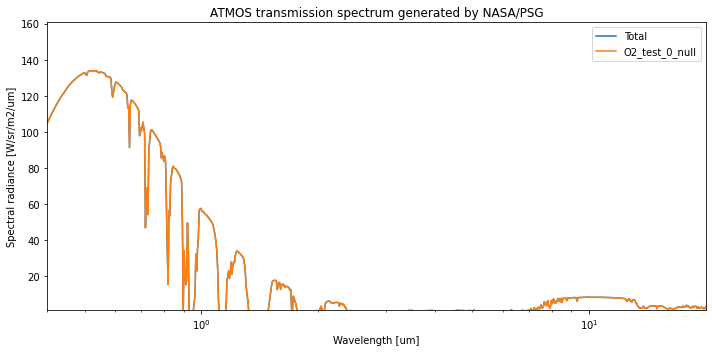

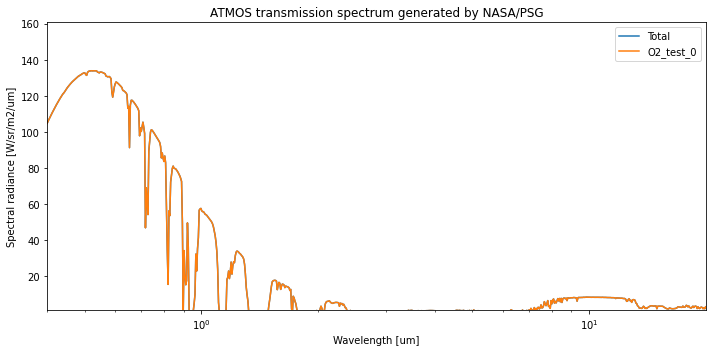

Required exposure time for O2_test_0: 7897.8 hr


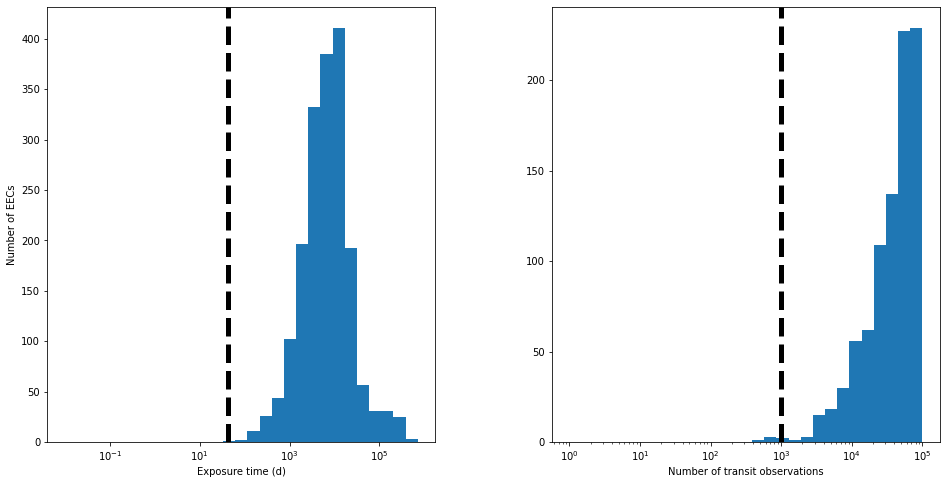

O2_test_1 with O2 flux of 5.00e+08


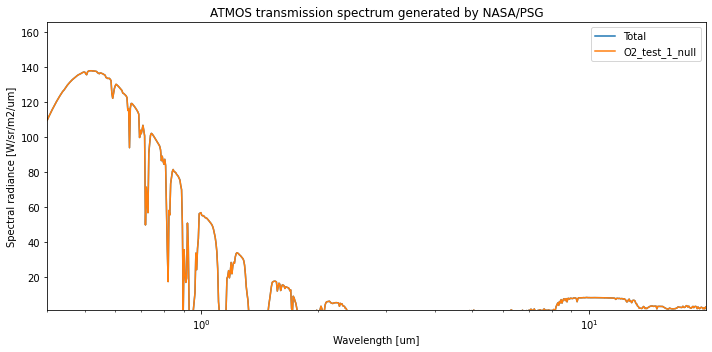

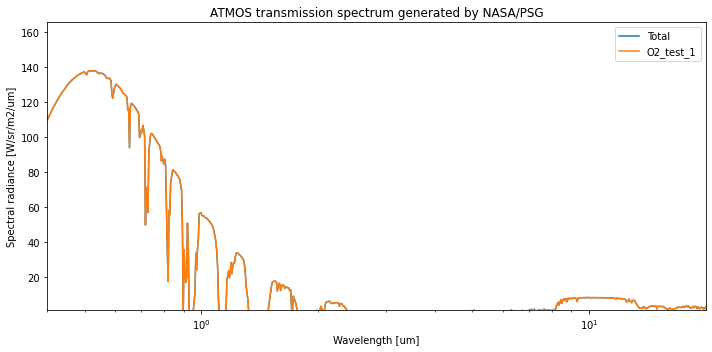

Required exposure time for O2_test_1: 13770037.1 hr


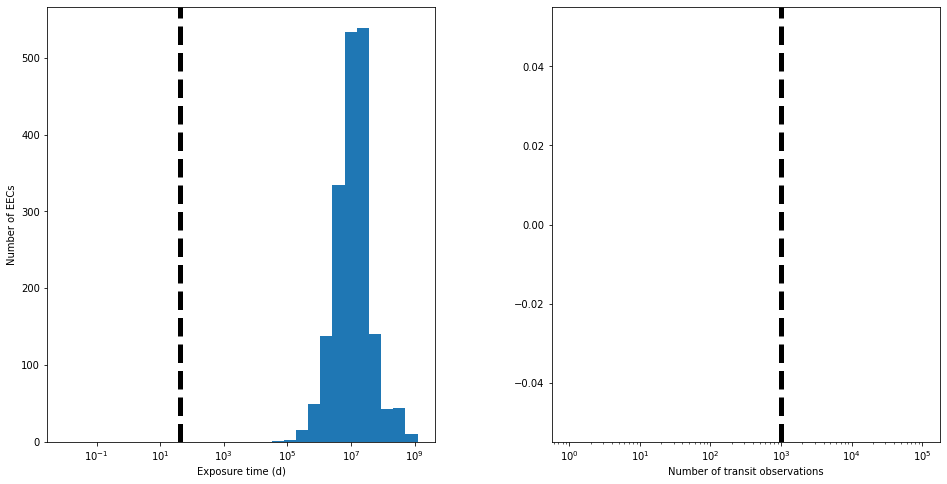

O2_test_2 with O2 flux of 8.00e+08


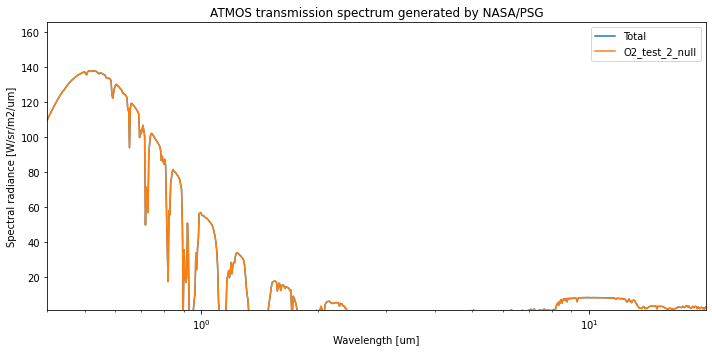

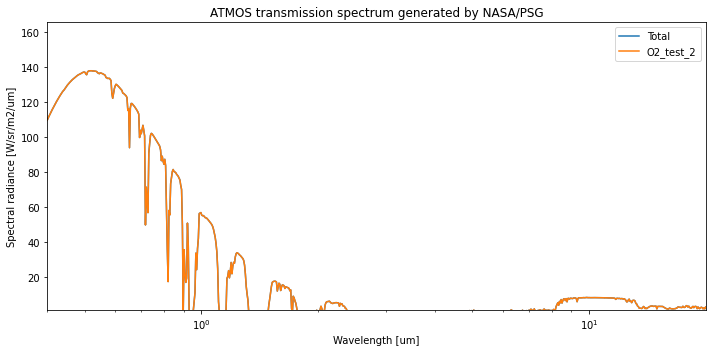

Required exposure time for O2_test_2: 11823252.0 hr


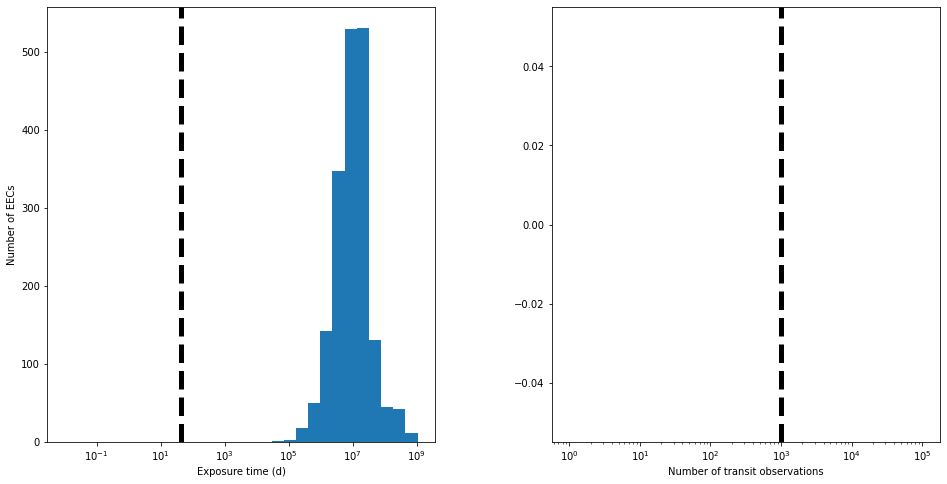

O2_test_3 with O2 flux of 1.00e+09


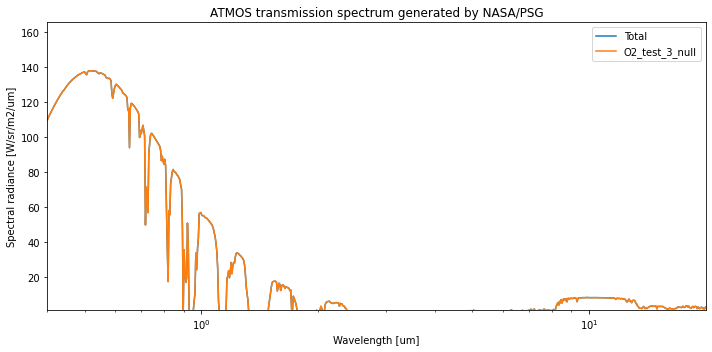

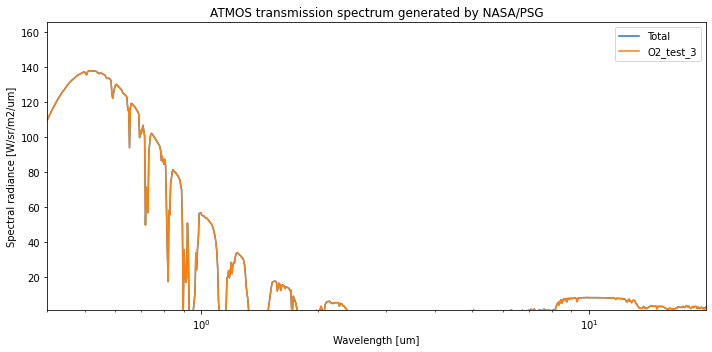

Required exposure time for O2_test_3: 11823252.0 hr


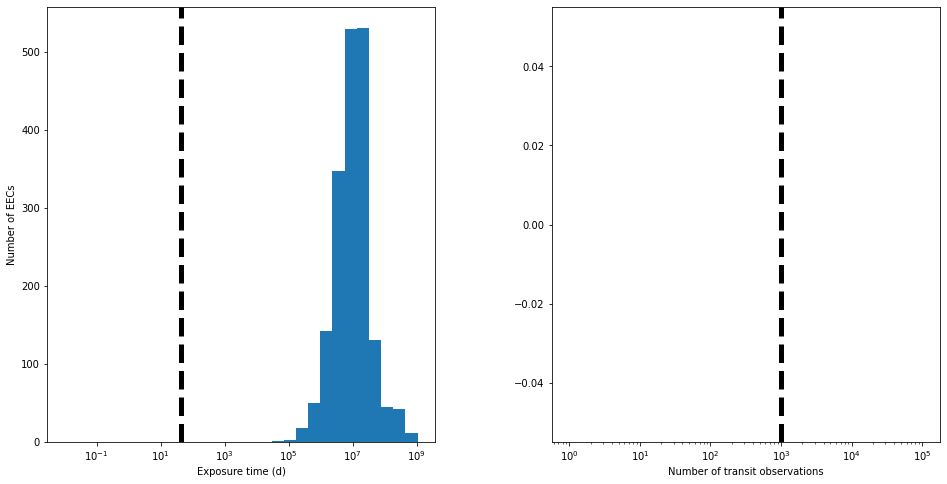

O2_test_4 with O2 flux of 2.50e+09


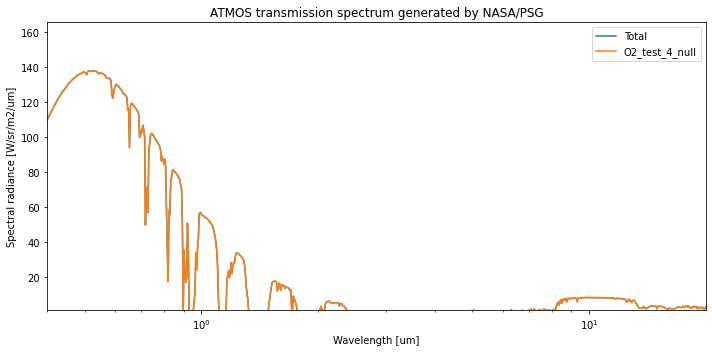

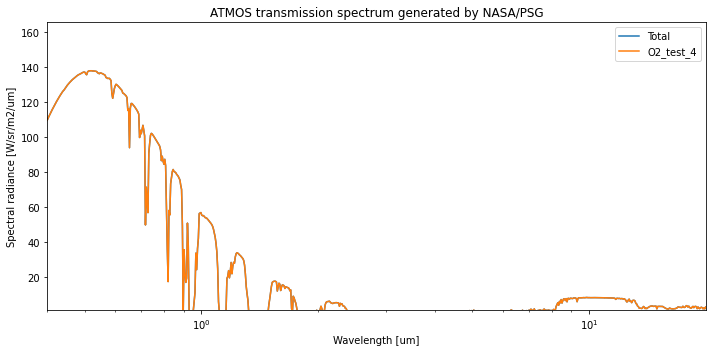

Required exposure time for O2_test_4: 11193078.4 hr


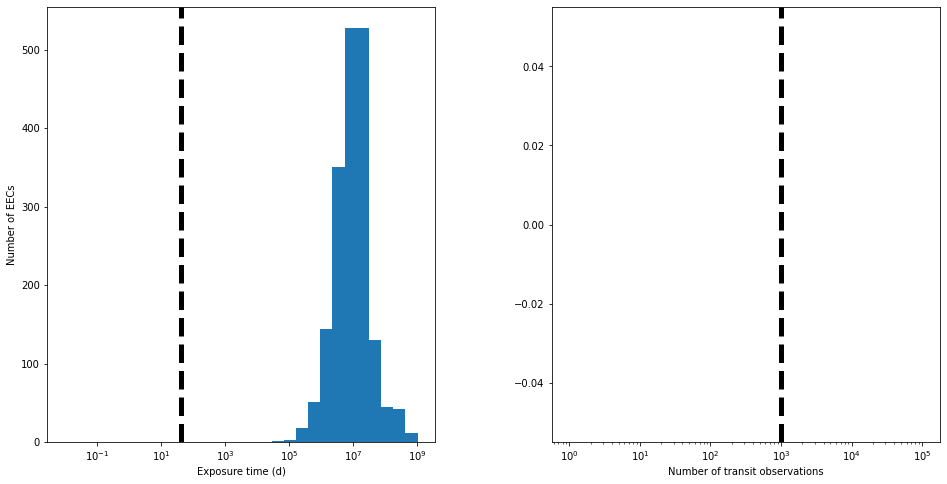

O2_test_5 with O2 flux of 3.50e+09


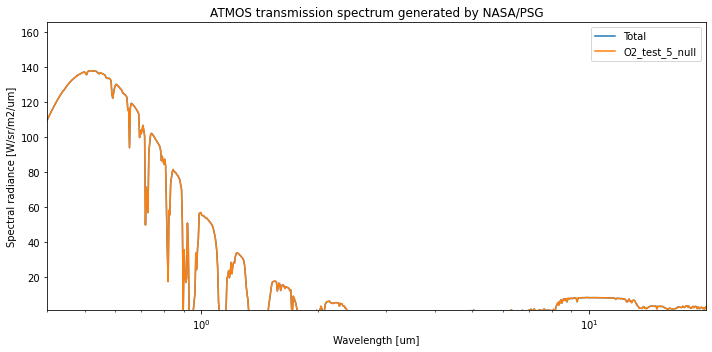

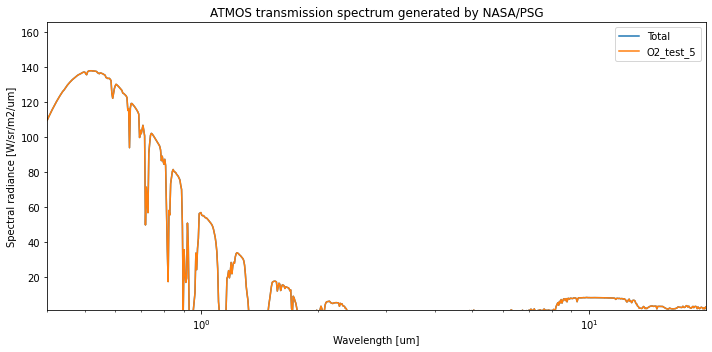

Required exposure time for O2_test_5: 11395370.0 hr


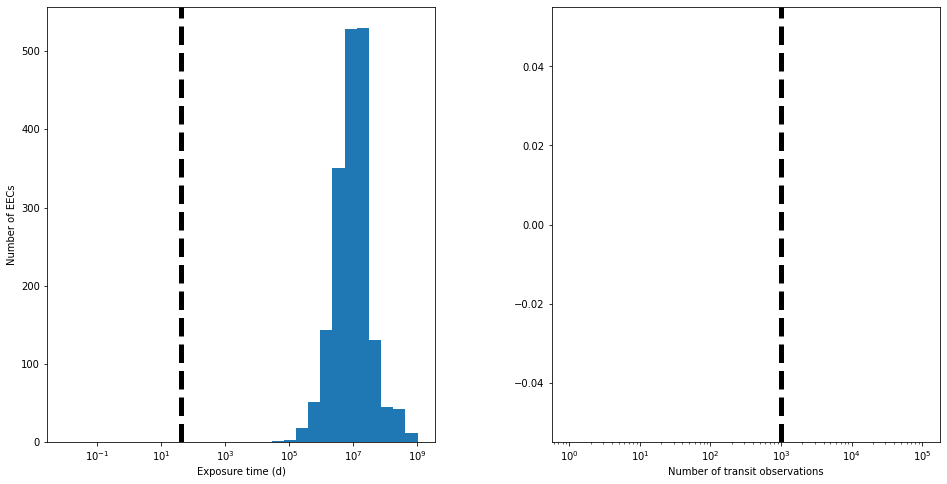

O2_test_6 with O2 flux of 5.00e+09


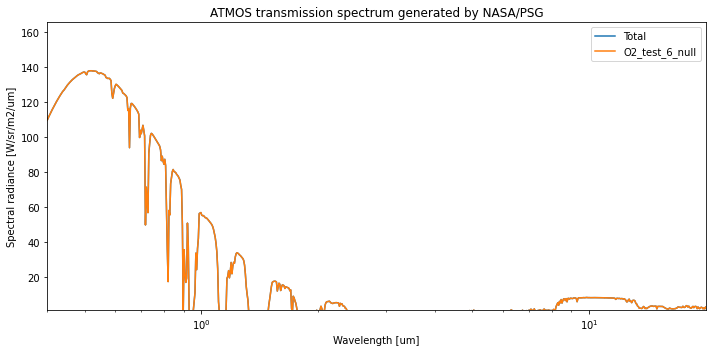

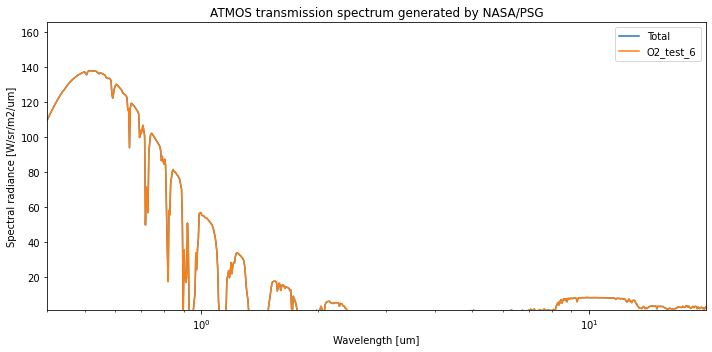

Required exposure time for O2_test_6: 10797636.7 hr


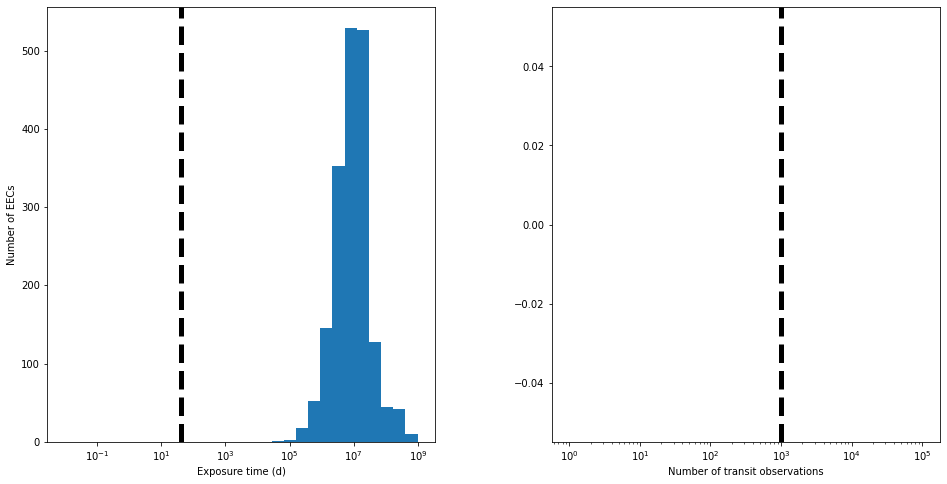

O2_test_7 with O2 flux of 6.00e+09


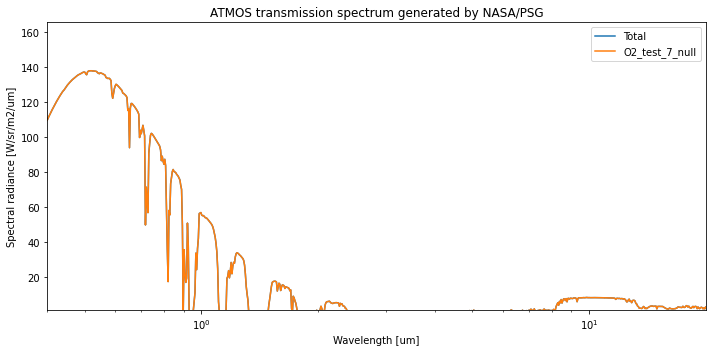

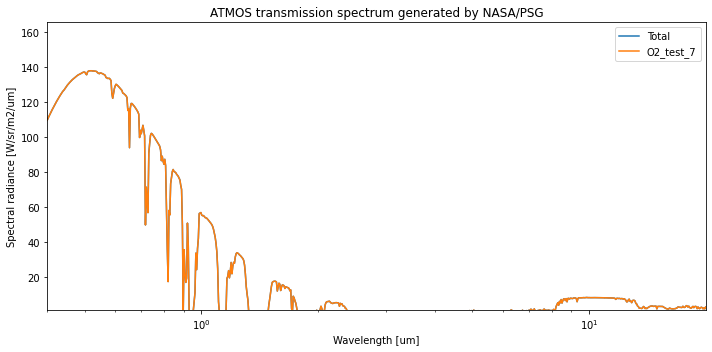

Required exposure time for O2_test_7: 10738794.3 hr


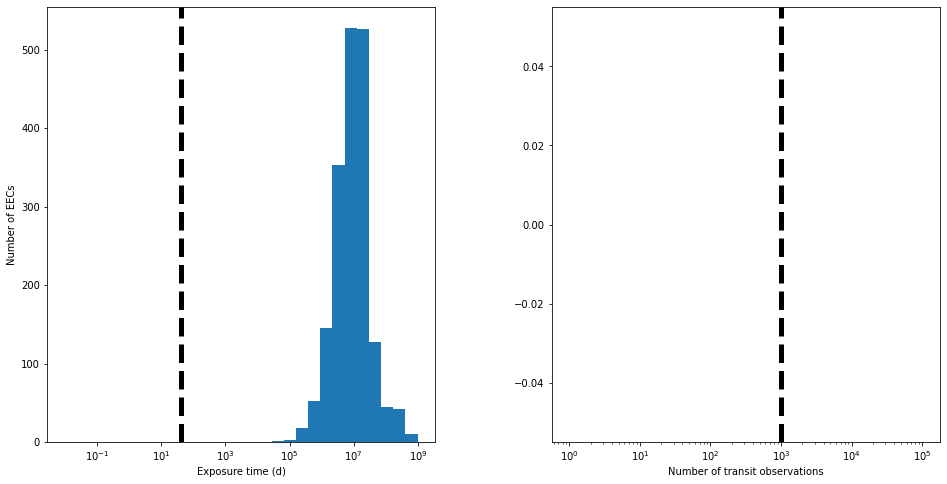

O2_test_8 with O2 flux of 7.50e+09


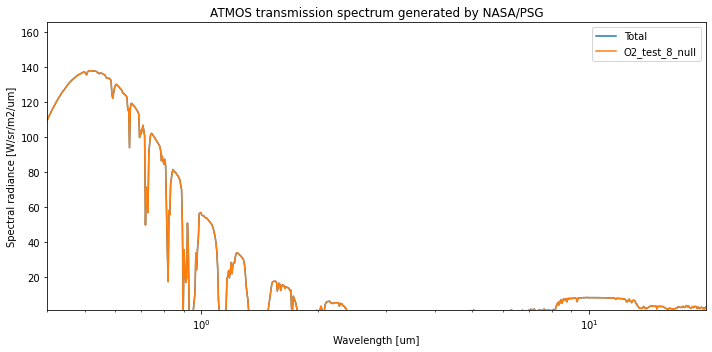

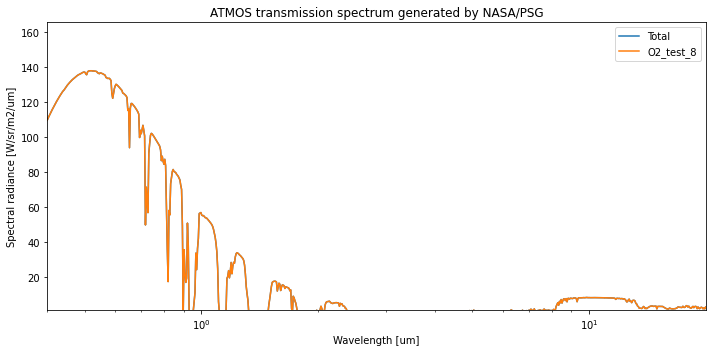

Required exposure time for O2_test_8: 11084813.0 hr


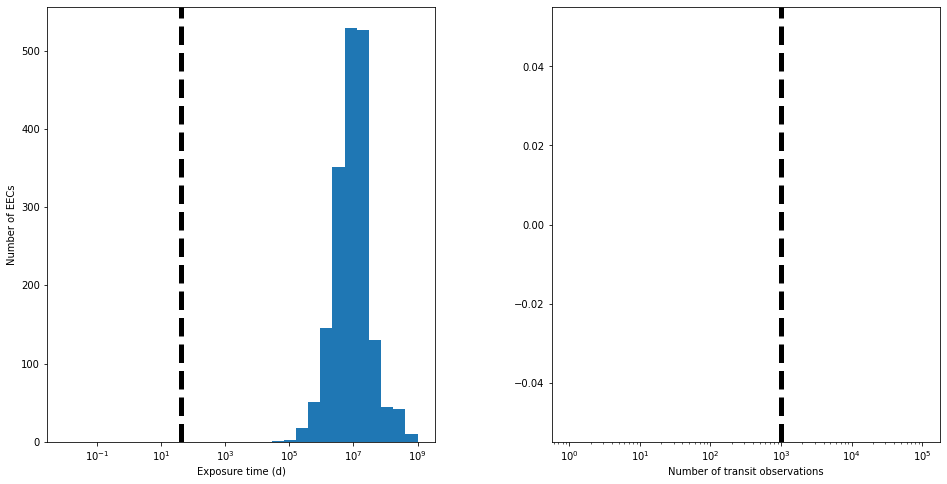

O2_test_9 with O2 flux of 8.50e+09


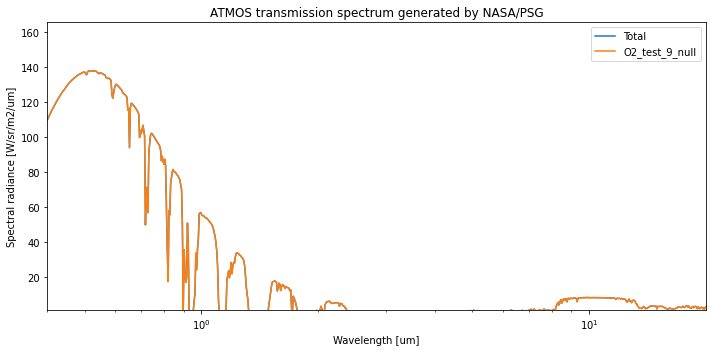

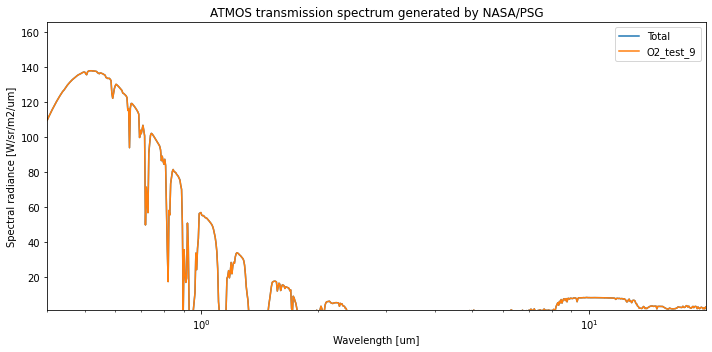

Required exposure time for O2_test_9: 10647708.7 hr


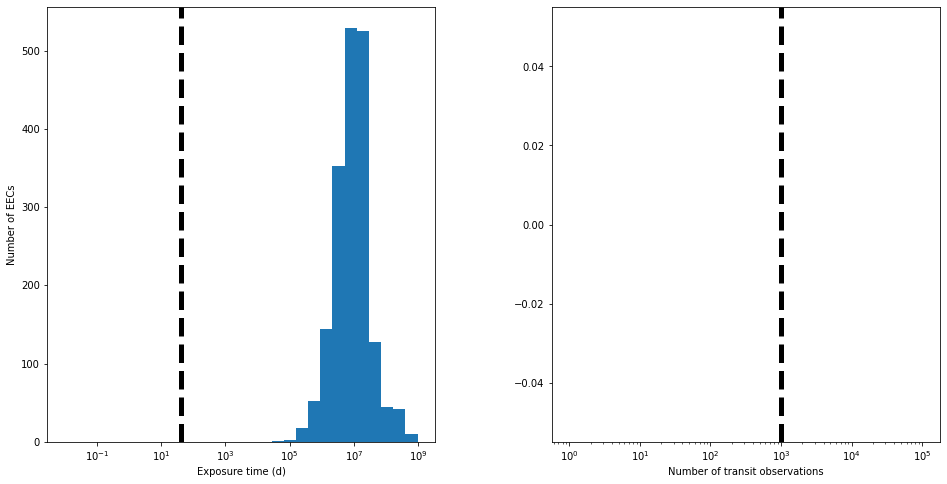

O2_test_10 with O2 flux of 1.00e+10


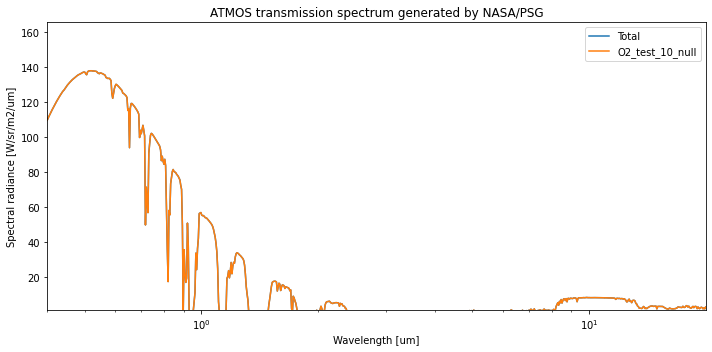

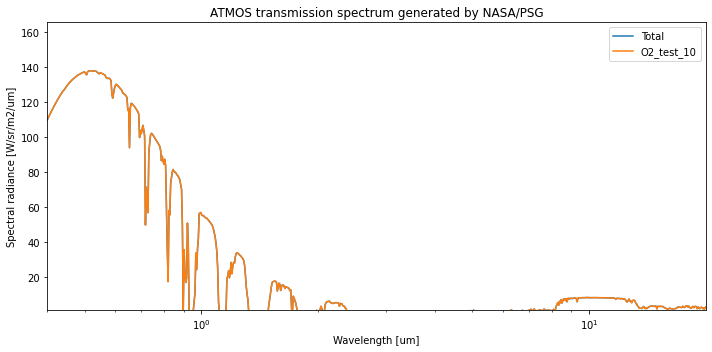

Required exposure time for O2_test_10: 10693465.4 hr


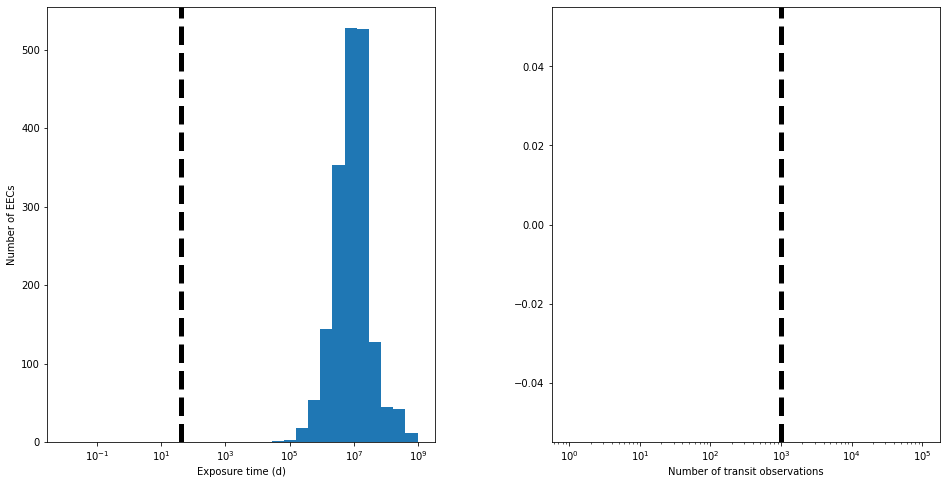

O2_test_11 with O2 flux of 5.00e+10


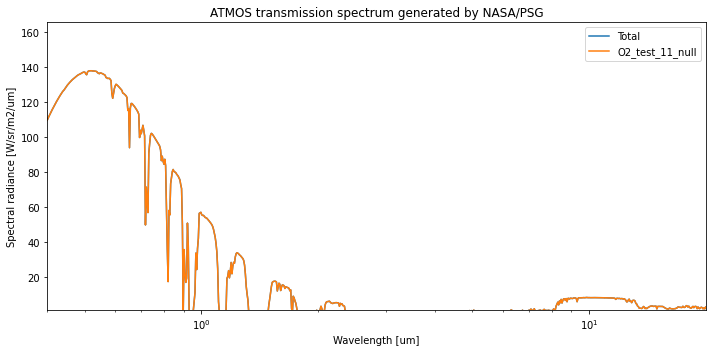

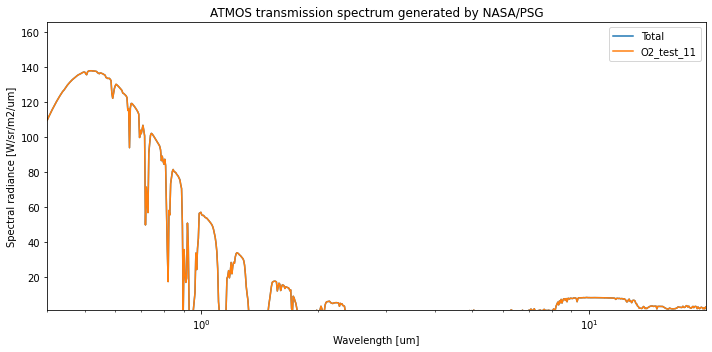

Required exposure time for O2_test_11: 6651644.7 hr


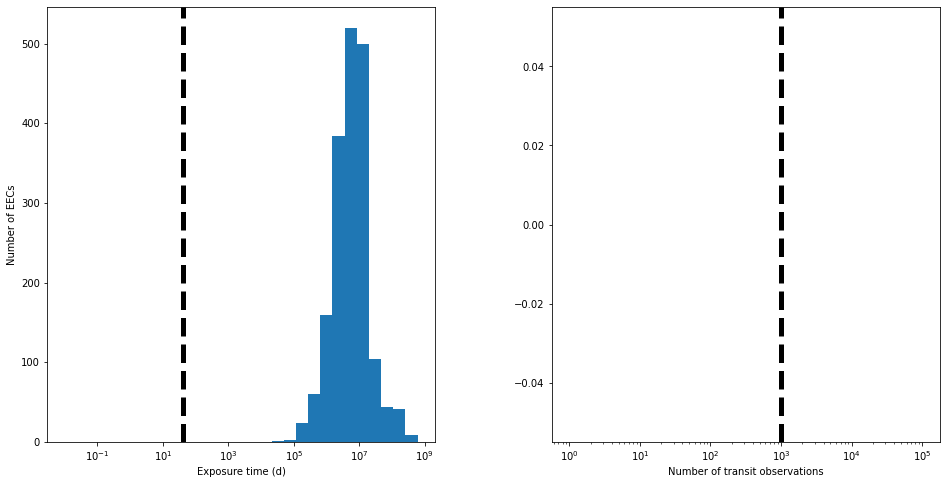

O2_test_12 with O2 flux of 9.00e+10


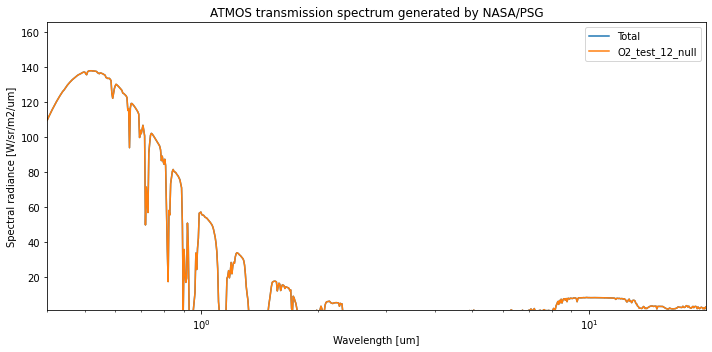

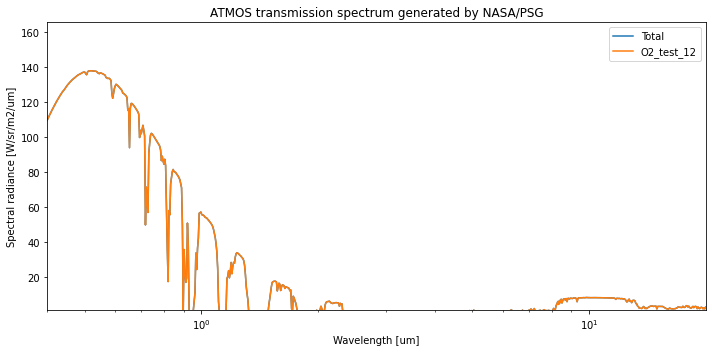

Required exposure time for O2_test_12: 4149258.9 hr


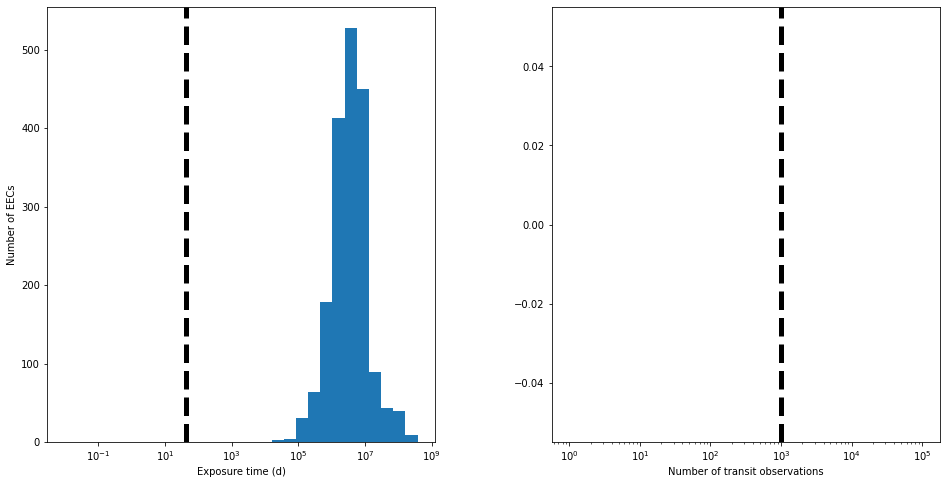

O2_test_13 with O2 flux of 1.50e+11


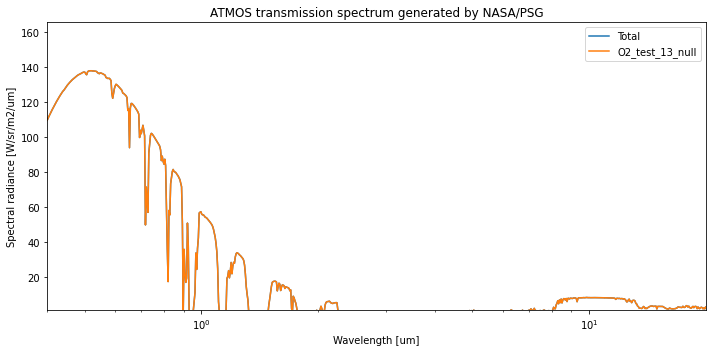

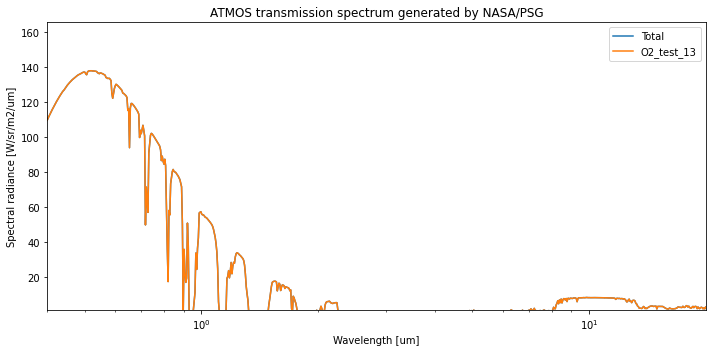

Required exposure time for O2_test_13: 2336902.5 hr


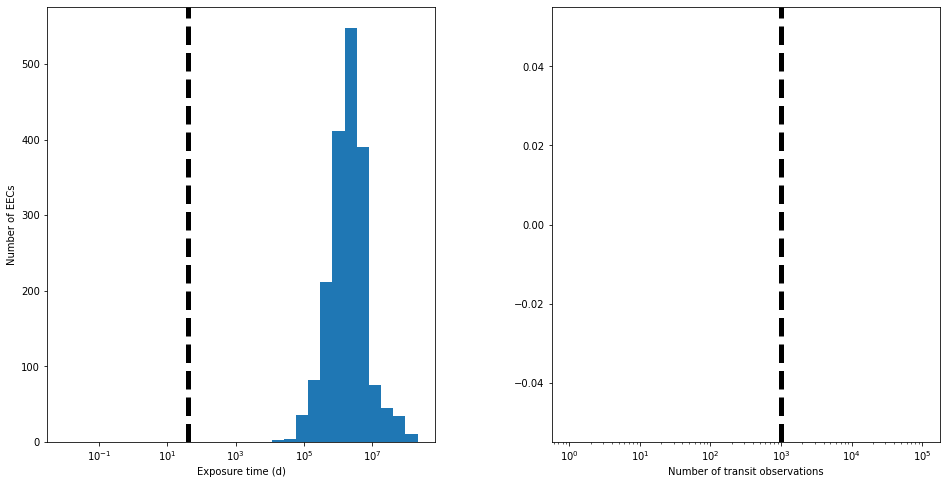

O2_test_14 with O2 flux of 2.50e+11


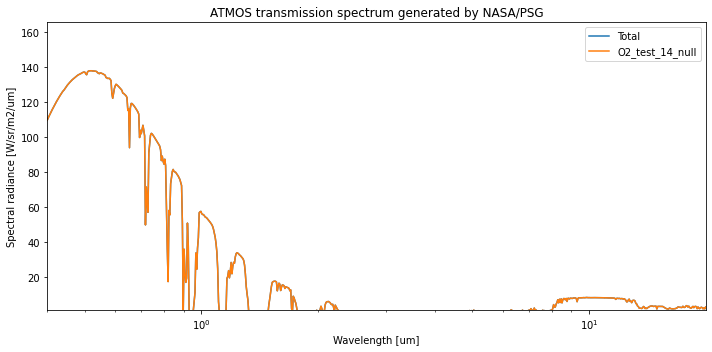

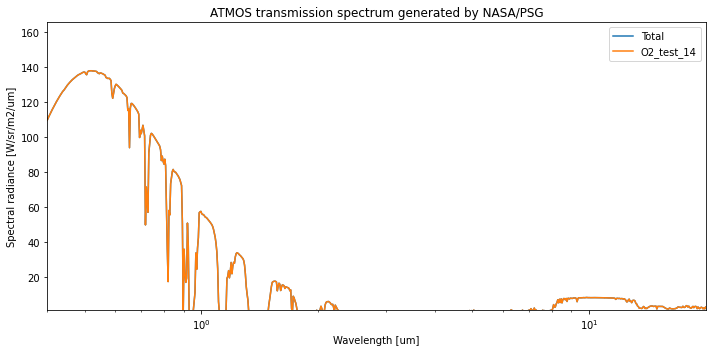

Required exposure time for O2_test_14: 920313.7 hr


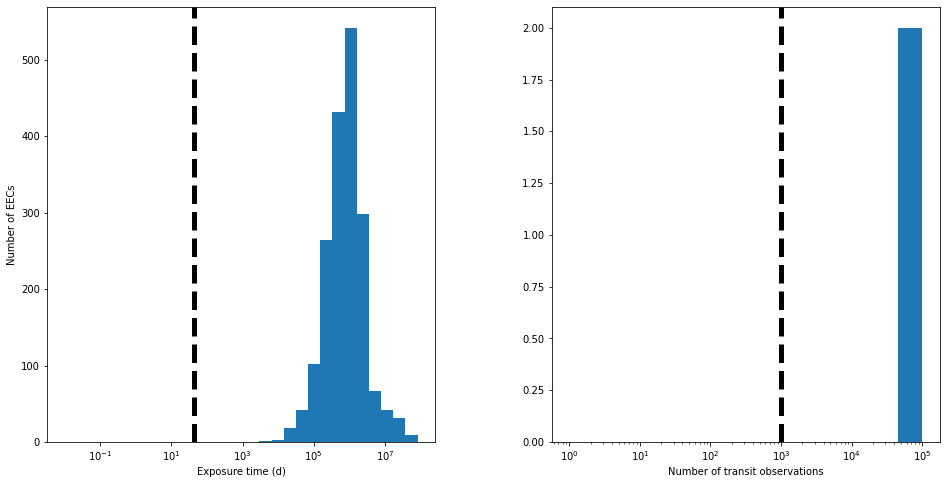

O2_test_15 with O2 flux of 3.00e+11


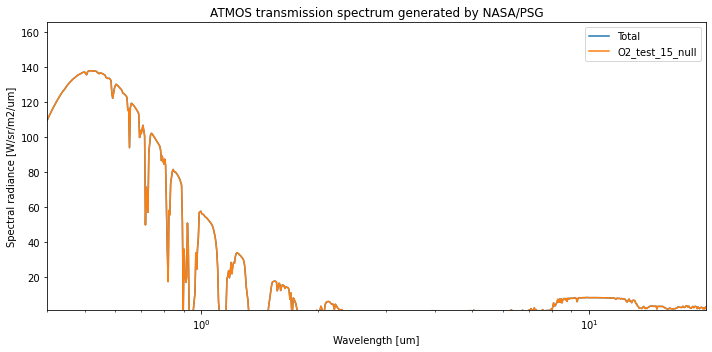

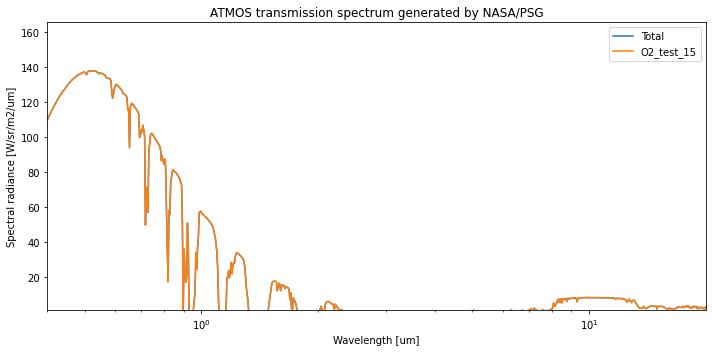

Required exposure time for O2_test_15: 560015.8 hr


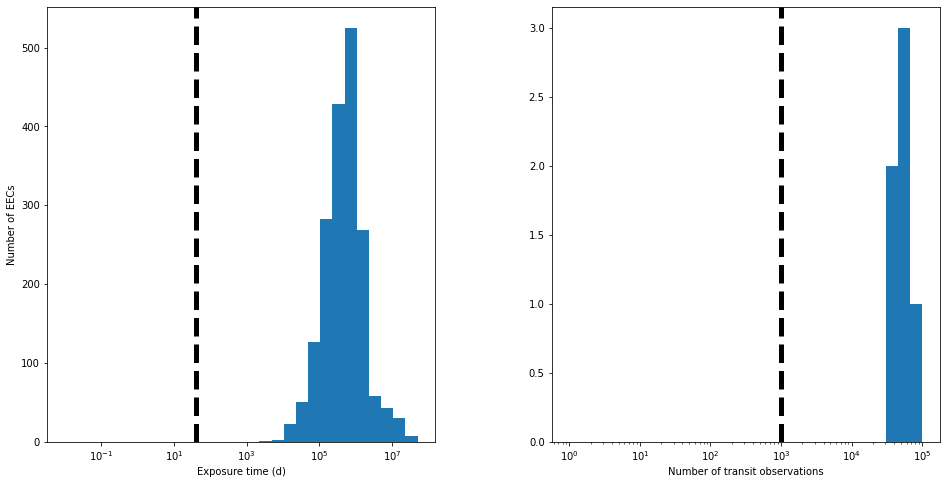

O2_test_16 with O2 flux of 3.25e+11


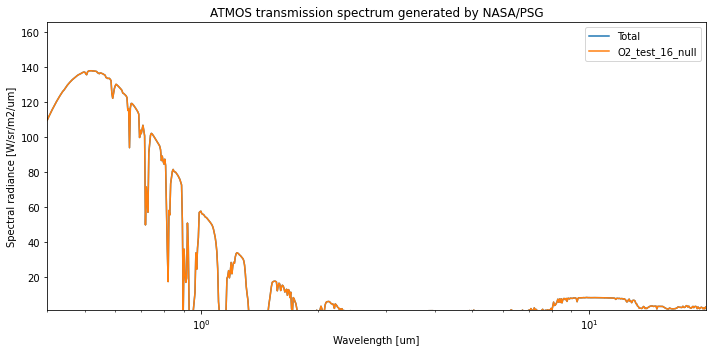

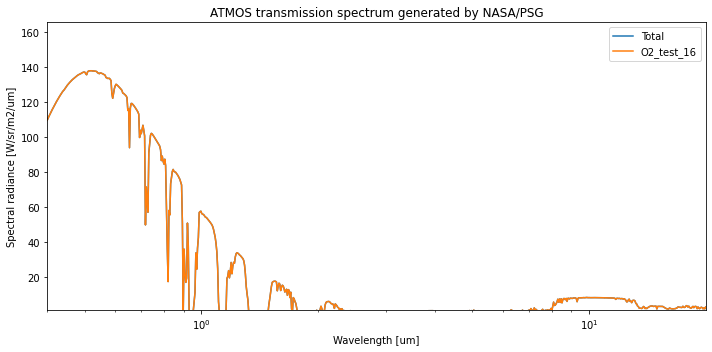

Required exposure time for O2_test_16: 436107.7 hr


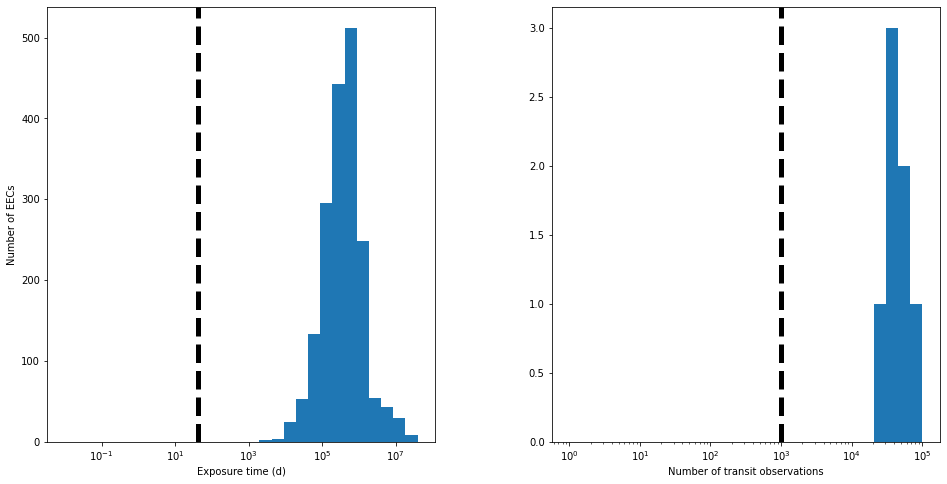

O2_test_17 with O2 flux of 3.50e+11


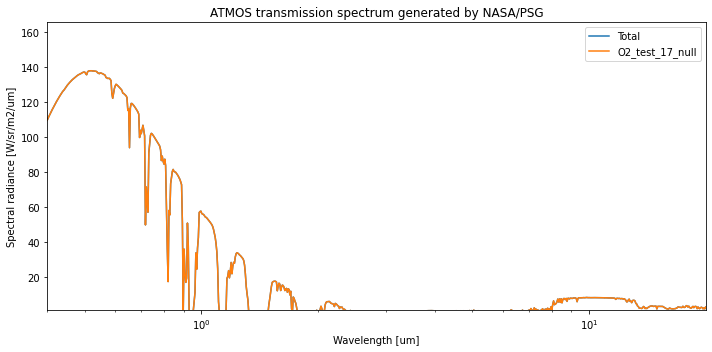

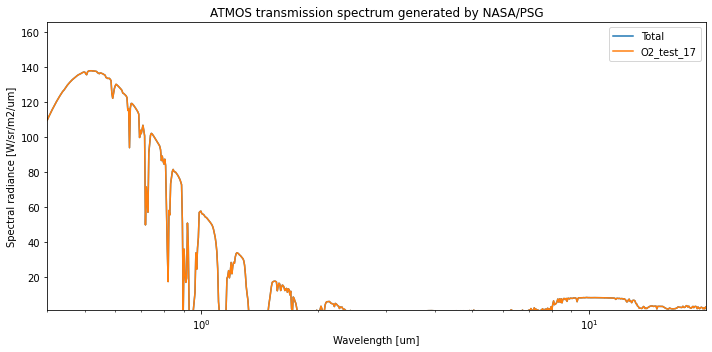

Required exposure time for O2_test_17: 289335.6 hr


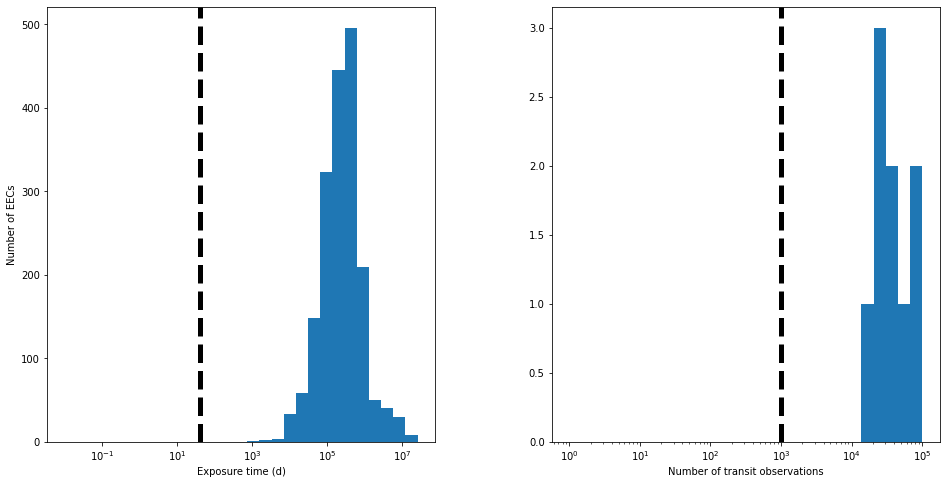

O2_test_18 with O2 flux of 3.95e+11


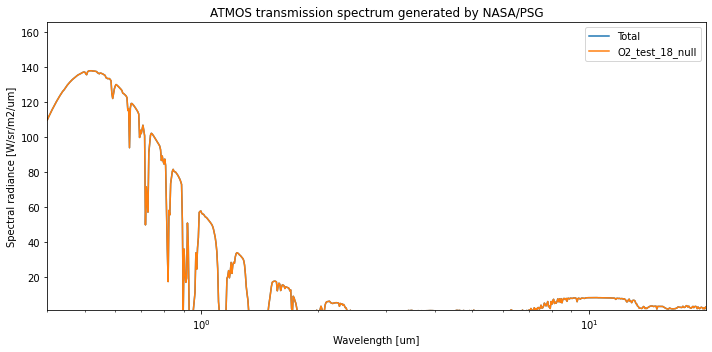

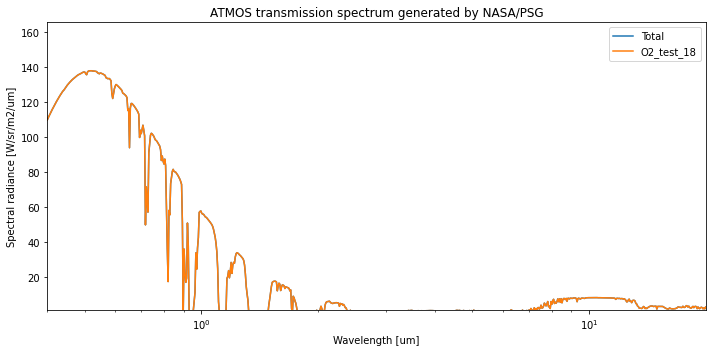

Required exposure time for O2_test_18: 0.0 hr


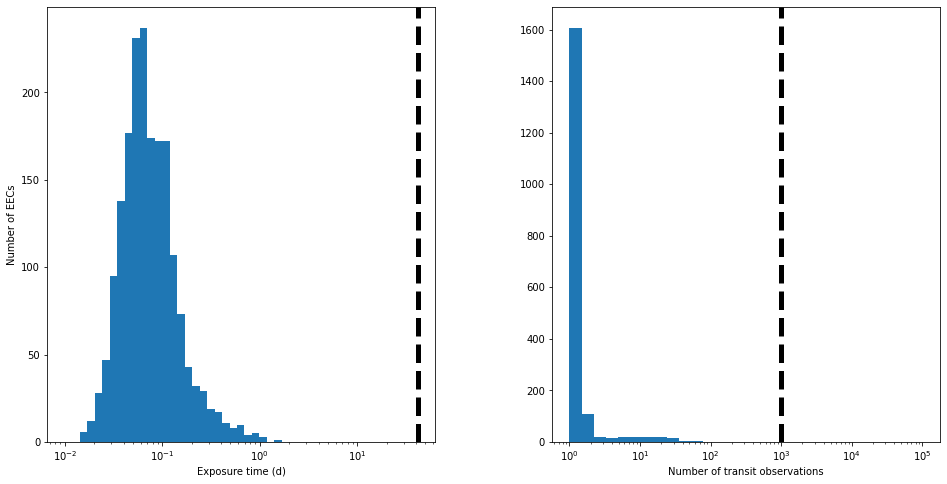

O2_test_19 with O2 flux of 4.20e+11


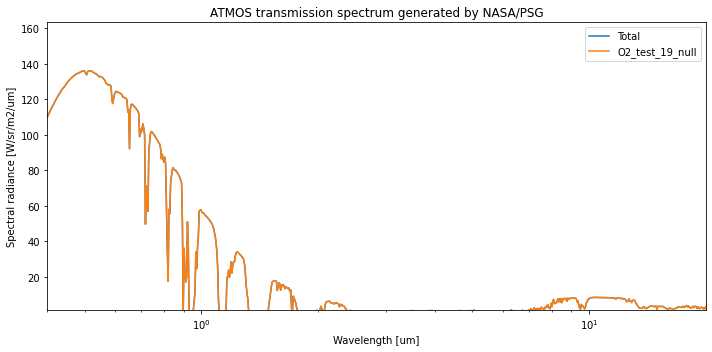

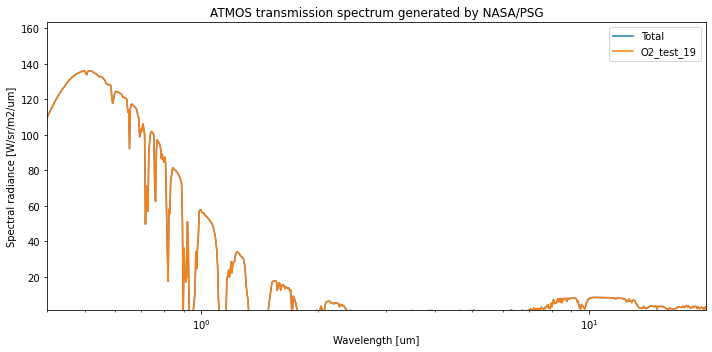

Required exposure time for O2_test_19: 0.0 hr


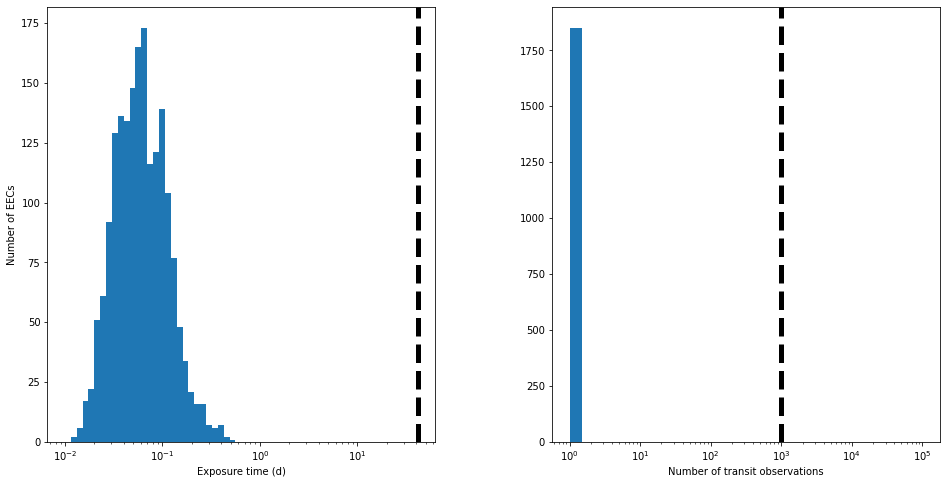

O2_test_20 with O2 flux of 5.50e+11


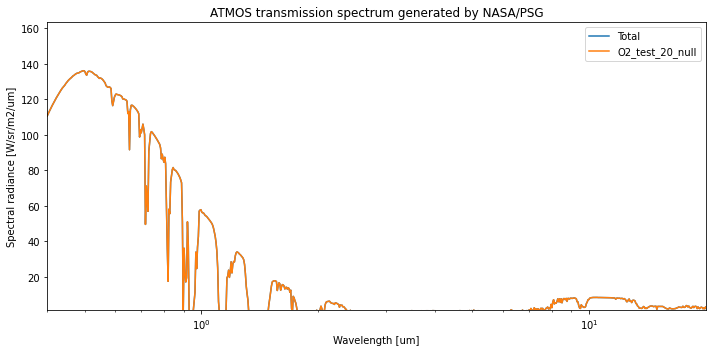

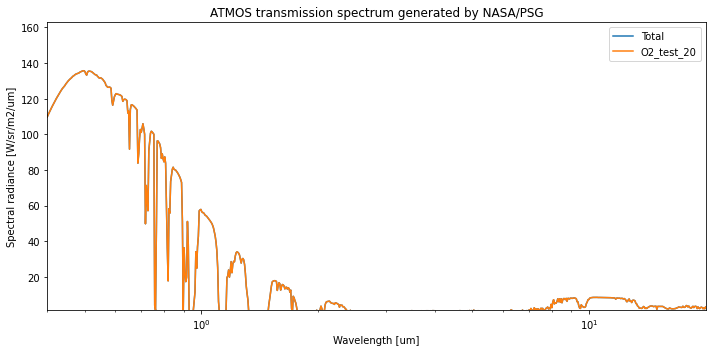

Required exposure time for O2_test_20: 0.0 hr


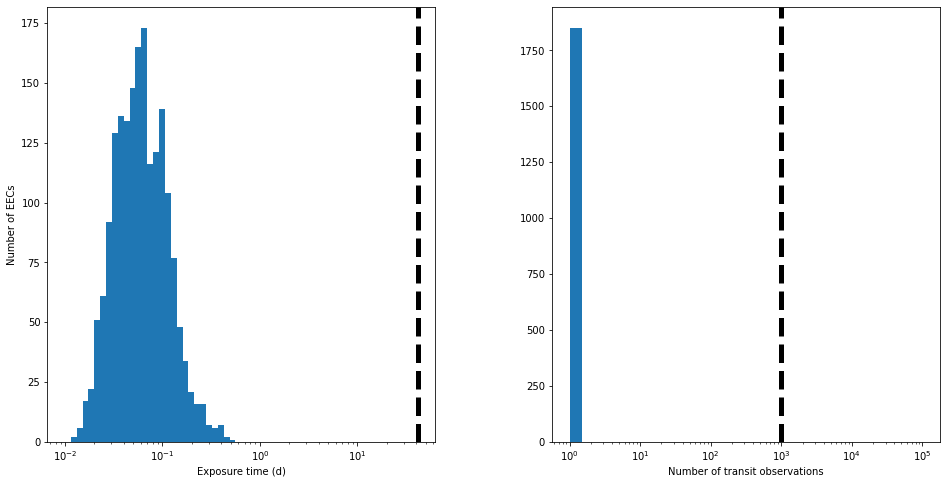

In [14]:
tel='JWST'
t_ref_list=[]

# generate spectra and then calculate t_ref
for i in range(len(model_list)):
    model=model_list[i].split('/')[1]
    print(model+ ' with O2 flux of '+"{:.2e}".format(O2_flux_list[i]))

    #create the null spectrum for t_ref
    
    null_newf=atmosatm(model_list[i],tel=tel,filebase=model,null_spec=True,removed_gas="O2",star='G')
    psgspec(model,null_newf,showplot=True,null_spec=True)
    null_rad=curr_dir+'/psg_output/%s_null_rad.txt' % model

    #create radiance spectrum

    newf=atmosatm(model_list[i],tel=tel,filebase=model,star='G')
    psgspec(model,newf,showplot=True)
    model_rad=curr_dir+'/psg_output/%s_rad.txt' % model
    t_ref = compute_t_ref(filenames=(model_rad,null_rad), t_exp=10, wl_min=0.4, wl_max=0.9,)
    t_ref_list.append(t_ref)
    print("Required exposure time for %s: {:.1f} hr".format(t_ref) % model)
    survey.measurements['has_O2'].t_ref=t_ref/24
    survey.save()
    
    
    t_exp, N_obs = survey.measurements['has_O2'].compute_exposure_time(data[detected['EEC']])

    fig, ax = plt.subplots(ncols=2, figsize=(16,8))

    bins = np.logspace(np.log10(0.01), np.log10(np.amax(t_exp)), 30)
    ax[0].hist(t_exp, bins=bins)
    ax[0].set_xscale('log')
    ax[0].set_xlabel('Exposure time (d)')
    ax[0].set_ylabel('Number of EECs')
    ax[0].axvline(1000/24, linestyle='dashed', lw=5, c='black')

    bins = np.logspace(0, 5, 30)
    ax[1].hist(N_obs, bins=bins)
    ax[1].set_xscale('log')
    ax[1].set_xlabel('Number of transit observations')
    ax[1].axvline(survey.N_obs_max, linestyle='dashed', lw=5, c='black')

    plt.subplots_adjust(wspace=0.3)

    plt.show()


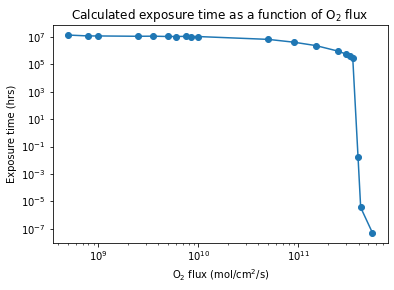

In [15]:
O2_flux_list.pop(0)
t_ref_list.pop(0) #since the first entry of this list always seem weirdly low
plt.plot(O2_flux_list,t_ref_list,label='Exposure time')
plt.scatter(O2_flux_list,t_ref_list)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Exposure time (hrs)')
plt.xlabel(r'O$_2$ flux (mol/cm$^2$/s)')
plt.title(r'Calculated exposure time as a function of O$_2$ flux')
plt.show()